In [1]:
import numpy as np , matplotlib as plt 
%pylab inline
from scipy import stats
from scipy.stats import chi2_contingency
from matplotlib.colors import LogNorm

import pandas as pd
%matplotlib inline
import seaborn as sns
from collections import Counter
import csv
import matplotlib.ticker as tkr


Populating the interactive namespace from numpy and matplotlib


C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
#df = pd.read_csv("patients.csv",error_bad_lines=False) 
df = pd.read_csv('final_data.csv', sep=";", engine="python", skipfooter=0,error_bad_lines=False)
#df = pd.read_csv('data_sans_temoins.csv', sep=";", engine="python", skipfooter=1,error_bad_lines=False)

df=df[:32]

df['vit_d'] = df['vit_d'].astype('float')
df['IMC'] = df['IMC'].astype('float')
df['age'] = df['age'].astype(int)

ages = pd.DataFrame(df, columns=['age'])

bins = [5,18, 30, 40,  60,  120]
labels = ['< 18 ans','18-30 ans', '31-39 ans', '41-49 ans', '60-69 ans']
df['agerange'] = pd.cut(ages.age, bins, labels = labels,include_lowest = True)

vitD = pd.DataFrame(df, columns=['vit_d'])
bins = [0,10, 20, 30, 50]
labels = ['CARENCE','DEFICIT', 'INSUFFISANCE', 'SUFFISANCE']
df['niv_vitD'] = pd.cut(vitD.vit_d, bins, labels = labels,include_lowest = True)


In [3]:
# ADAPTATION DES DONNEES

# df['brosse']=df['brosse'].astype('category').cat.codes
# df['Brossage']=df['Brossage'].astype('category').cat.codes
# df['technique']=df['technique'].astype('category').cat.codes
# df['harmonie_et _ymetrie_faciale']=df['harmonie_et _ymetrie_faciale'].astype('category').cat.codes
# df['brosse']=df['brosse'].astype('category').cat.codes
# df['Brossage']=df['Brossage'].astype('category').cat.codes
# df['stomion']=df['stomion'].astype('category').cat.codes
# df['moyenne_de_indice_plaque']=df['moyenne_de_indice_plaque'].astype('category').cat.codes
# df['sum_Dents_Cariées']=df['sum_Dents_Cariées'].astype('category').cat.codes
# df['sum_Dents_absentes ']=df['sum_Dents_absentes '].astype('category').cat.codes

# df['sum_Dents_obturées ']=df['sum_Dents_obturées '].astype('category').cat.codes
# df['sum_Dentinites ']=df['sum_Dentinites '].astype('category').cat.codes
# df['moyenne_de_indice_plaque']=df['moyenne_de_indice_plaque'].astype('category').cat.codes
# df['Diagnostic_parodontal']=df['Diagnostic_parodontal'].astype('category').cat.codes
# df['Mastication']=df['Mastication'].astype('category').cat.codes
# df['Minutage']=df['Minutage'].astype('category').cat.codes
# df['frequence']=df['frequence'].astype('category').cat.codes


# df['sum_Dents_obturées ']=df['sum_Dents_obturées '].astype('category').cat.codes
# df['sum_Dentinites ']=df['sum_Dentinites '].astype('category').cat.codes
# # df['moyenne_de_indice_plaque']=df['moyenne_de_indice_plaque'].astype('category').cat.codes
# # df['Diagnostic_parodontal']=df['Diagnostic_parodontal'].astype('category').cat.codes

# df['sexe']=df['sexe'].astype('category').cat.codes
# df['naissance']=df['naissance'].astype('category').cat.codes
# df['residence']=df['residence'].astype('category').cat.codes
# df['profession']=df['profession'].astype('category').cat.codes


In [4]:
def plots_create (feature,ylabel,name,title,plotColor="#CC9900"):
    plt.figure(figsize=(15, 15)) 
    sns.set_style("whitegrid")
    b=sns.countplot(x=feature, data=df,palette="rocket")

    b.set_xlabel("X Label",fontsize=30)
    b.set_ylabel("Y Label",fontsize=20)
    b.tick_params(labelsize=26)

    b.set(xlabel=None)
    b.set(ylabel=ylabel)
    
    b.axes.set_title(title,fontsize=26)
    plt.savefig(name+'.jpeg')

In [5]:
def pie_create (feature,name,titles,plotColor="#CC9900"):
    plt.figure(figsize=(20,15)) 
    class_age = df[feature].value_counts(normalize=True)
    plt.rcParams.update({'font.size': 20})
    colors=['#E4A282','#912B5B','#472445', '#D25455','#d25b80']
    colors=['#E4A282','#912B5B','#c188a2', '#D25455','#d25b80']
    pie(class_age.values, labels=class_age.index,autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 25},colors = colors)
    title(titles,fontsize=26)
    plt.savefig(name+'.jpeg')

In [6]:
def donut_create(feature,name,titles,plotColor="#CC9900"):
    plt.figure(figsize=(20,15)) 
    class_age = df[feature].value_counts(normalize=True)
    pie(class_age.values, labels=class_age.index,autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 25})
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    title(titles,fontsize=25)
    plt.savefig(name+'.jpeg')
   

In [7]:
def mat_corr_small (df,list_feature,list_names,name,titles,plotColor="#CC9900"):
 
    corr = df[list_feature].corr()
    corr = corr.round(1)
    plt.figure(figsize=(15, 15))
    
    sns.set(font_scale=1.3)
    y_axis_labels = list_names
    x_axis_labels = list_names

    with sns.axes_style("white"):
        sns.heatmap(corr,  annot = True ,vmax=1, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    
    title(titles,fontsize=26)
    plt.savefig(name+'.jpeg')
    

In [8]:
def boxplot_multiv (feature,axe_x,xlabel,ylabel,name,titles,plotColor="#CC9900"):
  
    plt.figure(figsize=(20, 10)) 
    sns.set_style("whitegrid")

    b=sns.boxplot(data=df, x=axe_x,y=feature,palette="rocket")
    medians = df.groupby([axe_x])[feature].median()
    vertical_offset = df[feature].median() * 0.05 # offset from median for display

    for xtick in b.get_xticks():
        h=medians[xtick]
        h=round(h,2)
        print(h)
        b.text(xtick,h + vertical_offset,h, 
                horizontalalignment='center',size='xx-large',color='w',weight='semibold')
    
    b.set_xlabel("X Label",fontsize=30)
    b.set_ylabel("Y Label",fontsize=20)
    b.tick_params(labelsize=26)
    b.axes.set_title(titles,fontsize=26)
    b.set(xlabel=xlabel)
    b.set(ylabel=ylabel)
    plt.savefig(name+'.jpeg')


In [9]:
def regplot_multiv(feature,axe_x,xlabel,ylabel,name,titles,plotColor="#CC9900"):
    plt.figure(figsize=(15, 8)) 
    sns.set_style("whitegrid")

    b=sns.regplot(data=df, x=axe_x,y=feature, fit_reg=True)

    b.set_xlabel("X Label",fontsize=30)
    b.set_ylabel("Y Label",fontsize=20)
    b.tick_params(labelsize=26)
    b.axes.set_title(titles,fontsize=26)
    b.set(xlabel=xlabel)
    b.set(ylabel=ylabel)
    plt.savefig(name+'.jpeg')

([<matplotlib.axis.YTick at 0x1b47fc11640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

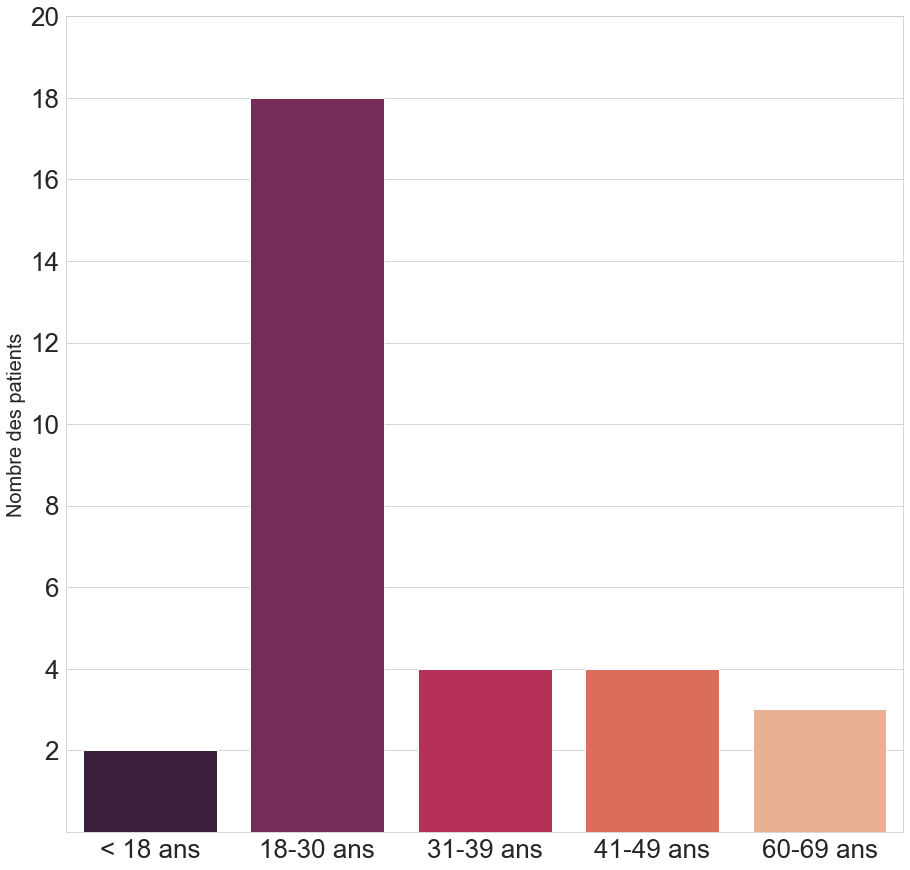

In [10]:
#plots_create("agerange","Nombre des patients","Repartition_tranche_age","Répartition des patients selon l'âge")
plt.figure(figsize=(15, 15)) 
sns.set_style("whitegrid")
b=sns.countplot(x="agerange", data=df,palette="rocket")

b.set_xlabel("X Label",fontsize=30)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=26)

b.set(xlabel=None)
b.set(ylabel="Nombre des patients")
b.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.yticks([2,4,6,8,10,12,14,16,18,20])
#b.axes.set_title(title,fontsize=26)

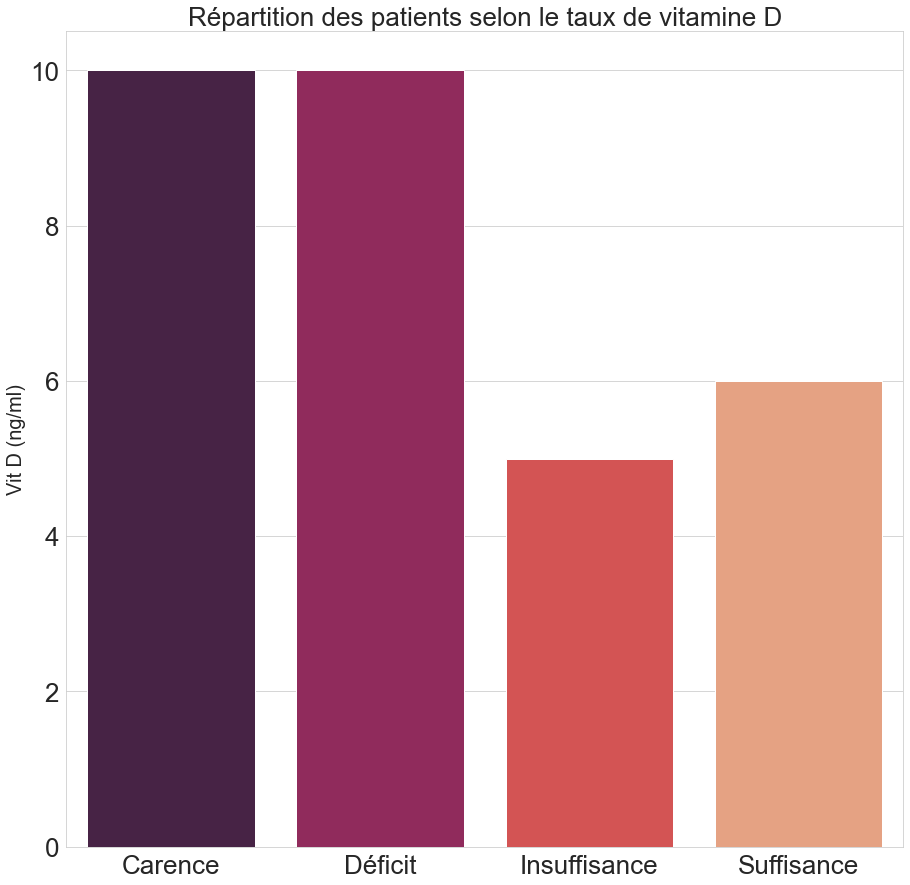

In [10]:
# Taux de Vitamine D 
# vitD = pd.DataFrame(df, columns=['vit_d'])
# bins = [0,10, 20, 30, 50]
# labels = ['Carence','Déficit', 'Insuffisance', 'Suffisance']
# df['niv_vitD'] = pd.cut(vitD.vit_d, bins, labels = labels,include_lowest = True)
plots_create("niv_vitD","Vit D (ng/ml)","Repartition_type_vitd","Répartition des patients selon le taux de vitamine D")


14.7
21.0


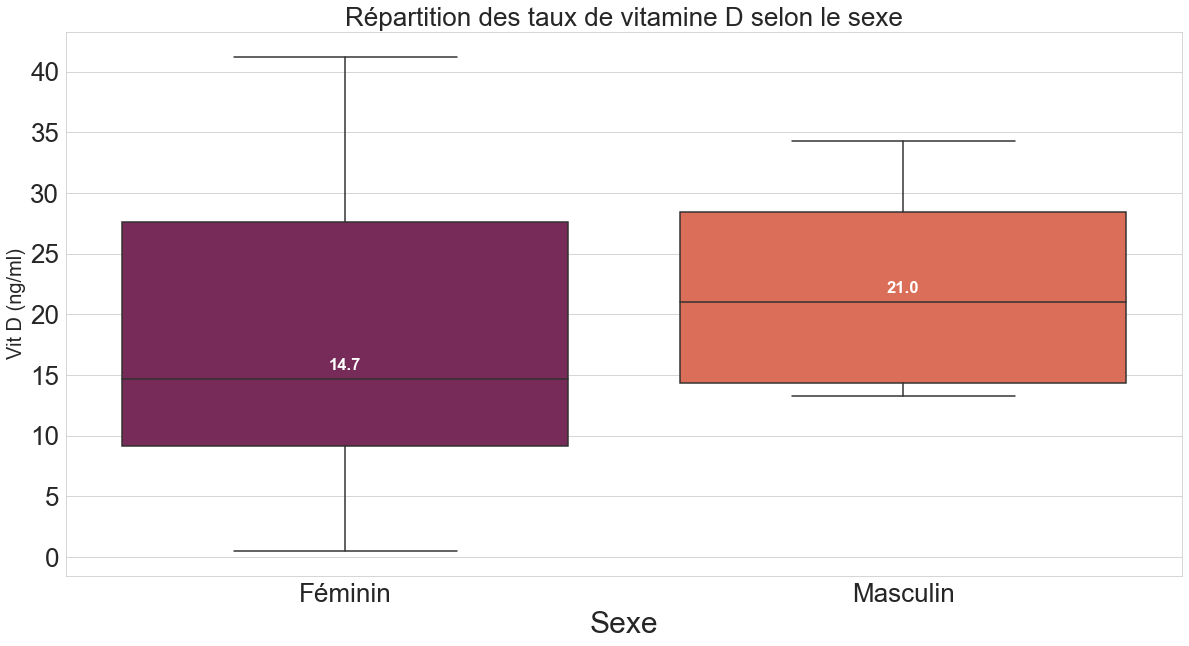

In [95]:
# Répartition de taux de Vitamine D selon le sexe
boxplot_multiv("vit_d","Sexe","Sexe","Vit D (ng/ml)","Repartition_vit_d_sexe","Répartition des taux de vitamine D selon le sexe")


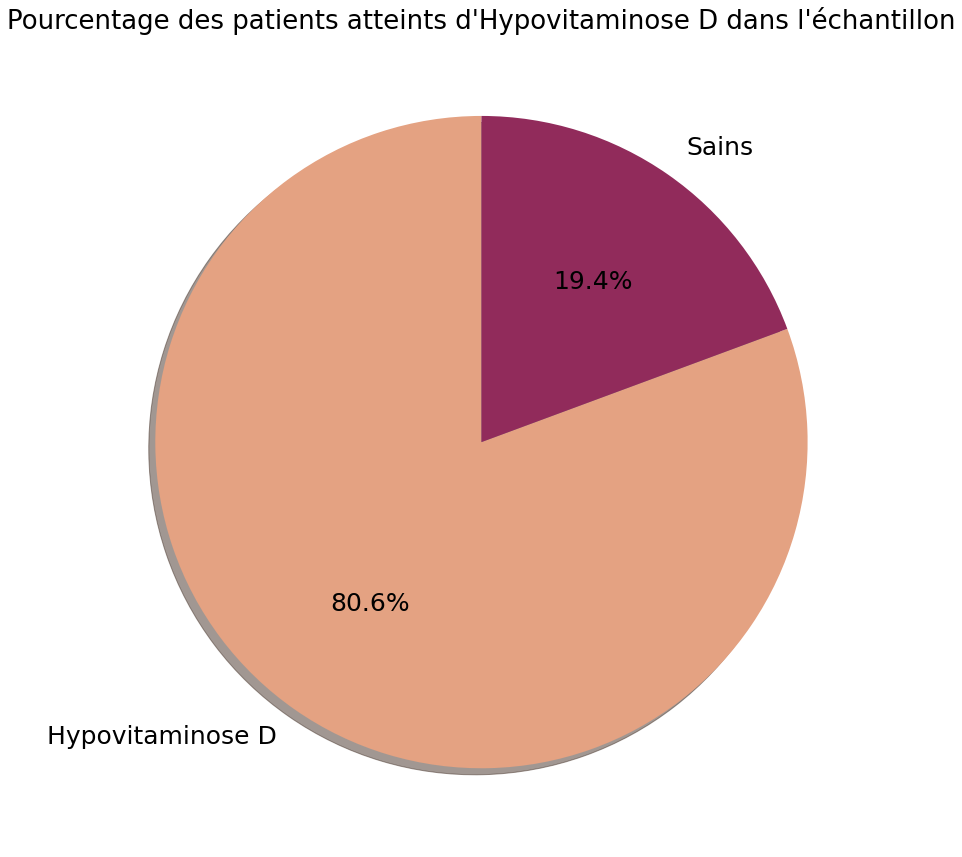

In [10]:
# Pourcentage des patients ayants une hypovitaminose D
hypo_vit = pd.DataFrame(df, columns=['vit_d'])
bins = [0,30, 50]
labels = ['Hypovitaminose D','Sains']
df['hypo_vit'] = pd.cut(hypo_vit.vit_d, bins, labels = labels,include_lowest = True)
pie_create("hypo_vit","Repartition_pourcentage_vid","Pourcentage des patients atteints d'Hypovitaminose D dans l'échantillon")

<ipython-input-17-f324d97f49c8>:7: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  pie(class_age.values, labels=class_age.index,autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 25},colors = colors)


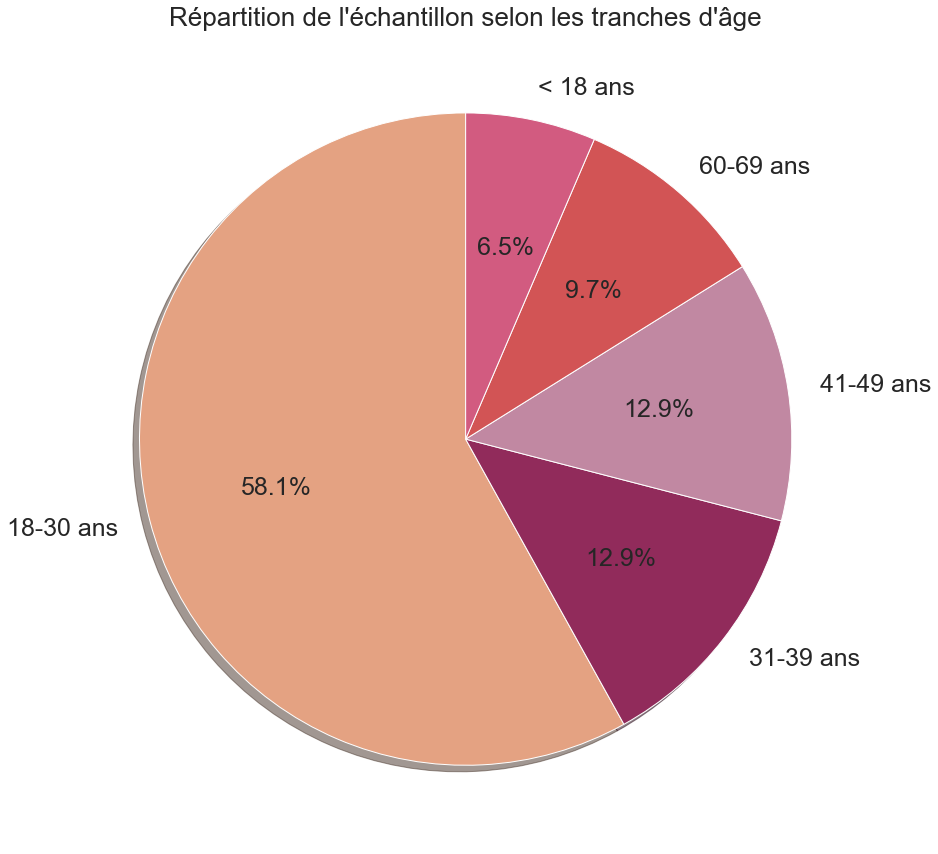

In [20]:
pie_create("agerange","Repartition_agerange","Répartition de l'échantillon selon les tranches d'âge")

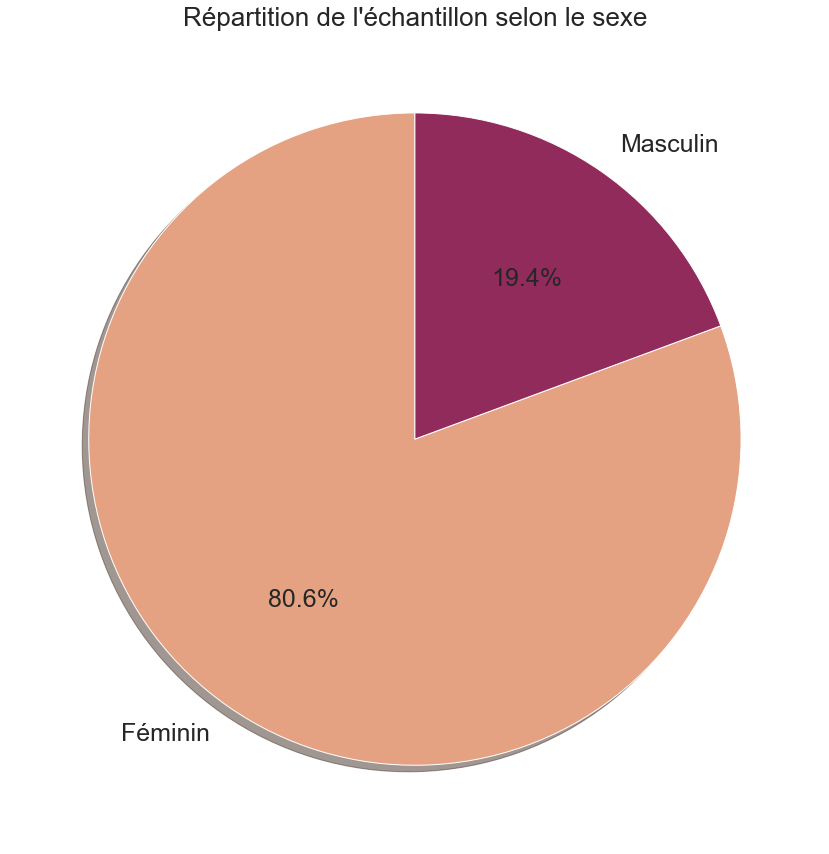

In [65]:
pie_create("Sexe","Repartition_sexe","Répartition de l'échantillon selon le sexe")

In [11]:
# Représenation de croisement de Vitamine D avec les facteurs de risque 

list_risque=["vit_d","sexe","age","IMC","residence","profession","enfants"]
list_noms=["Vitamine D","Sexe","Âge","IMC","Residence","Profession","Enfants"]
mat_corr_small(list_risque,list_noms,"correlation_facteur_risque","Matrice de Correlation entre les facteurs de risque")

TypeError: mat_corr_small() missing 1 required positional argument: 'titles'

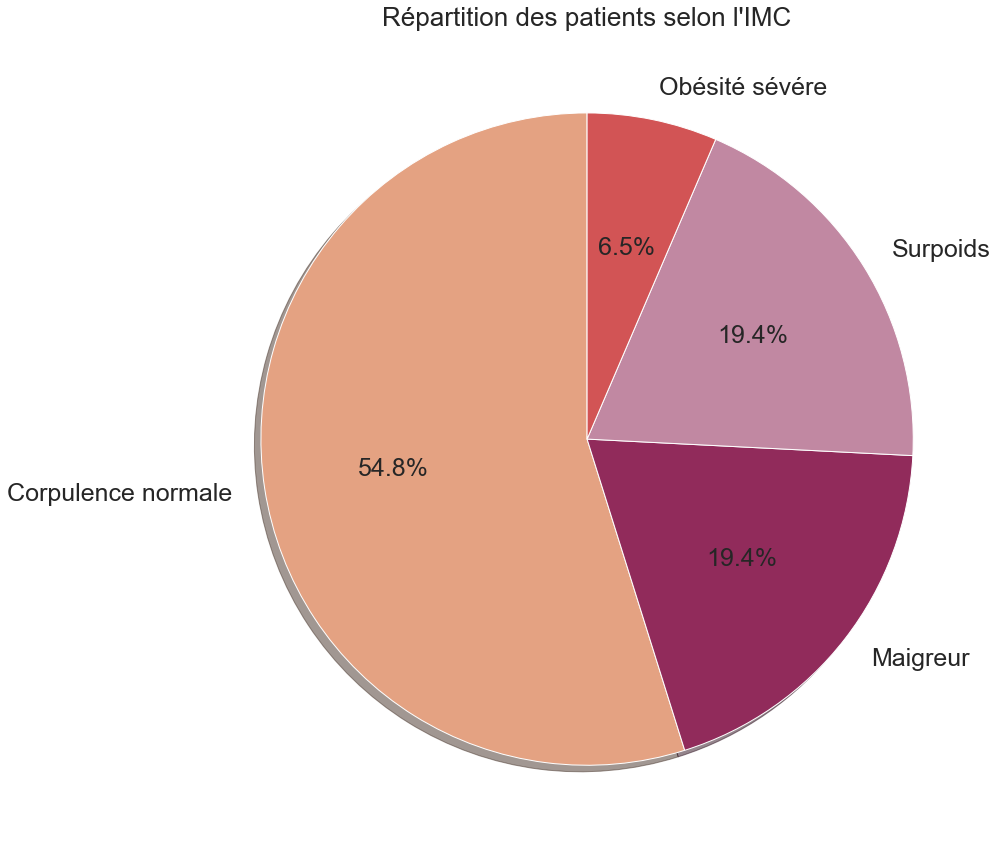

In [11]:
# Représentation rapport IMC et Vitamine D

imc_type = pd.DataFrame(df, columns=['IMC'])
bins = [16.5,18.5,25,30,40]
labels = ['Maigreur','Corpulence normale','Surpoids','Obésité sévére']
df['imc_type'] = pd.cut(imc_type.IMC, bins, labels = labels,include_lowest = True)
pie_create("imc_type","Repartition_selond_poids","Répartition des patients selon l'IMC")



21.4
18.95
9.65
7.38


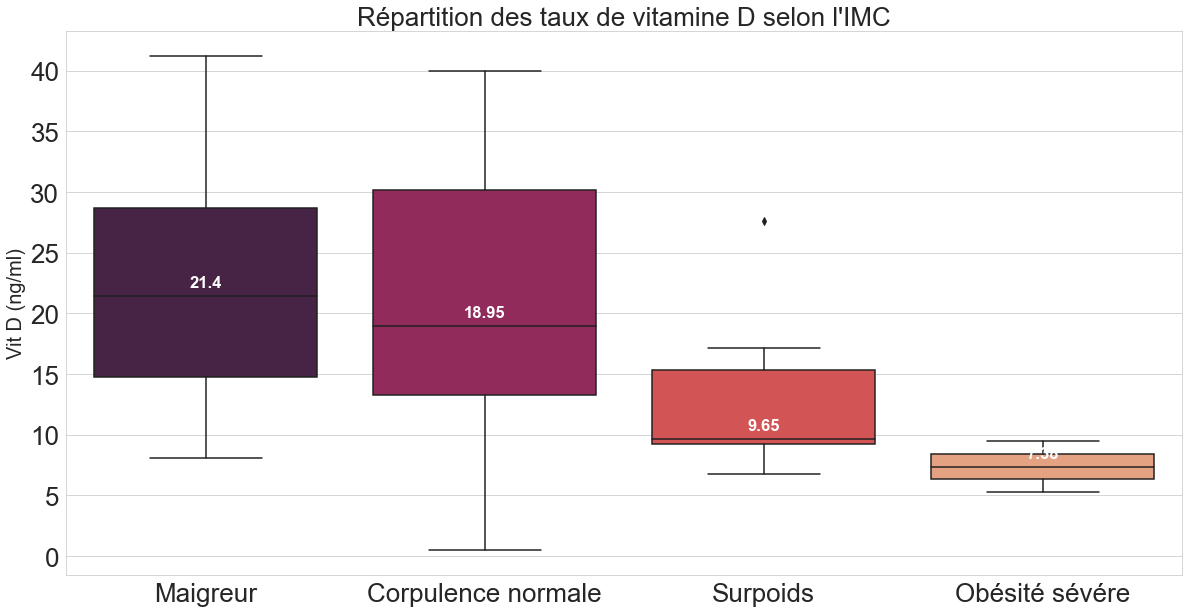

In [97]:
boxplot_multiv("vit_d","imc_type","","Vit D (ng/ml)","Repartition_vit_d_IMC","Répartition des taux de vitamine D selon l'IMC")

21.08
15.51
17.35
9.64
30.2


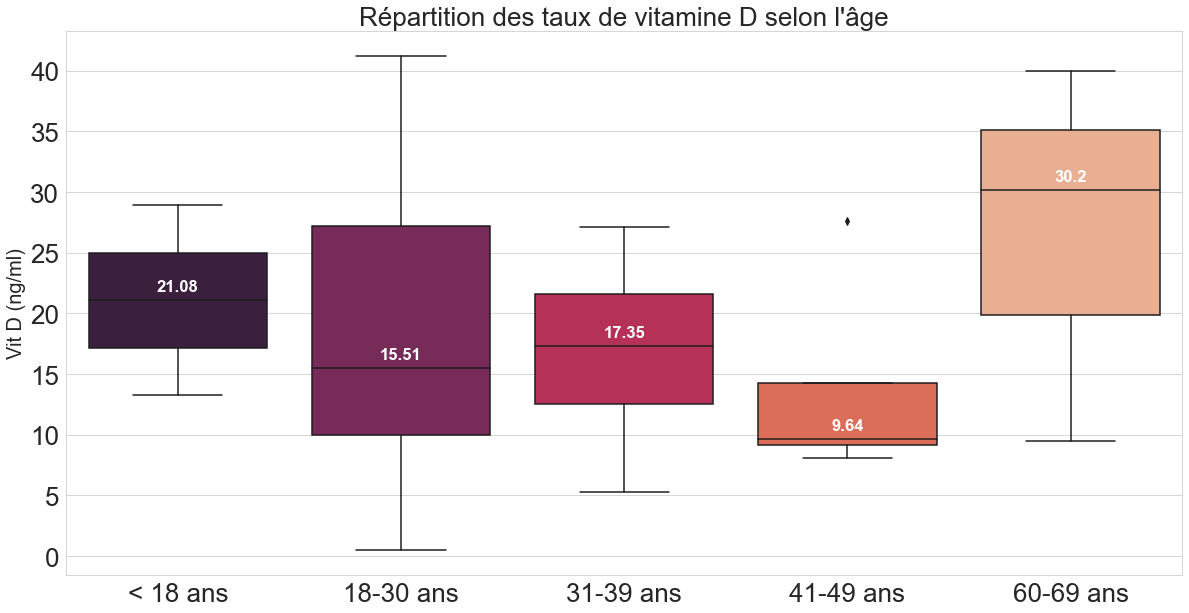

In [96]:
boxplot_multiv("vit_d","agerange","","Vit D (ng/ml)","Repartition_vit_d_age","Répartition des taux de vitamine D selon l'âge")

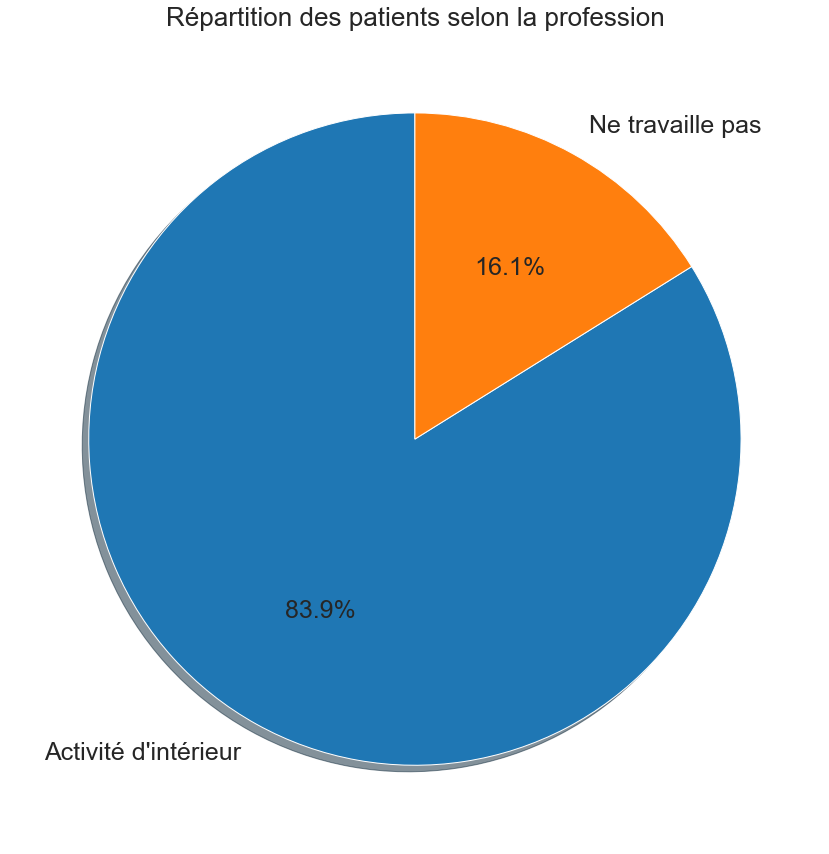

In [94]:
pie_create("profession","Repartition_selon_profession","Répartition des patients selon la profession")


14.8
30.2


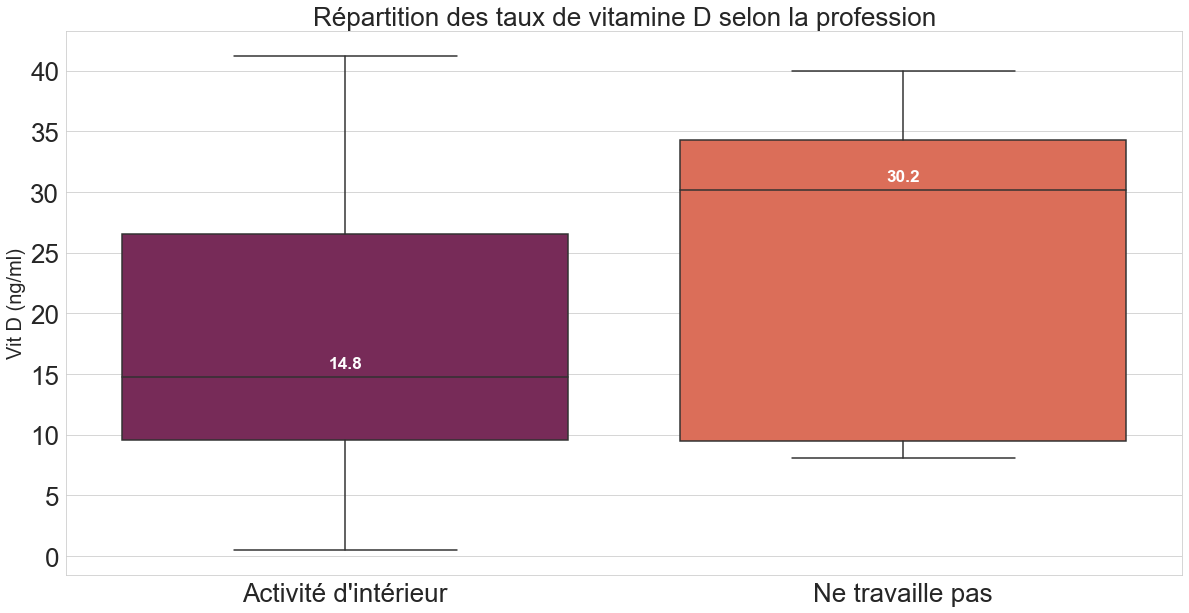

In [91]:
boxplot_multiv("vit_d","profession","","Vit D (ng/ml)","Repartition_vit_d_profession","Répartition des taux de vitamine D selon la profession")

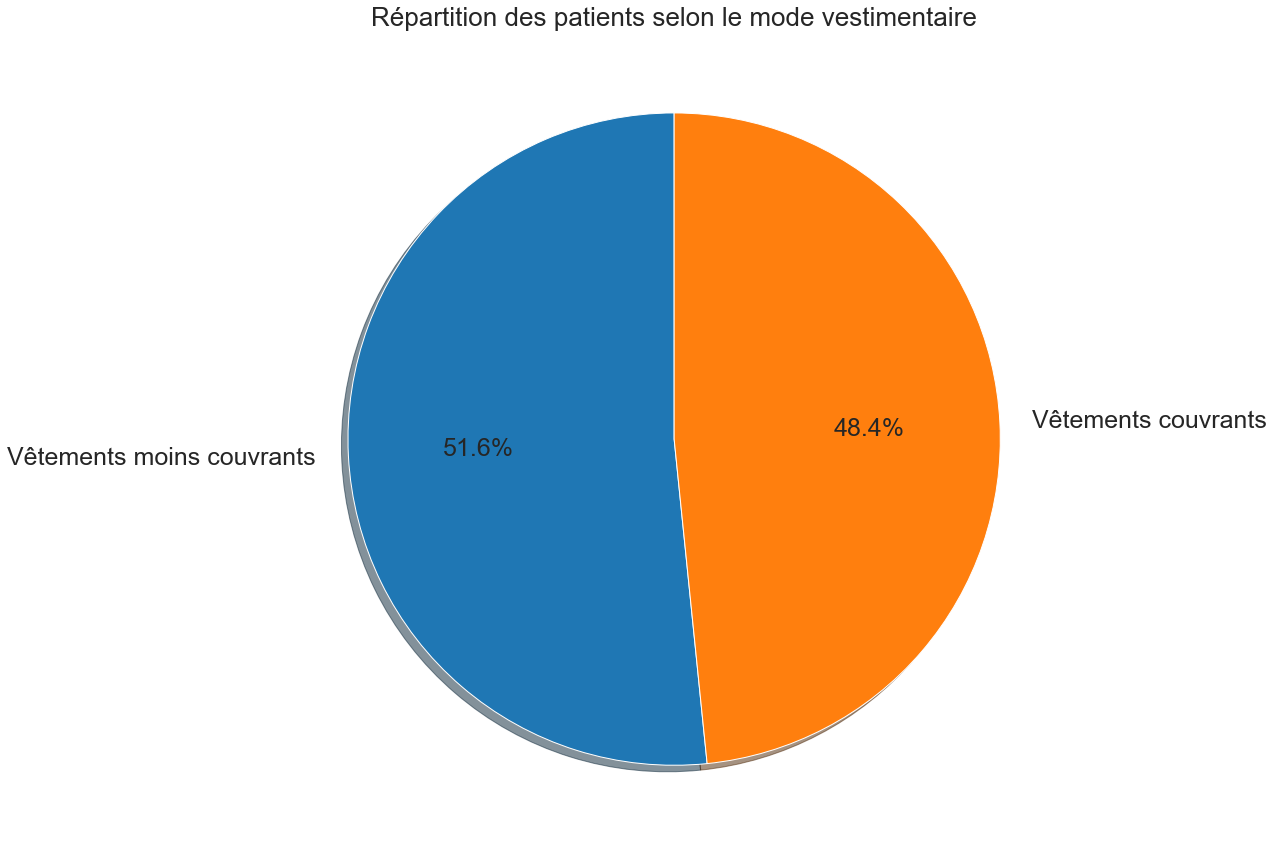

In [98]:
pie_create("vestimentaire","Repartition_selon_vestimentaire","Répartition des patients selon le mode vestimentaire")


9.47
17.63


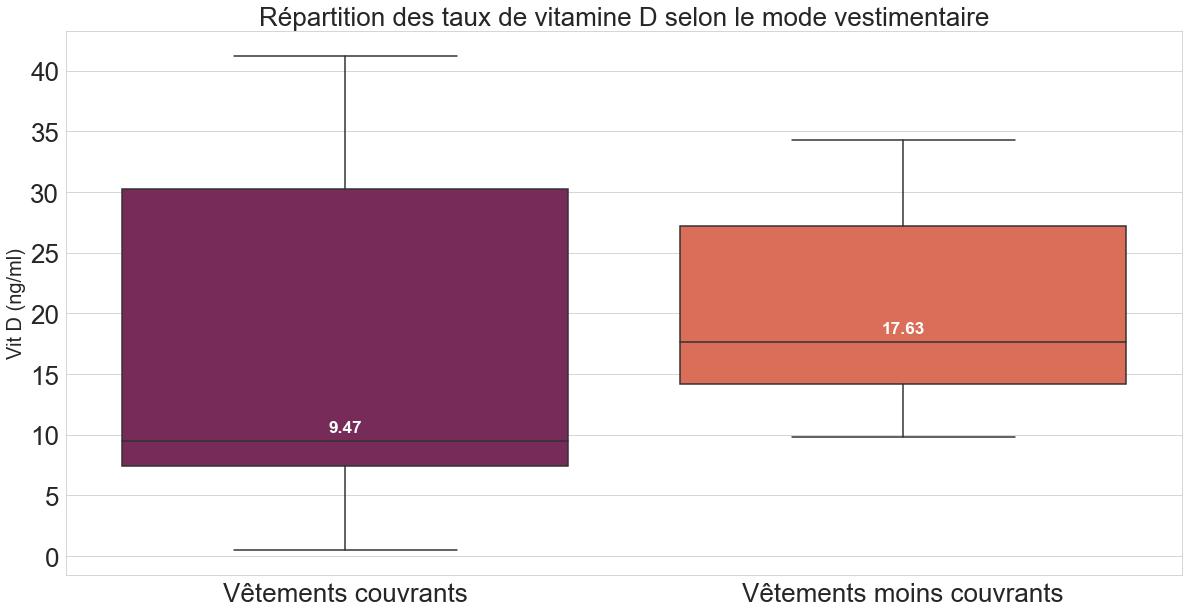

In [90]:
boxplot_multiv("vit_d","vestimentaire","","Vit D (ng/ml)","Repartition_vit_d_vetements","Répartition des taux de vitamine D selon le mode vestimentaire")

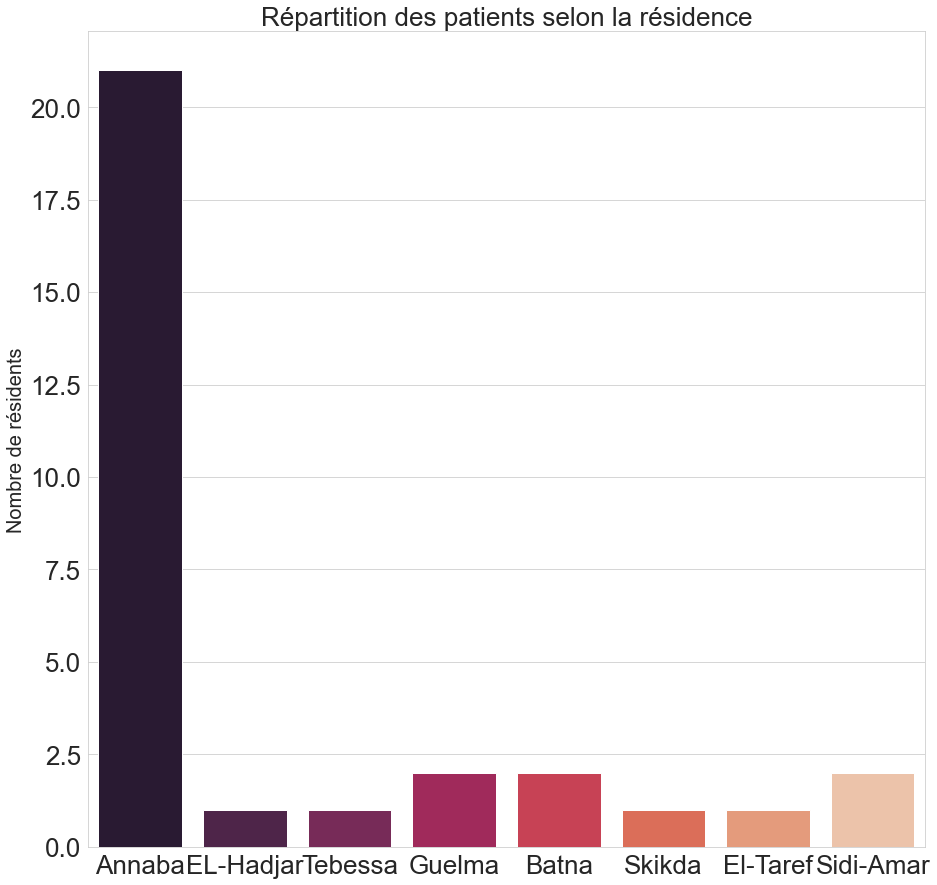

In [104]:
#boxplot_multiv("vit_d","residence","Repartition_vit_d_residence","Répartition des taux de vitamine D selon la residence")
plots_create("residence","Nombre de résidents","Repartition_residents","Répartition des patients selon la résidence")


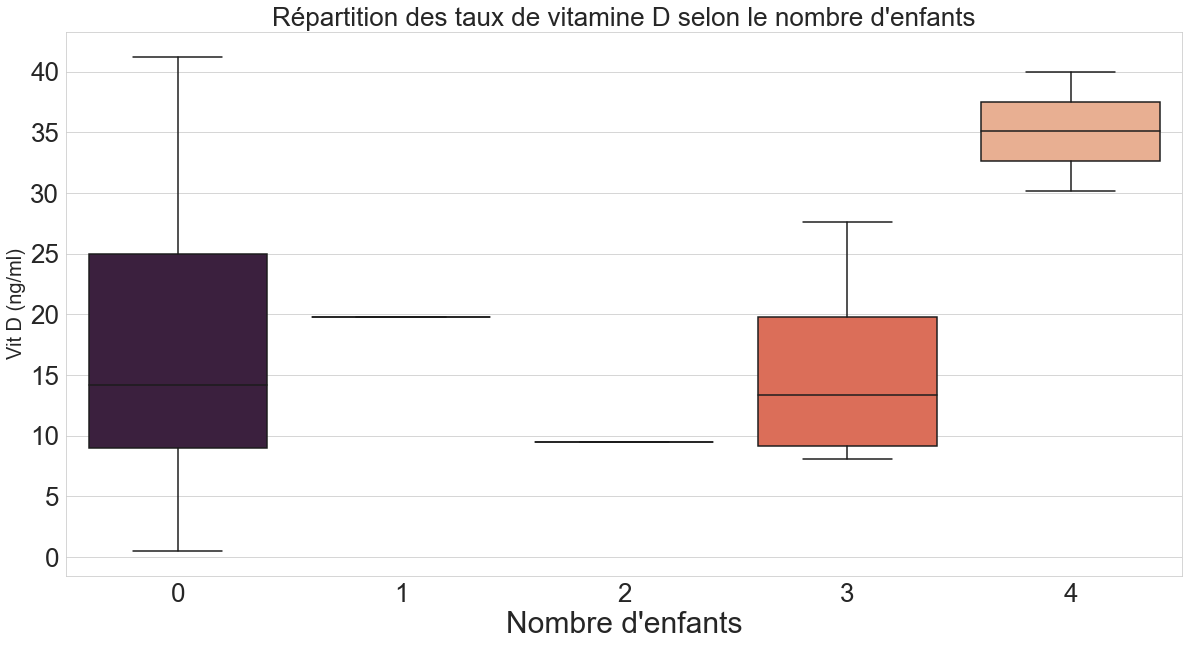

In [92]:
femme = df[df['Sexe'].isin(['Féminin'])]
tmp=df
df=femme
boxplot_multiv("vit_d","enfants","Nombre d'enfants","Vit D (ng/ml)","Repartition_vit_d_enfants","Répartition des taux de vitamine D selon le nombre d'enfants")
df=tmp
#boxplot_multiv("vit_d","vestimentaire","","Vit D (ng/ml)","Repartition_vit_d_profession","Répartition des taux de vitamine D selon le mode vestimentaire")

In [32]:
df2=df

In [33]:
df2[['first_antecedents','second_antecedents']] = pd.DataFrame(df.antecedents.str.split('+',1).tolist(), columns = ['first_antecedent','second_antecedent'])
df2['second_antecedents'] = df2['second_antecedents'].replace(np.nan, "Rien")

In [34]:
df2[['second_antecedents','troisieme_antecedents']] = pd.DataFrame(df.second_antecedents.str.split('+',1).tolist(),columns = ['second_antecedents','troisieme_antecedents'])
df2['troisieme_antecedents'] = df2['troisieme_antecedents'].replace(np.nan, "Rien")


In [35]:
#df3.loc[1]['first_antecedents']


In [36]:
df3=df2[['first_antecedents','second_antecedents','troisieme_antecedents']]

In [37]:
df4 = df.pivot(index=None, columns='first_antecedents', values='vit_d')
df4 = df4.replace(np.nan, 0)
#df3.to_csv('antecedents.csv', index=False)  

In [38]:
for i in range(0,df3.shape[0]):
    for j in df4.columns:
        if df3.loc[i]['first_antecedents']==j or df3.loc[i]['second_antecedents']==j or df3.loc[i]['troisieme_antecedents']==j:
            df4.loc[i][j]=1


In [39]:
df4.columns

Index(['Auto-immune', 'Cardiaque', 'Carence vitaminique', 'Dermatologique',
       'Endocrinienne', 'Gastrique', 'Hématologique', 'Neurologique', 'ORL',
       'Ophtalmologique', 'Osseuse', 'Patient sain'],
      dtype='object', name='first_antecedents')

In [40]:
#df5=df[['vit_d']]

In [22]:
#df6=pd.concat([df5, df4], axis=0, ignore_index=True)


ValueError: columns overlap but no suffix specified: Index(['vit_d'], dtype='object')

In [41]:
df4.to_csv("pathology_data.csv", index=True, encoding='utf-8') 

In [58]:
df4

Auto-immune  Cardiaque  Carence vitaminique  Dermatologique  \
0           0.0        1.0                  0.0             0.0   
1           0.0        0.0                  0.0             0.0   
2           0.0        0.0                  0.0             0.0   
3           1.0        0.0                  0.0             0.0   
4           1.0        0.0                  0.0             0.0   
5           1.0        0.0                  0.0             0.0   
6           0.0        0.0                  0.0             0.0   
7           0.0        0.0                  0.0             1.0   
8           0.0        0.0                  0.0             0.0   
9           1.0        0.0                  0.0             0.0   
10          0.0        0.0                  0.0             0.0   
11          0.0        0.0                  0.0             0.0   
12          0.0        0.0                  0.0             0.0   
13          0.0        0.0                  0.0             0.0   
14          0.0        0.0                  0.0             0.0   
15          0.0        0.0                  0.0             0.0   
16          0.0        0.0                  0.0             0.0   
17          1.0        0.0                  0.0             0.0   
18          0.0        0.0                  0.0             0.0   
19          0.0        0.0                  0.0             0.0   
20          0.0        0.0                  0.0             0.0   
21          1.0        0.0                  0.0             0.0   
22          0.0        1.0                  0.0             0.0   
23          0.0        0.0                  1.0             0.0   
24          0.0        0.0                  0.0             0.0   
25          1.0        0.0                  0.0             0.0   
26          0.0        0.0                  0.0             0.0   
27          0.0        0.0                  0.0             0.0   
28          0.0        0.0                  0.0             0.0   
29          0.0        0.0                  0.0             0.0   
30          0.0        0.0                  0.0             0.0   

    Endocrinienne  Gastrique  Hématologique  Neurologique  ORL  \
0             0.0        0.0            0.0           0.0  0.0   
1             0.0        0.0            0.0           0.0  0.0   
2             1.0        0.0            0.0           0.0  0.0   
3             1.0        0.0            0.0           0.0  0.0   
4             0.0        0.0            0.0           0.0  0.0   
5             0.0        0.0            0.0           0.0  1.0   
6             0.0        0.0            0.0           0.0  0.0   
7             0.0        0.0            0.0           0.0  0.0   
8             1.0        0.0            0.0           0.0  0.0   
9             0.0        0.0            0.0           0.0  0.0   
10            0.0        0.0            0.0           0.0  1.0   
11            0.0        0.0            0.0           0.0  0.0   
12            1.0        0.0            0.0           0.0  0.0   
13            0.0        0.0            1.0           0.0  0.0   
14            0.0        0.0            0.0           0.0  0.0   
15            0.0        0.0            0.0           0.0  0.0   
16            0.0        0.0            0.0           0.0  0.0   
17            0.0        0.0            0.0           0.0  0.0   
18            1.0        0.0            0.0           0.0  0.0   
19            0.0        1.0            0.0           0.0  0.0   
20            0.0        0.0            0.0           0.0  0.0   
21            0.0        0.0            0.0           0.0  1.0   
22            0.0        0.0            0.0           0.0  0.0   
23            0.0        0.0            0.0           0.0  0.0   
24            0.0        0.0            0.0           1.0  1.0   
25            0.0        0.0            0.0           0.0  0.0   
26            0.0        0.0            0.0           0.0  0.0   
27         

In [100]:
df3=df4

In [101]:
df3.columns

Index(['Auto-immune', 'Cardiaque', 'Carence vitaminique', 'Dermatologique',
       'Endocrinienne', 'Gastrique', 'Hématologique', 'Neurologique', 'ORL',
       'Ophtalmologique', 'Osseuse', 'Patient sain'],
      dtype='object', name='first_antecedents')

In [102]:
del df3['Carence vitaminique']

In [103]:
count_row = df3.sum(axis=0)
count_row.shape

(11,)

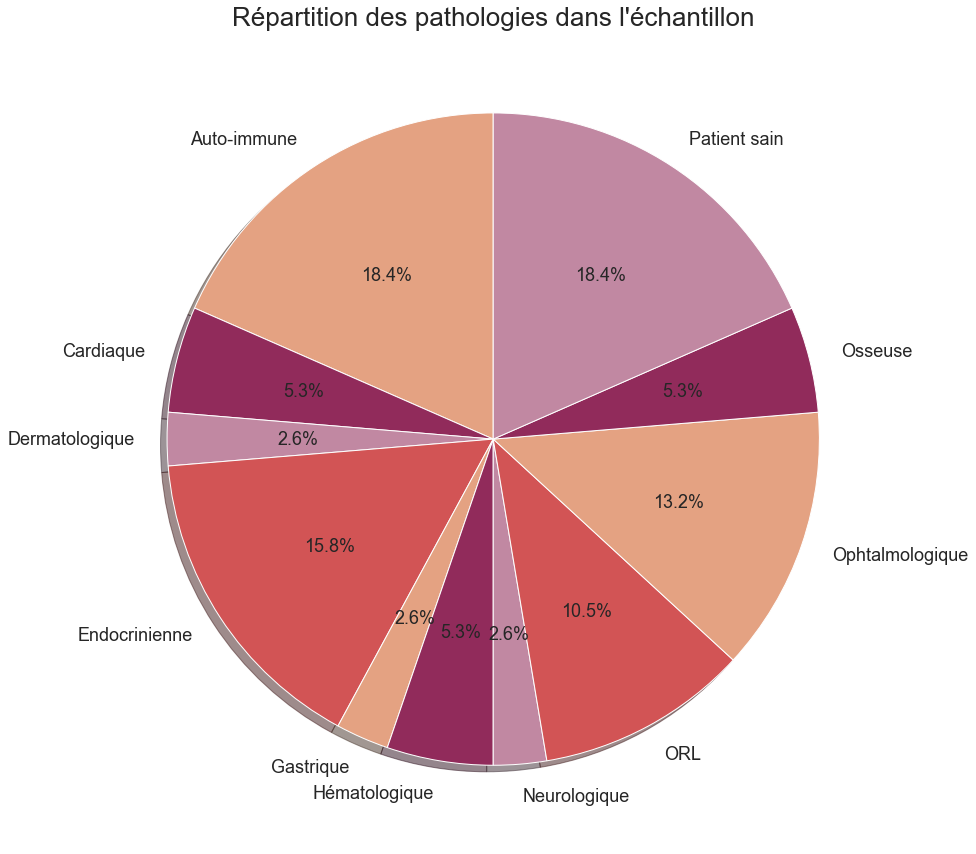

In [114]:
color=['#E4A282','#912B5B','#c188a2', '#D25455']

plt.figure(figsize=(20,15)) 
plt.rcParams.update({'font.size': 10})
h=pie(count_row.values, labels=count_row.index, autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 18},colors=color)

title("Répartition des pathologies dans l'échantillon",fontsize=26)

plt.savefig('repartition_pathologies.jpeg')

In [3]:
df4=df4.join(df['vit_d'])

NameError: name 'df4' is not defined

In [106]:
df4.columns

Index(['Auto-immune', 'Cardiaque', 'Carence vitaminique', 'Dermatologique',
       'Endocrinienne', 'Gastrique', 'Hématologique', 'Neurologique', 'ORL',
       'Ophtalmologique', 'Osseuse', 'Patient sain', 'vit_d'],
      dtype='object')

In [116]:

df5=df4[['Auto-immune', 'Cardiaque', 'Dermatologique',
       'Endocrinienne', 'Gastrique', 'Hématologique', 'Neurologique', 'ORL',
       'Ophtalmologique', 'Osseuse']].corrwith(df4['vit_d'])
df5=pd.DataFrame(df5,columns=['Vitamine D'])
df5=df5.sort_values(by=['Vitamine D'])
df5.head(11)

Vitamine D
Cardiaque         -0.312952
Ophtalmologique   -0.160852
Auto-immune       -0.132145
Osseuse           -0.103825
Dermatologique    -0.074912
Hématologique     -0.035385
ORL                0.065804
Gastrique          0.138415
Neurologique       0.151655
Endocrinienne      0.218348

In [43]:
df10 = pd.read_csv('pathology_data.csv', sep=";", engine="python", skipfooter=0,error_bad_lines=False)
df5=df10[['Auto-immune', 'Cardiaque', 'Dermatologique',
       'Endocrinienne', 'Gastrique', 'Hématologique', 'Neurologique', 'ORL',
       'Ophtalmologique', 'Osseuse']].corrwith(df10['vit_d'])
df5=pd.DataFrame(df5,columns=['Vitamine D'])
df5=df5.sort_values(by=['Vitamine D'])
df5.head(11)

Vitamine D
Cardiaque         -0.312952
Ophtalmologique   -0.160852
Auto-immune       -0.132145
Osseuse           -0.103825
Dermatologique    -0.074912
Hématologique     -0.035385
ORL                0.065804
Gastrique          0.138415
Neurologique       0.151655
Endocrinienne      0.218348

In [53]:
df2=df
df2[['first_medication','second_medication']] = pd.DataFrame(df.medication.str.split('+',1).tolist(), columns = ['first_medication','second_medication'])
df2['second_medication'] = df2['second_medication'].replace(np.nan, "Rien")
df2[['second_medication','troisieme_medication']] = pd.DataFrame(df.second_medication.str.split('+',1).tolist(),columns = ['second_medication','troisieme_medication'])
df2['troisieme_medication'] = df2['troisieme_medication'].replace(np.nan, "Rien")
df3=df2[['first_medication','second_medication','troisieme_medication']]
df4 = df.pivot(index=None, columns='first_medication', values='vit_d')
df4 = df4.replace(np.nan, 0)

In [54]:
for i in range(0,df3.shape[0]):
    for j in df4.columns:
        if df3.loc[i]['first_medication']==j or df3.loc[i]['second_medication']==j or df3.loc[i]['troisieme_medication']==j:
            df4.loc[i][j]=1


In [63]:
df4=df4.join(df5)
df4.to_csv("medication_data.csv", index=True, encoding='utf-8') 

In [64]:
#df['profession']=df['profession'].astype('category').cat.codes
df4

Anti-dépresseur  Anti-fongique  Anti-inflammatoire  Antibiotique  \
0               0.0            0.0                 0.0           1.0   
1               0.0            0.0                 0.0           0.0   
2               0.0            0.0                 0.0           0.0   
3               0.0            0.0                 1.0           0.0   
4               0.0            0.0                 1.0           0.0   
5               0.0            0.0                 0.0           0.0   
6               0.0            0.0                 0.0           0.0   
7               0.0            1.0                 0.0           0.0   
8               0.0            0.0                 0.0           0.0   
9               0.0            0.0                 0.0           0.0   
10              0.0            0.0                 0.0           0.0   
11              0.0            0.0                 0.0           0.0   
12              0.0            0.0                 0.0           0.0   
13              0.0            0.0                 0.0           0.0   
14              0.0            0.0                 0.0           0.0   
15              0.0            0.0                 0.0           0.0   
16              0.0            0.0                 0.0           0.0   
17              0.0            0.0                 0.0           0.0   
18              1.0            0.0                 0.0           0.0   
19              0.0            0.0                 0.0           0.0   
20              0.0            0.0                 0.0           0.0   
21              0.0            0.0                 0.0           0.0   
22              0.0            0.0                 0.0           0.0   
23              0.0            0.0                 0.0           0.0   
24              0.0            0.0                 0.0           0.0   
25              0.0            0.0                 0.0           0.0   
26              0.0            0.0                 0.0           0.0   
27              0.0            0.0                 0.0           0.0   
28              0.0            0.0                 1.0           0.0   
29              0.0            0.0                 0.0           0.0   
30              0.0            0.0                 0.0           0.0   

    Antidiabétique  Antihistaminique  Aucune  Collyre  CorticoÏde  \
0              0.0               0.0     0.0      0.0         0.0   
1              0.0               0.0     1.0      0.0         0.0   
2              0.0               0.0     0.0      0.0         0.0   
3              0.0               0.0     0.0      1.0         0.0   
4              0.0               0.0     0.0      0.0         0.0   
5              0.0               0.0     1.0      0.0         0.0   
6              0.0               0.0     1.0      0.0         0.0   
7              0.0               0.0     0.0      0.0         0.0   
8              0.0               0.0     0.0      0.0         0.0   
9              0.0               1.0     0.0      0.0         0.0   
10             0.0               0.0     1.0      0.0         0.0   
11             0.0               0.0     1.0      0.0         0.0   
12             0.0               0.0     1.0      0.0         0.0   
13             0.0               0.0     0.0      0.0         0.0   
14             0.0               0.0     1.0      0.0         0.0   
15             0.0               0.0     1.0      0.0         0.0   
16             0.0               1.0     0.0      1.0         0.0   
17             0.0               1.0     0.0      1.0         0.0   
18             0.0               0.0     0.0      0.0         0.0   
19             0.0               0.0     1.0      0.0         0.0   
20             0.0               0.0     1.0      0.0         0.0   
21             0.0               0.0     0.0      0.0         1.0   
22             1.0               0.0     0.0      0.0         0.0   
23             0.0               0.0     1.

In [55]:
df4=df4.join(df['vit_d'])
df5=df4[['Anti-dépresseur', 'Anti-fongique', 'Anti-inflammatoire',
       'Antibiotique', 'Antidiabétique', 'Antihistaminique',
       'Collyre', 'CorticoÏde', 'Hormone thyroidienne',
       'Supplément vitaminique']].corrwith(df4['vit_d'])
df5=pd.DataFrame(df5,columns=['Vitamine D'])
df5=df5.sort_values(by=['Vitamine D'])
df5.head(11)

Vitamine D
Antihistaminique         -0.293999
Collyre                  -0.232814
Antidiabétique           -0.222371
Antibiotique             -0.212772
Supplément vitaminique   -0.201890
Anti-fongique            -0.074912
Anti-inflammatoire       -0.071303
Anti-dépresseur          -0.026255
CorticoÏde                0.103661
Hormone thyroidienne      0.193851

In [61]:
df4.to_csv("medication_data.csv", index=True, encoding='utf-8') 

In [64]:
df10 = pd.read_csv('test_data_medication.csv', sep=";", engine="python", skipfooter=0,error_bad_lines=False)
df10.head()

Anti-dépresseur  Anti-fongique  Anti-inflammatoire  Antibiotique  \
0              0.0            0.0                 0.0           1.0   
1              0.0            0.0                 0.0           0.0   
2              0.0            0.0                 0.0           0.0   
3              0.0            0.0                 1.0           0.0   
4              0.0            0.0                 1.0           0.0   

   Antidiabétique  Antihistaminique  Aucune  Collyre  CorticoÏde  \
0             0.0               0.0     0.0      0.0         0.0   
1             0.0               0.0     1.0      0.0         0.0   
2             0.0               0.0     0.0      0.0         0.0   
3             0.0               0.0     0.0      1.0         0.0   
4             0.0               0.0     0.0      0.0         0.0   

   Hormone thyroidienne  Supplément vitaminique  vit_d  
0                   0.0                     0.0   5.88  
1                   0.0                     0.0  18.95  
2                   1.0                     0.0  39.97  
3                   1.0                     0.0   9.00  
4                   0.0                     0.0  30.20

In [65]:

df5=df10[['Anti-dépresseur', 'Anti-fongique', 'Anti-inflammatoire',
       'Antibiotique', 'Antidiabétique', 'Antihistaminique',
       'Collyre', 'CorticoÏde', 'Hormone thyroidienne',
       'Supplément vitaminique']].corrwith(df10['vit_d'])
df5=pd.DataFrame(df5,columns=['Vitamine D'])
df5=df5.sort_values(by=['Vitamine D'])
df5.head(11)

Vitamine D
Antihistaminique         -0.293999
Collyre                  -0.232814
Antidiabétique           -0.222371
Antibiotique             -0.212772
Supplément vitaminique   -0.201890
Anti-fongique            -0.074912
Anti-inflammatoire       -0.071303
Anti-dépresseur          -0.026255
CorticoÏde                0.103661
Hormone thyroidienne      0.193851

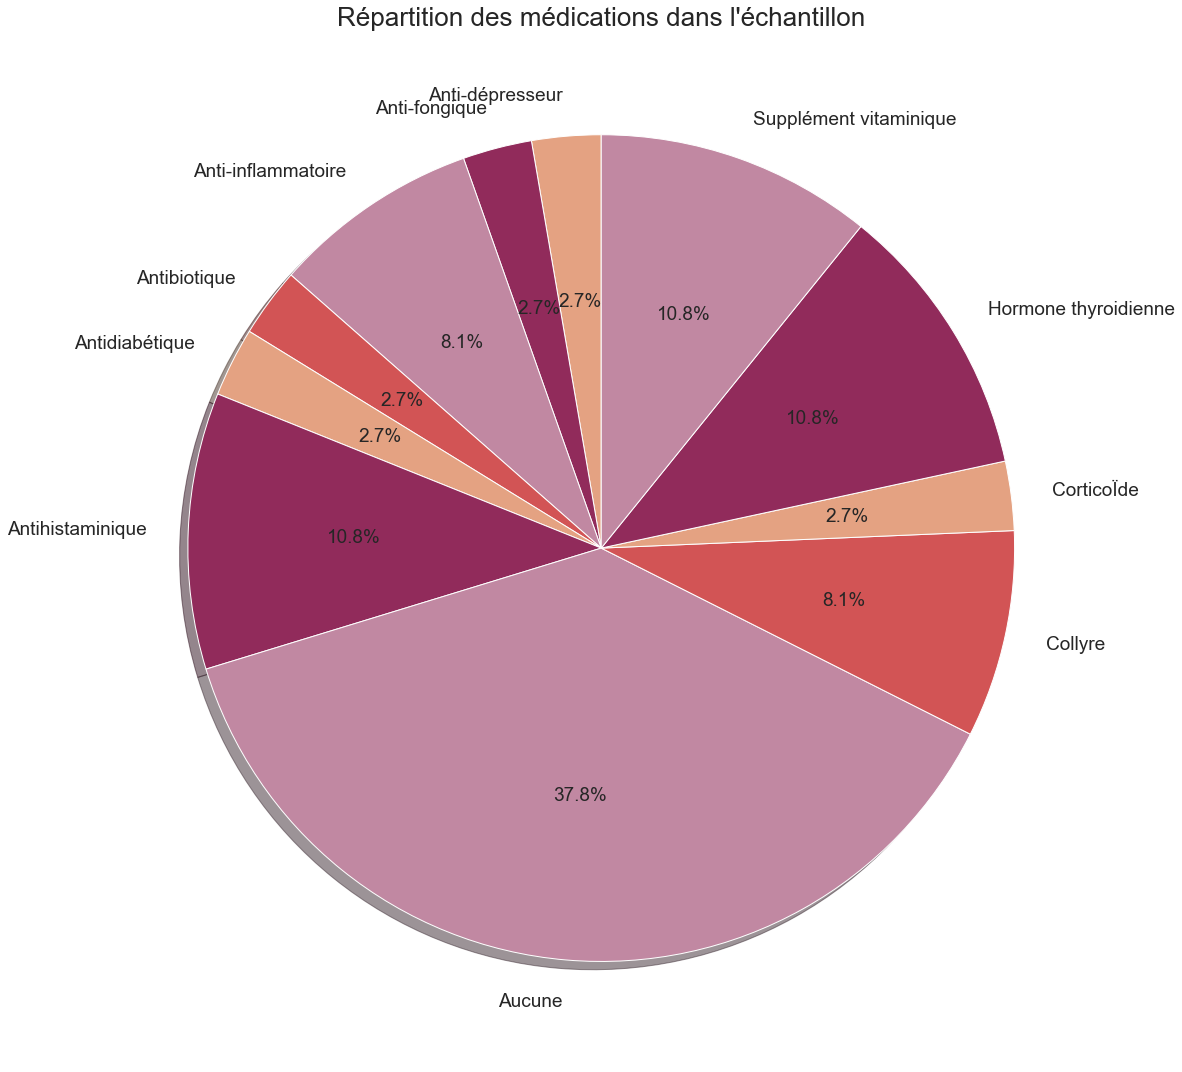

In [140]:
df3=df4
count_row = df3.sum(axis=0)
count_row.shape
color=['#E4A282','#912B5B','#c188a2', '#D25455']

plt.figure(figsize=(20,15)) 
plt.rcParams.update({'font.size': 10})
h=pie(count_row.values, labels=count_row.index, autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 19},colors=color)
title("Répartition des médications dans l'échantillon",fontsize=26)
plt.tight_layout()
plt.savefig('repartition_médication.jpeg')

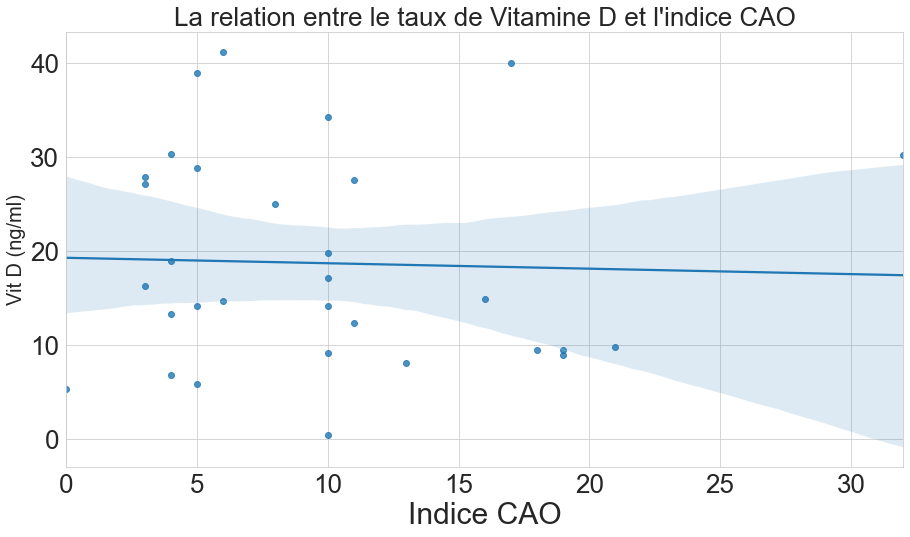

In [23]:
regplot_multiv("vit_d","CAO","Indice CAO","Vit D (ng/ml)","Repartition_vit_d_CAO","La relation entre le taux de Vitamine D et l'indice CAO")

In [120]:
# CONFIRMATION DE CORRELATION

print(df[['CAO']].corrwith(df['vit_d']))

CAO   -0.032529
dtype: float64


11.5
8.0
5.0
8.0


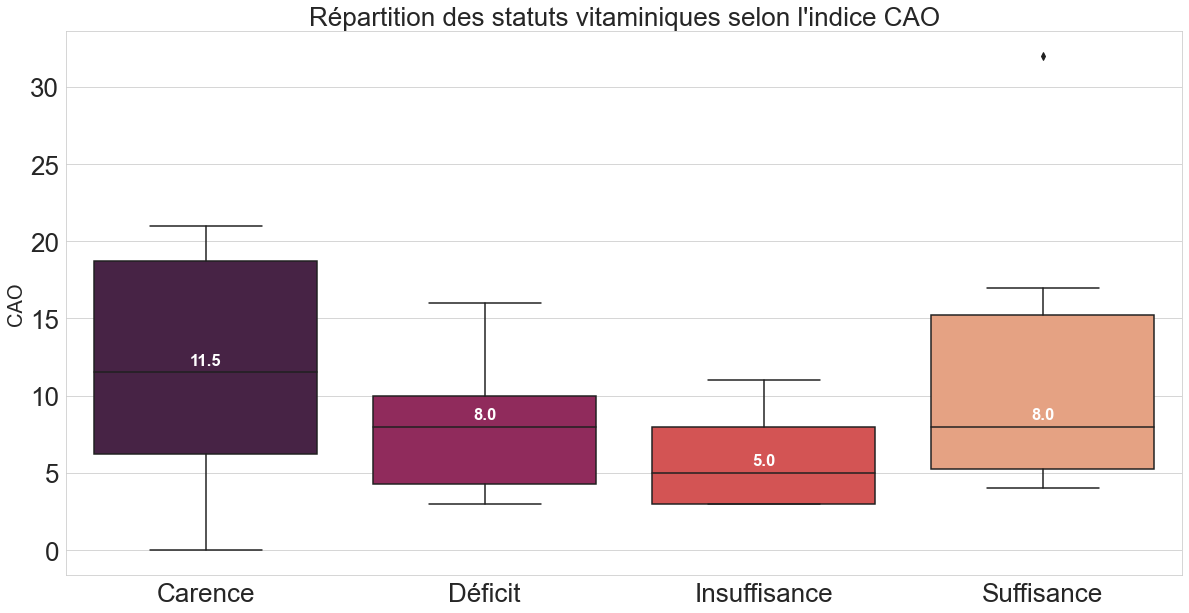

In [101]:
boxplot_multiv("CAO","niv_vitD","","CAO","CAO_box","Répartition des statuts vitaminiques selon l'indice CAO")


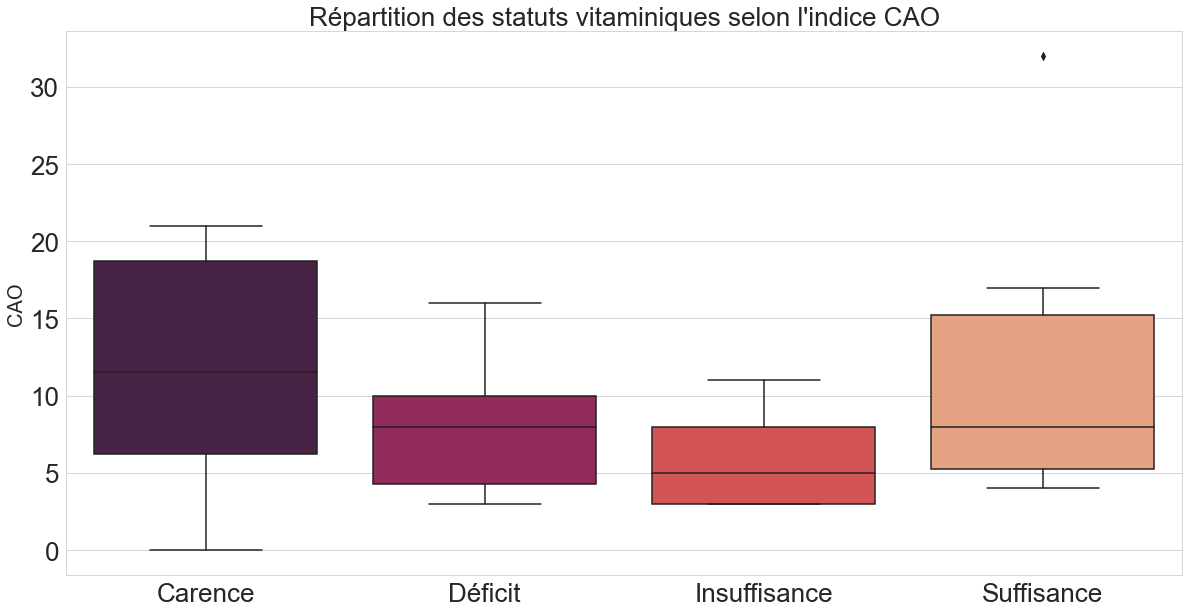

In [34]:

  
plt.figure(figsize=(20, 10)) 
sns.set_style("whitegrid")

b=sns.boxplot(data=df, x="niv_vitD",y="CAO",palette="rocket")
b.set_xlabel("X Label",fontsize=30)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=26)
b.axes.set_title("Répartition des statuts vitaminiques selon l'indice CAO",fontsize=26)
b.set(xlabel=None)
b.set(ylabel="CAO")
plt.savefig("taux_vit_d_CAO"+'.jpeg')


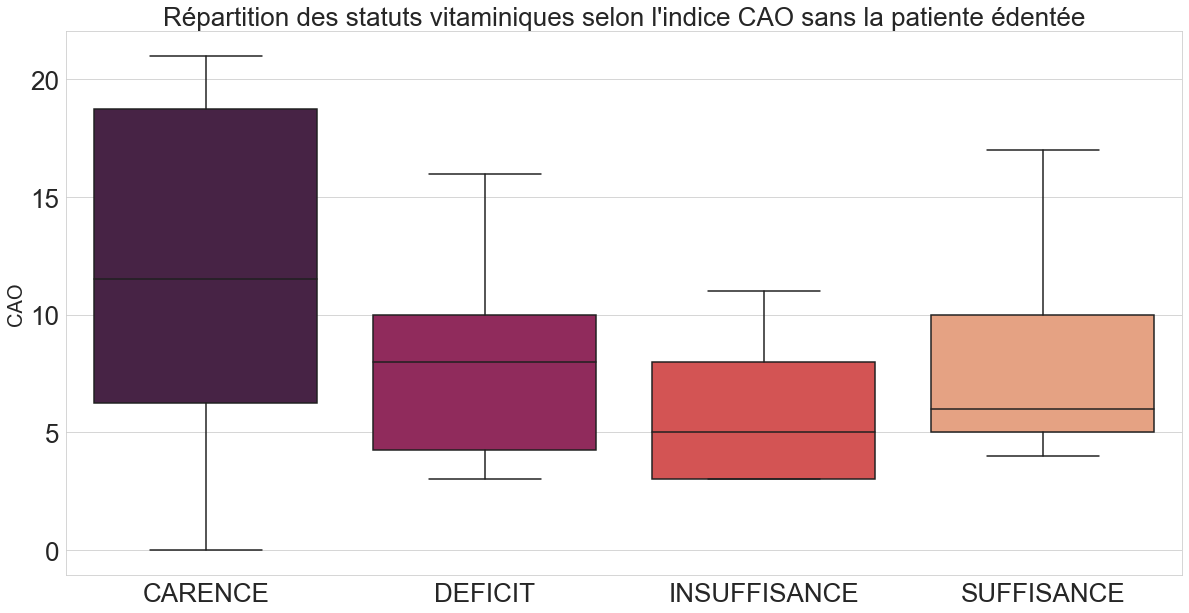

In [11]:
femme = df[~df['vit_d'].isin([30.2])]
tmp=df
df=femme
plt.figure(figsize=(20, 10)) 
sns.set_style("whitegrid")

b=sns.boxplot(data=df, x="niv_vitD",y="CAO",palette="rocket")
b.set_xlabel("X Label",fontsize=30)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=26)
b.axes.set_title("Répartition des statuts vitaminiques selon l'indice CAO sans la patiente édentée",fontsize=26)
b.set(xlabel=None)
b.set(ylabel="CAO")
plt.savefig("taux_vit_d_CAO"+'.jpeg')
df=tmp

In [73]:
df.shape

(31, 79)

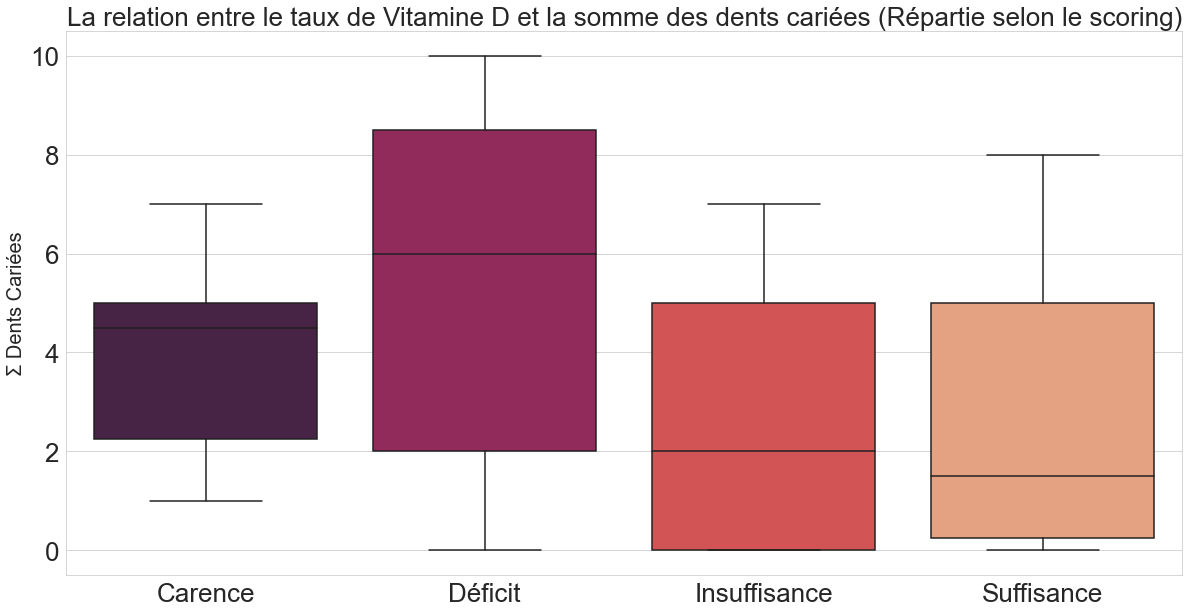

In [177]:
boxplot_multiv("sum_DentsCariées","niv_vitD","","Σ Dents Cariées","Repartition_niv_vit_d_dent_carié","La relation entre le taux de Vitamine D et la somme des dents cariées (Répartie selon le scoring)")


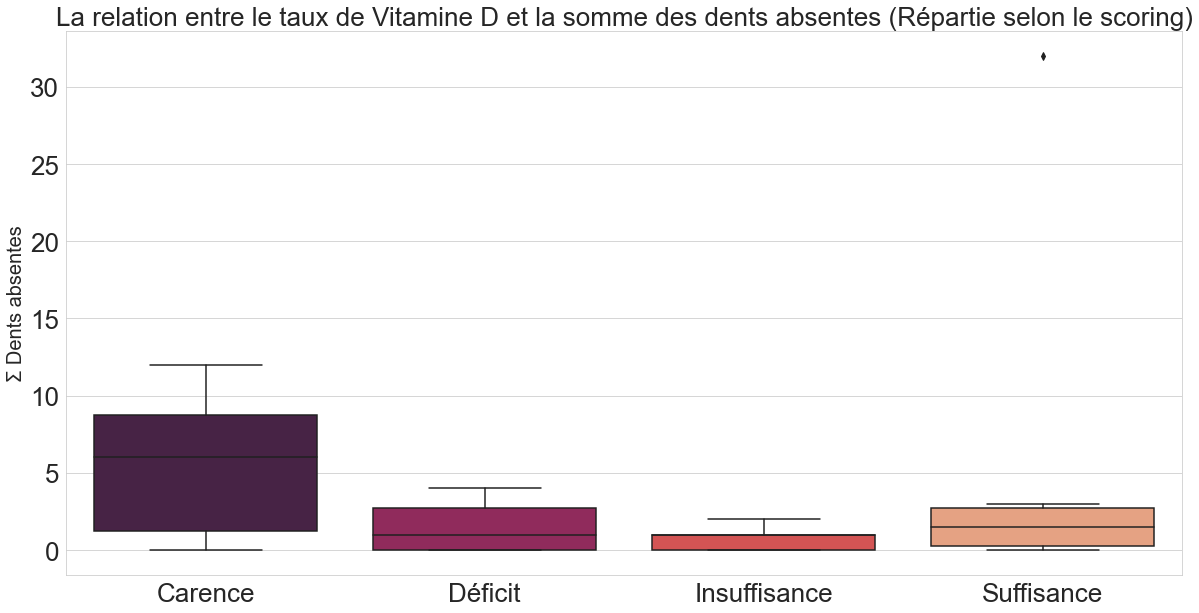

In [178]:
boxplot_multiv("sum_Dentsabsentes","niv_vitD","","Σ Dents absentes","Repartition_niv_vit_d_dent_absente","La relation entre le taux de Vitamine D et la somme des dents absentes (Répartie selon le scoring)")


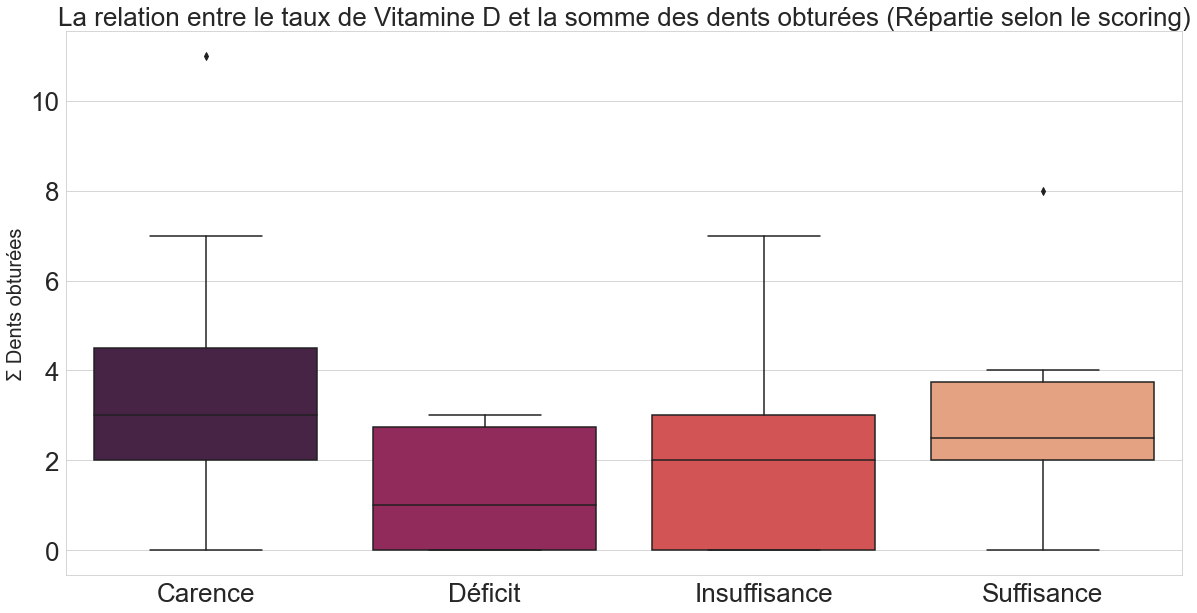

In [179]:
boxplot_multiv("sum_Dentsobturées","niv_vitD","","Σ Dents obturées","Repartition_niv_vit_d_dent_obturées","La relation entre le taux de Vitamine D et la somme des dents obturées (Répartie selon le scoring)")


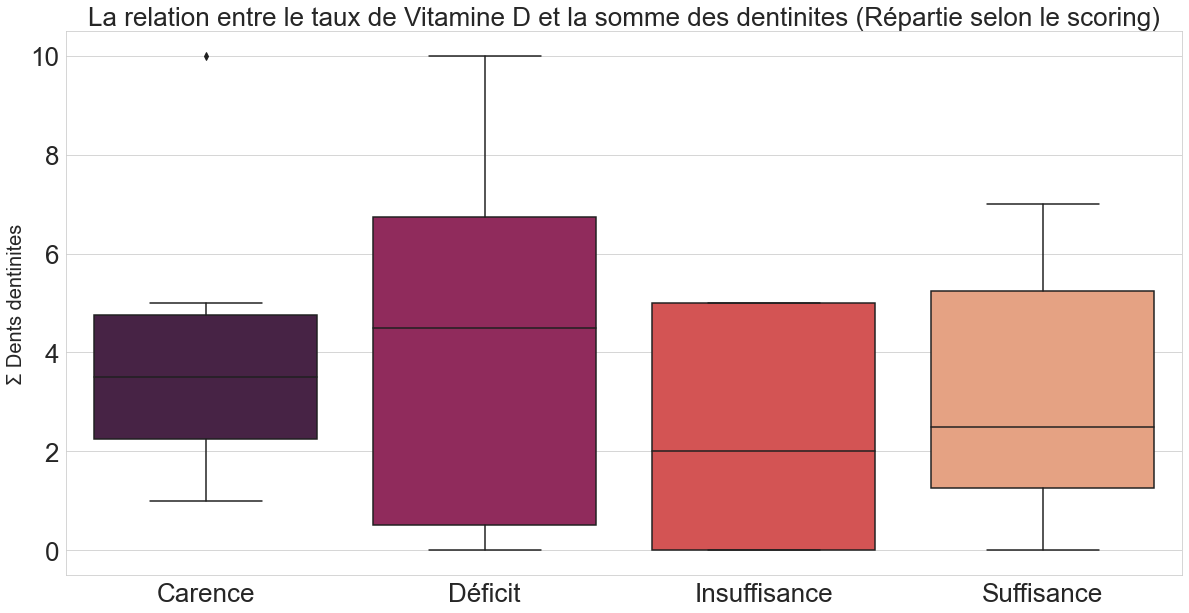

In [180]:
boxplot_multiv("sum_Dentinites","niv_vitD","","Σ Dents dentinites","Repartition_niv_vit_d_dent_dentinites","La relation entre le taux de Vitamine D et la somme des dentinites (Répartie selon le scoring)")


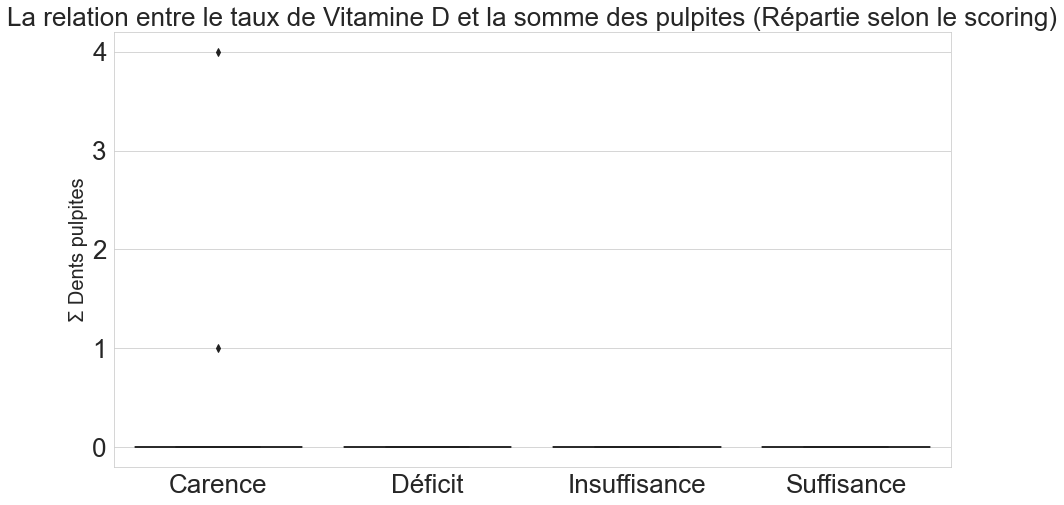

In [149]:
boxplot_multiv("sum_Pulpites","niv_vitD","","Σ Dents pulpites","Repartition_niv_vit_d_dent_pulpites","La relation entre le taux de Vitamine D et la somme des pulpites (Répartie selon le scoring)")


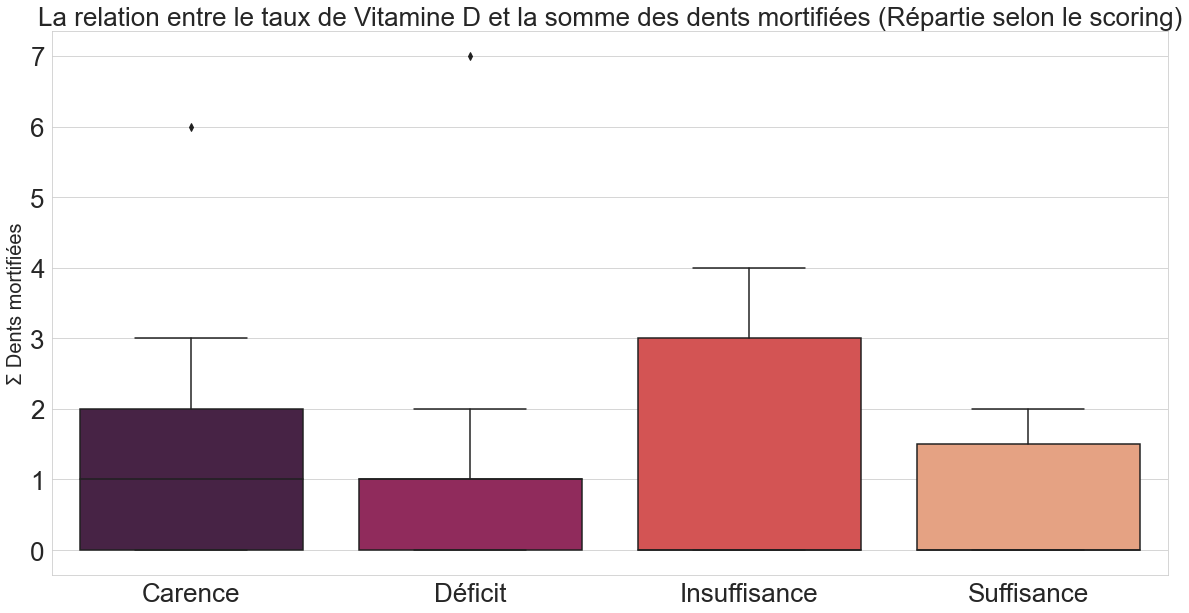

In [181]:
boxplot_multiv("sum_Mortifications","niv_vitD","","Σ Dents mortifiées","Repartition_niv_vit_d_dent_mortifié","La relation entre le taux de Vitamine D et la somme des dents mortifiées (Répartie selon le scoring)")


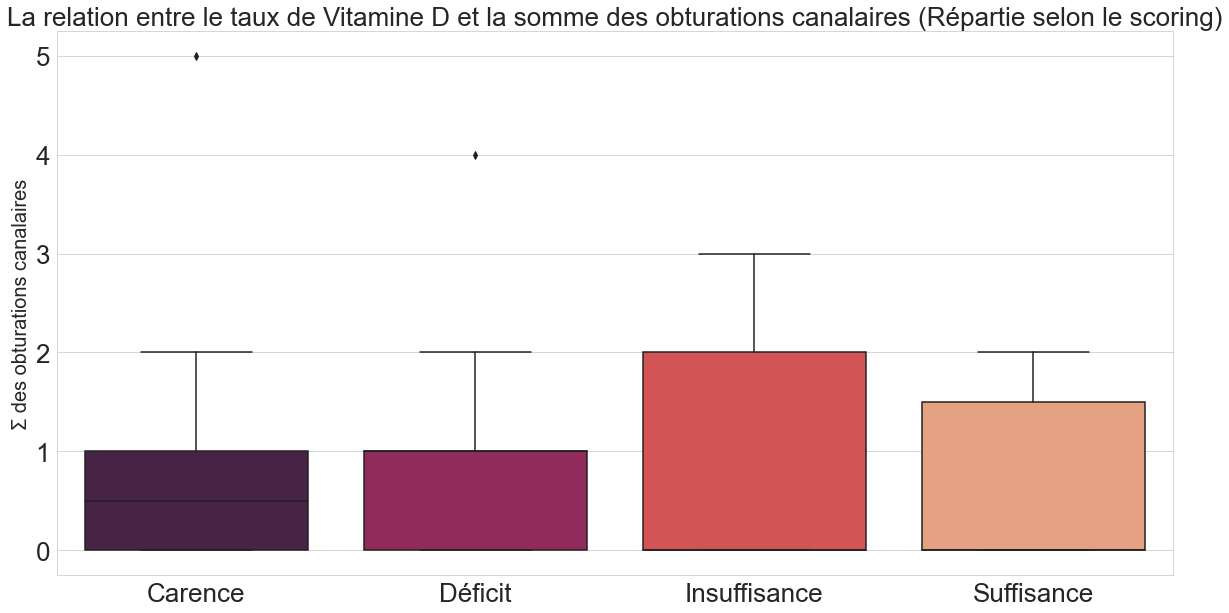

In [182]:
boxplot_multiv("sum_Obturationscanalaires","niv_vitD","","Σ des obturations canalaires","Repartition_niv_vit_d_obturations_canalaires","La relation entre le taux de Vitamine D et la somme des obturations canalaires (Répartie selon le scoring)")


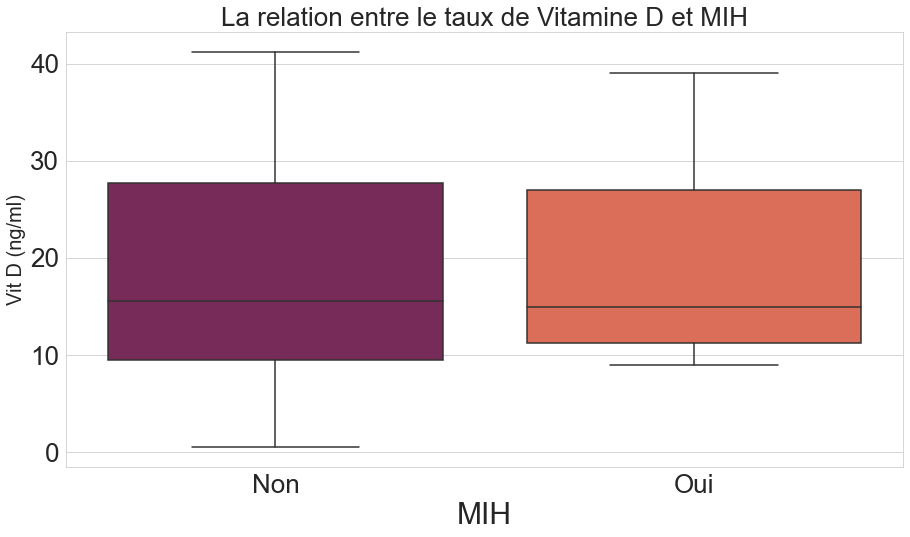

In [152]:
boxplot_multiv("vit_d","MIHeventuelle","MIH","Vit D (ng/ml)","Repartition_vit_d_MIH","La relation entre le taux de Vitamine D et MIH")


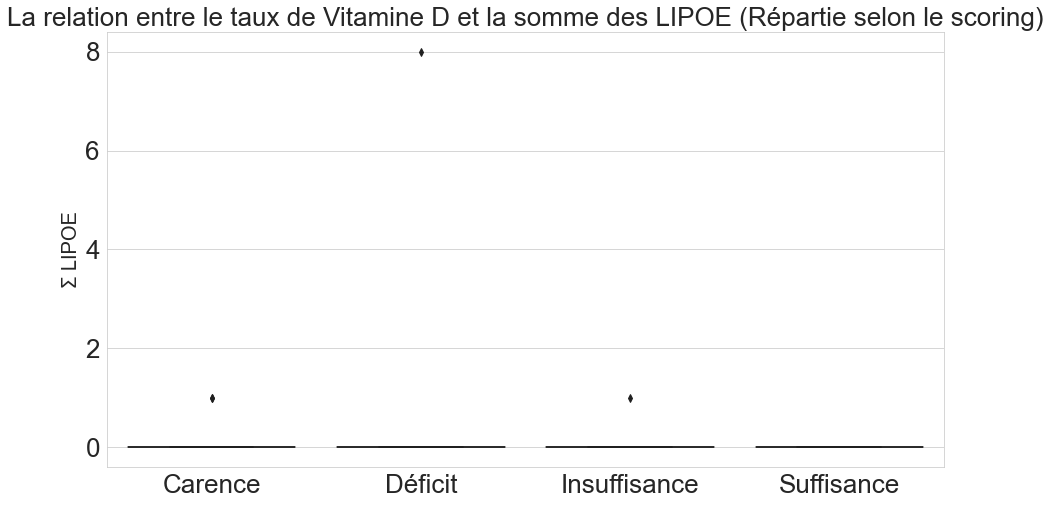

In [153]:
boxplot_multiv("sum_LIPOE","niv_vitD","","Σ LIPOE","Repartition_niv_vit_d_lipoe","La relation entre le taux de Vitamine D et la somme des LIPOE (Répartie selon le scoring)")


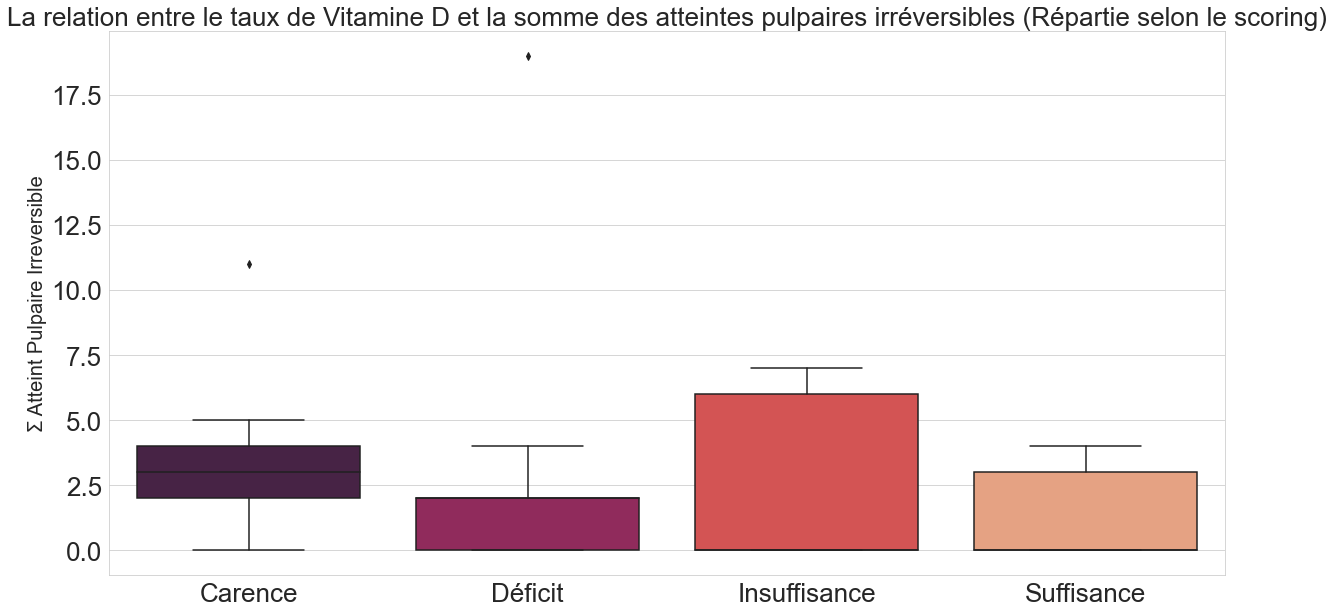

In [183]:
df['atteintpulpaireirreversible']=df['sum_Pulpites']+df['sum_Mortifications']+df['sum_LIPOE']+df['sum_Obturationscanalaires']
boxplot_multiv("atteintpulpaireirreversible","niv_vitD","","Σ Atteint Pulpaire Irreversible","Repartition_niv_vit_d_atteintpulpaireirreversible","La relation entre le taux de Vitamine D et la somme des atteintes pulpaires irréversibles (Répartie selon le scoring)")


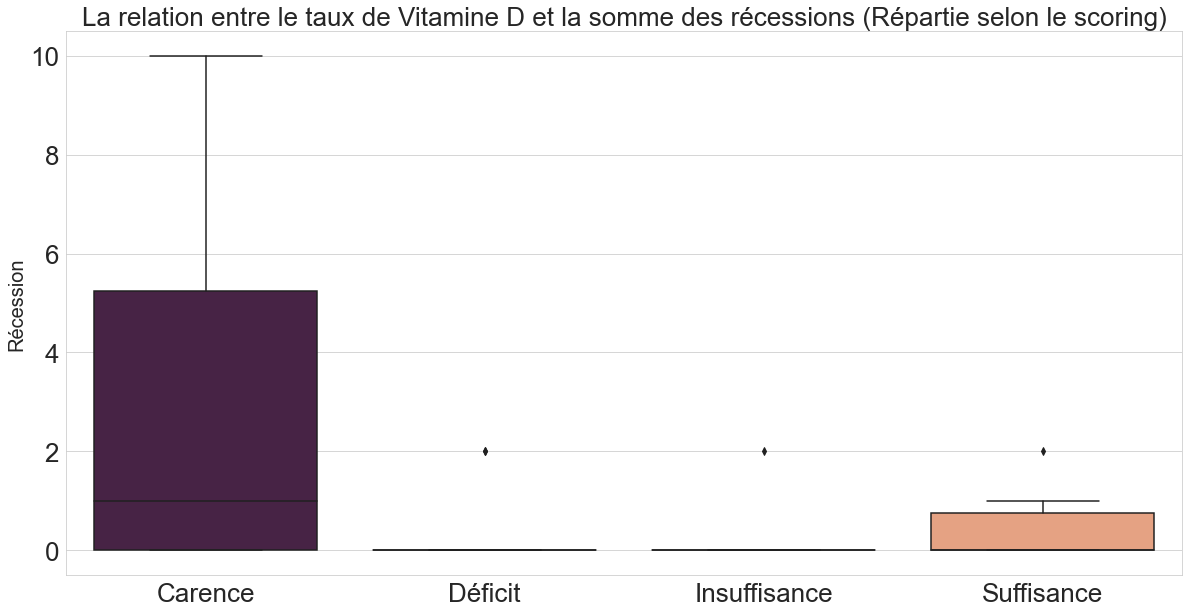

In [184]:
boxplot_multiv("Récession","niv_vitD","","Récession","Repartition_niv_vit_d_Récession","La relation entre le taux de Vitamine D et la somme des récessions (Répartie selon le scoring)")

In [ ]:
boxplot_multiv("Récession","niv_vitD","","Récession","Repartition_niv_vit_d_Récession","La relation entre le taux de Vitamine D et la somme des récessions (Répartie selon le scoring)")

18.95
14.43


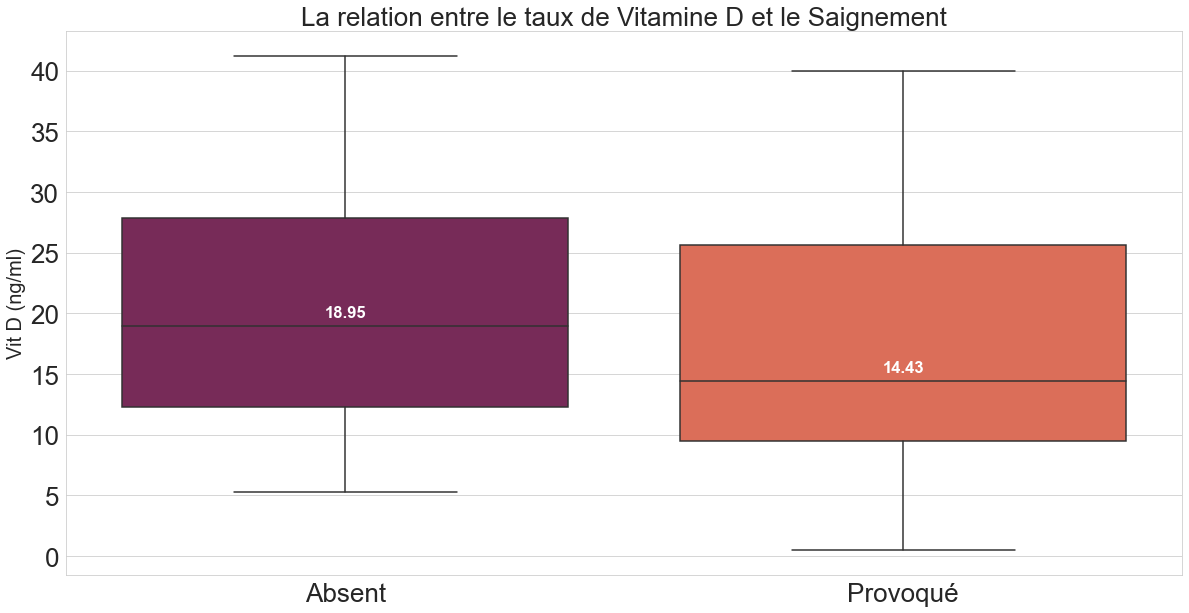

In [99]:
boxplot_multiv("vit_d","Saignement","","Vit D (ng/ml)","Repartition_vit_d_Saignement","La relation entre le taux de Vitamine D et le Saignement")


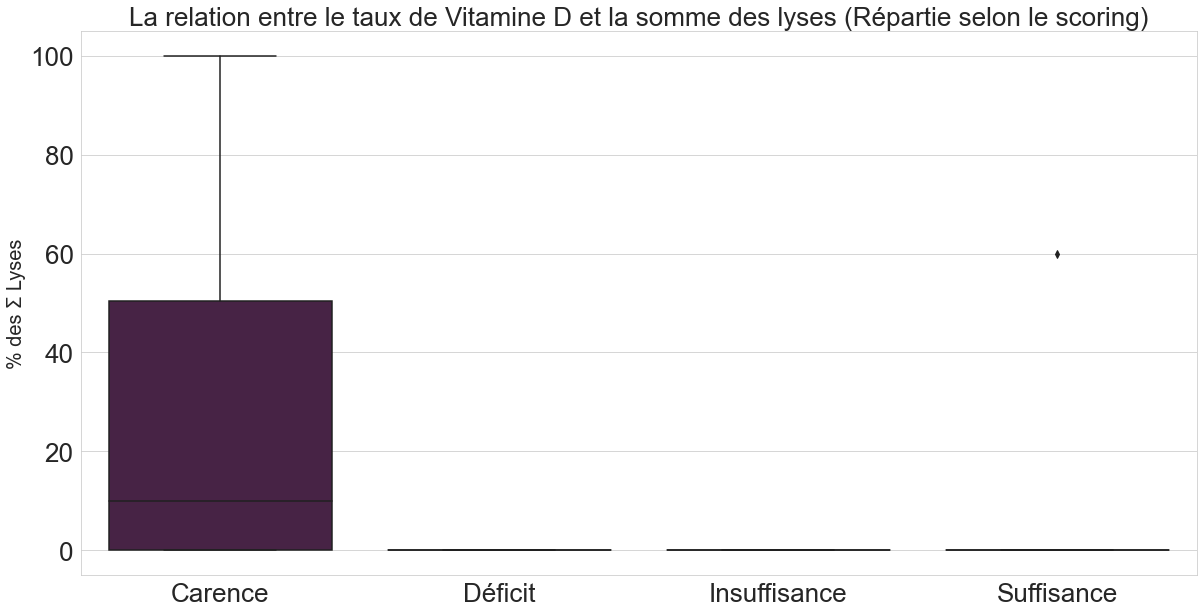

In [185]:
boxplot_multiv("sum_degrédelyse","niv_vitD","","% des Σ Lyses","Repartition_niv_vit_d_lyses","La relation entre le taux de Vitamine D et la somme des lyses (Répartie selon le scoring)")


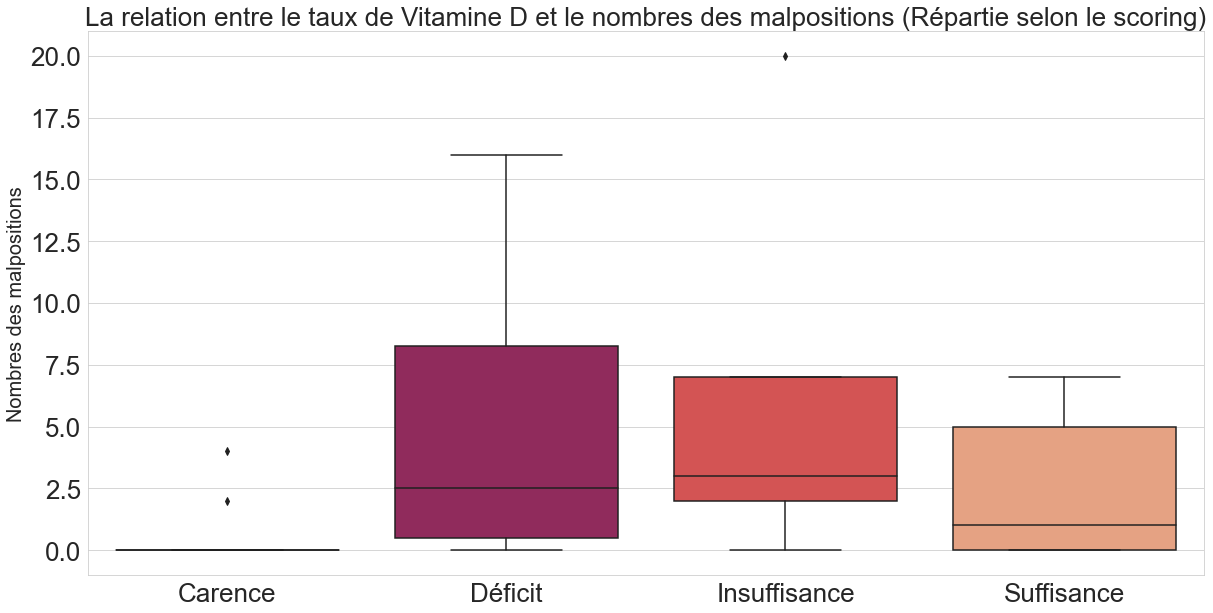

In [186]:
boxplot_multiv("Nombrededentsenmalpositions","niv_vitD","","Nombres des malpositions","Repartition_niv_vit_d_Nombrededentsenmalpositions","La relation entre le taux de Vitamine D et le nombres des malpositions (Répartie selon le scoring)")


0
0
0
0


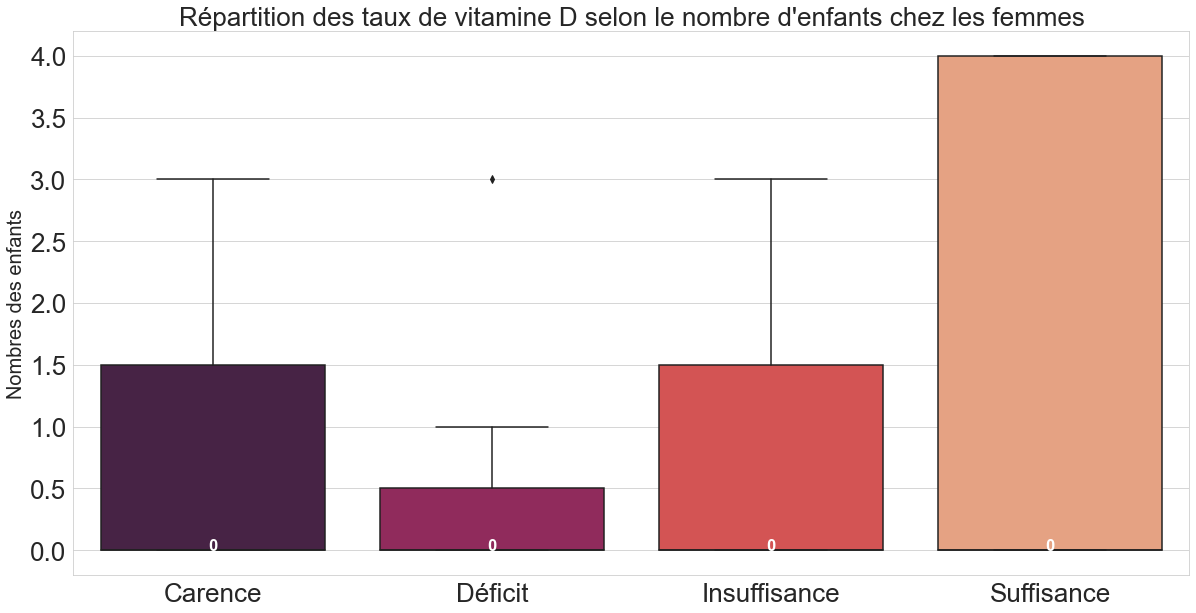

In [121]:
femme = df[df['Sexe'].isin(['Féminin'])]
tmp=df
df=femme
boxplot_multiv("enfants","niv_vitD","","Nombres des enfants","Repartition_niv_vit_d_Nombredesenfants","Répartition des taux de vitamine D selon le nombre d'enfants chez les femmes")

#medians = df.groupby([axe_x])[feature].median()
# axe_x="niv_vitD"
# feature="enfants"
# titles="Répartition des taux de vitamine D selon le nombre d'enfants chez les femmes"
# xlabel=""
# ylabel="Nombres des enfants"
# name="Repartition_niv_vit_d_Nombredesenfants"
# b=sns.boxplot(data=df, x=axe_x,y=feature,palette="rocket")
# medians = df.groupby([axe_x])[feature].median()
# vertical_offset = df[feature].median() * 0.05 # offset from median for display

# for xtick in b.get_xticks():
#     h=medians[xtick]
#     h=round(h,2)
#     print(h)
#     b.text(xtick,h + vertical_offset,h, 
#             horizontalalignment='center',size='small',color='w',weight='semibold')

# b.set_xlabel("X Label",fontsize=30)
# b.set_ylabel("Y Label",fontsize=20)
# b.tick_params(labelsize=26)
# b.axes.set_title(titles,fontsize=26)
# b.set(xlabel=xlabel)
# b.set(ylabel=ylabel)
# plt.savefig(name+'.jpeg')

df=tmp




In [135]:

femme['enfants'].value_counts()

0.0    17
3.0     4
4.0     2
2.0     1
1.0     1
Name: enfants, dtype: int64

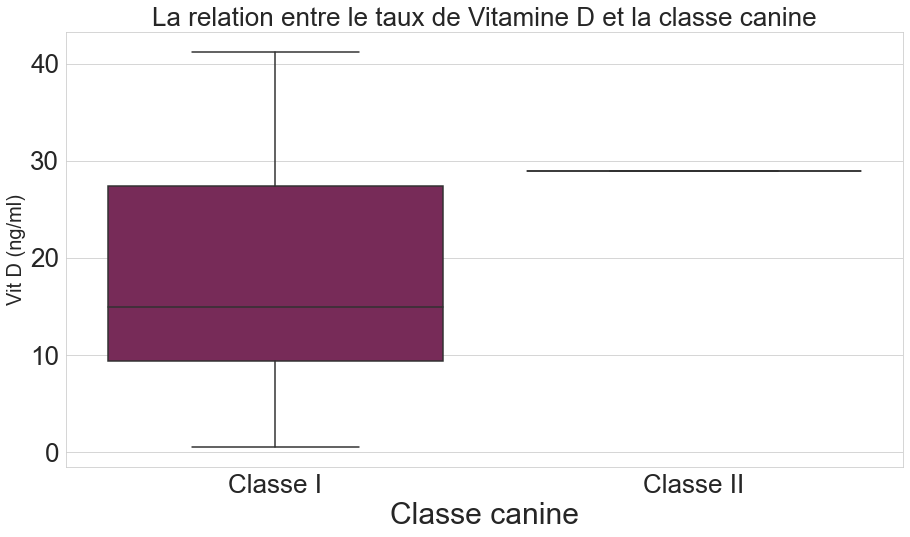

In [162]:
temp=df
df = pd.read_csv('classcanine.csv', sep=";", engine="python", skipfooter=1,error_bad_lines=False)
#df = pd.read_csv('data_sans_temoins.csv', sep=";", engine="python", skipfooter=1,error_bad_lines=False)

df=df[:31]

df['vit_d'] = df['vit_d'].astype('float')

vitD = pd.DataFrame(df, columns=['vit_d'])
bins = [0,10, 20, 30, 50]
labels = ['Carence','Déficit', 'Insuffisance', 'Suffisance']
df2['niv_vitD'] = pd.cut(vitD.vit_d, bins, labels = labels,include_lowest = True)
boxplot_multiv("vit_d","Classecanine","Classe canine","Vit D (ng/ml)","Repartition_vit_d_Classecanine","La relation entre le taux de Vitamine D et la classe canine")
df=temp

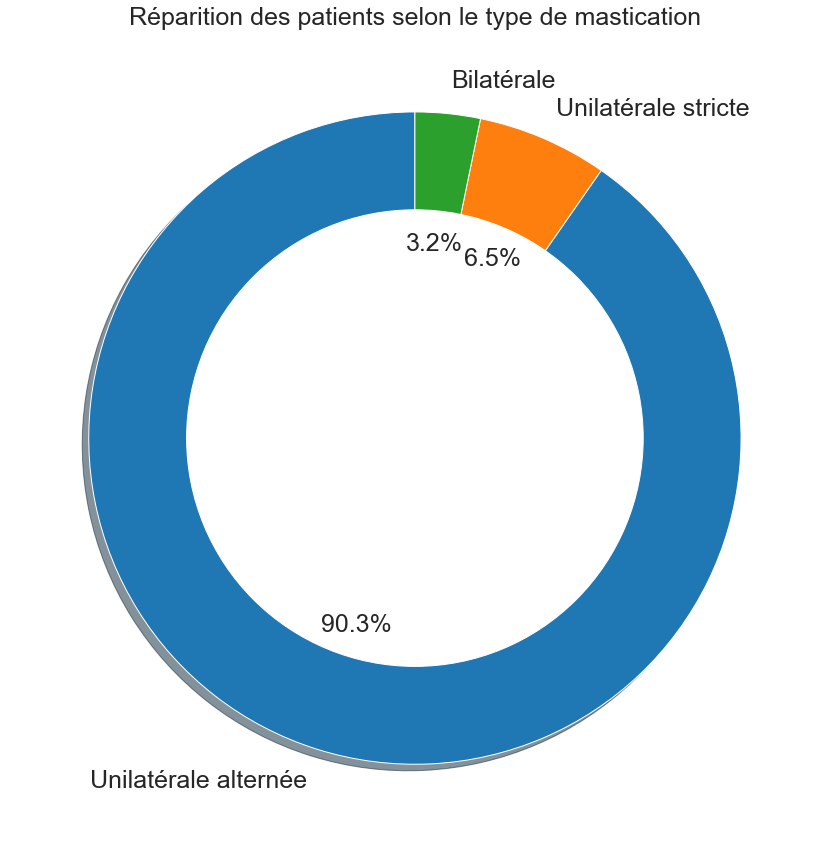

In [163]:
donut_create("Mastication","répartition_mastication","Réparition des patients selon le type de mastication")

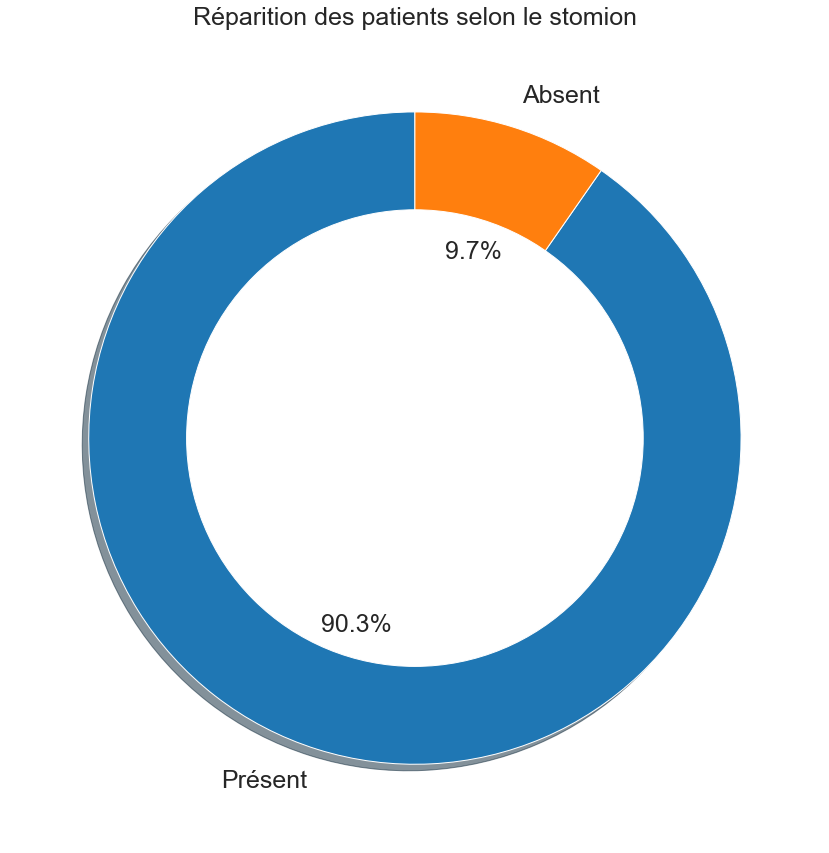

In [164]:
donut_create("Stomion","répartition_stomion","Réparition des patients selon le stomion")

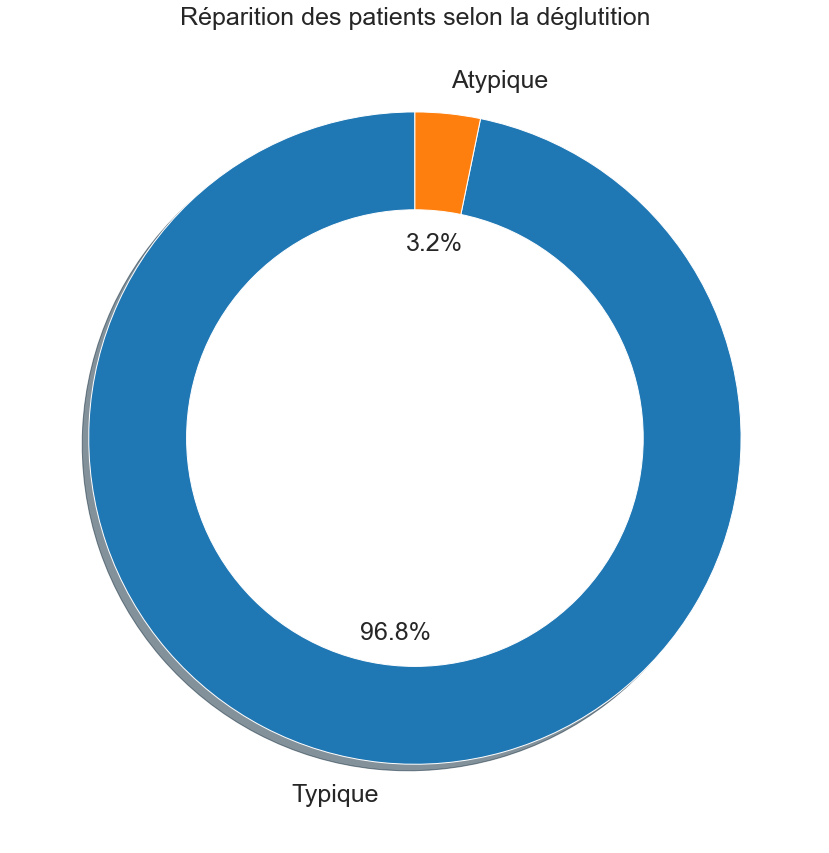

In [165]:
donut_create("Déglutition","répartition_Déglutition","Réparition des patients selon la déglutition")

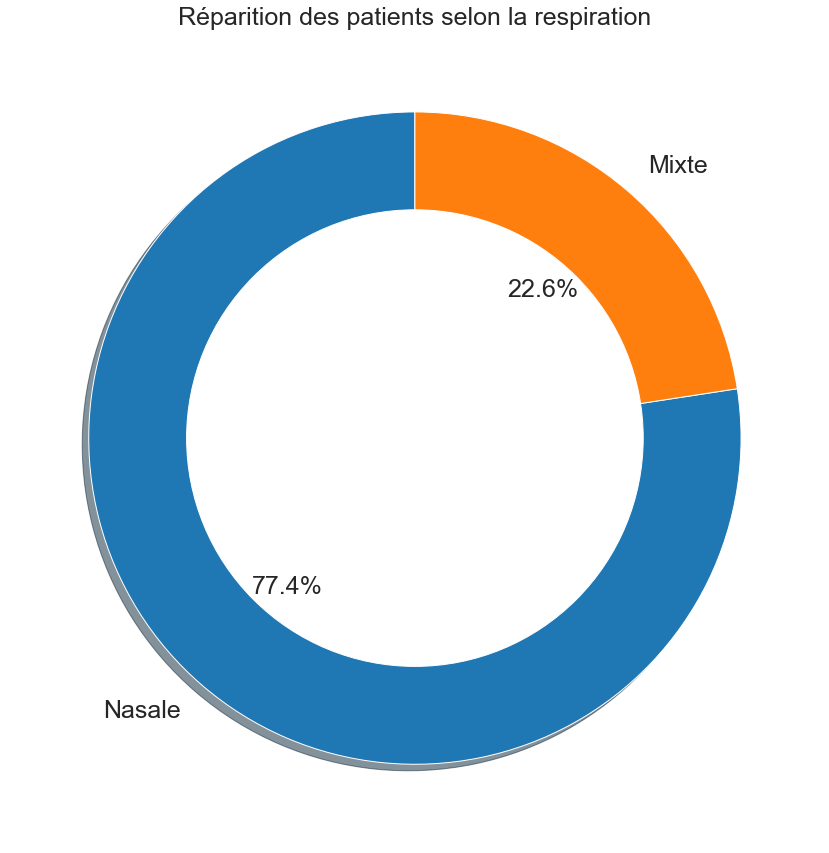

In [166]:
donut_create("Respiration","répartition_Respiration","Réparition des patients selon la respiration")

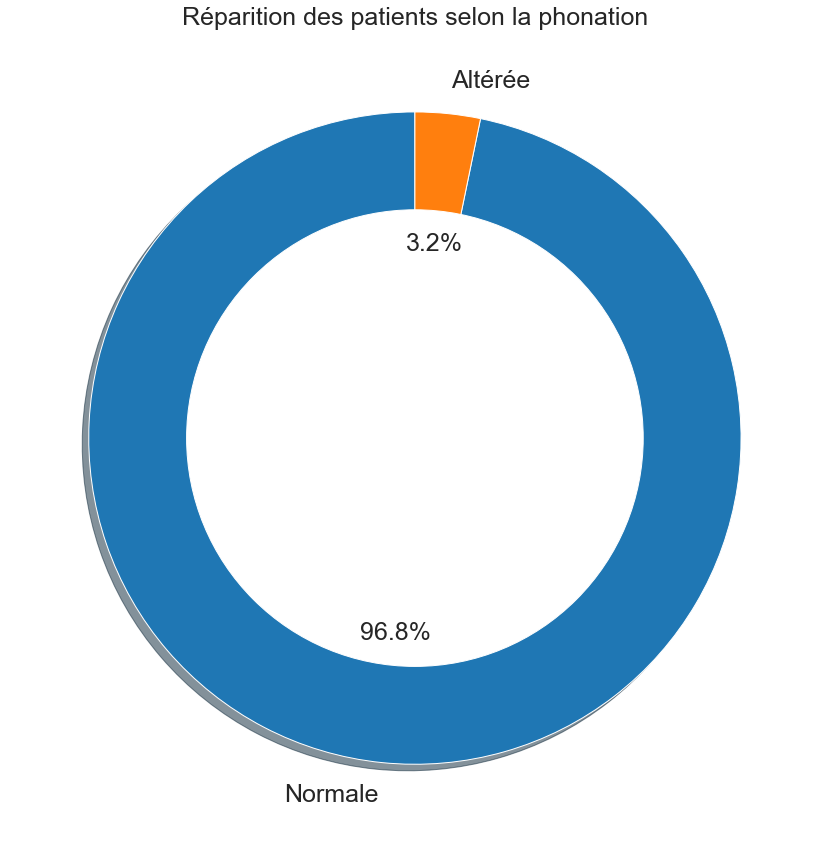

In [167]:
donut_create("Phonation","répartition_Phonation","Réparition des patients selon la phonation")

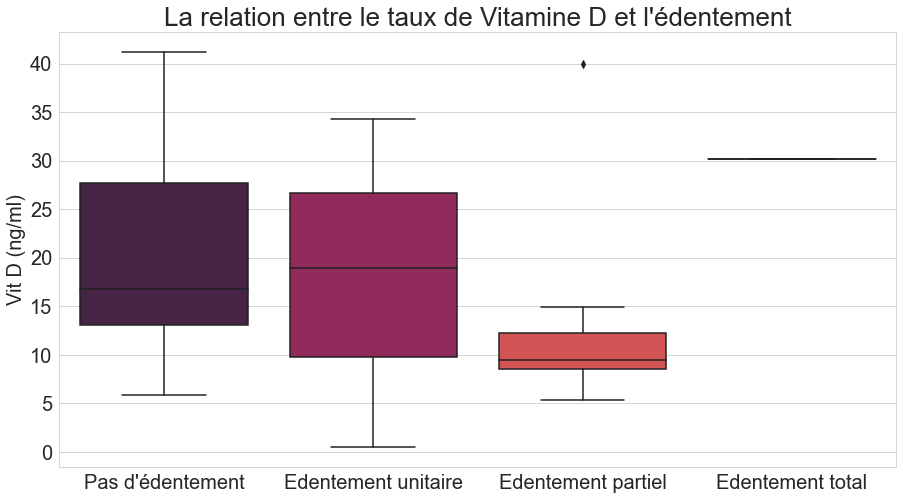

In [93]:
plt.figure(figsize=(15, 8)) 
sns.set_style("whitegrid")

b=sns.boxplot(data=df, x="Edentement",y="vit_d",palette="rocket")
b.set_xlabel("X Label",fontsize=15)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=20)
b.axes.set_title("La relation entre le taux de Vitamine D et l'édentement",fontsize=26)
b.set(xlabel=None)
b.set(ylabel="Vit D (ng/ml)")
#b.tick_params(labelrotation=45)
plt.savefig('Repartition_vit_d_Edentement.jpeg')

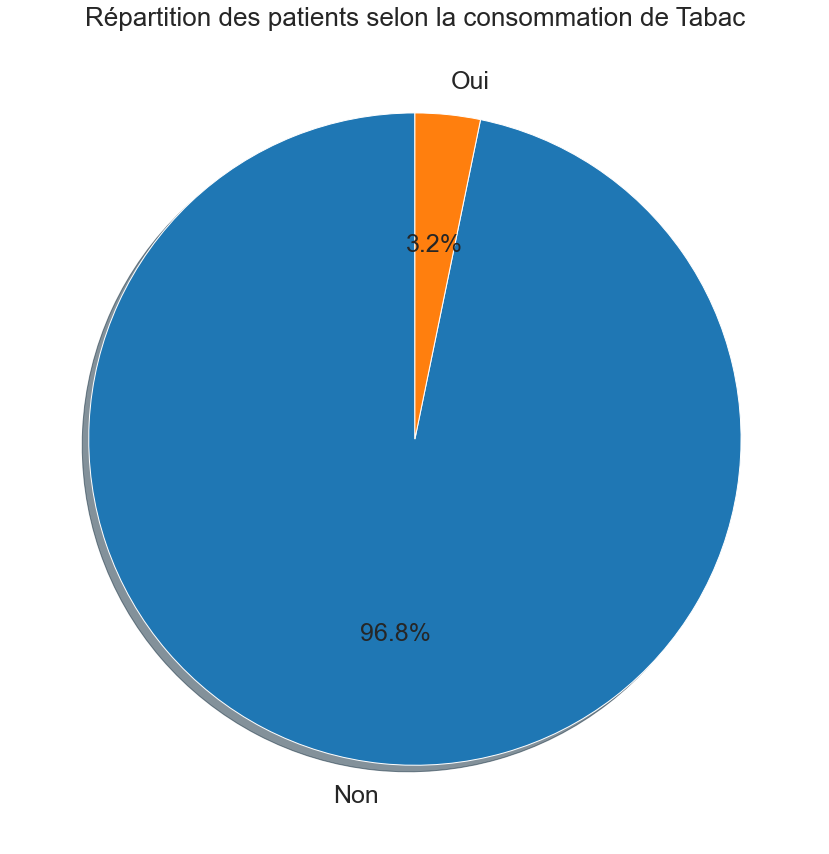

In [171]:
pie_create("Tabac","Repartition_selon_Tabac","Répartition des patients selon la consommation de Tabac")


<ipython-input-110-3ff36b680c6e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  femme['niv_vitD'] = pd.cut(vitD.vit_d, bins, labels = labels,include_lowest = True)


0
0
0
0


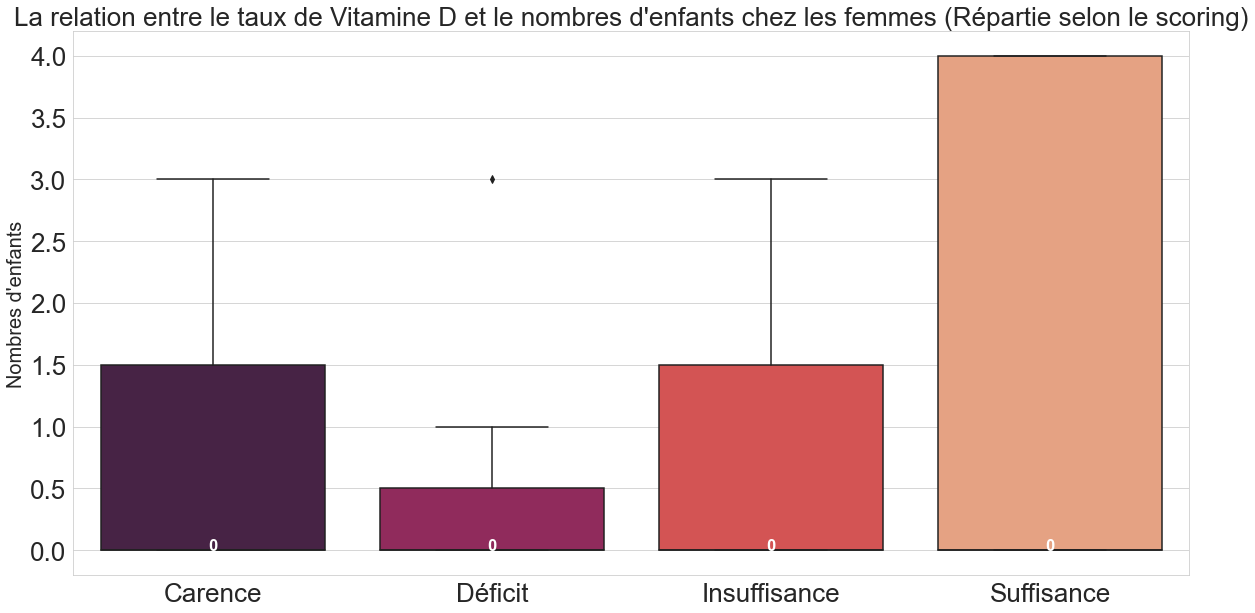

In [110]:
femme = df[df['Sexe'].isin(['Féminin'])]
vitD = pd.DataFrame(femme, columns=['vit_d'])
bins = [0,10, 20, 30, 50]
labels = ['Carence','Déficit', 'Insuffisance', 'Suffisance']
femme['niv_vitD'] = pd.cut(vitD.vit_d, bins, labels = labels,include_lowest = True)
tmp=df
df=femme
boxplot_multiv("enfants","niv_vitD","","Nombres d'enfants","Repartition_niv_vit_d_enfants_FEMMES","La relation entre le taux de Vitamine D et le nombres d'enfants chez les femmes (Répartie selon le scoring)")
df=tmp

In [11]:
df.to_csv("khouloud_hayja.csv", index=False, encoding='utf-8')  

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


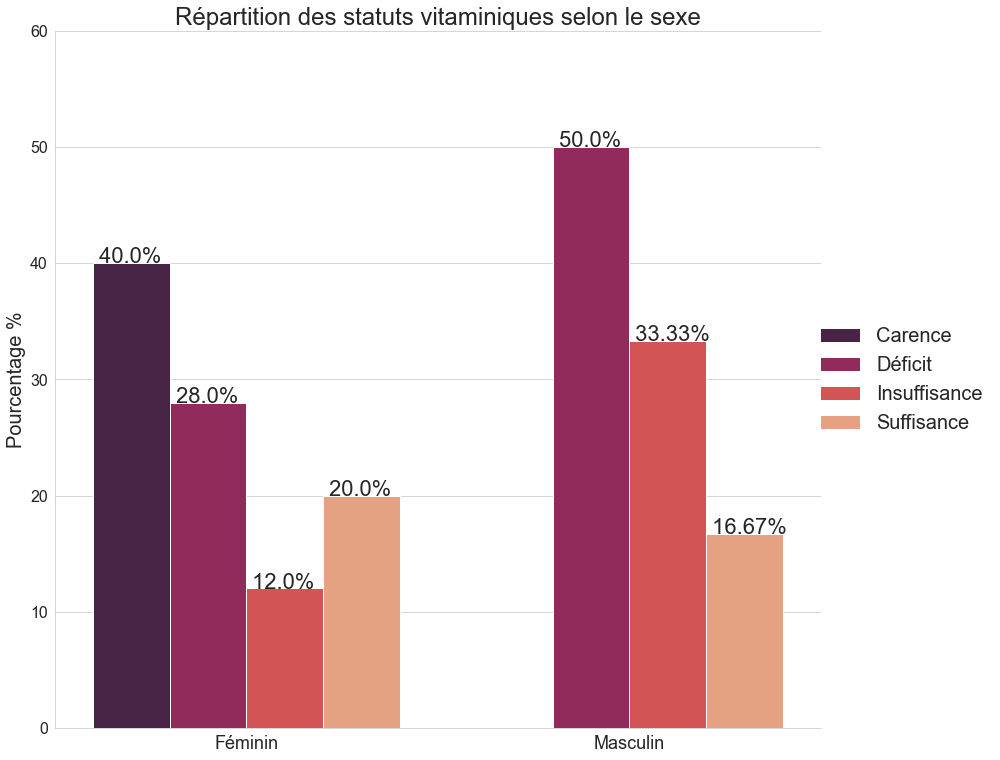

In [48]:
x,y = 'Sexe', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette='rocket')
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

b.legend.set_title(None)

b.fig.set_size_inches(14,11)

b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement",fontsize=26)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon le sexe")
for p in b.ax.patches:
    txt = " "+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=22)
    
plt.savefig('repartition_taux_vit_d_age.jpeg')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


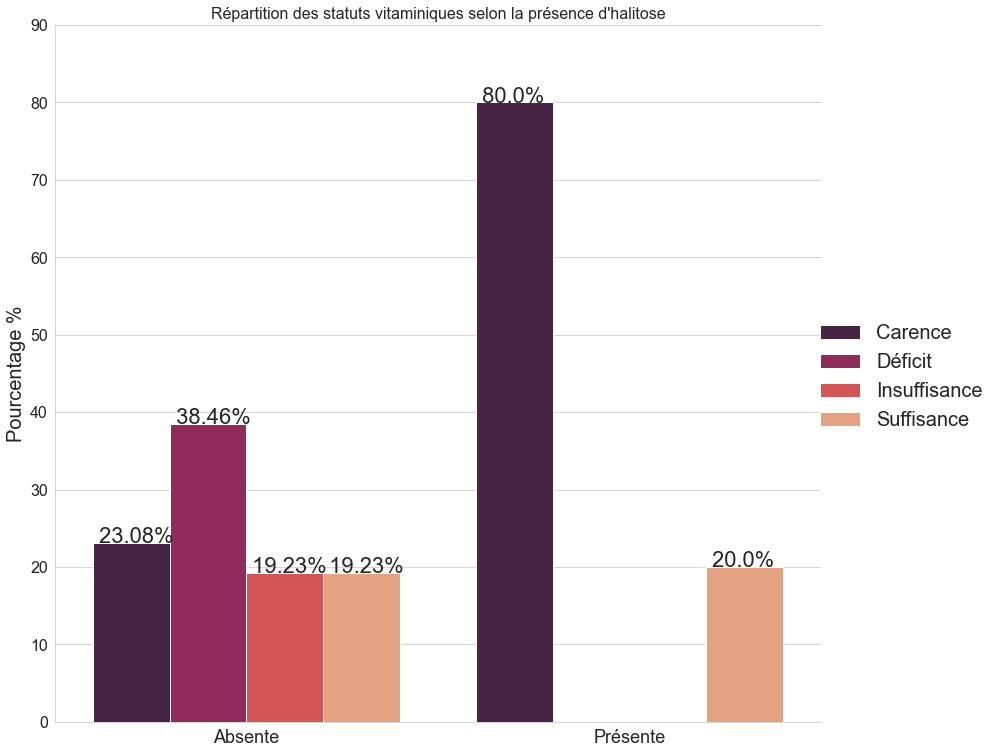

In [102]:
x,y = 'halitose', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette='rocket')
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

b.legend.set_title(None)

b.fig.set_size_inches(14,11)

b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement",fontsize=26)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon la présence d'halitose")
for p in b.ax.patches:
    txt = " "+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=22)
    
plt.savefig('repartition_taux_vit_d_halitose.jpeg')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

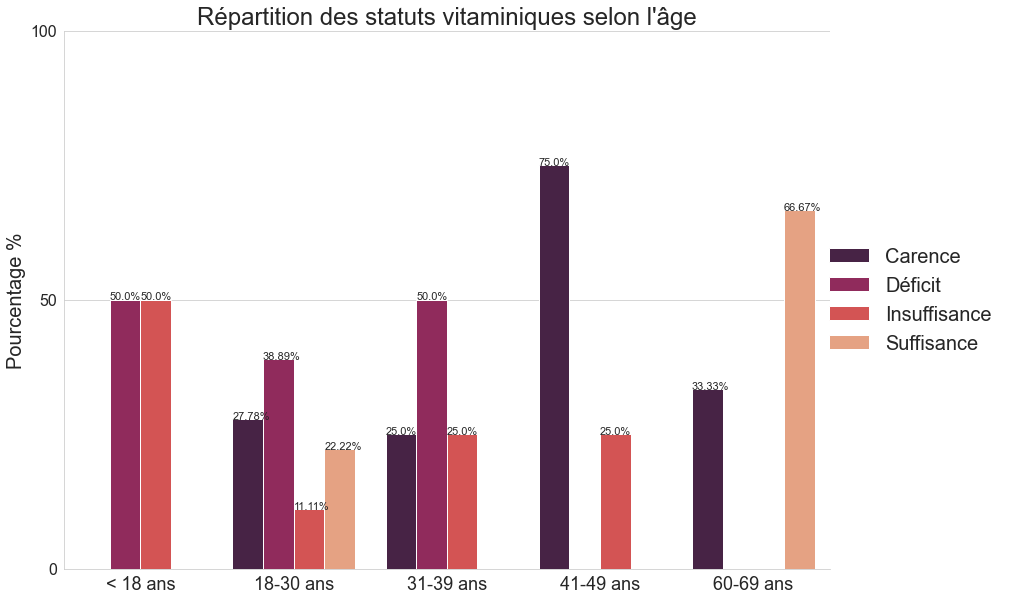

In [22]:
x,y = 'agerange', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=3, aspect=4,palette='rocket')
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement",fontsize=26)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon l'âge")


for p in b.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=11)
    
plt.savefig('repartition_taux_vit_d_age.jpeg')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


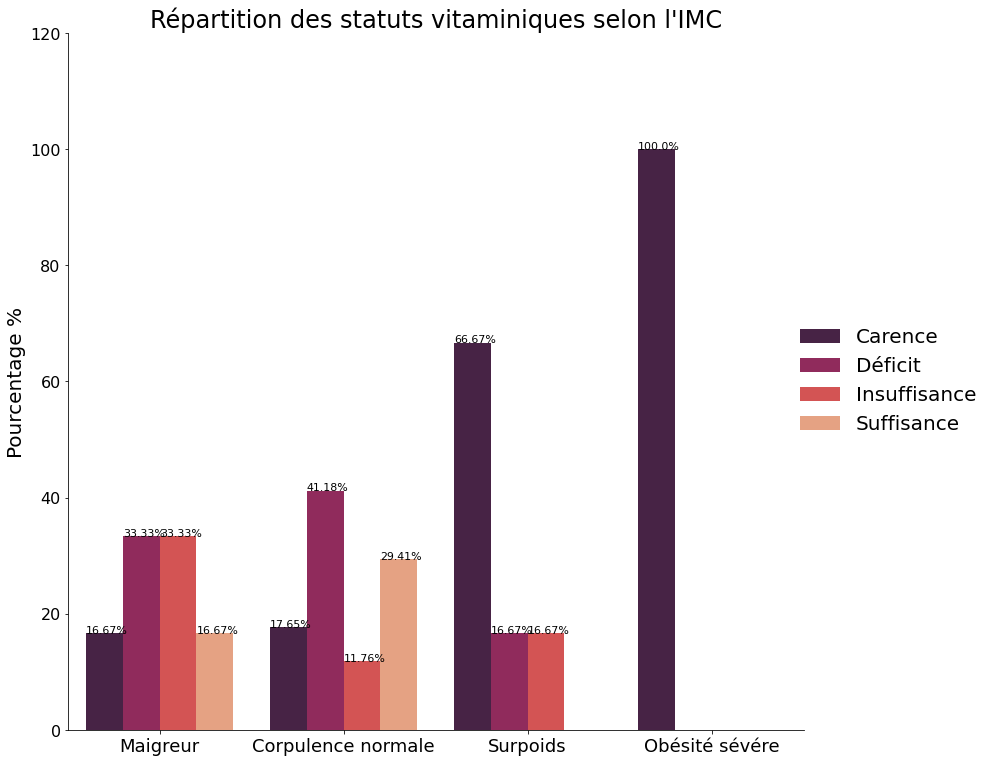

In [12]:
x,y = 'imc_type', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette='rocket')
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)
b.fig.set_size_inches(14,11)

b.legend.set_title(None)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement",fontsize=26)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon l'IMC")
for p in b.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=11)
    
plt.savefig('repartition_taux_vit_d_imc.jpeg')
plt.show()

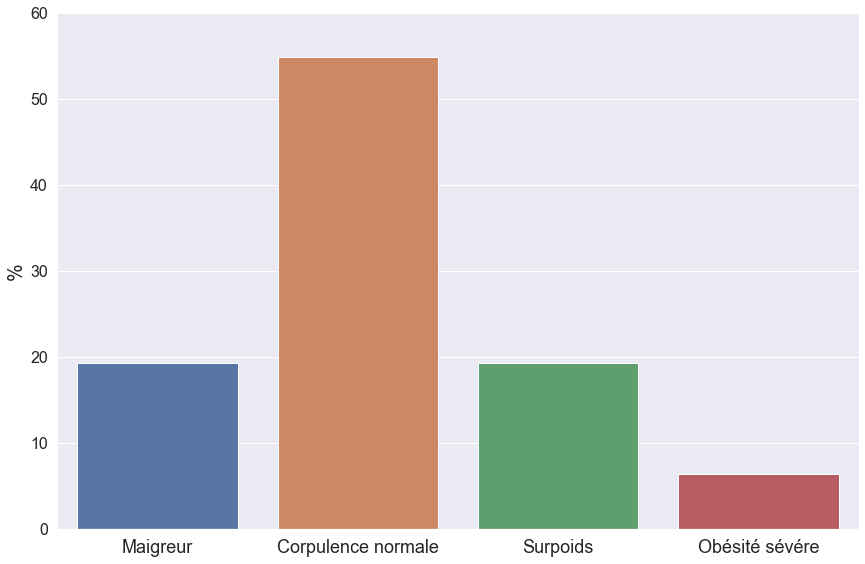

In [180]:
x = 'imc_type'

df1 = df["imc_type"].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

b = sns.catplot(x='index',y='percent',kind='bar',data=df1,height=8, aspect=1.5,palette='rocket')
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)



b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")
b.set(ylabel="%")
b.ax.set_title("Répartition des patients selon le taux de vitamin D")

plt.savefig('facteur_risque_sexe_imc.jpeg')

# for p in b.ax.patches:
#     txt = "    "+str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() 
#     txt_y = p.get_height()
#     b.ax.text(txt_x,txt_y,txt)

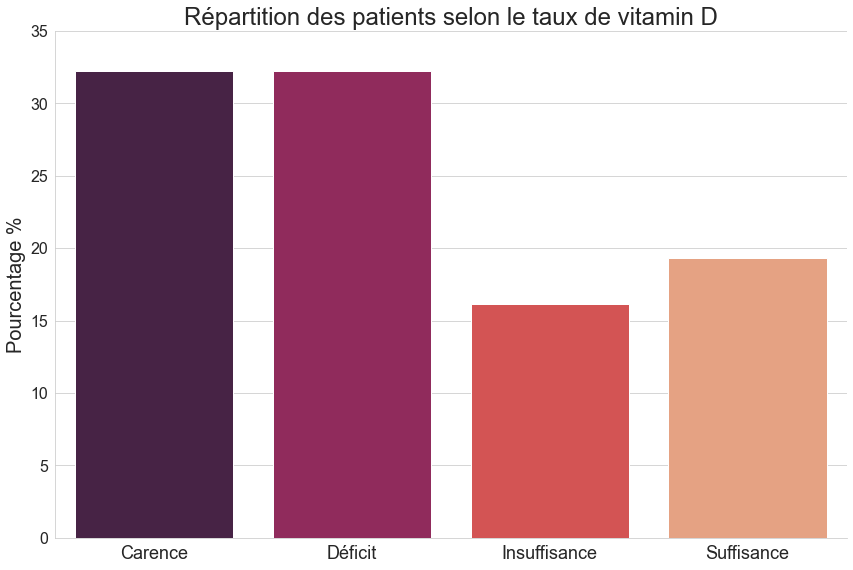

In [61]:
x = 'niv_vitD'

df1 = df["niv_vitD"].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

b = sns.catplot(x='index',y='percent',kind='bar',data=df1,height=8, aspect=1.5,palette='rocket')
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)



b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

#b.ax.yaxis.set_label_coords(-0.05,1.03)
b.ax.set_title("Répartition des patients selon le taux de vitamin D")
plt.savefig('taux_patient_vit_d.jpeg')

# for p in b.ax.patches:
#     txt = "    "+str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() 
#     txt_y = p.get_height()
#     b.ax.text(txt_x,txt_y,txt)

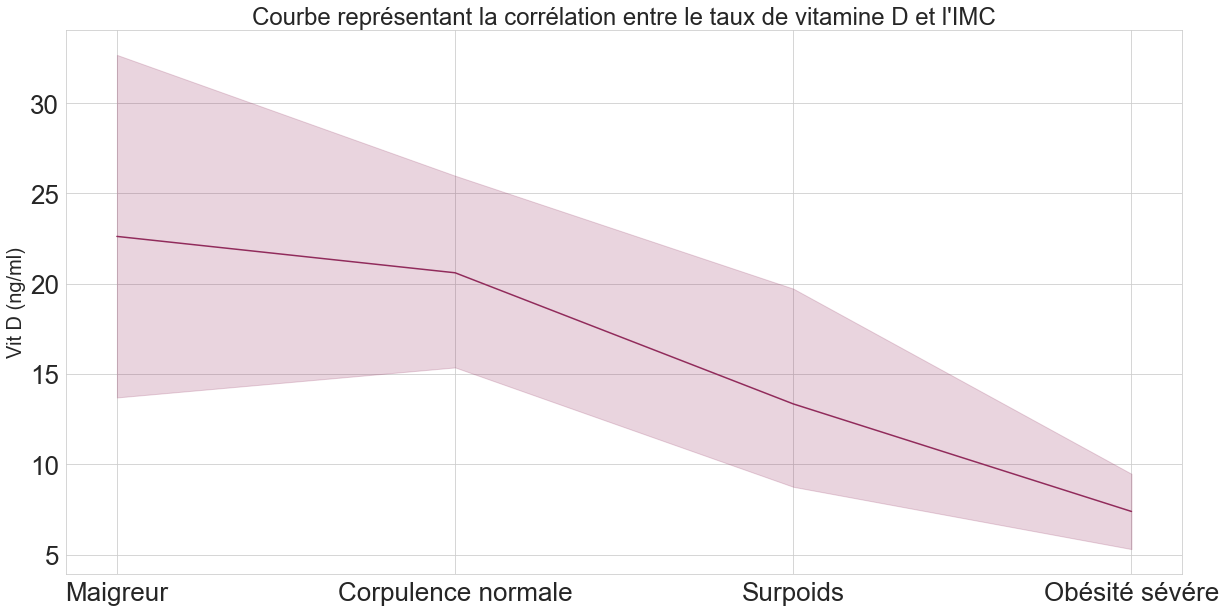

In [74]:
plt.figure(figsize=(20, 10)) 

b=sns.lineplot(data=df, x="imc_type", y="vit_d",color='#912B5B')
#['#E4A282','#912B5B','#472445', '#D25455','#d25b80']
b.set_xlabel("X Label",fontsize=30)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=26)
b.set(xlabel=None)
b.set(ylabel="Vit D (ng/ml)")
b.set_title("Courbe représentant la corrélation entre le taux de vitamine D et l'IMC")
plt.savefig('relation_vit_d_imc.jpeg')

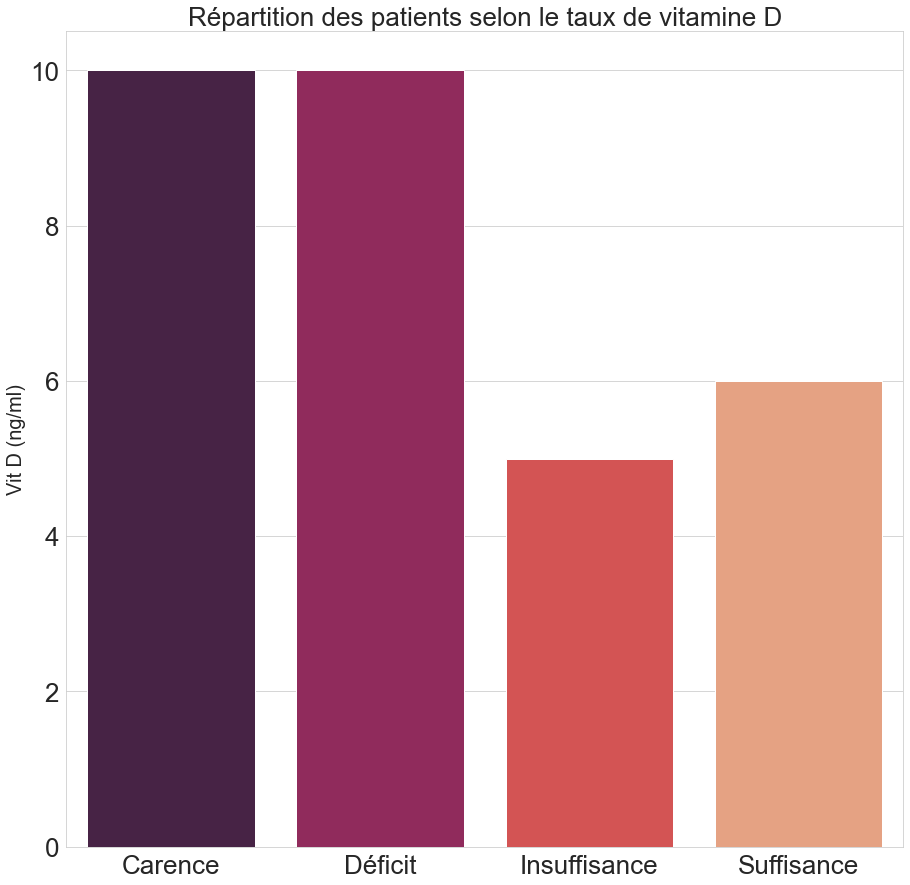

In [10]:
plots_create("niv_vitD","Vit D (ng/ml)","Repartition_type_vitd","Répartition des patients selon le taux de vitamine D")


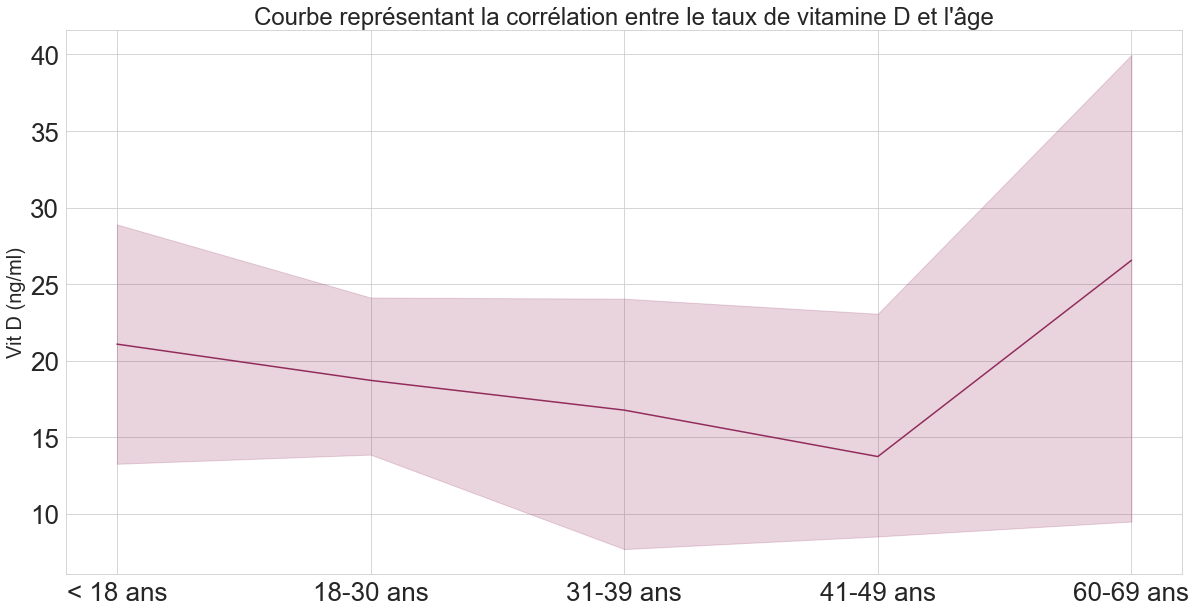

In [76]:
plt.figure(figsize=(20, 10)) 

b=sns.lineplot(data=df, x="agerange", y="vit_d",color='#912B5B')

b.set_xlabel("X Label",fontsize=30)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=26)
b.set(xlabel=None)
b.set(ylabel="Vit D (ng/ml)")
b.set_title("Courbe représentant la corrélation entre le taux de vitamine D et l'âge")

plt.savefig('relation_vit_d_age.jpeg')

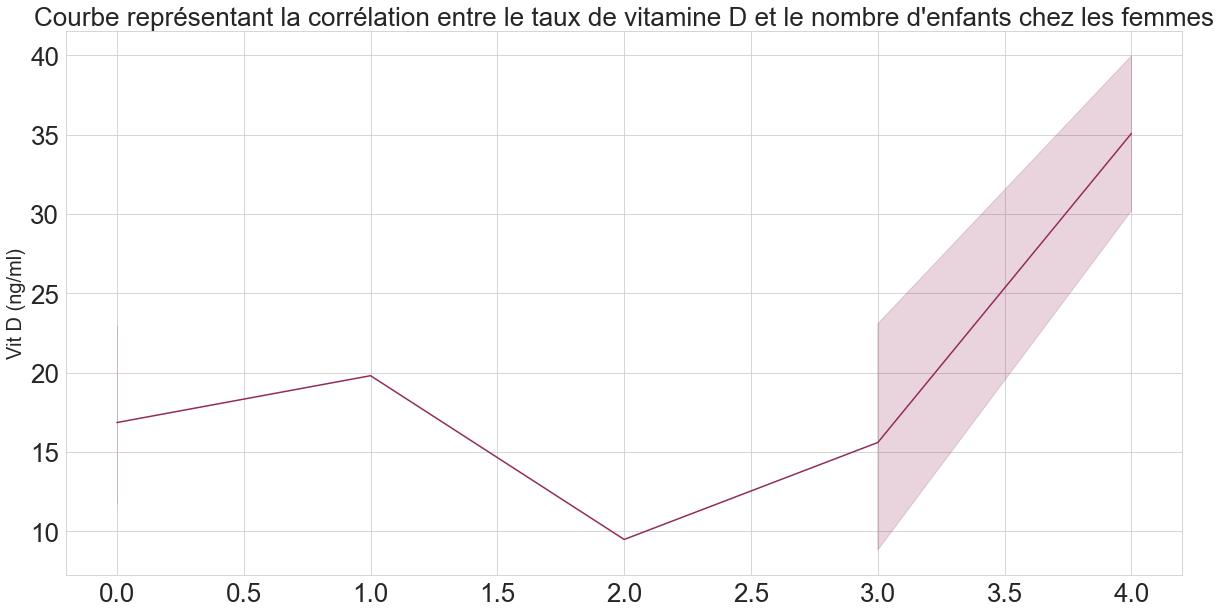

In [12]:
femme = df[df['Sexe'].isin(['Féminin'])]
tmp=df
df=femme

plt.figure(figsize=(20, 10)) 

b=sns.lineplot(data=df, x="enfants", y="vit_d",color='#912B5B')

b.set_xlabel("X Label",fontsize=30)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=26)
b.set(xlabel=None)
b.set(ylabel="Vit D (ng/ml)")
b.set_title("Courbe représentant la corrélation entre le taux de vitamine D et le nombre d'enfants chez les femmes",fontsize="26")
plt.savefig('relation_vit_d_enfant.jpeg')
df=tmp

C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x2160 with 0 Axes>

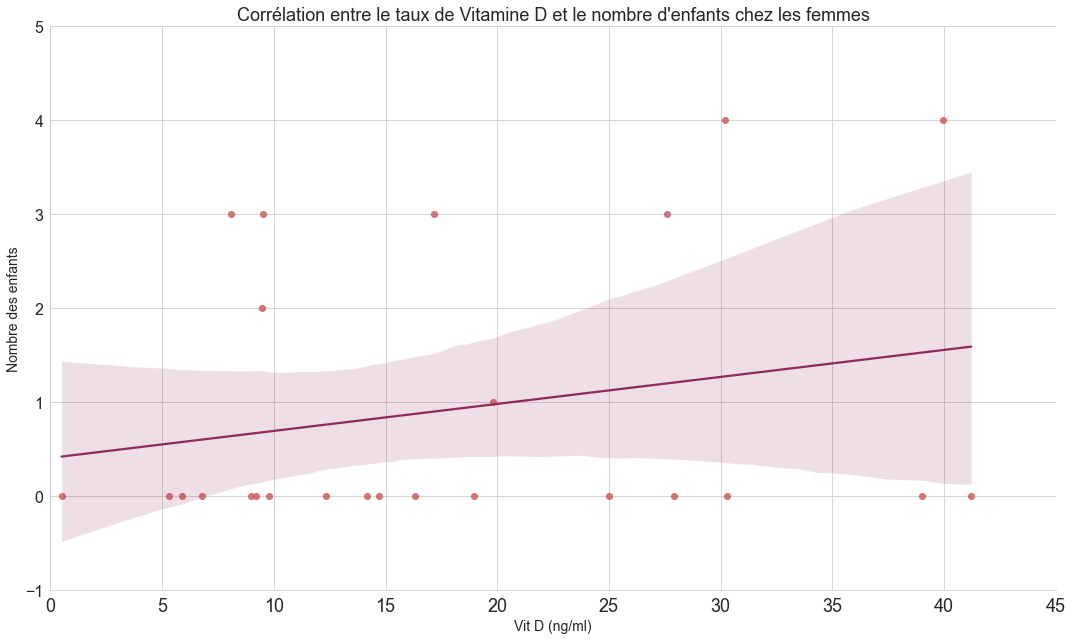

In [16]:
femme = df[df['Sexe'].isin(['Féminin'])]
tmp=df
df=femme

plt.figure(figsize=(30,30)) 
b=sns.lmplot("vit_d","enfants", df, line_kws={'color': '#912B5B'}, scatter_kws={'color':'#D25455'},aspect=2)
#'#D25455','#d25b80

b.fig.set_size_inches(15,9)

plt.ylabel('Nombre des enfants',fontsize=14)
plt.xlabel("Vit D (ng/ml)",fontsize=14)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

plt.title("Corrélation entre le taux de Vitamine D et le nombre d'enfants chez les femmes",fontsize=18)
plt.tight_layout()
plt.savefig('correlation_enfants_vit_d.jpeg')
tmp=df

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


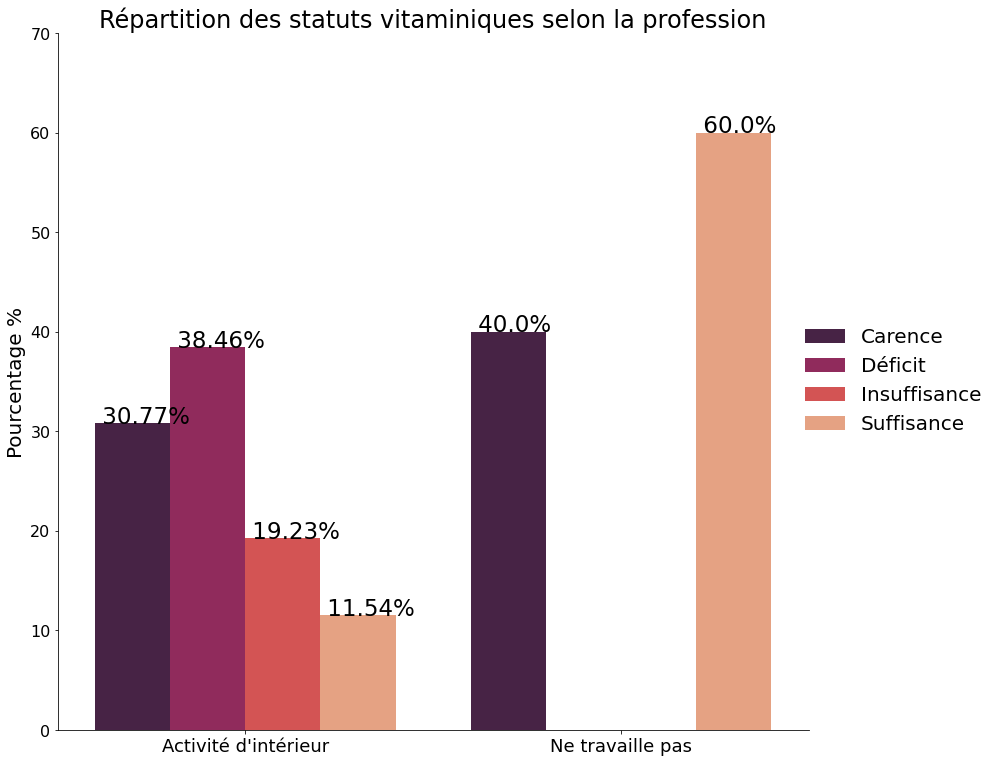

In [13]:
x,y = 'profession', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette='rocket')
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et la profession",fontsize=26)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon la profession")
for p in b.ax.patches:
    txt = " "+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=23)
    
plt.savefig('repartition_taux_vit_d_profession.jpeg')
plt.show()

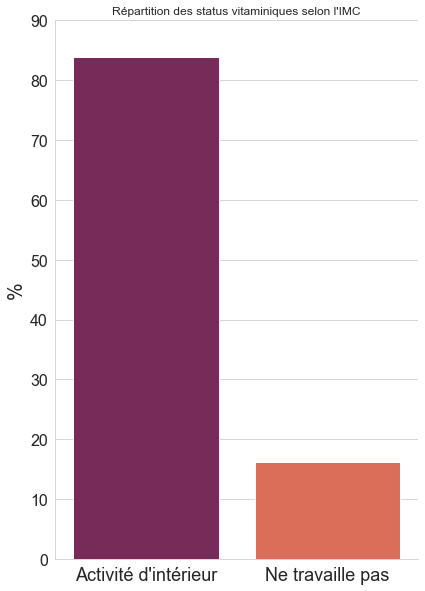

In [183]:
x = 'profession'

df1 = df[x].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

b = sns.catplot(x='index',y='percent',kind='bar',data=df1,height=8, aspect=0.7,palette='rocket')
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)



b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.ax.set_title("Répartition des status vitaminiques selon l'IMC")
b.set(xlabel=None)
b.set(ylabel="%")
plt.savefig('facteur_risque_profession.jpeg')

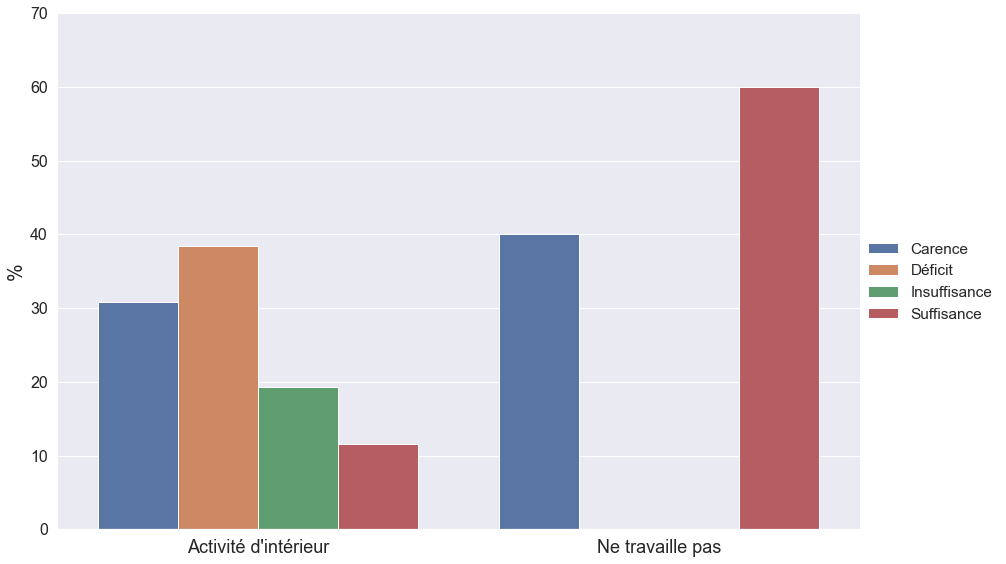

In [196]:
x,y = 'profession', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

b.legend.set_title(None)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement",fontsize=26)
b.set(xlabel=None)
b.set(ylabel="%")
plt.savefig('facteur_risque_profession_plot_niv_vit_d.jpeg')

# for p in b.ax.patches:
#     txt = "    "+str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() 
#     txt_y = p.get_height()
#     b.ax.text(txt_x,txt_y,txt)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


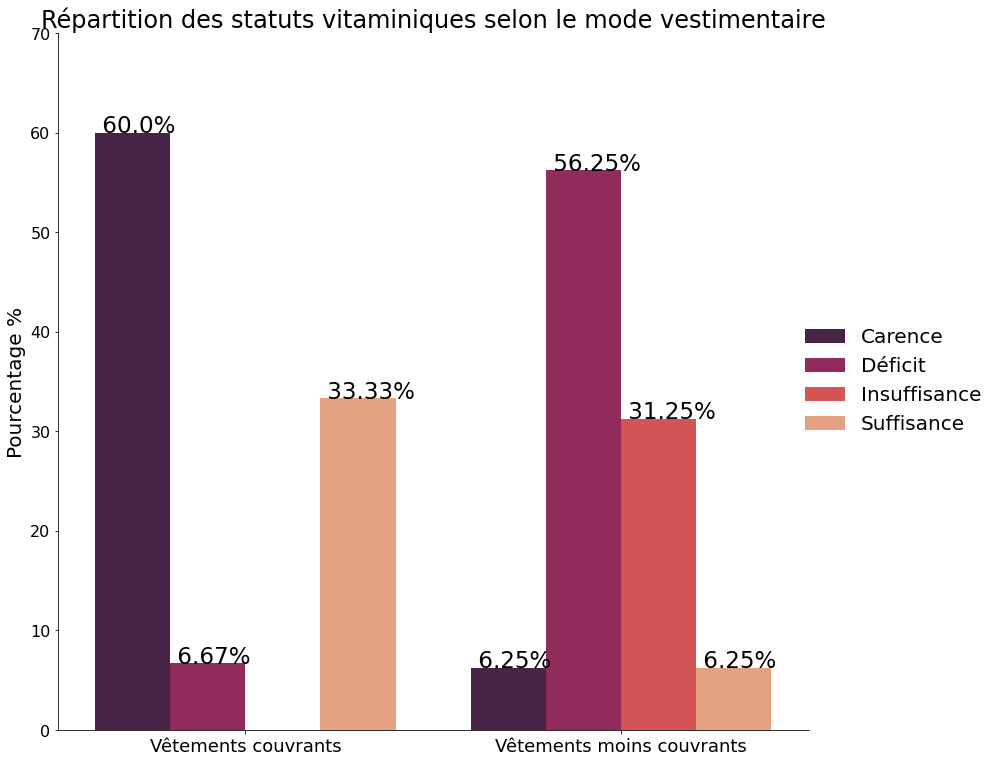

In [14]:
x,y = 'vestimentaire', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket")
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement",fontsize=26)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon le mode vestimentaire")

for p in b.ax.patches:
    txt = " "+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=23)
    
plt.savefig('repartition_taux_vit_d_vetements.jpeg')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

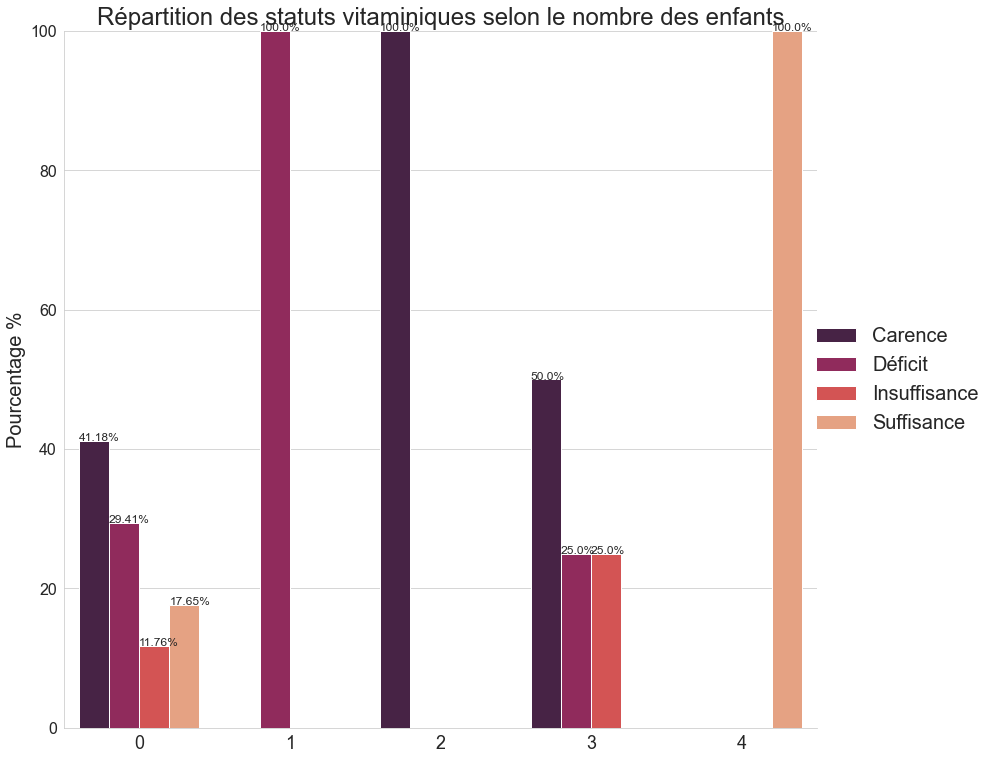

In [91]:
femme = df[df['Sexe'].isin(['Féminin'])]
tmp=df
df=femme
x,y = 'enfants', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket")
b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement",fontsize=26)
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon le nombre des enfants")
df=tmp

for p in b.ax.patches:
    txt = ""+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=12)
    
plt.savefig('facteur_risque_enfant_femme_plot_niv_vit_d.jpeg')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


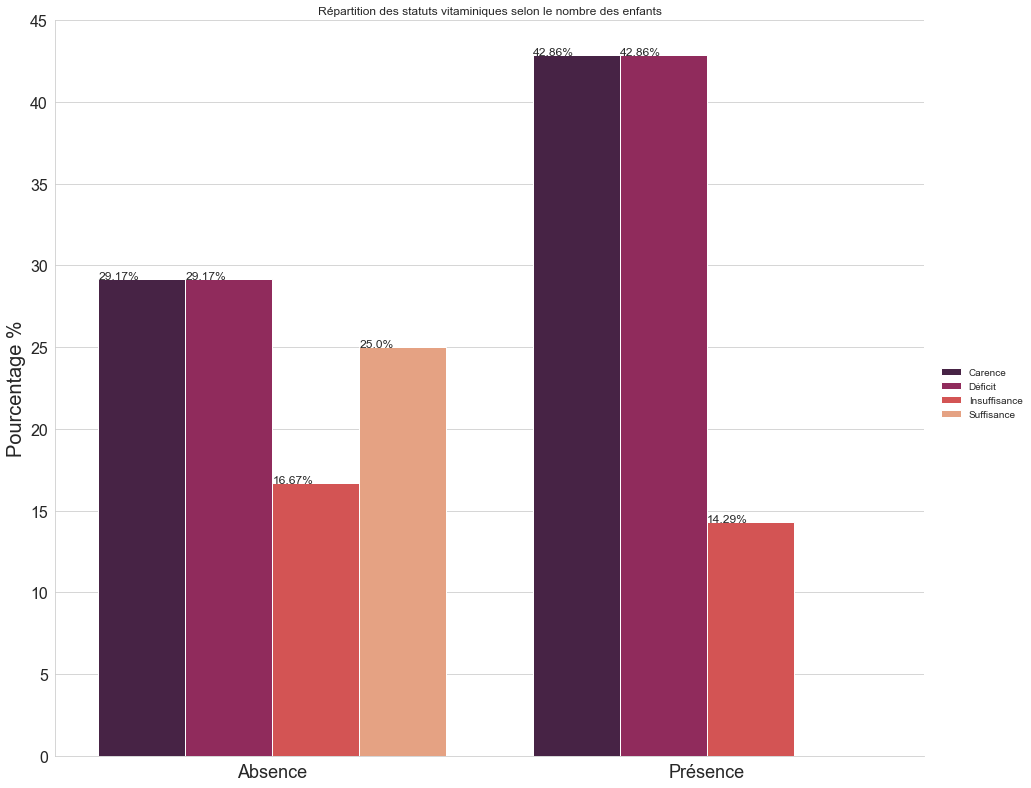

In [30]:
x,y = 'Adénopathies', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket")
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement",fontsize=26)
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon le nombre des enfants")
df=tmp

for p in b.ax.patches:
    txt = ""+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=12)
    
plt.savefig('facteur_risque_enfant_femme_plot_niv_vit_d.jpeg')
plt.show()

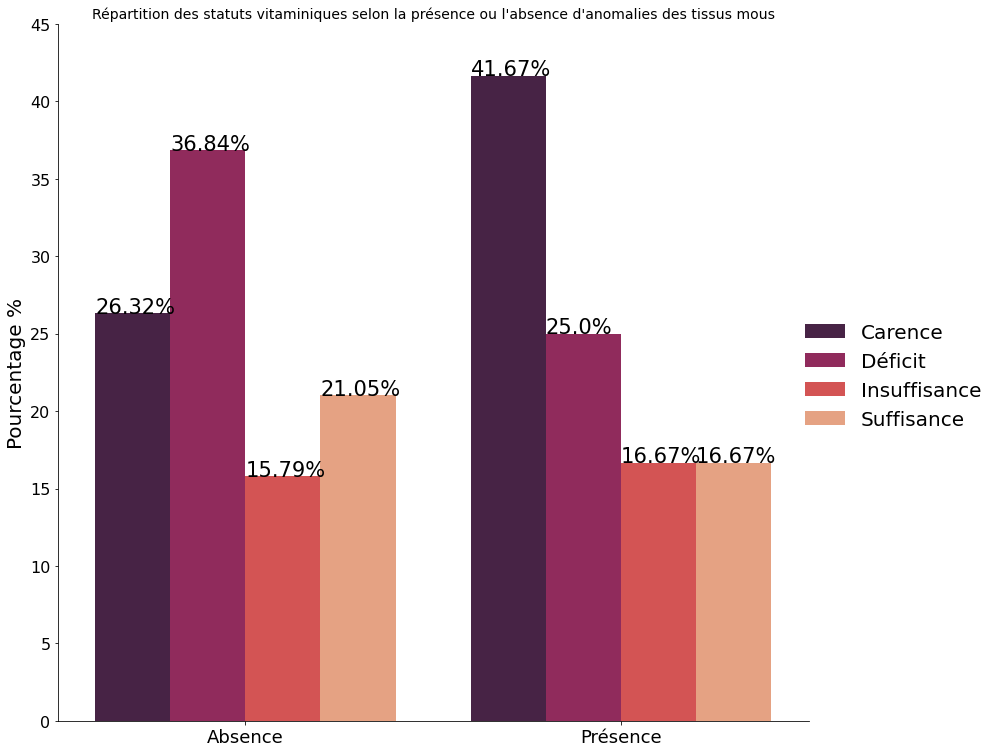

In [28]:
x,y = 'Anomaliesdestissusmous', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket")
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon la présence ou l'absence d'anomalies des tissus mous",fontsize="14")

for p in b.ax.patches:
    txt = ""+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=21)
    
plt.savefig('repartition_taux_vit_d_Anomaliesdestissusmous.jpeg')
plt.show()

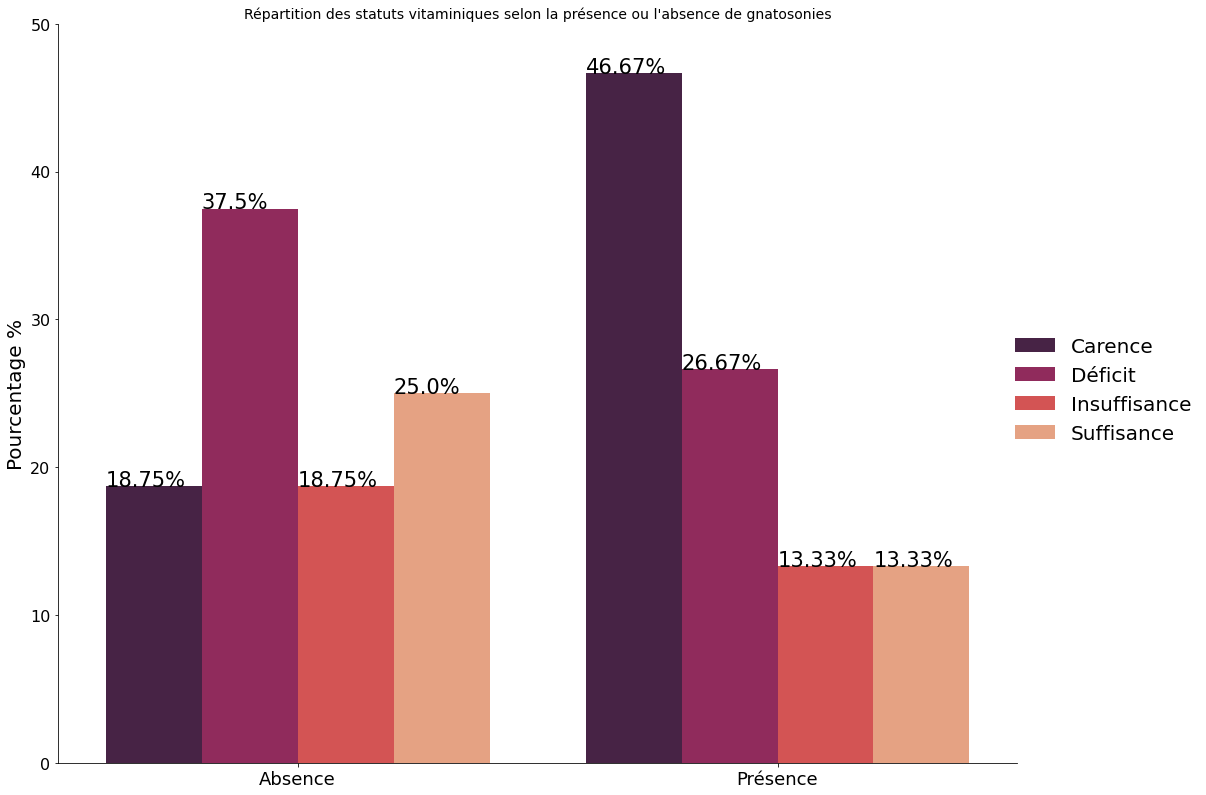

In [30]:
x,y = 'Gnatosonies', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

# b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon la présence ou l'absence de gnatosonies",fontsize="14")

for p in b.ax.patches:
    txt = ""+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=21)
plt.legend(fontsize='20', title_fontsize='80',bbox_to_anchor=(1.2, 0.6),frameon=False)

plt.savefig('repartition_taux_vit_d_Gnatosonies.jpeg')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


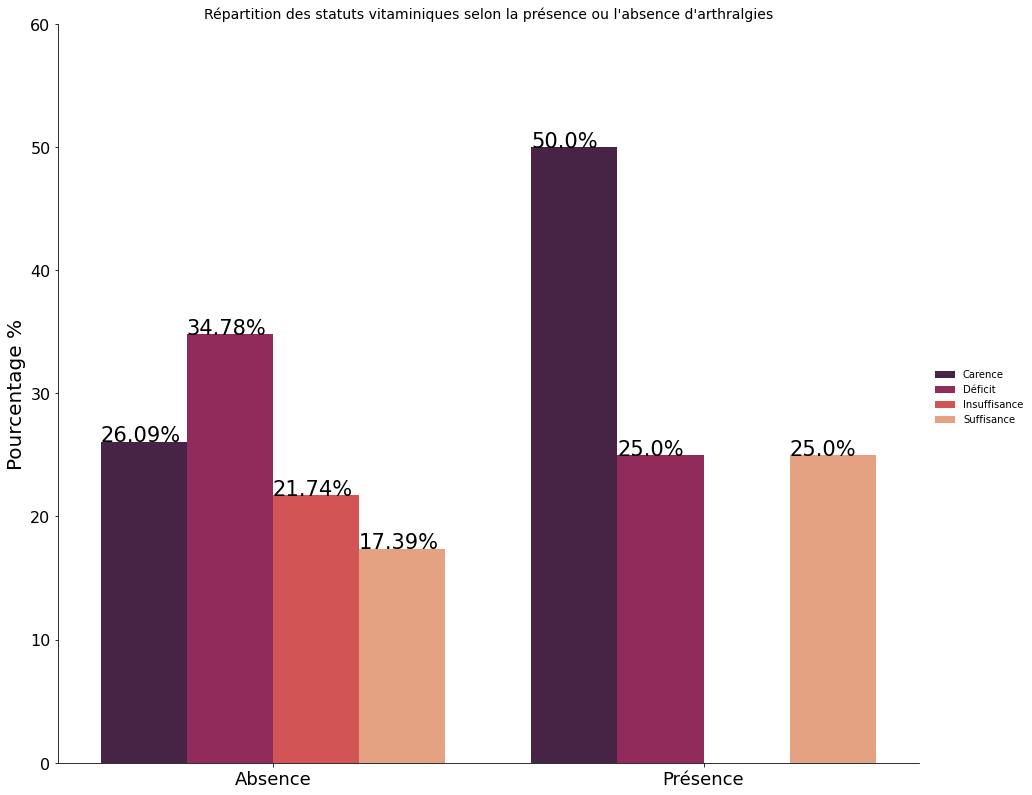

In [4]:
x,y = 'Arthralgies', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket")
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon la présence ou l'absence d'arthralgies",fontsize="14")

for p in b.ax.patches:
    txt = ""+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=21)
    
plt.savefig('repartition_taux_vit_d_Arthralgies.jpeg')
plt.show()

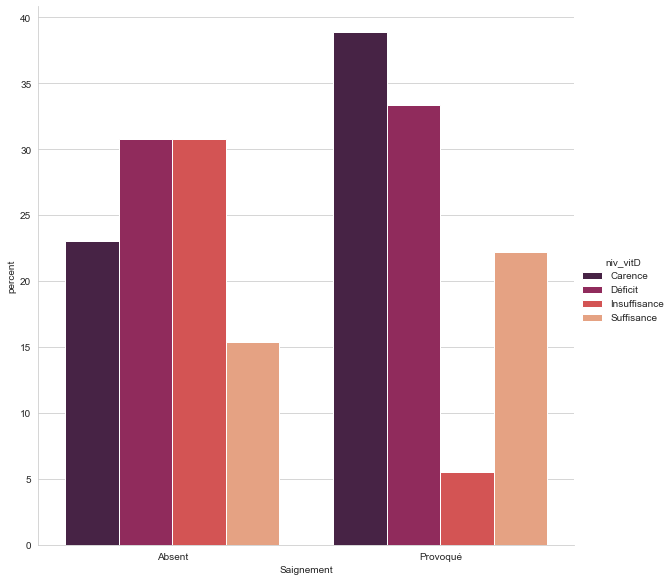

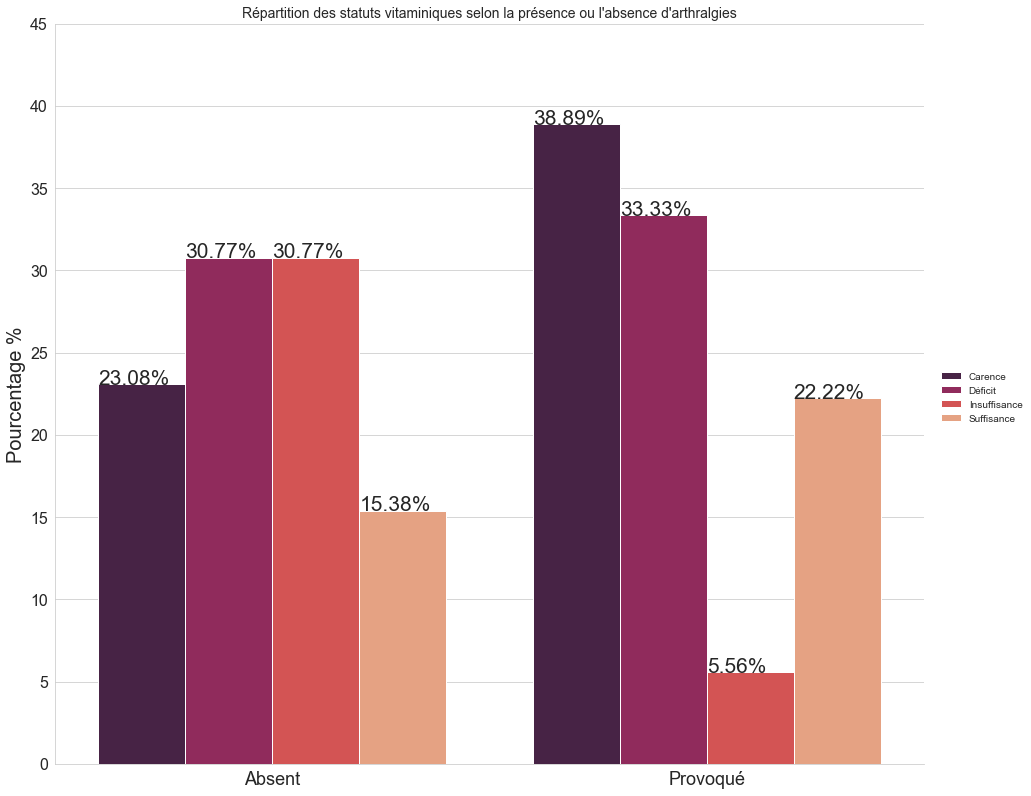

In [22]:


x,y = 'Saignement', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket")
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon le saignement",fontsize="20")

for p in b.ax.patches:
    txt = ""+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=21)
    
plt.savefig('repartition_taux_vit_d_Saignement.jpeg')
plt.show()

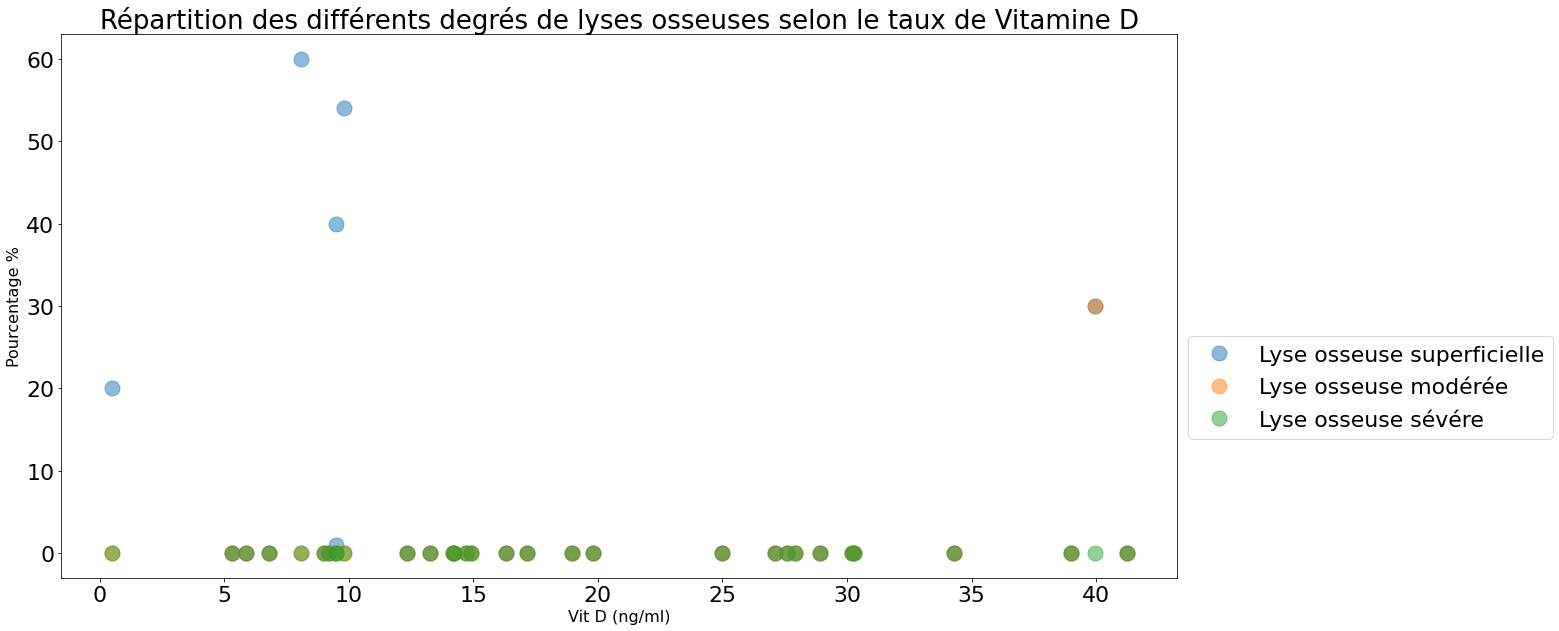

In [142]:


# b=sns.lineplot(data=df, x="percentage_dents atteintes_lyse ", y="vit_d")
# b=sns.lineplot(data=df, x="percentage_dents_atteintes_lyse_superficielle", y="vit_d")
# b=sns.lineplot(data=df, x="percentage_dents_atteintes_lyse modérée", y="vit_d")
# b=sns.lineplot(data=df, x="percentage_dents_atteintes_lyse sévère", y="vit_d")

# b.set_xlabel("X Label",fontsize=30)
# b.set_ylabel("Y Label",fontsize=20)
# b.tick_params(labelsize=26)
# b.set(xlabel=None)
# b.set(ylabel="Vit D (ng/ml)")
# #b.set_title("Courbe représentant la corrélation entre le taux de vitamine D et l'IMC")
# #plt.savefig('relation_vit_d_imc.jpeg')

# y=df['vit_d']
# x=df['percentage_dents atteintes_lyse ']
# plt.plot(y,x)
# x=df['percentage_dents_atteintes_lyse_superficielle']
# plt.plot(y,x)
# x=df['percentage_dents_atteintes_lyse modérée']
# plt.plot(y,x)
# x=df['percentage_dents_atteintes_lyse sévère']
# plt.plot(y,x)
#boxplot_multiv("vit_d","percentage_dents atteintes_lyse ","","Vit D (ng/ml)","Repartition_vit_d_lysee","Lyse")

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
colors=['#E4A282','#912B5B','#472445', '#D25455']
df.plot(x="vit_d", y=["percentage_dents_atteintes_lyse_superficielle", "percentage_dents_atteintes_lyse modérée" , "percentage_dents_atteintes_lyse sévère"], style='o',ms=15,fontsize=22,figsize=(20, 10),alpha=0.5)
plt.ylabel('Pourcentage %')
plt.xlabel("Vit D (ng/ml)")
plt.legend(fontsize=22,loc='upper left') # using a size in points
plt.legend(bbox_to_anchor=(1, 0.465),fontsize=22,labels=['Lyse osseuse superficielle','Lyse osseuse modérée','Lyse osseuse sévére'])
plt.title("Répartition des différents degrés de lyses osseuses selon le taux de Vitamine D",fontsize=26)
plt.savefig('lyse_osseuse_vity_d.jpeg')

#plt.legend(fontsize="x-large") # using a named size

C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x2160 with 0 Axes>

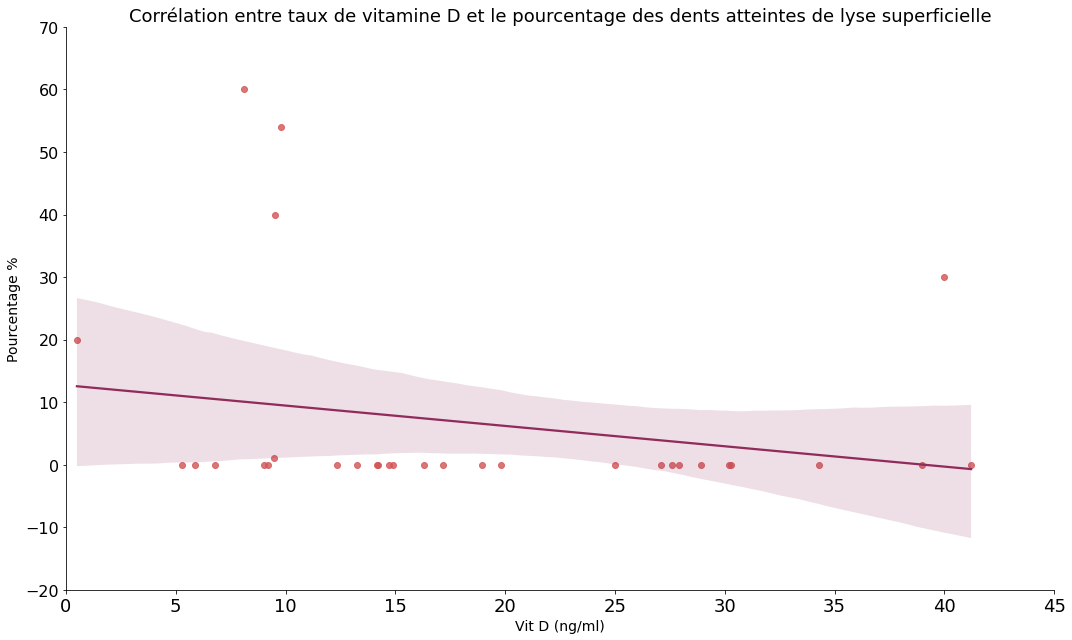

In [67]:
plt.figure(figsize=(30,30)) 
b=sns.lmplot("vit_d","percentage_dents_atteintes_lyse_superficielle", df,line_kws={'color': '#912B5B'}, scatter_kws={'color':'#D25455'}, aspect=2)


b.fig.set_size_inches(15,9)

plt.ylabel('Pourcentage %',fontsize=14)
plt.xlabel("Vit D (ng/ml)",fontsize=14)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

plt.title("Corrélation entre taux de vitamine D et le pourcentage des dents atteintes de lyse superficielle",fontsize=18)
plt.tight_layout()
plt.savefig('correlation_lyse_superficielle_vit_d.jpeg')

C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x2160 with 0 Axes>

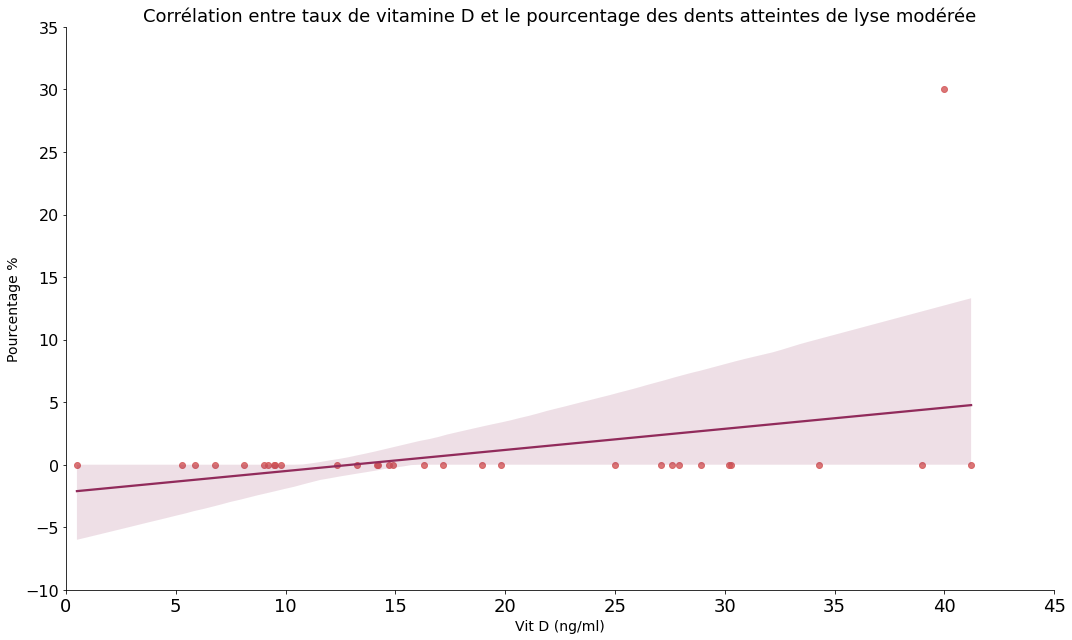

In [68]:
plt.figure(figsize=(30,30)) 
b=sns.lmplot("vit_d","percentage_dents_atteintes_lyse modérée", df,line_kws={'color': '#912B5B'}, scatter_kws={'color':'#D25455'}, aspect=2)


b.fig.set_size_inches(15,9)

plt.ylabel('Pourcentage %',fontsize=14)
plt.xlabel("Vit D (ng/ml)",fontsize=14)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

plt.title("Corrélation entre taux de vitamine D et le pourcentage des dents atteintes de lyse modérée",fontsize=18)
plt.tight_layout()
plt.savefig('correlation_lyse_modérée_vit_d.jpeg')

C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x2160 with 0 Axes>

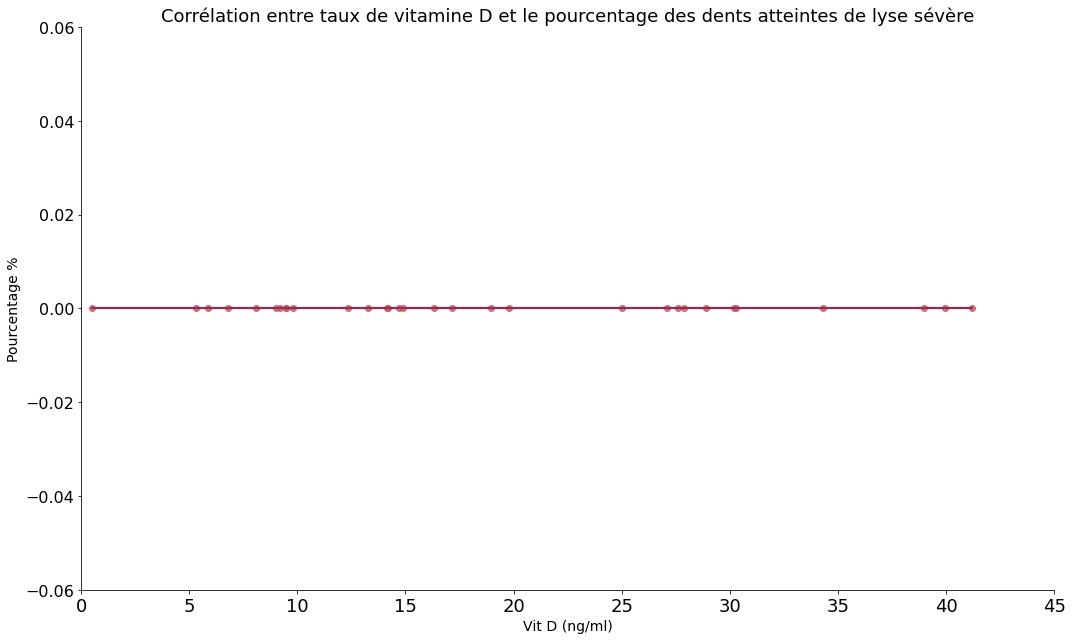

In [69]:
plt.figure(figsize=(30,30)) 
b=sns.lmplot("vit_d","percentage_dents_atteintes_lyse sévère", df,line_kws={'color': '#912B5B'}, scatter_kws={'color':'#D25455'}, aspect=2)


b.fig.set_size_inches(15,9)

plt.ylabel('Pourcentage %',fontsize=14)
plt.xlabel("Vit D (ng/ml)",fontsize=14)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

plt.title("Corrélation entre taux de vitamine D et le pourcentage des dents atteintes de lyse sévère",fontsize=18)
plt.tight_layout()
plt.savefig('correlation_lyse_sévère_vit_d.jpeg')

C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x2160 with 0 Axes>

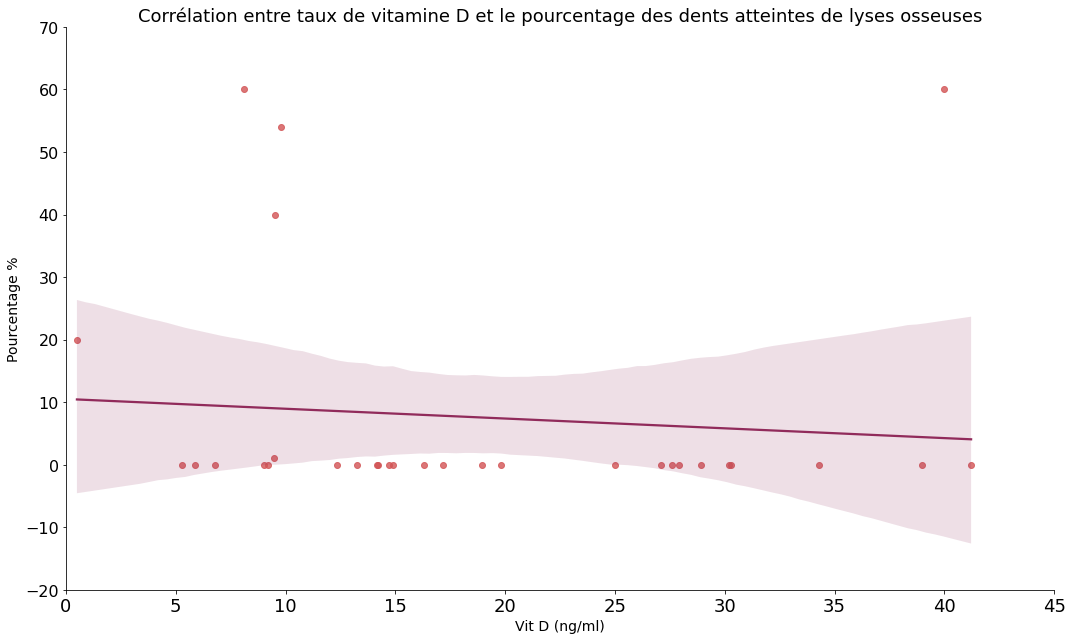

In [70]:
plt.figure(figsize=(30,30)) 
b=sns.lmplot("vit_d","percentage_dents atteintes_lyse ", df,line_kws={'color': '#912B5B'}, scatter_kws={'color':'#D25455'}, aspect=2)


b.fig.set_size_inches(15,9)

plt.ylabel('Pourcentage %',fontsize=14)
plt.xlabel("Vit D (ng/ml)",fontsize=14)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

plt.title("Corrélation entre taux de vitamine D et le pourcentage des dents atteintes de lyses osseuses",fontsize=18)
plt.tight_layout()
plt.savefig('correlation_lyse_osseusse_vit_d.jpeg')

C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x2160 with 0 Axes>

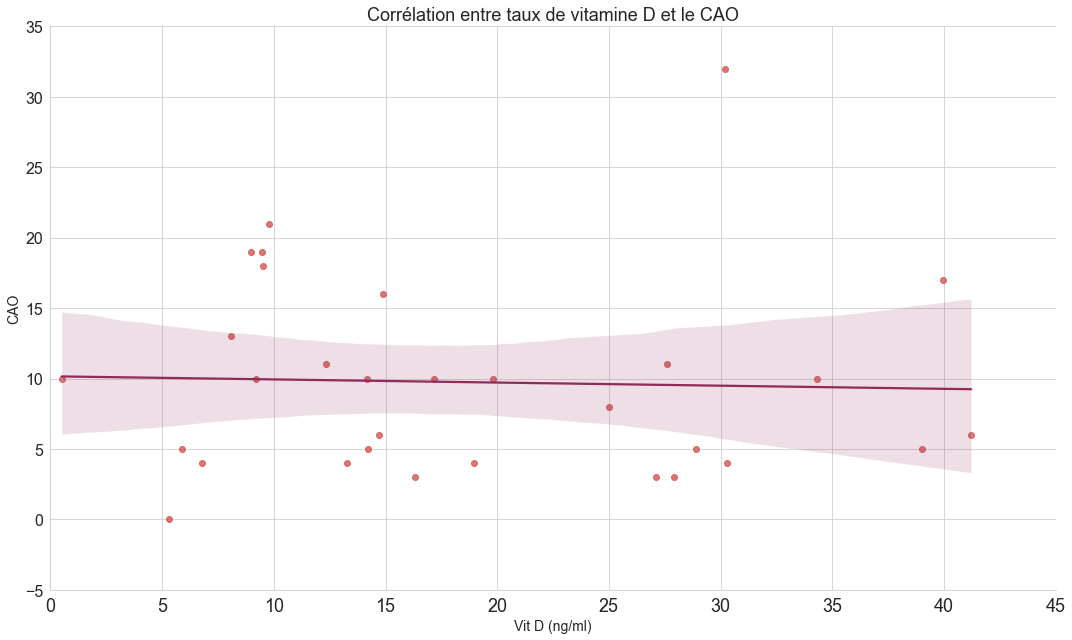

In [12]:
plt.figure(figsize=(30,30)) 
b=sns.lmplot("vit_d","CAO", df,line_kws={'color': '#912B5B'}, scatter_kws={'color':'#D25455'}, aspect=2)


b.fig.set_size_inches(15,9)

plt.ylabel('CAO',fontsize=14)
plt.xlabel("Vit D (ng/ml)",fontsize=14)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

plt.title("Corrélation entre taux de vitamine D et le CAO",fontsize=18)
plt.tight_layout()
plt.savefig('correlation_CAO_vit_d.jpeg')

<Figure size 1800x1440 with 0 Axes>

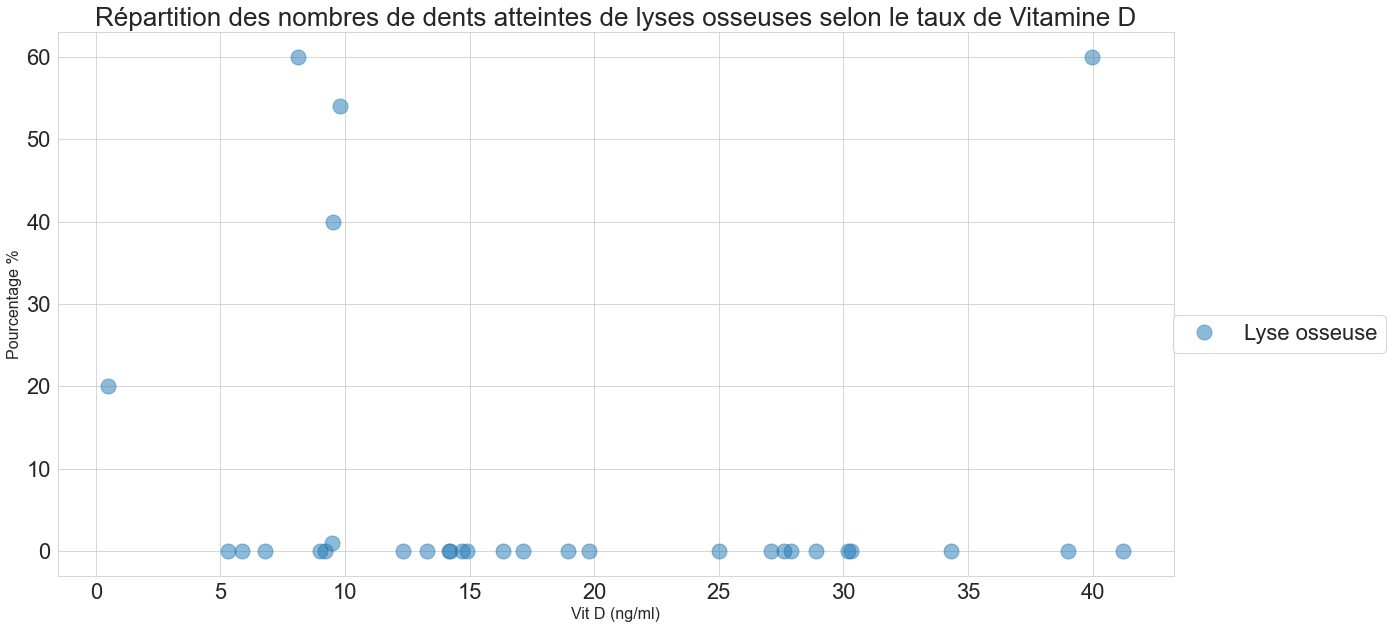

In [188]:
plt.figure(figsize=(25,20)) 

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
df.plot(x="vit_d", y="percentage_dents atteintes_lyse ", style='o',ms=15,fontsize=22,figsize=(20, 10),alpha=0.5)
plt.ylabel('Pourcentage %')
plt.xlabel("Vit D (ng/ml)")

plt.legend(bbox_to_anchor=(1.2,0.5),fontsize=22,labels=['Lyse osseuse'],loc='upper right')

plt.title("Répartition des nombres de dents atteintes de lyses osseuses selon le taux de Vitamine D",fontsize=26)
plt.savefig('lyse_osseuse_vit_d.jpeg')

Text(0.5, 1.0, 'Répartition des récessions selon le taux de Vitamine D')

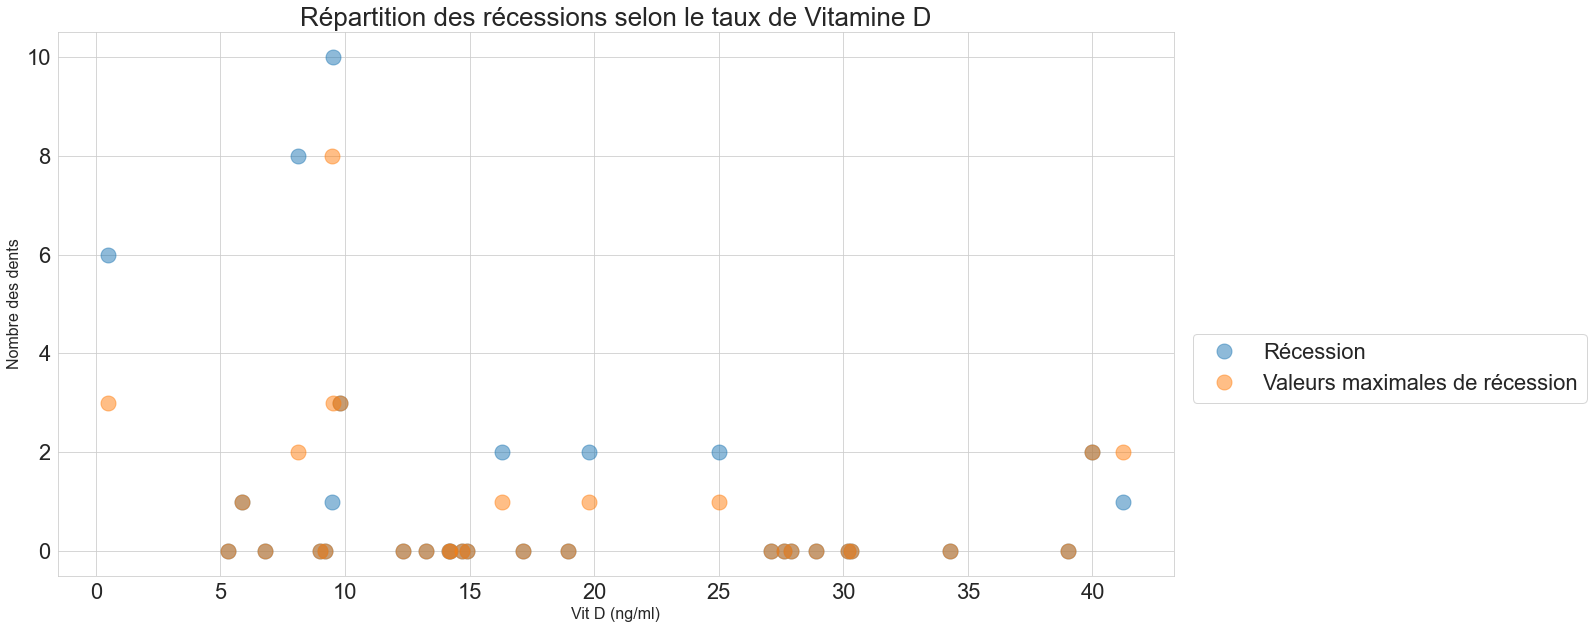

In [199]:


# b=sns.lineplot(data=df, x="percentage_dents atteintes_lyse ", y="vit_d")
# b=sns.lineplot(data=df, x="percentage_dents_atteintes_lyse_superficielle", y="vit_d")
# b=sns.lineplot(data=df, x="percentage_dents_atteintes_lyse modérée", y="vit_d")
# b=sns.lineplot(data=df, x="percentage_dents_atteintes_lyse sévère", y="vit_d")

# b.set_xlabel("X Label",fontsize=30)
# b.set_ylabel("Y Label",fontsize=20)
# b.tick_params(labelsize=26)
# b.set(xlabel=None)
# b.set(ylabel="Vit D (ng/ml)")
# #b.set_title("Courbe représentant la corrélation entre le taux de vitamine D et l'IMC")
# #plt.savefig('relation_vit_d_imc.jpeg')

# y=df['vit_d']
# x=df['percentage_dents atteintes_lyse ']
# plt.plot(y,x)
# x=df['percentage_dents_atteintes_lyse_superficielle']
# plt.plot(y,x)
# x=df['percentage_dents_atteintes_lyse modérée']
# plt.plot(y,x)
# x=df['percentage_dents_atteintes_lyse sévère']
# plt.plot(y,x)
#boxplot_multiv("vit_d","percentage_dents atteintes_lyse ","","Vit D (ng/ml)","Repartition_vit_d_lysee","Lyse")

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
colors=['#E4A282','#912B5B','#472445', '#D25455']
df.plot(x="vit_d", y=["Récession", "Récession_valeurmaximale_mm"], style='o',ms=15,fontsize=22,figsize=(20, 10),alpha=0.5)
plt.ylabel('Nombre des dents')
plt.xlabel("Vit D (ng/ml)")
plt.legend(fontsize=22,loc='upper left') # using a size in points
plt.legend(bbox_to_anchor=(1.38, 0.465),fontsize=22,labels=['Récession','Valeurs maximales de récession'])
plt.title("Répartition des récessions selon le taux de Vitamine D",fontsize=26)

#plt.legend(fontsize="x-large") # using a named size

Text(0.5, 1.0, 'Répartition des nombres de dents atteintes de récissions selon le taux de Vitamine D')

<Figure size 1800x1440 with 0 Axes>

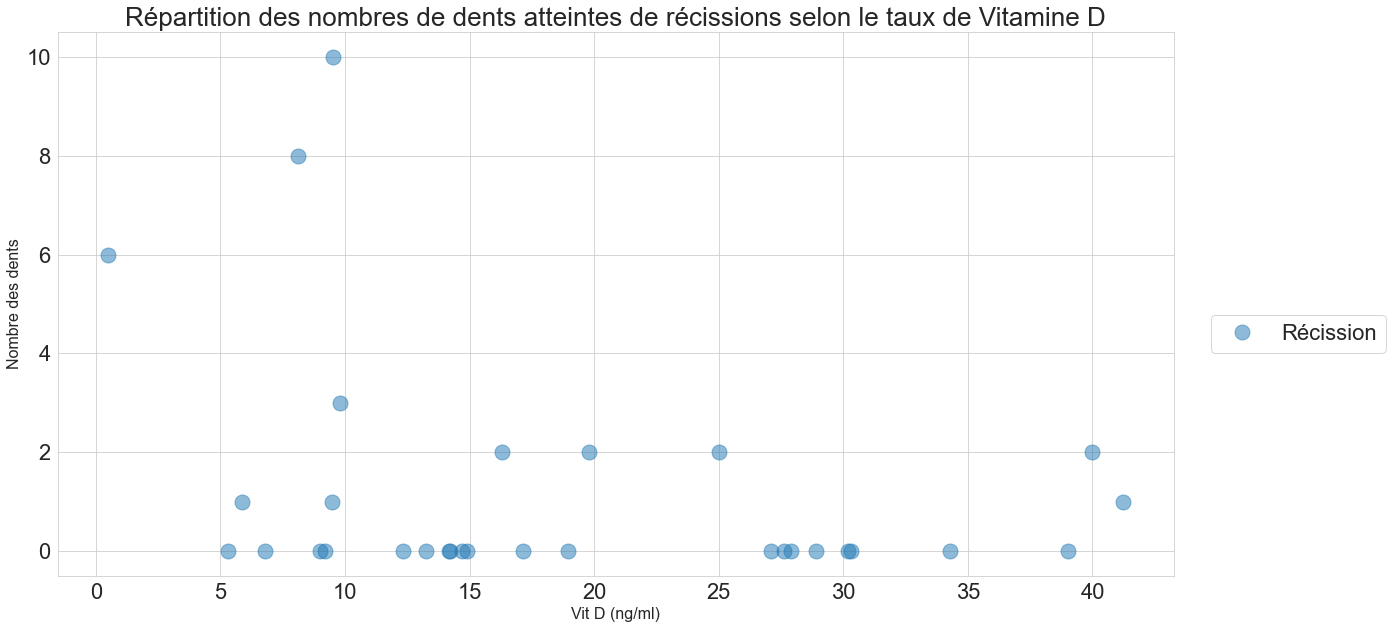

In [208]:
plt.figure(figsize=(25,20)) 

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
df.plot(x="vit_d", y="Récession", style='o',ms=15,fontsize=22,figsize=(20, 10),alpha=0.5)
plt.ylabel('Nombre des dents')
plt.xlabel("Vit D (ng/ml)")

plt.legend(bbox_to_anchor=(1.2,0.5),fontsize=22,labels=['Récission'],loc='upper right')

plt.title("Répartition des nombres de dents atteintes de récissions selon le taux de Vitamine D",fontsize=26)


C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x2160 with 0 Axes>

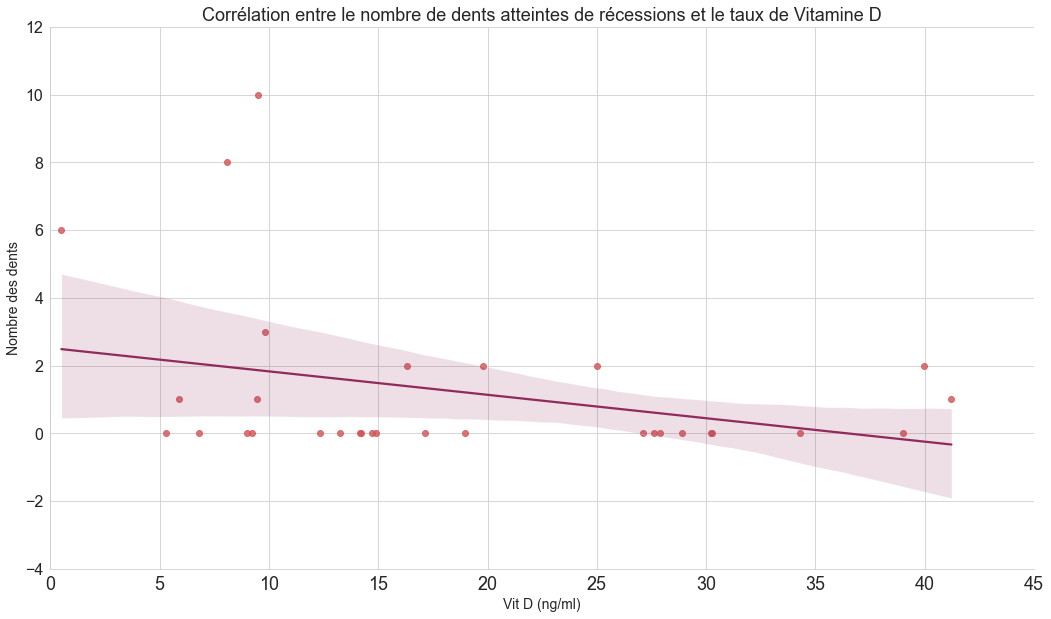

In [92]:
plt.figure(figsize=(30,30)) 
b=sns.lmplot("vit_d","Récession", df,line_kws={'color': '#912B5B'}, scatter_kws={'color':'#D25455'}, aspect=2)


b.fig.set_size_inches(15,9)

plt.ylabel('Nombre des dents',fontsize=14)
plt.xlabel("Vit D (ng/ml)",fontsize=14)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

plt.title("Corrélation entre le nombre de dents atteintes de récessions et le taux de Vitamine D",fontsize=18)
plt.tight_layout()
plt.savefig('correlation_recession_vit_d.jpeg')

Text(0.5, 1.0, 'Répartition des valeurs maximales des récissions selon le taux de Vitamine D')

<Figure size 1800x1440 with 0 Axes>

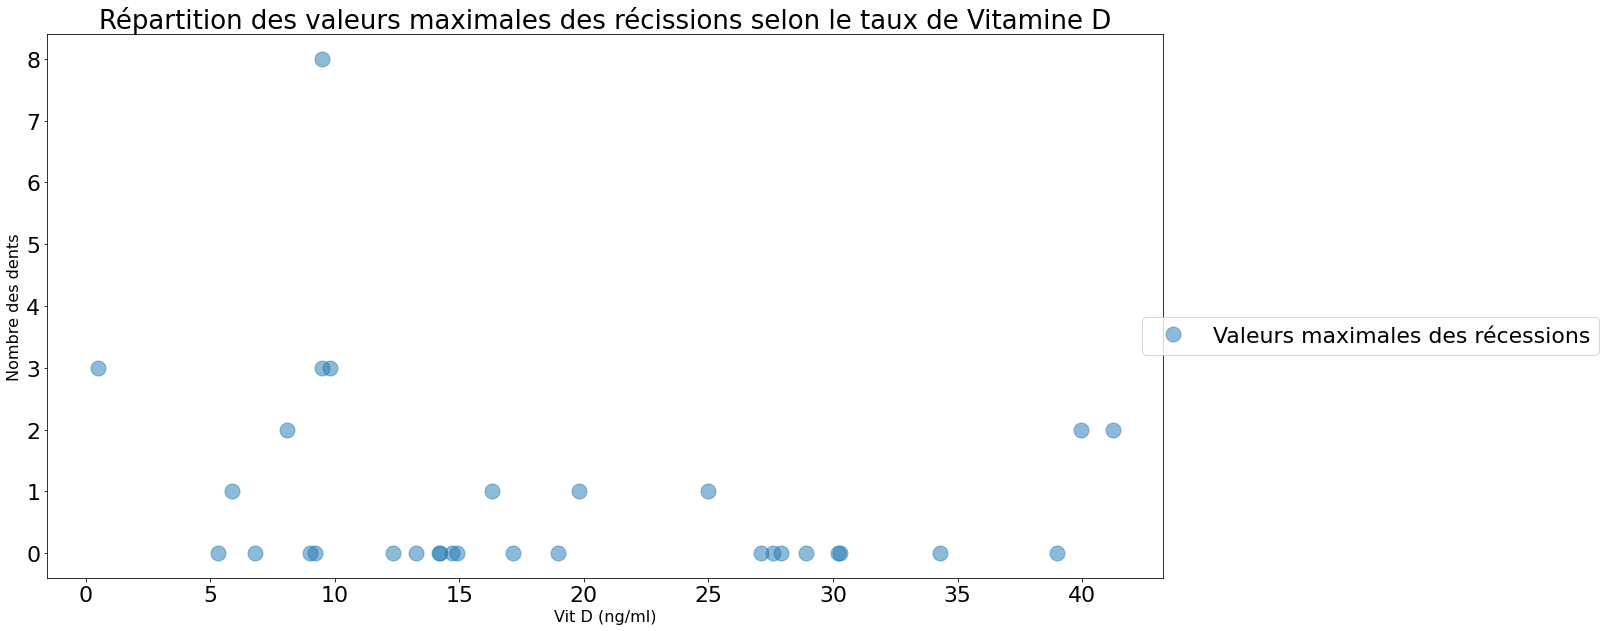

In [141]:
plt.figure(figsize=(25,20)) 

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
df.plot(x="vit_d", y="Récession_valeurmaximale_mm", style='o',ms=15,fontsize=22,figsize=(20, 10),alpha=0.5)
plt.ylabel('Nombre des dents')
plt.xlabel("Vit D (ng/ml)")

plt.legend(bbox_to_anchor=(1.4,0.5),fontsize=22,labels=['Valeurs maximales des récessions'],loc='upper right')

plt.title("Répartition des valeurs maximales des récissions selon le taux de Vitamine D",fontsize=26)


C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x2160 with 0 Axes>

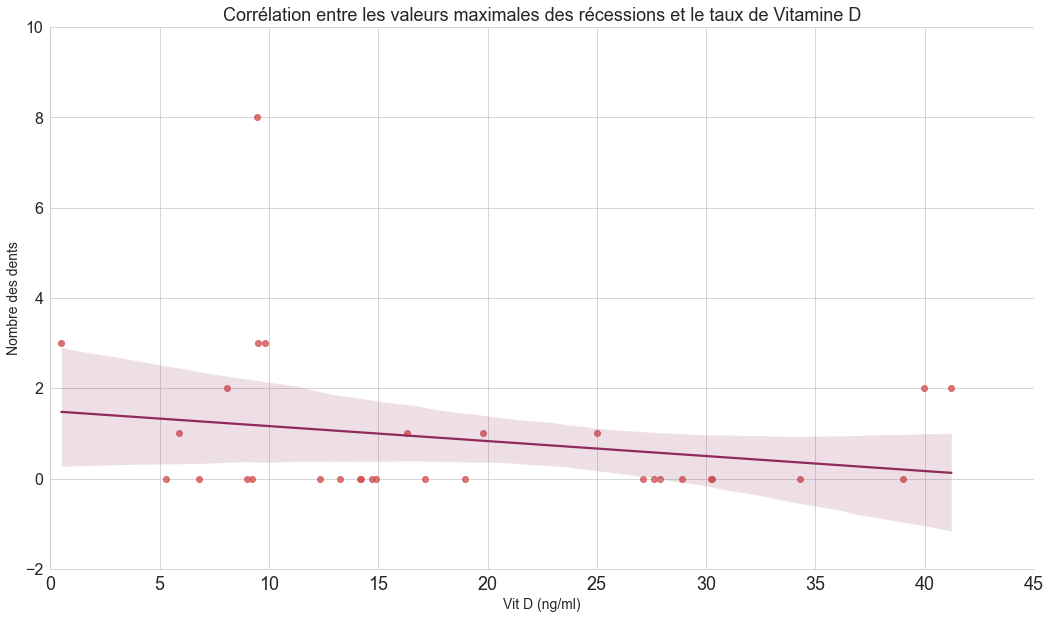

In [82]:
plt.figure(figsize=(30,30)) 
b=sns.lmplot("vit_d","Récession_valeurmaximale_mm", df, line_kws={'color': '#912B5B'}, scatter_kws={'color':'#D25455'},aspect=2)
#'#D25455','#d25b80

b.fig.set_size_inches(15,9)

plt.ylabel('Nombre des dents',fontsize=14)
plt.xlabel("Vit D (ng/ml)",fontsize=14)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

plt.title("Corrélation entre les valeurs maximales des récessions et le taux de Vitamine D",fontsize=18)
plt.tight_layout()
plt.savefig('correlation_max_val_reccession_vit_d.jpeg')


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


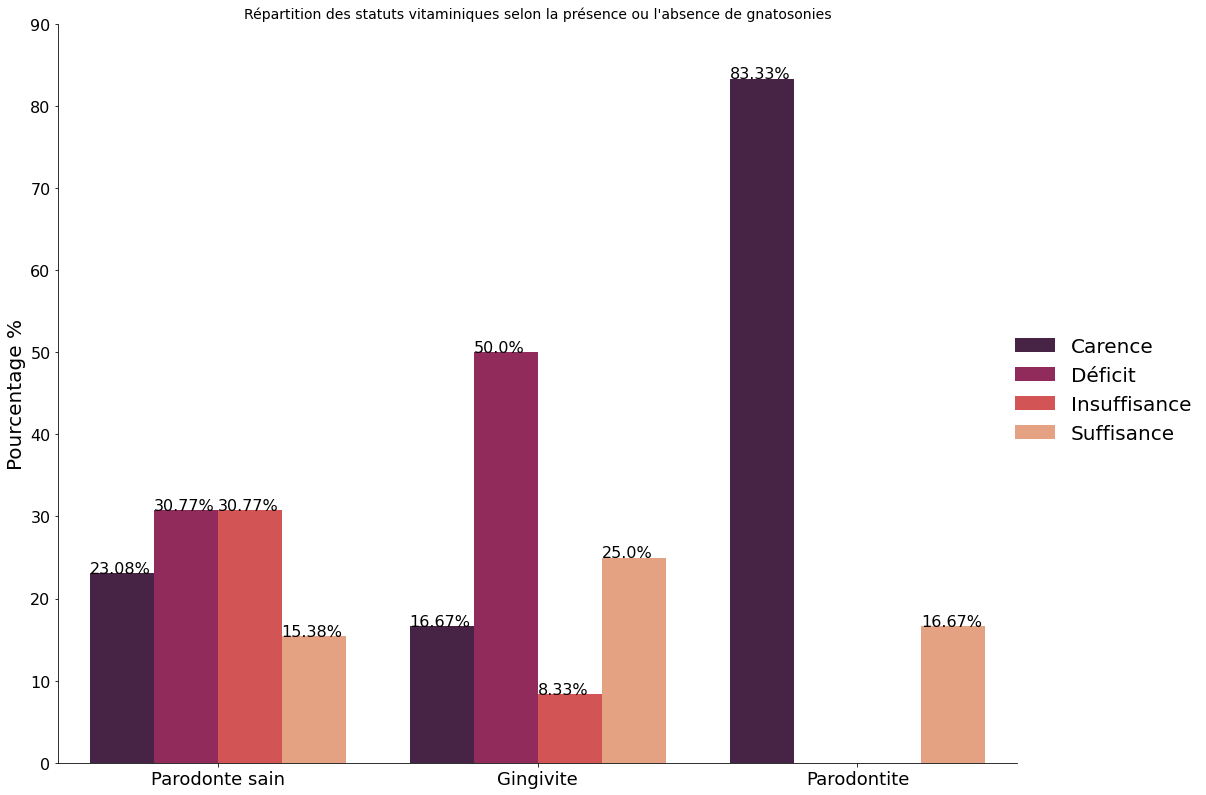

In [104]:
Bonne = df[df['HygièneBuccoDentaire'].isin(['Bonne'])]


x,y = 'category_parodontale', 'niv_vitD'
df['category_parodontale'] = pd.Categorical(df['Diagnostic_parodontal'], categories=['Parodonte sain', 'Gingivite', 'Parodontite'], ordered=True)

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

# b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon la présence ou l'absence de gnatosonies",fontsize="14")

for p in b.ax.patches:
    txt = ""+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=16)
plt.legend(fontsize='20', title_fontsize='80',bbox_to_anchor=(1.2, 0.6),frameon=False)

plt.savefig('repartition_taux_vit_d_Gnatosonies.jpeg')
plt.show()

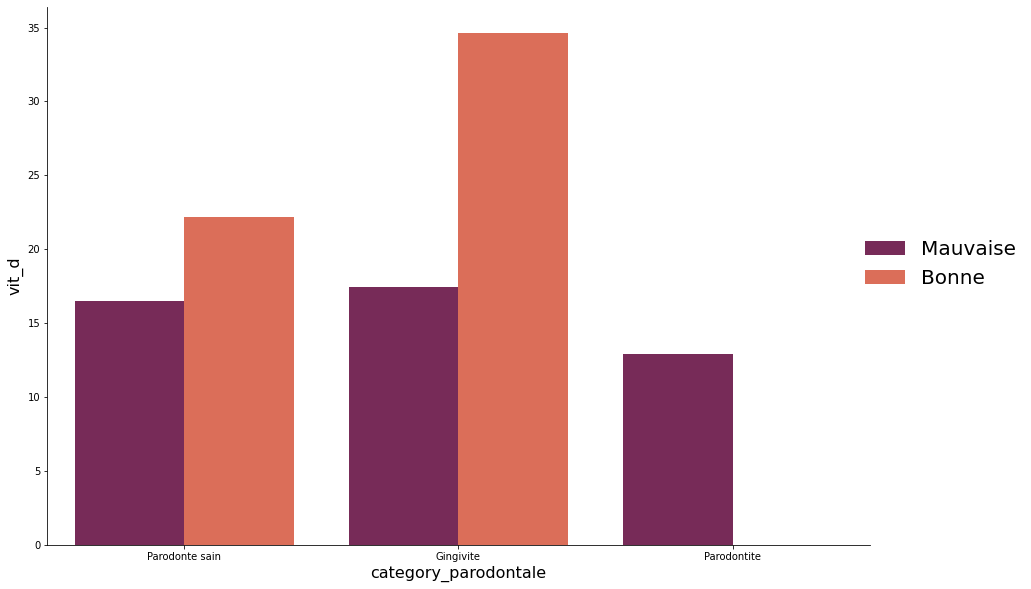

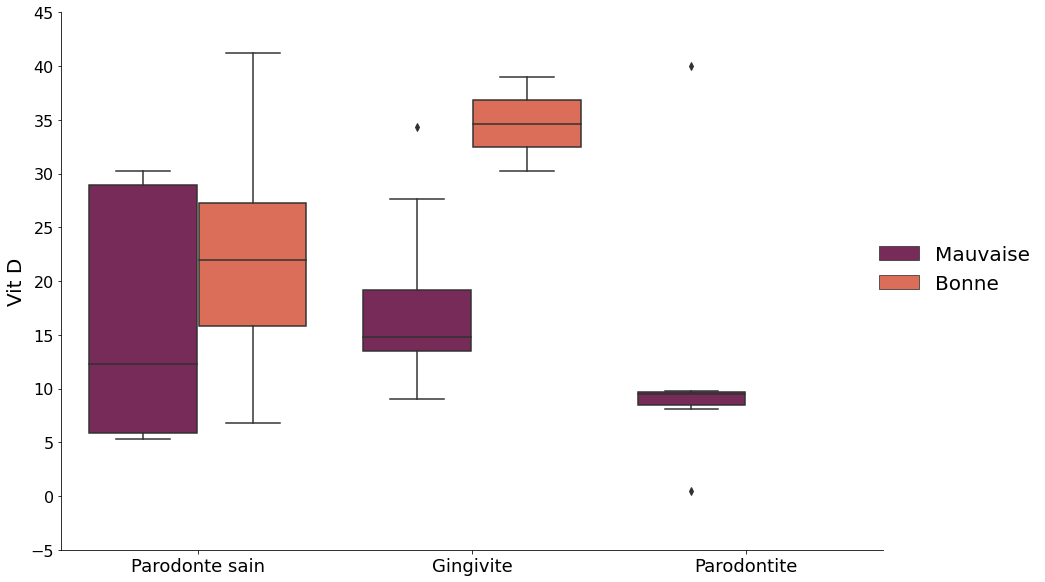

In [144]:
tmp=df

# df['profession']=df['profession'].astype('category').cat.codes
x,y = 'category_parodontale', 'HygièneBuccoDentaire'
#df['category_parodontale']=df['category_parodontale'].astype('category').cat.codes
df['niv_vitD']=df['niv_vitD'].astype('category').cat.codes
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

df1=df

b.fig.set_size_inches(14,11)

b = sns.catplot(x=x,y='vit_d',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False,ci=None)
plt.legend(fontsize='20', title_fontsize='80',bbox_to_anchor=(1.2, 0.6),frameon=False)

b = sns.catplot(x=x,y='vit_d',hue=y,kind='box',data=df1,height=8, aspect=1.5,palette="rocket",legend= False,ci=None)

#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

# b.legend.set_title(None)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Vit D")

#b.ax.set_title("Répartition des statuts vitaminiques selon la présence ou l'absence de gnatosonies",fontsize="22")

plt.legend(fontsize='20', title_fontsize='80',bbox_to_anchor=(1.2, 0.6),frameon=False)

# plt.savefig('repartition_taux_vit_d_Gnatosonies.jpeg')
plt.show()

df=tmp

<ipython-input-186-4d2566b0fca4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category_parodontale'] = pd.Categorical(df['Diagnostic_parodontal'], categories=['Parodonte sain', 'Gingivite', 'Parodontite'], ordered=True)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


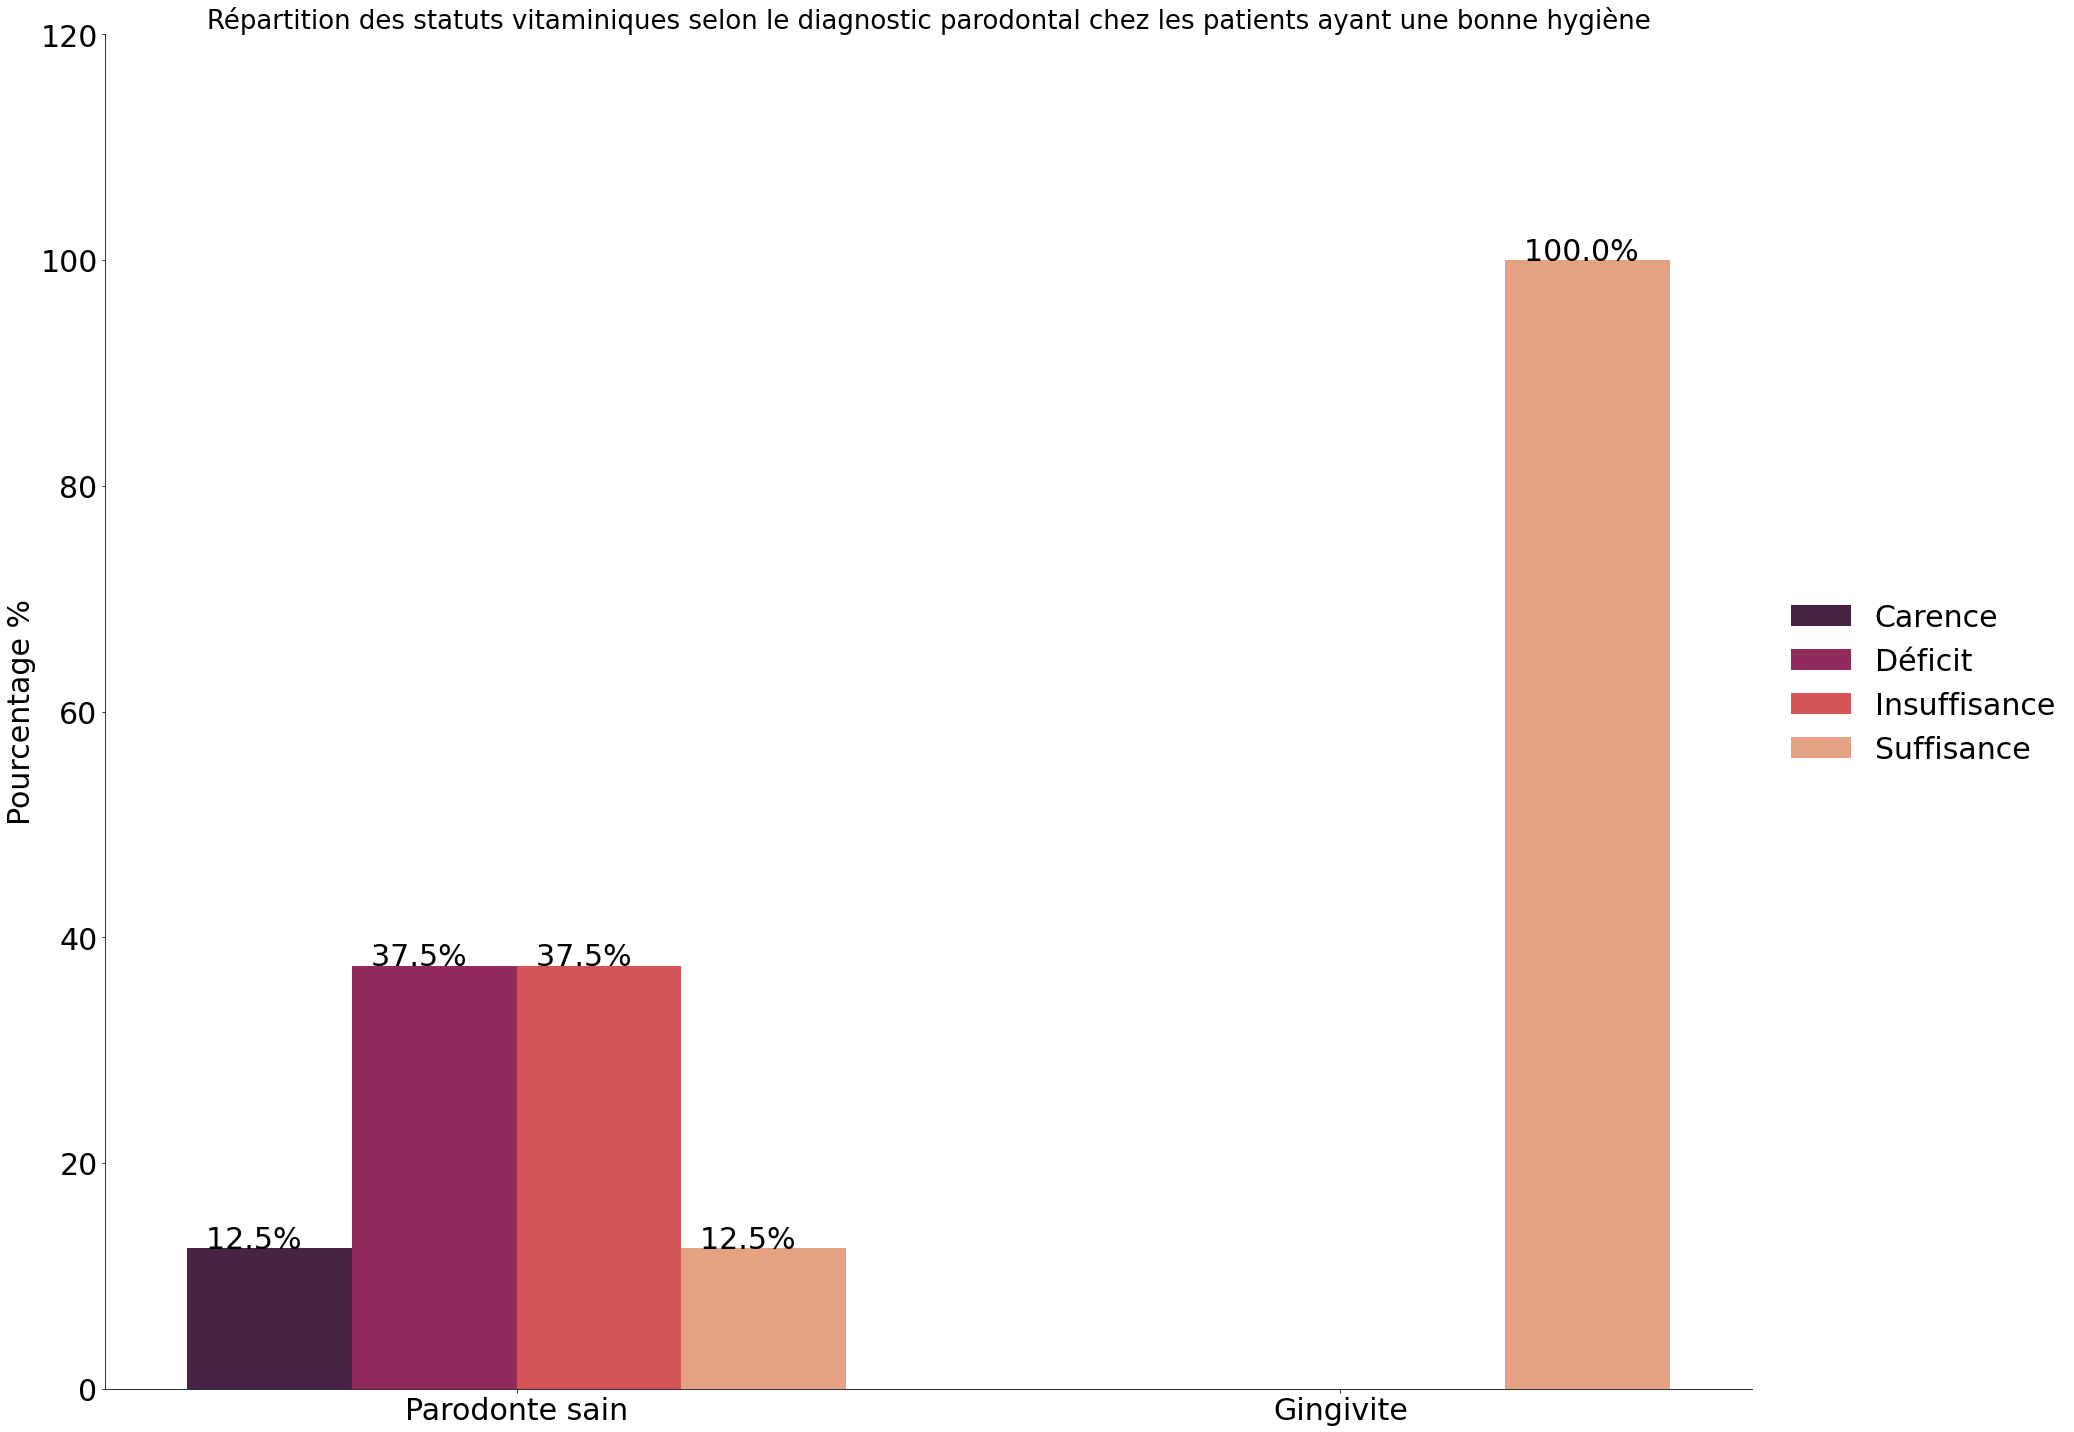

In [186]:
Bonne = df[df['HygièneBuccoDentaire'].isin(['Bonne'])]
temp=df
df=Bonne
df['category_parodontale'] = pd.Categorical(df['Diagnostic_parodontal'], categories=['Parodonte sain', 'Gingivite', 'Parodontite'], ordered=True)
x,y = 'category_parodontale', 'niv_vitD'

df1 = Bonne.groupby(x,observed = True)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 30)
b.set_yticklabels(fontsize = 30)

# b.legend.set_title(None)
b.fig.set_size_inches(30,20)


b.set_xlabels("X Label",fontsize=30)
b.set_ylabels("Y Label",fontsize=30)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon le diagnostic parodontal chez les patients ayant une bonne hygiène",fontsize="26")

for p in b.ax.patches:
    txt = "  "+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=30)
plt.legend(fontsize='30', title_fontsize='100',bbox_to_anchor=(1.2, 0.6),frameon=False,edgecolor="white")
plt.tight_layout()
plt.savefig('repartition_taux_vit_d_Bonne.jpg',transparent=False)
plt.show()

df=temp

<ipython-input-187-95bc8d3ba1e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category_parodontale'] = pd.Categorical(df['Diagnostic_parodontal'], categories=['Parodonte sain', 'Gingivite', 'Parodontite'], ordered=True)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


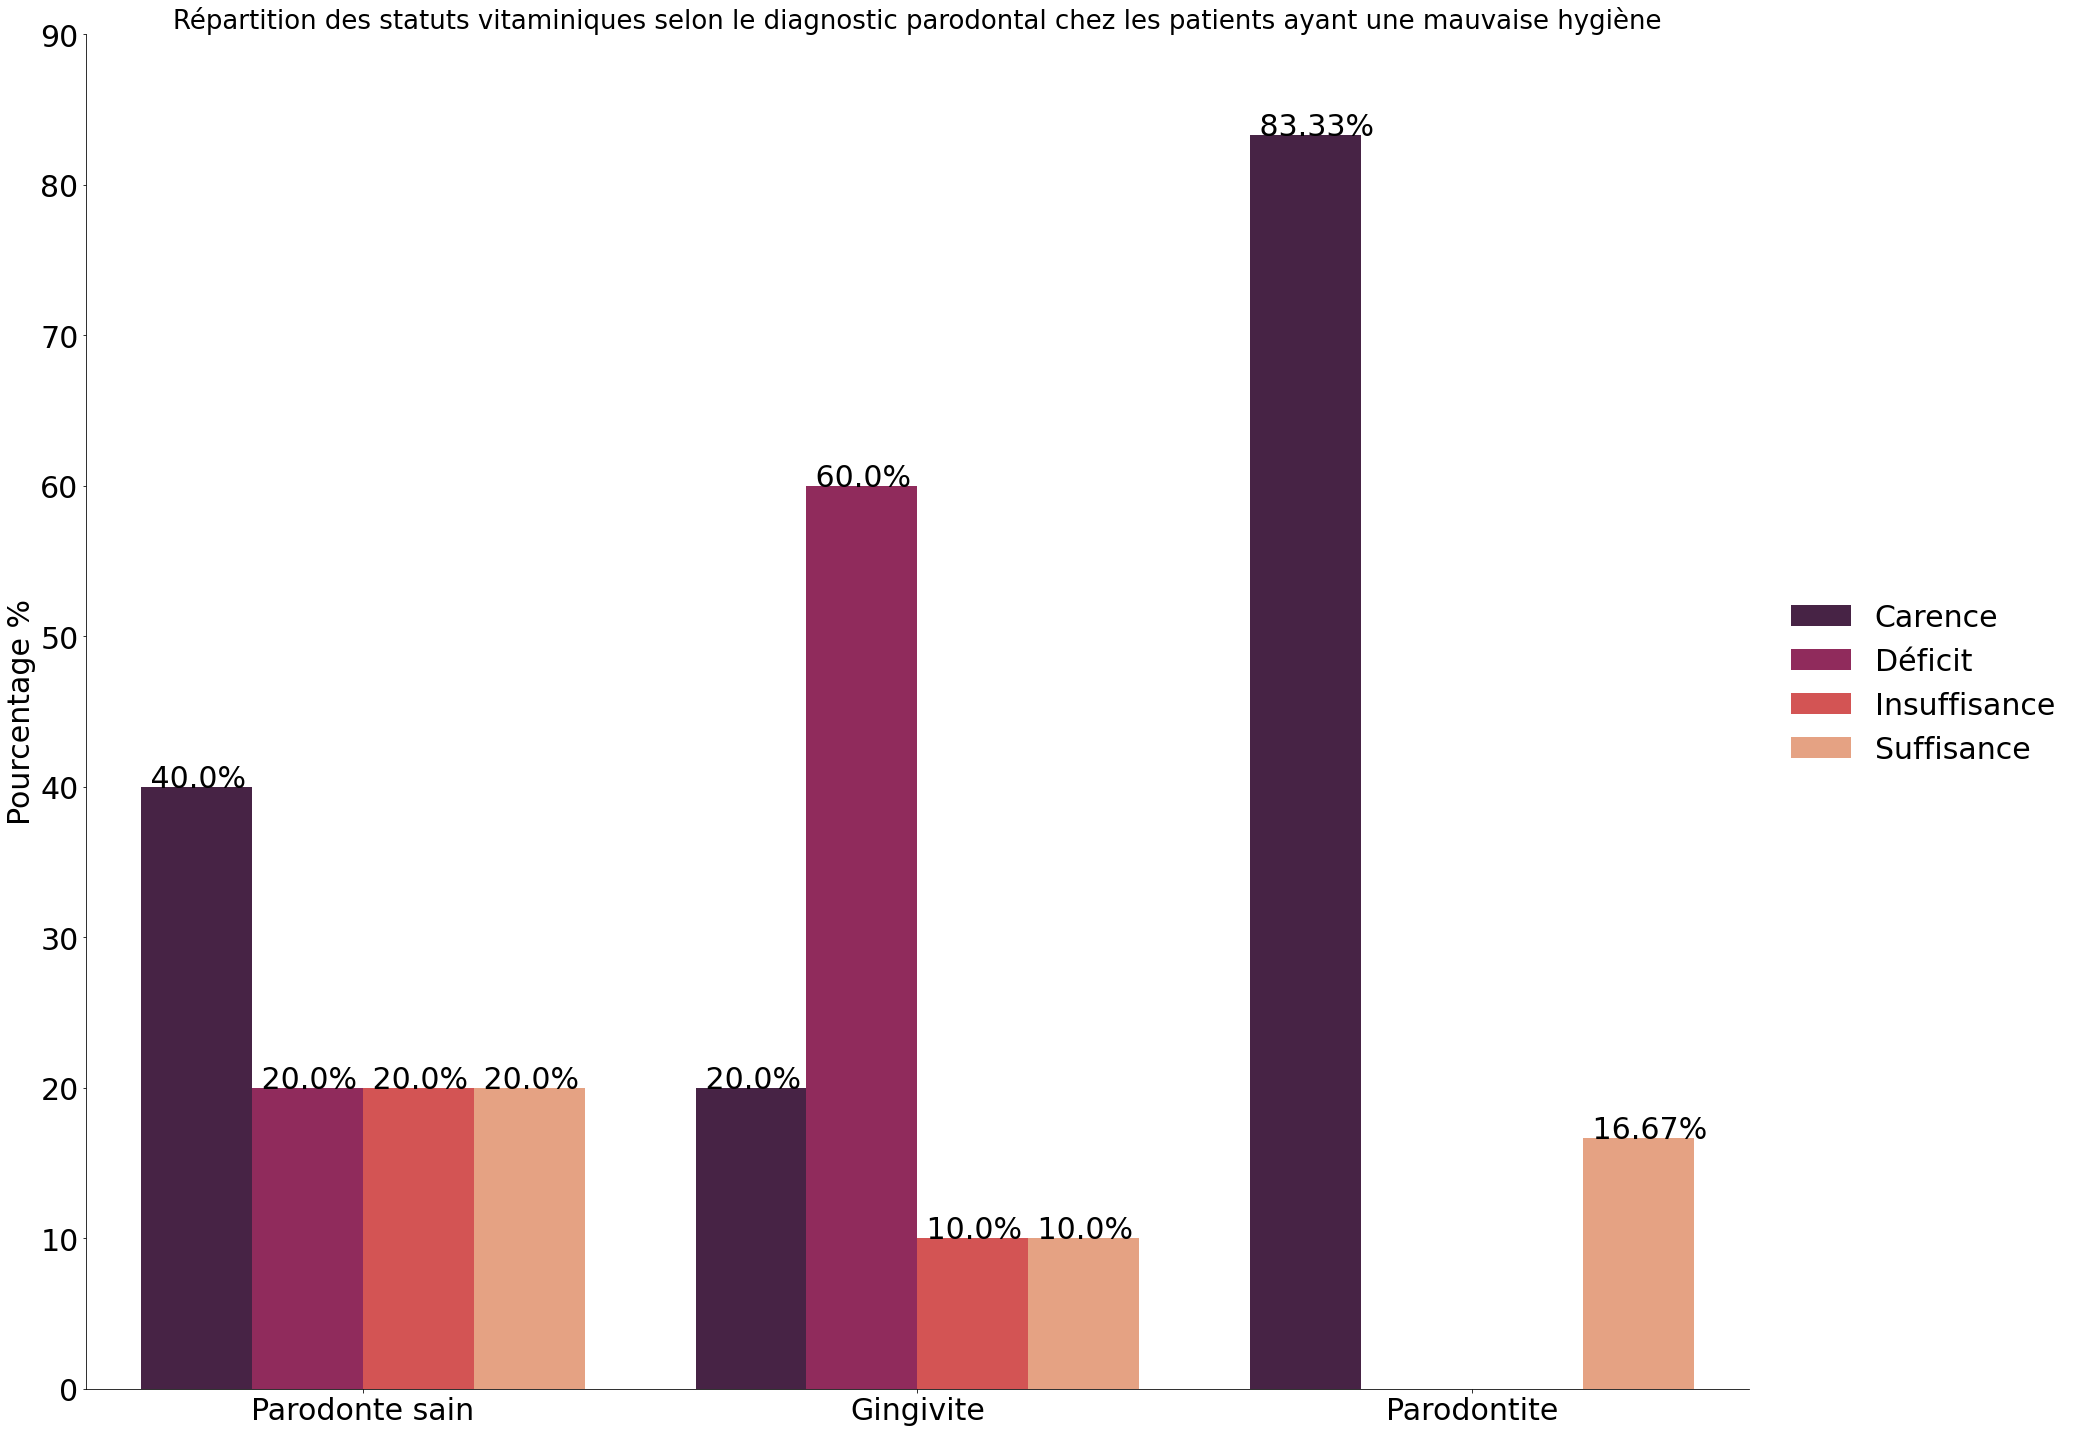

In [187]:
Mauvaise = df[df['HygièneBuccoDentaire'].isin(['Mauvaise'])]

temp=df
df=Mauvaise
df['category_parodontale'] = pd.Categorical(df['Diagnostic_parodontal'], categories=['Parodonte sain', 'Gingivite', 'Parodontite'], ordered=True)
x,y = 'category_parodontale', 'niv_vitD'

df1 = Mauvaise.groupby(x,observed = True)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 30)
b.set_yticklabels(fontsize = 30)

# b.legend.set_title(None)
b.fig.set_size_inches(30,20)


b.set_xlabels("X Label",fontsize=30)
b.set_ylabels("Y Label",fontsize=30)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon le diagnostic parodontal chez les patients ayant une mauvaise hygiène",fontsize="26")

for p in b.ax.patches:
    txt = " "+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=30)
plt.legend(fontsize='30', title_fontsize='100',bbox_to_anchor=(1.2, 0.6),frameon=False,edgecolor="white")
plt.tight_layout()
plt.savefig('repartition_taux_vit_d_mauvaise.jpg',transparent=False)
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


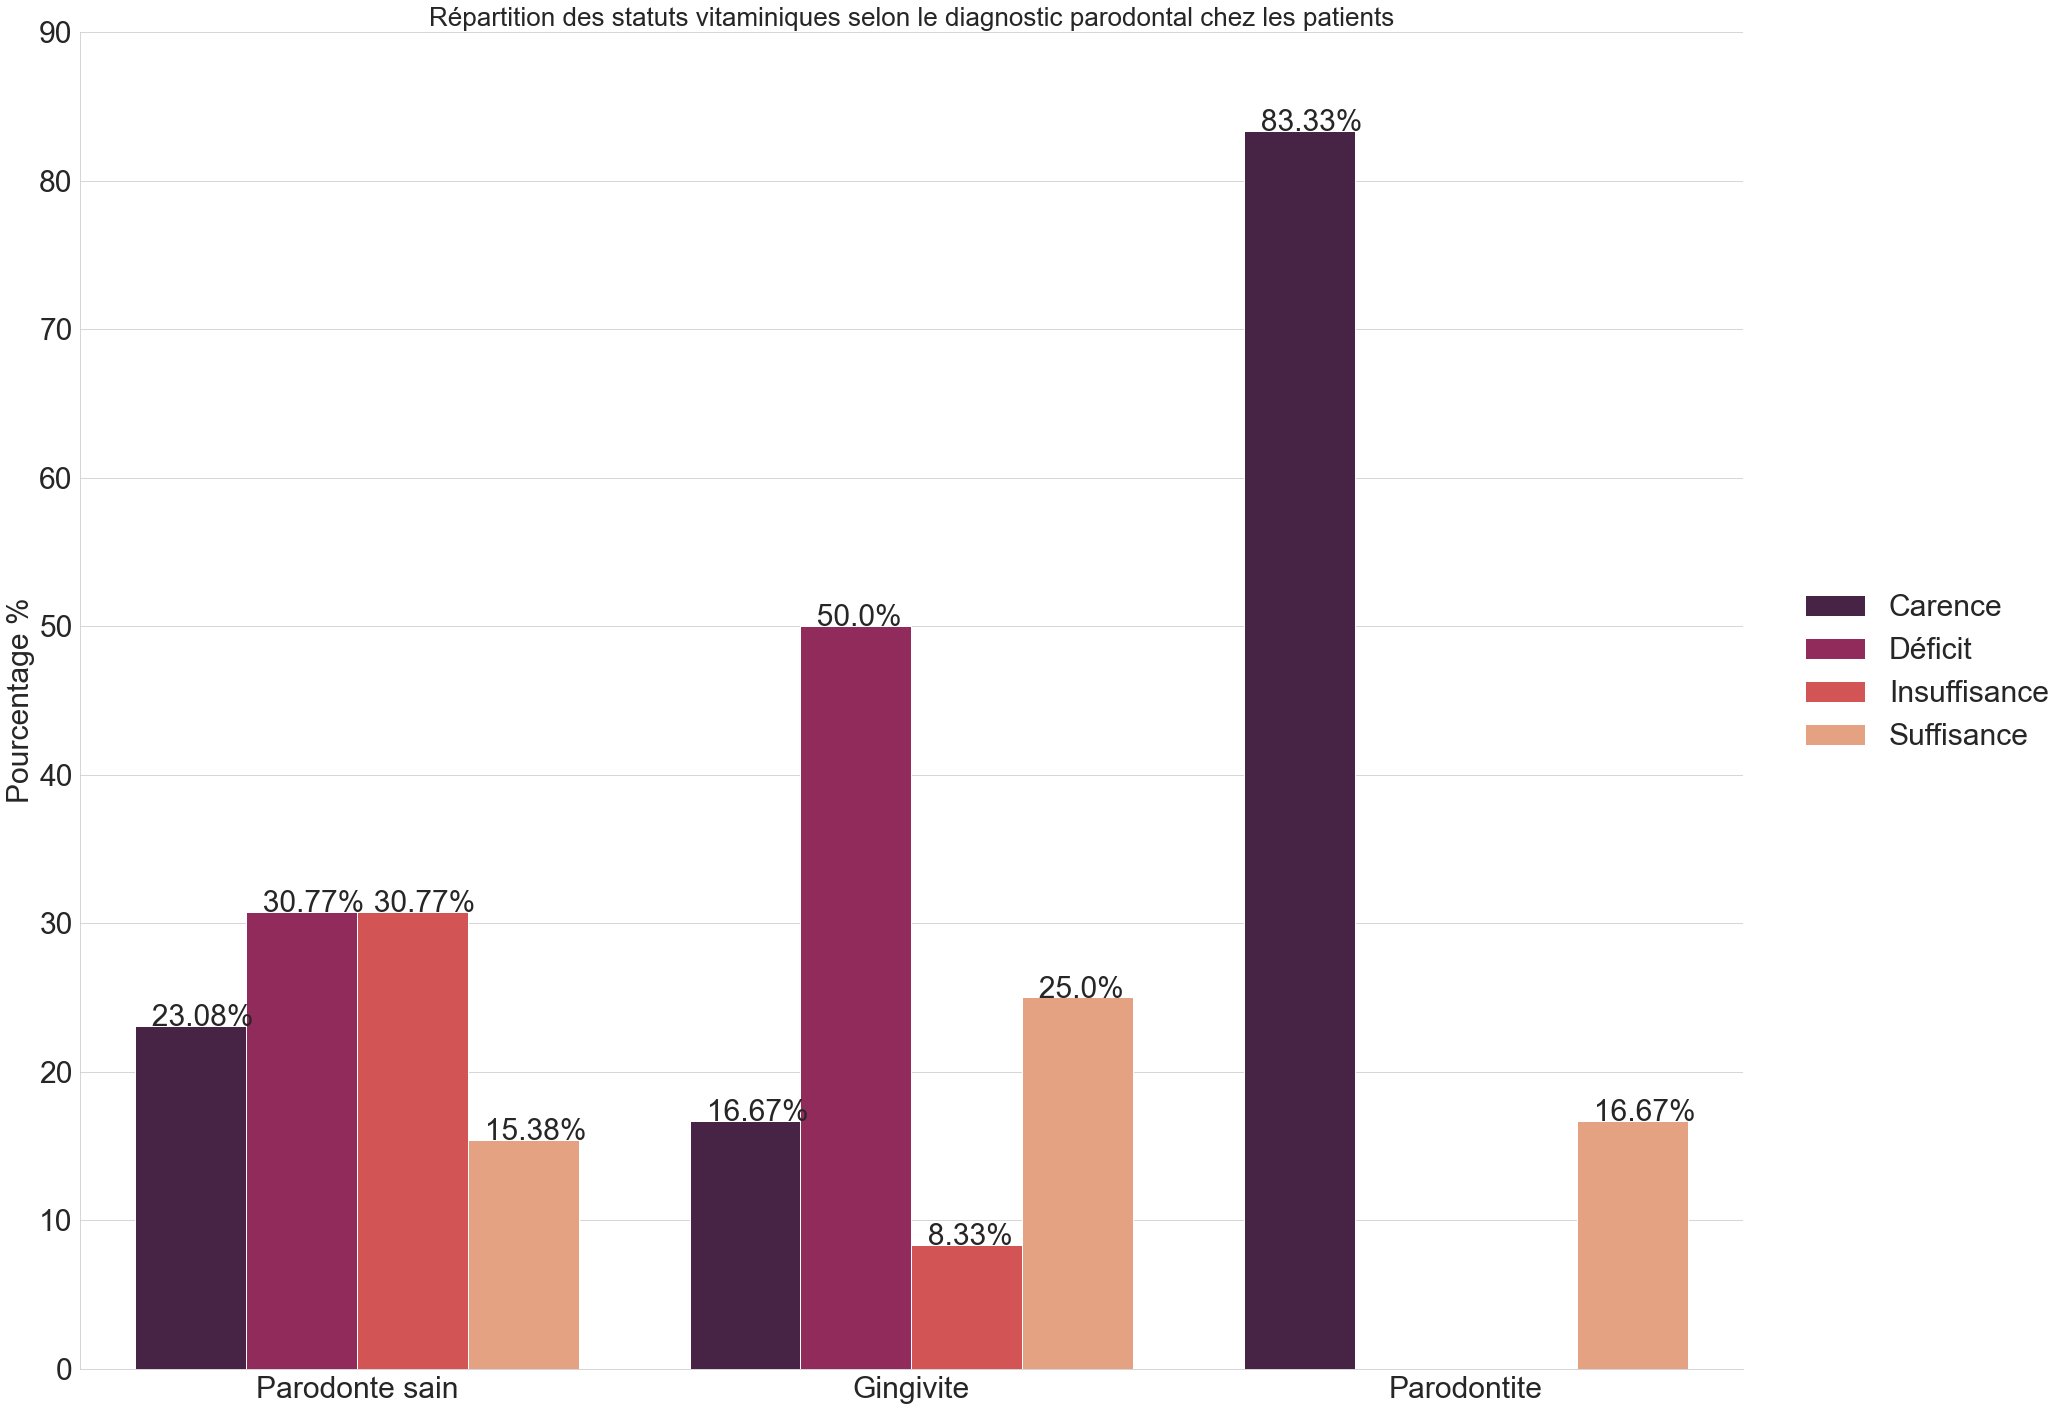

In [108]:
df['category_parodontale'] = pd.Categorical(df['Diagnostic_parodontal'], categories=['Parodonte sain', 'Gingivite', 'Parodontite'], ordered=True)

x,y = 'category_parodontale', 'niv_vitD'

df1 = df.groupby(x,observed = True)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 30)
b.set_yticklabels(fontsize = 30)

# b.legend.set_title(None)
b.fig.set_size_inches(30,20)


b.set_xlabels("X Label",fontsize=30)
b.set_ylabels("Y Label",fontsize=30)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon le diagnostic parodontal chez les patients",fontsize="26")

for p in b.ax.patches:
    txt = "  "+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=30)
plt.legend(fontsize='30', title_fontsize='100',bbox_to_anchor=(1.2, 0.6),frameon=False,edgecolor="white")
plt.tight_layout()
plt.savefig('repartition_taux_vit_d_diagnostique.jpg',transparent=False)
plt.show()

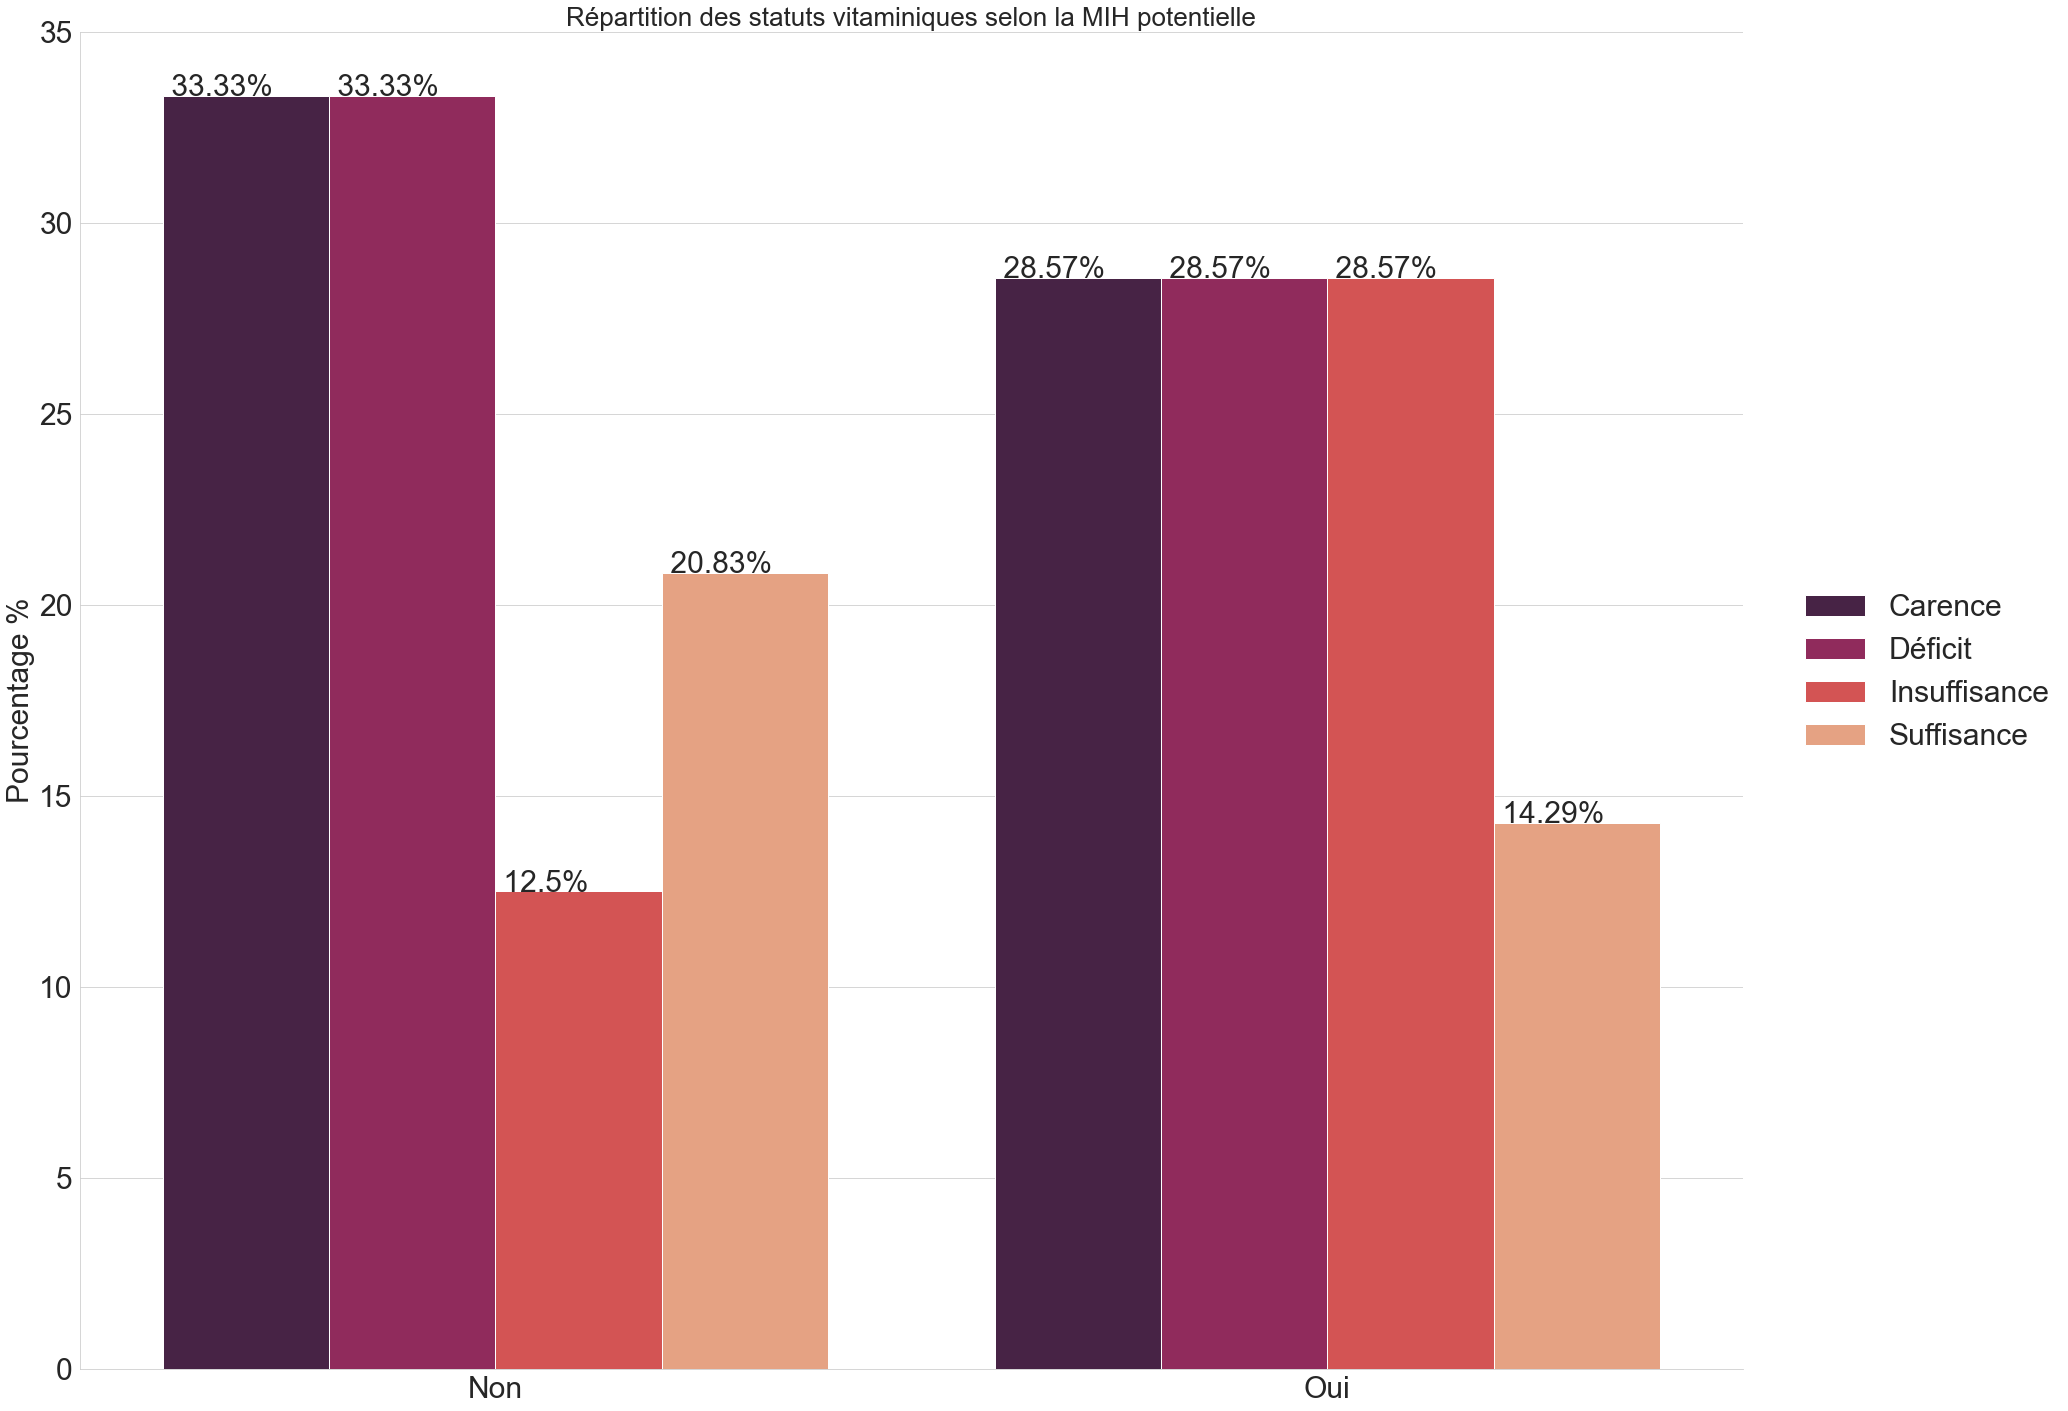

In [104]:
y,x = 'niv_vitD', 'MIHeventuelle'

df1 = df.groupby(x,observed = True)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 30)
b.set_yticklabels(fontsize = 30)

# b.legend.set_title(None)
b.fig.set_size_inches(30,20)


b.set_xlabels("X Label",fontsize=30)
b.set_ylabels("Y Label",fontsize=30)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon la MIH potentielle",fontsize="26")

for p in b.ax.patches:
    txt = " "+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=30)
plt.legend(fontsize='30', title_fontsize='100',bbox_to_anchor=(1.2, 0.6),frameon=False,edgecolor="white")
plt.tight_layout()
plt.savefig('repartition_taux_vit_d_MIH.jpg',transparent=False)
plt.show()

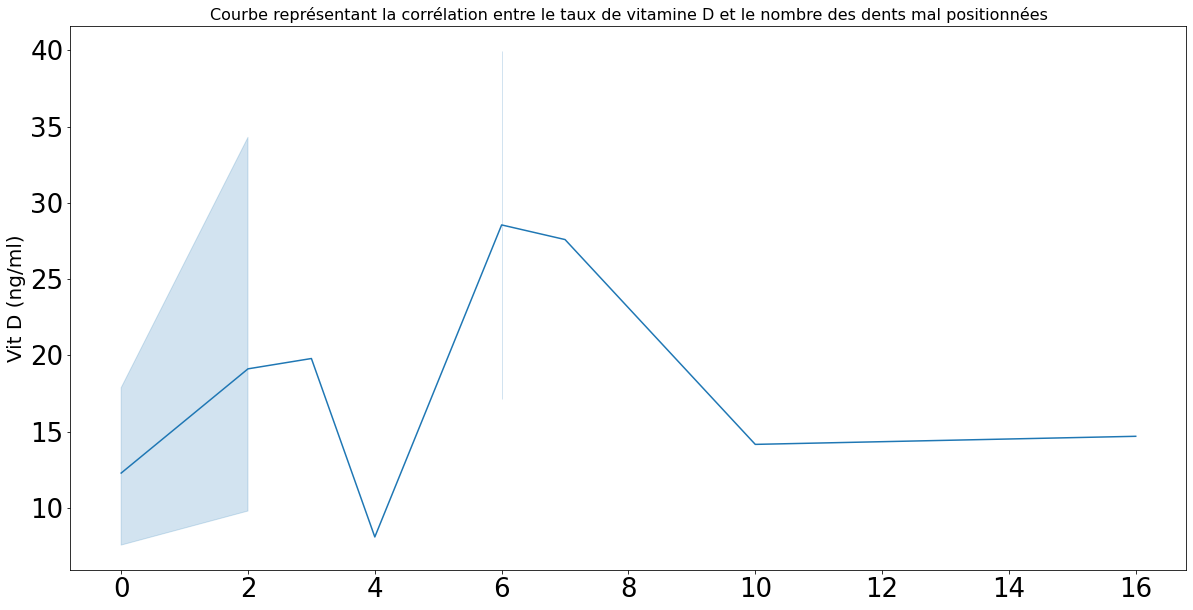

In [196]:
plt.figure(figsize=(20, 10)) 

b=sns.lineplot(data=df, x="Nombrededentsenmalpositions", y="vit_d")

b.set_xlabel("X Label",fontsize=30)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=26)
b.set(xlabel=None)
b.set(ylabel="Vit D (ng/ml)")
b.set_title("Courbe représentant la corrélation entre le taux de vitamine D et le nombre des dents mal positionnées")

plt.savefig('relation_vit_d_malposition.jpeg')

<Figure size 1800x1440 with 0 Axes>

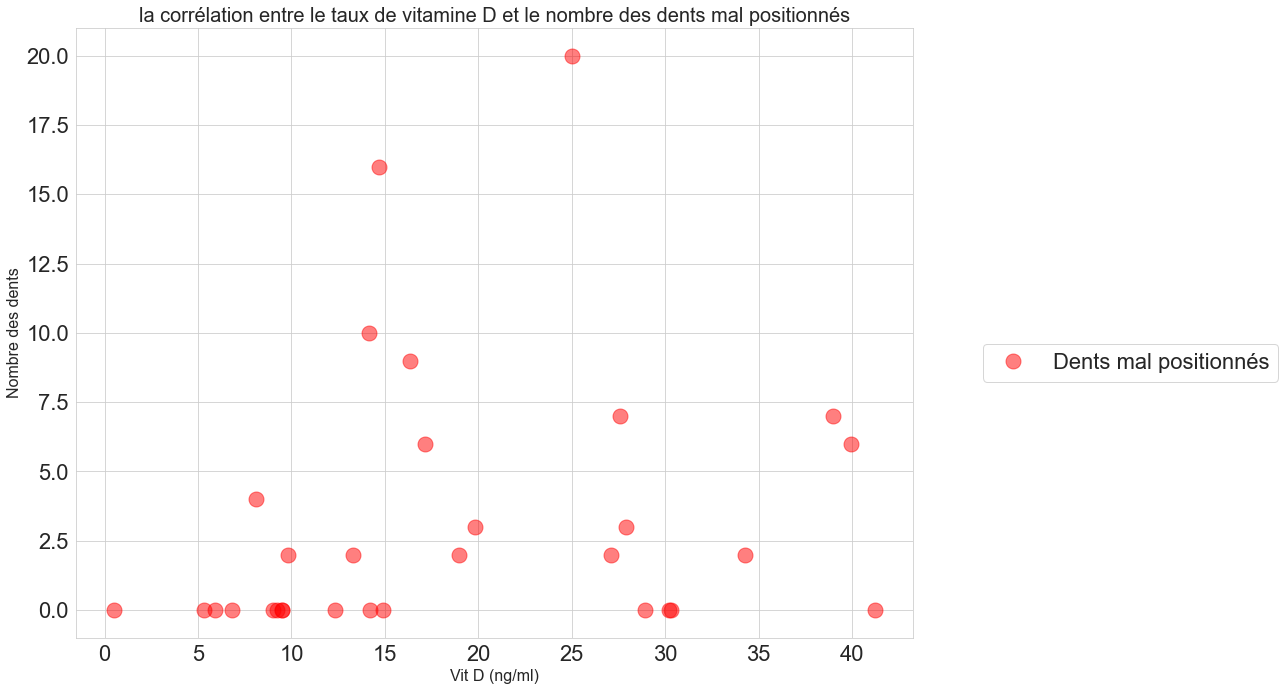

In [83]:
plt.figure(figsize=(25,20)) 

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
df.plot(x="vit_d", y="Nombrededentsenmalpositions", style='o',ms=15,fontsize=22,figsize=(20, 10),alpha=0.5,color='r')
plt.ylabel('Nombre des dents')
plt.xlabel("Vit D (ng/ml)")

plt.legend(bbox_to_anchor=(1.45,0.5),fontsize=22,labels=['Dents mal positionnés'],loc='upper right')

plt.title("la corrélation entre le taux de vitamine D et le nombre des dents mal positionnés",fontsize=20)
plt.tight_layout()
plt.savefig('repartition_taux_vit_d_dent_malpositionés.jpg',transparent=False)

C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


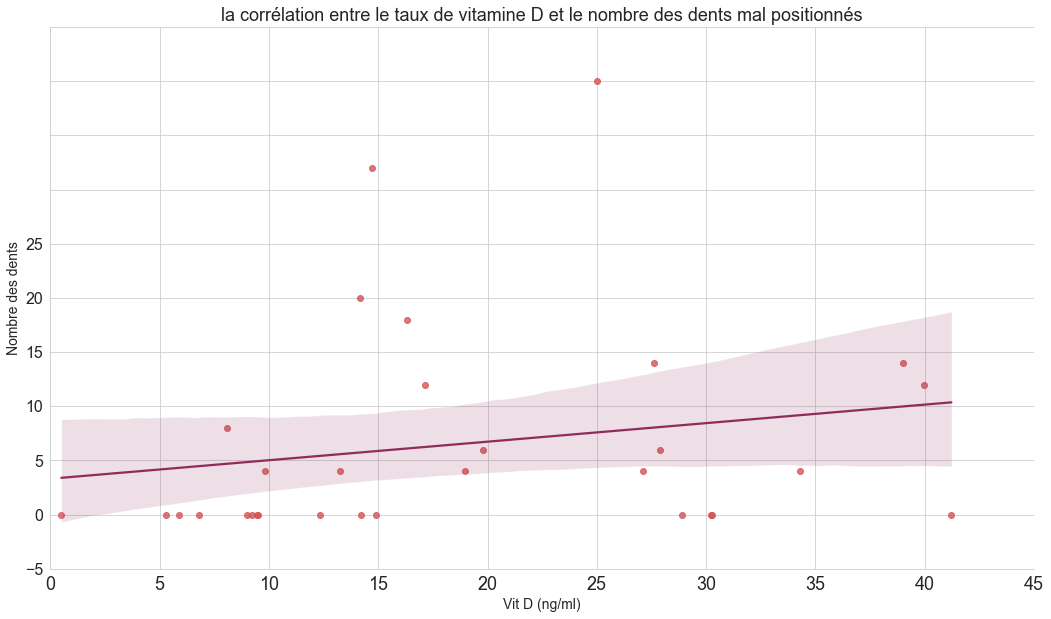

In [84]:
b=sns.lmplot("vit_d","Nombrededentsenmalpositions", df, line_kws={'color': '#912B5B'}, scatter_kws={'color':'#D25455'}, aspect=2)



b.fig.set_size_inches(15,9)

plt.ylabel('Nombre des dents',fontsize=14)
plt.xlabel("Vit D (ng/ml)",fontsize=14)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)


plt.title("la corrélation entre le taux de vitamine D et le nombre des dents mal positionnés",fontsize=18)
plt.tight_layout()
plt.savefig('correlation_taux_vit_d_dent_malpositionés.jpg',transparent=False)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


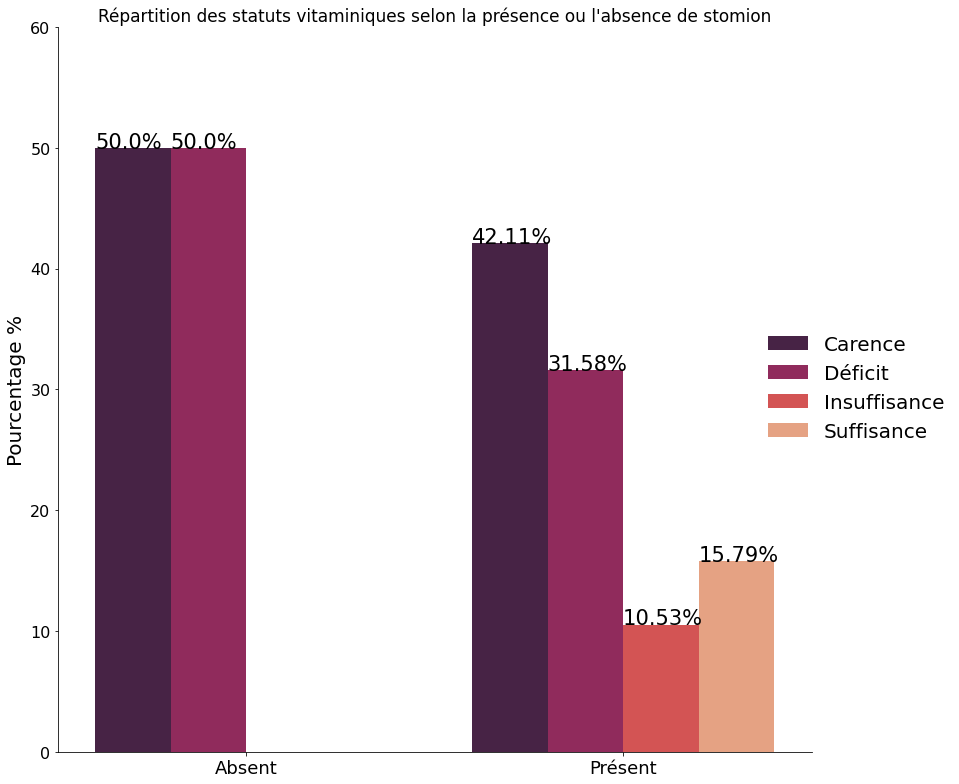

In [231]:
x,y = 'Stomion', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

# b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon la présence ou l'absence de stomion",fontsize="17")

for p in b.ax.patches:
    txt = ""+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=21)
plt.legend(fontsize='20', title_fontsize='80',bbox_to_anchor=(1.2, 0.6),frameon=False)
plt.tight_layout()

plt.savefig('repartition_taux_vit_d_Stomion.jpeg')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


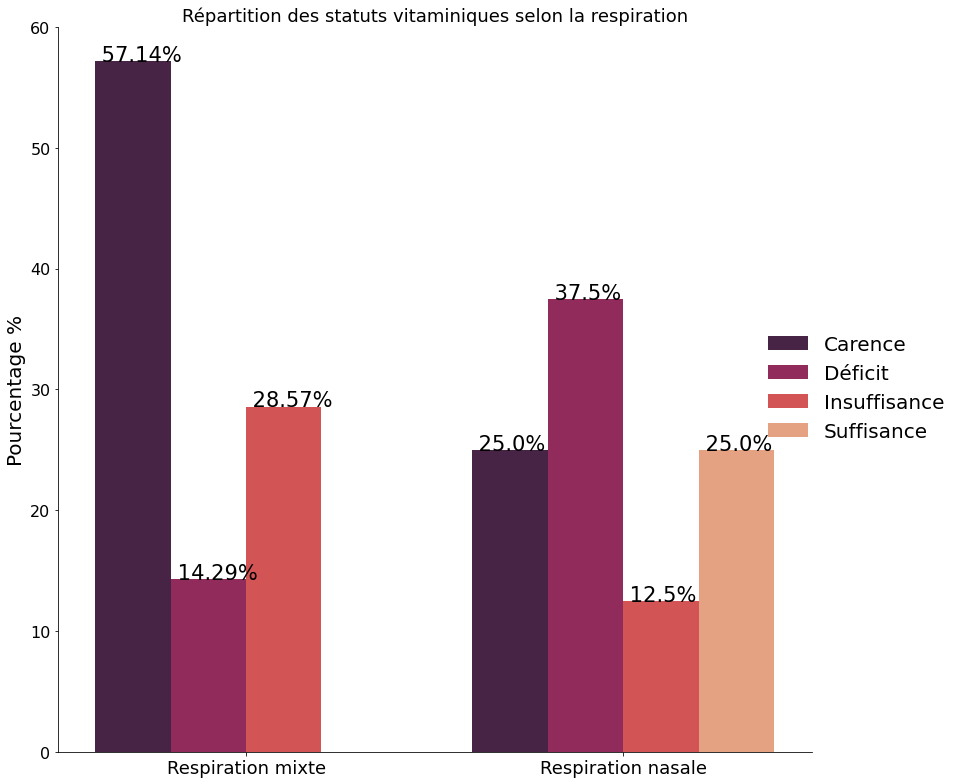

In [16]:
x,y = 'Respiration', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

# b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon la respiration",fontsize="18")

for p in b.ax.patches:
    txt = " "+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=21)
plt.legend(fontsize='20', title_fontsize='80',bbox_to_anchor=(1.2, 0.6),frameon=False)
plt.tight_layout()

plt.savefig('repartition_taux_vit_d_respiration.jpeg')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


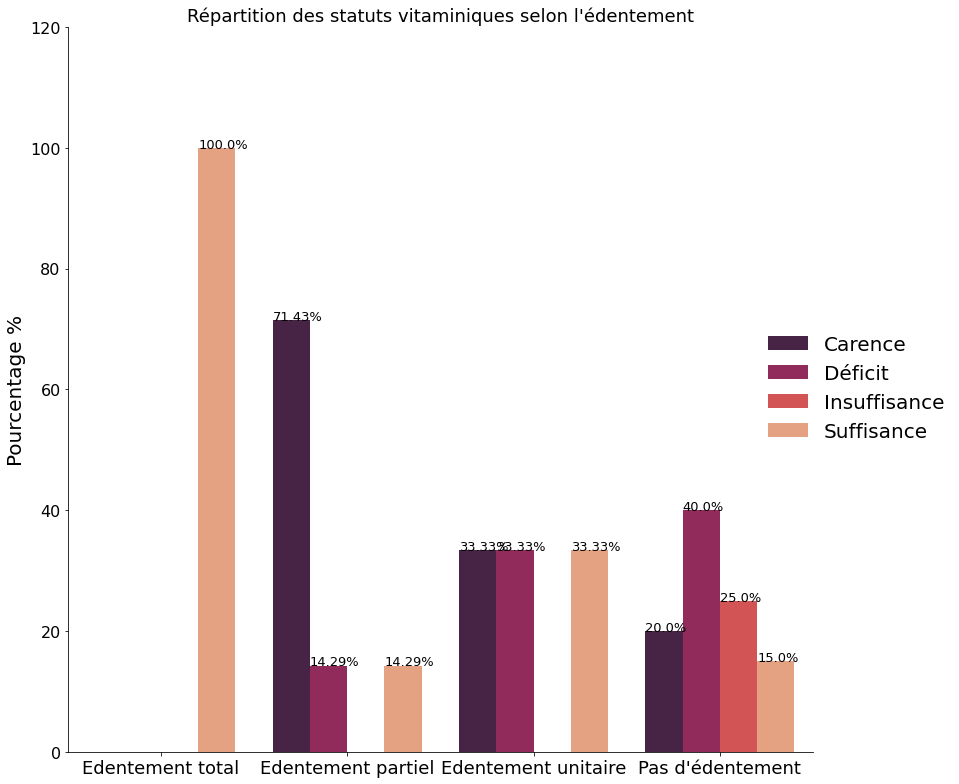

In [27]:
df['category_Edentement'] = pd.Categorical(df['Edentement'], categories=["Edentement total", "Edentement partiel", "Edentement unitaire","Pas d'édentement"], ordered=True)

x,y = 'category_Edentement', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

# b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon l'édentement",fontsize="18")

for p in b.ax.patches:
    txt = ""+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=13)
plt.legend(fontsize='20', title_fontsize='80',bbox_to_anchor=(1.2, 0.6),frameon=False)
plt.tight_layout()

plt.savefig('repartition_taux_vit_d_edentement.jpeg')
plt.show()

In [ ]:
sns.lmplot("vit_d","Nombrededentsenmalpositions", df, line_kws={'color': 'red'}, aspect=2)
plt.ylabel('Nombre des dents')
plt.xlabel("Vit D (ng/ml)")
plt.title("la corrélation entre le taux de vitamine D et le nombre des dents mal positionnés",fontsize=14)
plt.tight_layout()
plt.savefig('correlation_taux_vit_d_dent_malpositionés.jpg',transparent=False)

<Figure size 576x216 with 0 Axes>

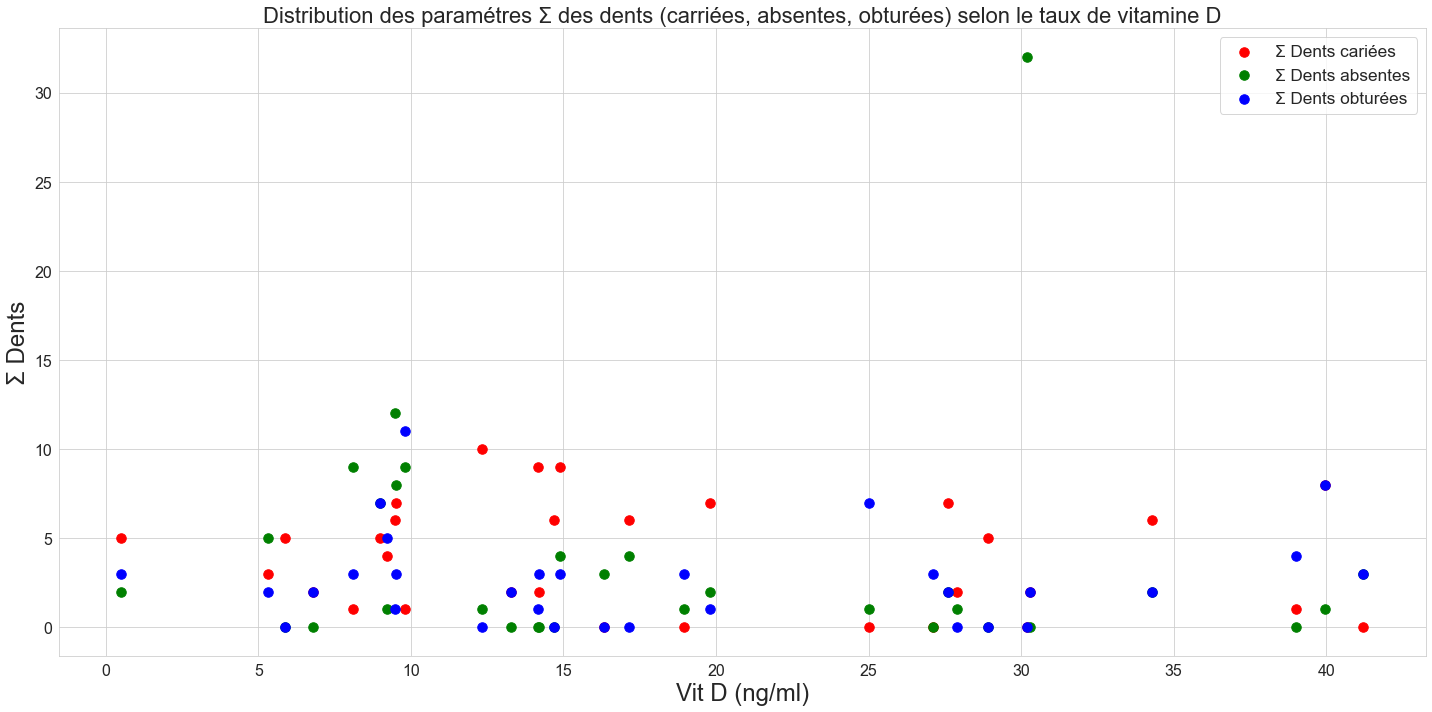

In [101]:
plt.figure(figsize=(3,3)) 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8,3)

ax1 = df.plot(kind='scatter', y='sum_DentsCariées', x='vit_d', color='r',figsize=(20,10),s=90,label="Σ Dents cariées",fontsize=16)   
ax2 = df.plot(kind='scatter', y='sum_Dentsabsentes', x='vit_d', color='g', ax=ax1,figsize=(20,10),s=90,label="Σ Dents absentes")    
ax3 = df.plot(kind='scatter', y='sum_Dentsobturées', x='vit_d', color='b', ax=ax1,figsize=(20,10),s=90,label="Σ Dents obturées")
plt.legend(fontsize=30) # using a size in points
plt.legend(fontsize="xx-large") # using a named size
ax3.set_ylabel('Σ Dents',fontdict={'fontsize':24})
ax3.set_xlabel('Vit D (ng/ml)',fontdict={'fontsize':24})
plt.title("Distribution des paramétres Σ des dents (carriées, absentes, obturées) selon le taux de vitamine D", fontsize=22)
#print(ax1 == ax2 == ax3)  # True
plt.tight_layout()
plt.savefig('distribution_parametres_vit_d.jpg',transparent=False)

C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


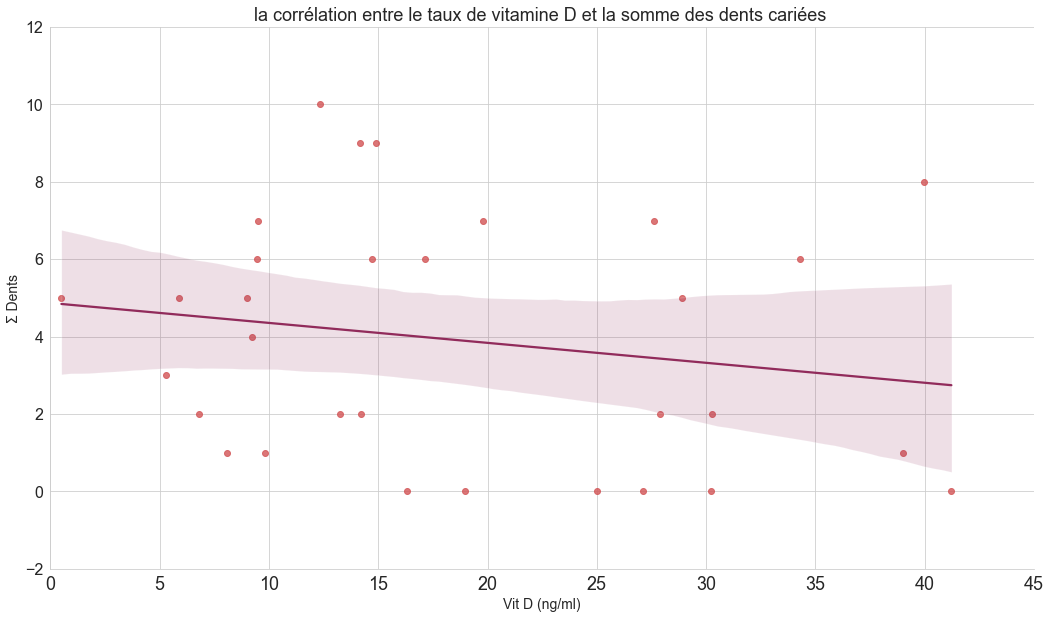

In [85]:
b=sns.lmplot("vit_d","sum_DentsCariées", df, line_kws={'color': '#912B5B'}, scatter_kws={'color':'#D25455'}, aspect=2)
b.fig.set_size_inches(15,9)

plt.ylabel('Σ Dents',fontsize=14)
plt.xlabel("Vit D (ng/ml)",fontsize=14)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)
plt.title("la corrélation entre le taux de vitamine D et la somme des dents cariées ",fontsize=18)
plt.tight_layout()
plt.savefig('correlation_taux_vit_sum_dents_cariée.jpg',transparent=False)

C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


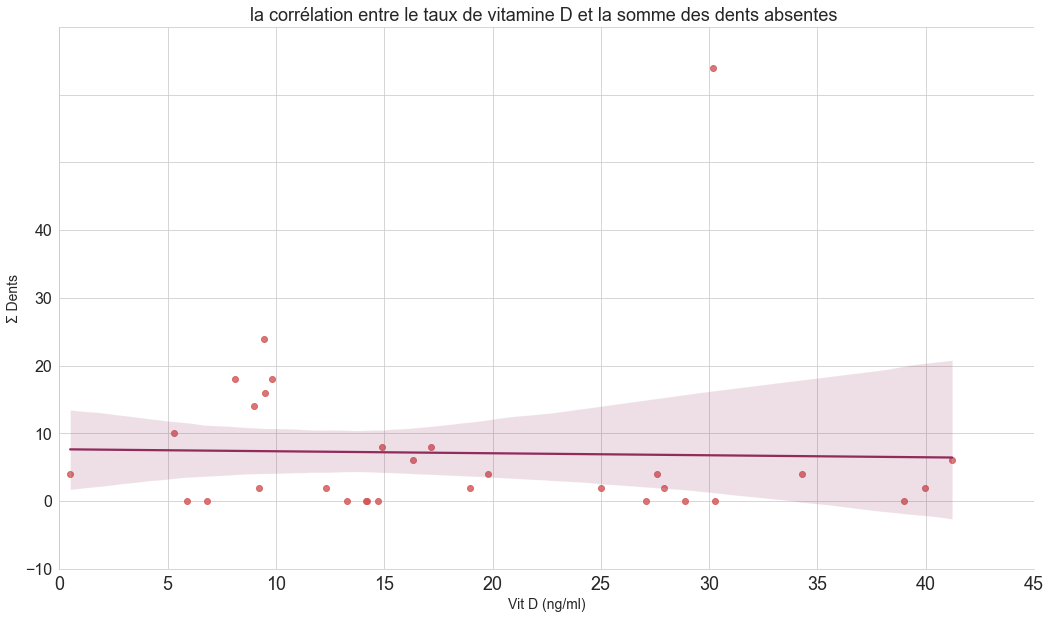

In [86]:
b=sns.lmplot("vit_d","sum_Dentsabsentes", df,line_kws={'color': '#912B5B'}, scatter_kws={'color':'#D25455'}, aspect=2)
b.fig.set_size_inches(15,9)

plt.ylabel('Σ Dents',fontsize=14)
plt.xlabel("Vit D (ng/ml)",fontsize=14)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)
plt.title("la corrélation entre le taux de vitamine D et la somme des dents absentes ",fontsize=18)
plt.tight_layout()
plt.savefig('correlation_taux_vit_sum_dents_absente.jpg',transparent=False)

C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


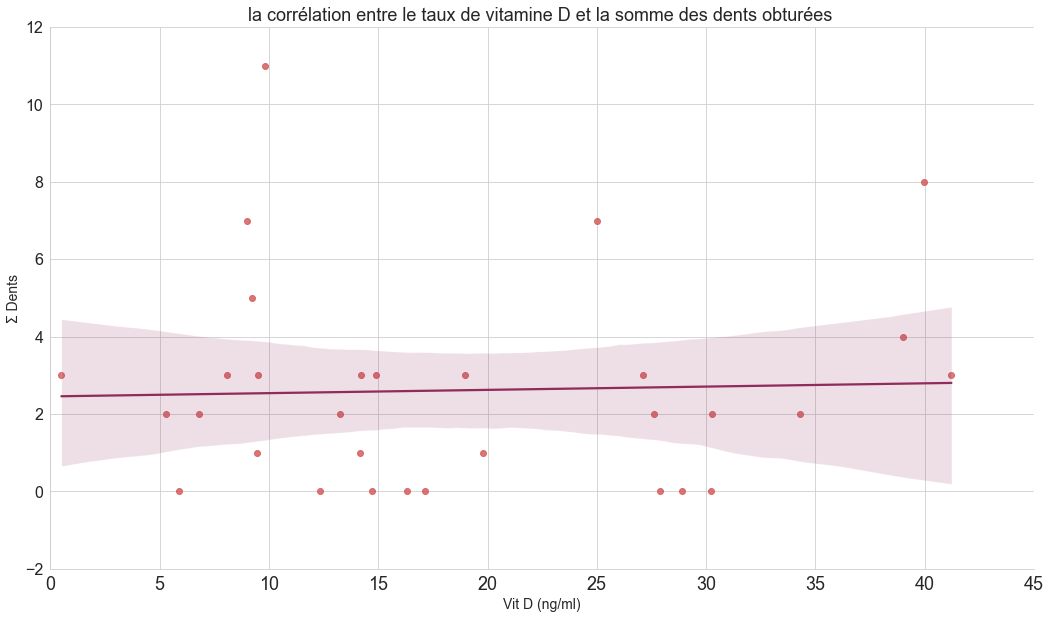

In [87]:

b=sns.lmplot("vit_d","sum_Dentsobturées", df, line_kws={'color': '#912B5B'}, scatter_kws={'color':'#D25455'}, aspect=2)
b.fig.set_size_inches(15,9)

plt.ylabel('Σ Dents',fontsize=14)
plt.xlabel("Vit D (ng/ml)",fontsize=14)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

plt.title("la corrélation entre le taux de vitamine D et la somme des dents obturées ",fontsize=18)

plt.tight_layout()
plt.savefig('correlation_taux_vit_sum_dents_obturée.jpg',transparent=False)

C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


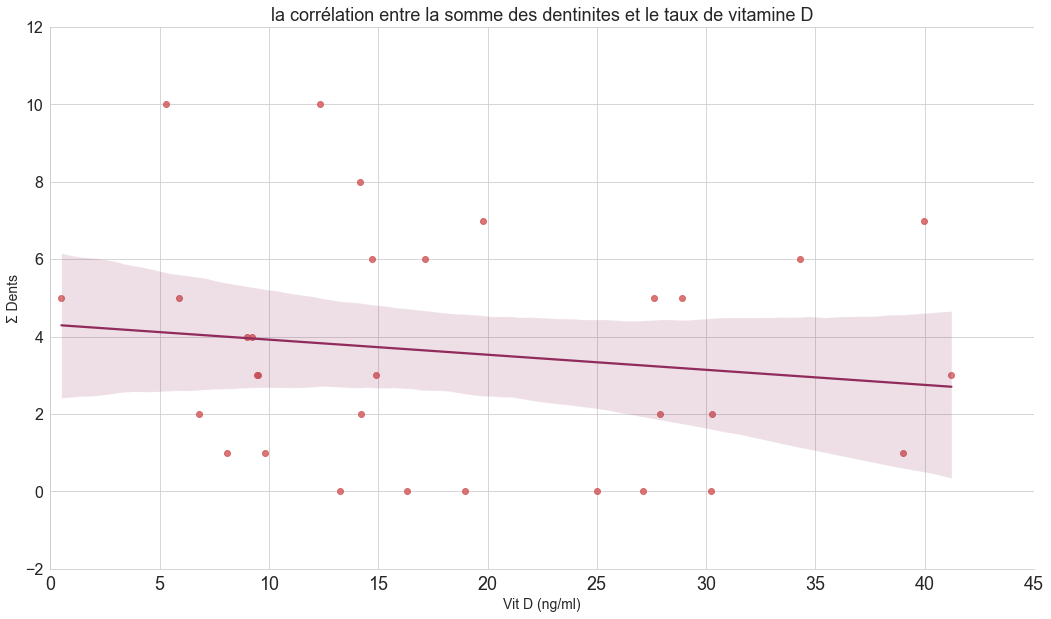

In [88]:

b=sns.lmplot("vit_d","sum_Dentinites", df, line_kws={'color': '#912B5B'}, scatter_kws={'color':'#D25455'}, aspect=2)
b.fig.set_size_inches(15,9)

plt.ylabel('Σ Dents',fontsize=14)
plt.xlabel("Vit D (ng/ml)",fontsize=14)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

plt.title("la corrélation entre la somme des dentinites et le taux de vitamine D",fontsize=18)

plt.tight_layout()
plt.savefig('correlation_taux_vit_sum_dents_dentinite.jpg',transparent=False)

C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


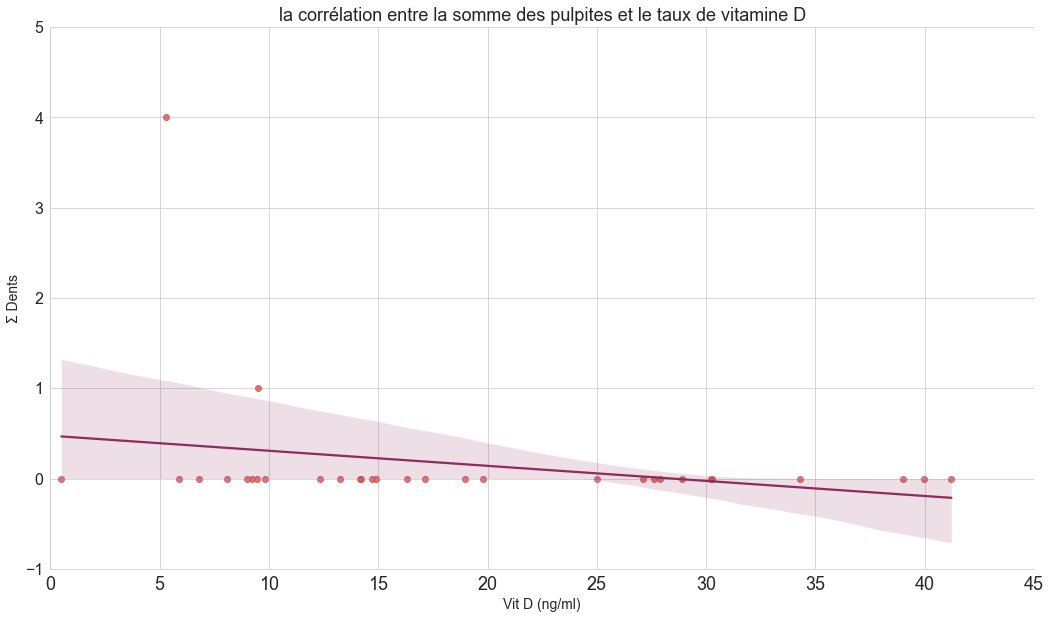

In [89]:

b=sns.lmplot("vit_d","sum_Pulpites", df, line_kws={'color': '#912B5B'}, scatter_kws={'color':'#D25455'}, aspect=2)
b.fig.set_size_inches(15,9)

plt.ylabel('Σ Dents',fontsize=14)
plt.xlabel("Vit D (ng/ml)",fontsize=14)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

plt.title("la corrélation entre la somme des pulpites et le taux de vitamine D",fontsize=18)

plt.tight_layout()
plt.savefig('correlation_taux_vit_sum_dents_pulpites.jpg',transparent=False)

C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


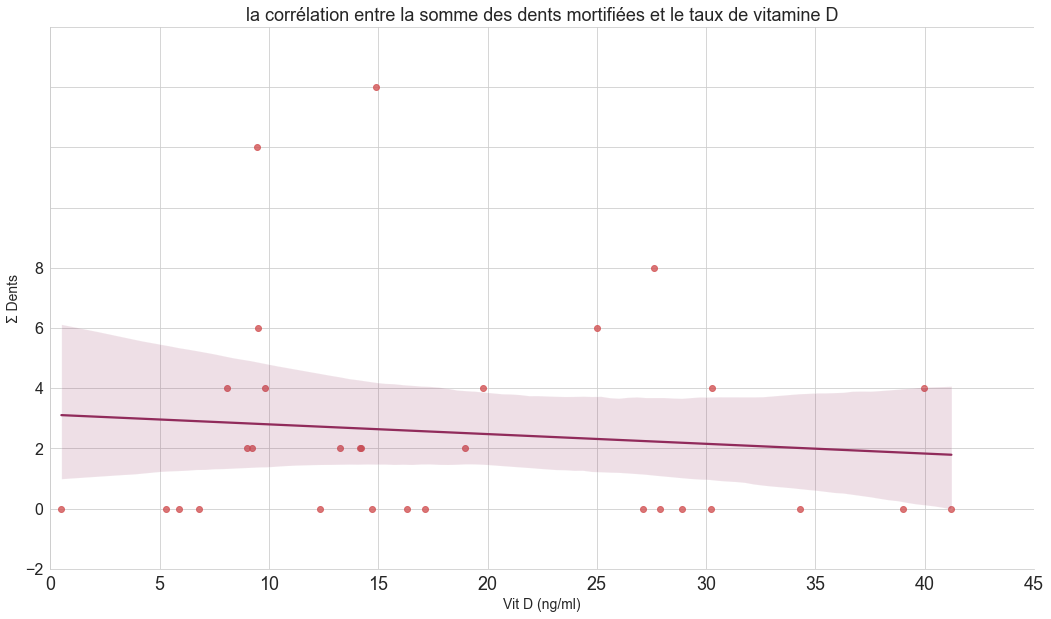

In [90]:

b=sns.lmplot("vit_d","sum_Mortifications", df, line_kws={'color': '#912B5B'}, scatter_kws={'color':'#D25455'}, aspect=2)
b.fig.set_size_inches(15,9)

plt.ylabel('Σ Dents',fontsize=14)
plt.xlabel("Vit D (ng/ml)",fontsize=14)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

plt.title("la corrélation entre la somme des dents mortifiées et le taux de vitamine D",fontsize=18)

plt.tight_layout()
plt.savefig('correlation_taux_vit_sum_dents_mortification.jpg',transparent=False)

C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


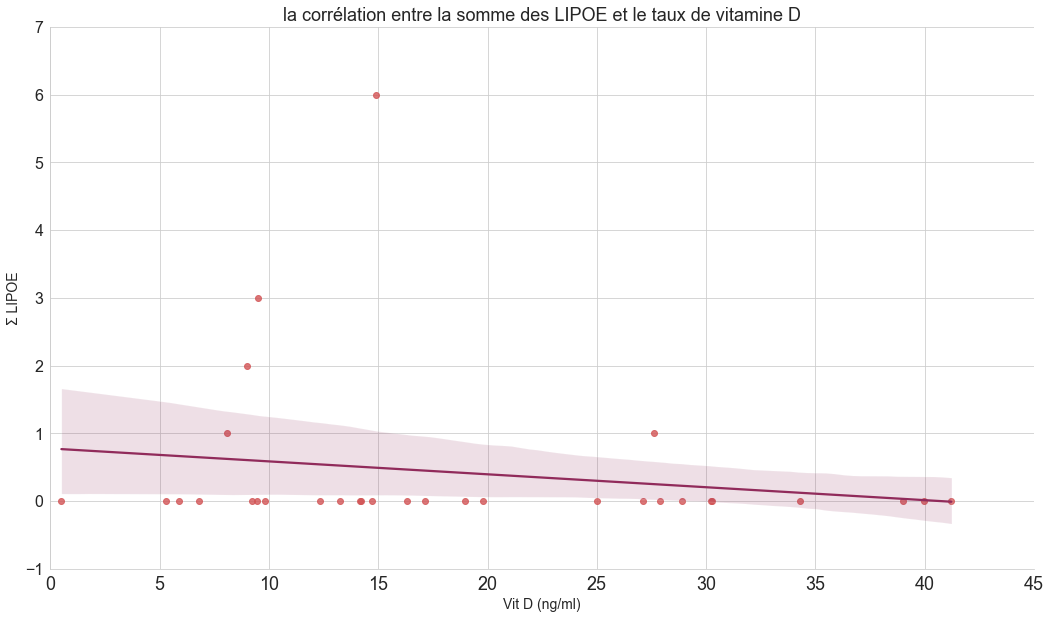

In [91]:

b=sns.lmplot("vit_d","sum_LIPOE", df, line_kws={'color': '#912B5B'}, scatter_kws={'color':'#D25455'}, aspect=2)
b.fig.set_size_inches(15,9)

plt.ylabel('Σ LIPOE',fontsize=14)
plt.xlabel("Vit D (ng/ml)",fontsize=14)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

plt.title("la corrélation entre la somme des LIPOE et le taux de vitamine D",fontsize=18)

plt.tight_layout()
plt.savefig('correlation_taux_vit_sum_lipoe.jpg',transparent=False)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


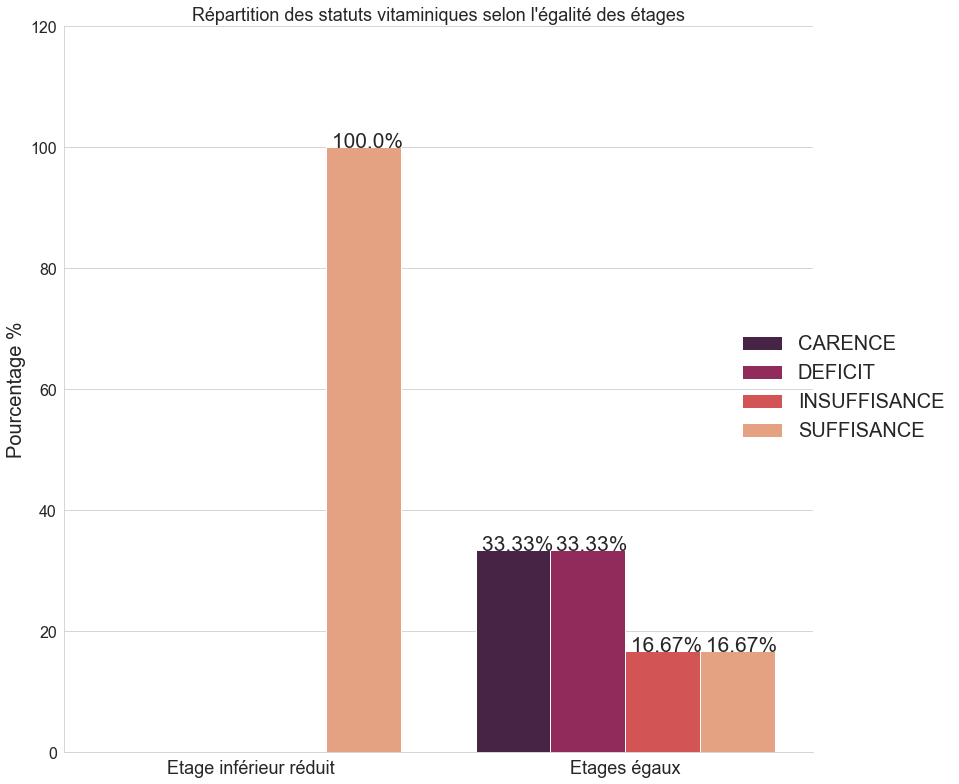

In [96]:
x,y = 'egalite', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

# b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon l'égalité des étages",fontsize="18")

for p in b.ax.patches:
    txt = " "+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=21)
plt.legend(fontsize='20', title_fontsize='80',bbox_to_anchor=(1.2, 0.6),frameon=False)
plt.tight_layout()

plt.savefig('repartition_taux_vit_d_égalité.jpeg')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


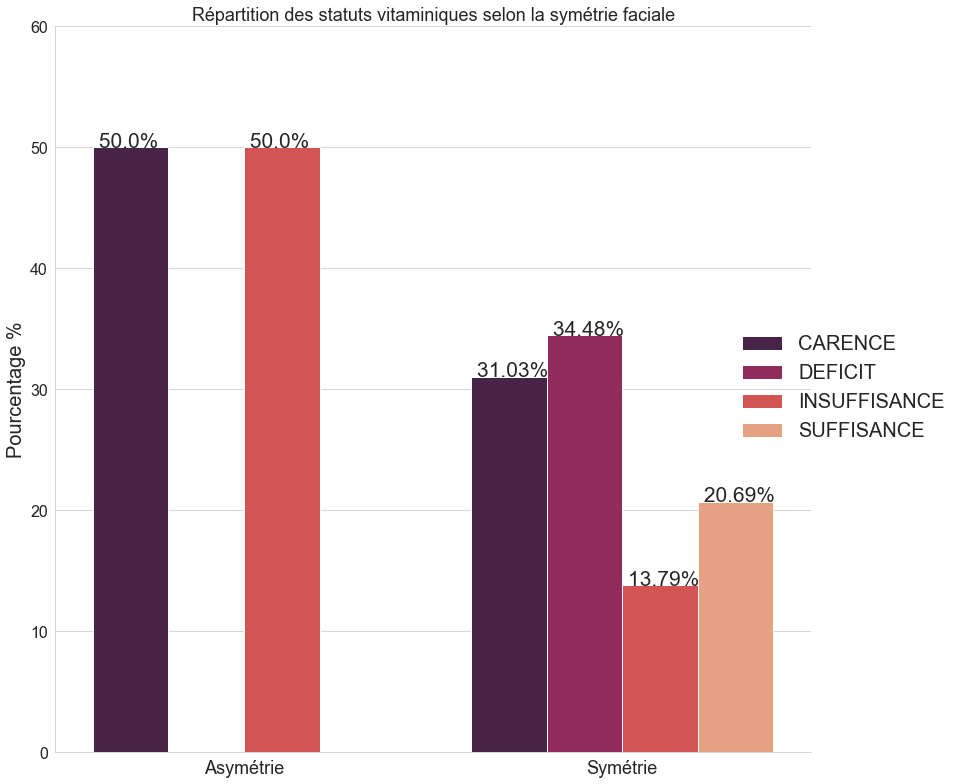

In [97]:
x,y = 'Symétriefaciale', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

# b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon la symétrie faciale",fontsize="18")

for p in b.ax.patches:
    txt = " "+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=21)
plt.legend(fontsize='20', title_fontsize='80',bbox_to_anchor=(1.2, 0.6),frameon=False)
plt.tight_layout()

plt.savefig('repartition_taux_vit_d_symétrie_faciale.jpeg')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


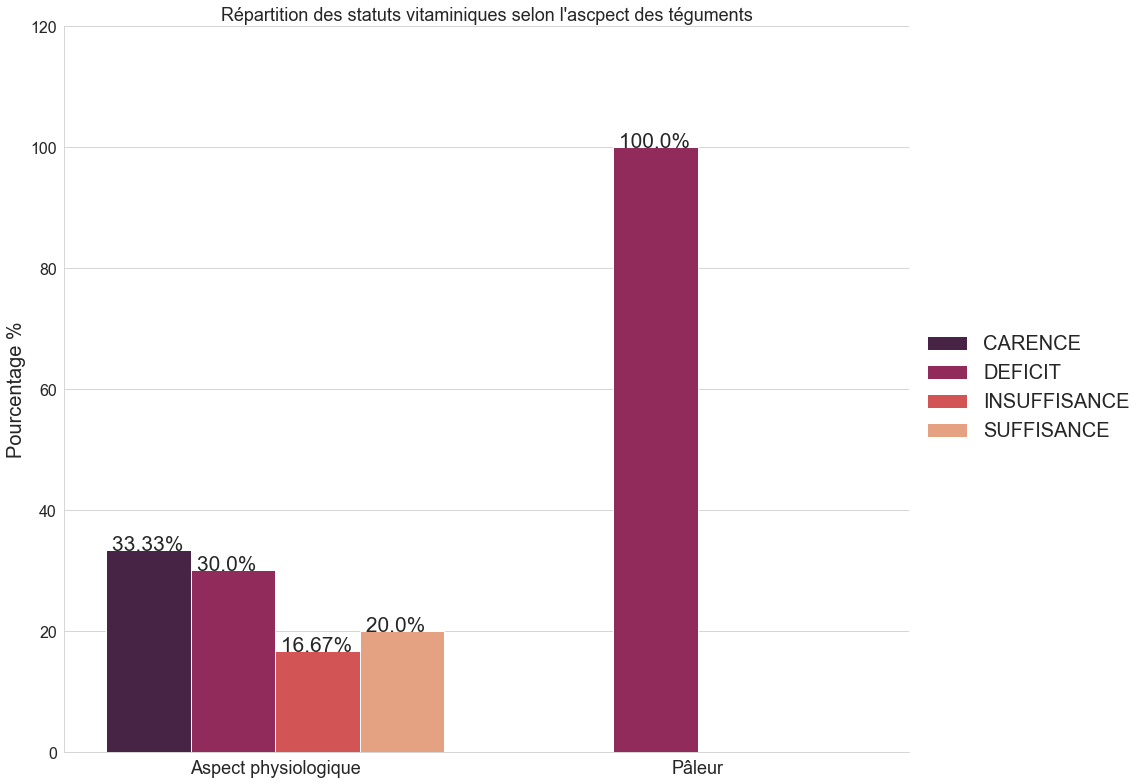

In [103]:
x,y = 'Aspectdestéguments', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

# b.legend.set_title(None)
b.fig.set_size_inches(16,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon l'ascpect des téguments",fontsize="18")

for p in b.ax.patches:
    txt = " "+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=21)
plt.legend(fontsize='20', title_fontsize='80',bbox_to_anchor=(1, 0.6),frameon=False)
plt.tight_layout()

plt.savefig('repartition_taux_vit_d_Aspectdestéguments.jpeg')
plt.show()

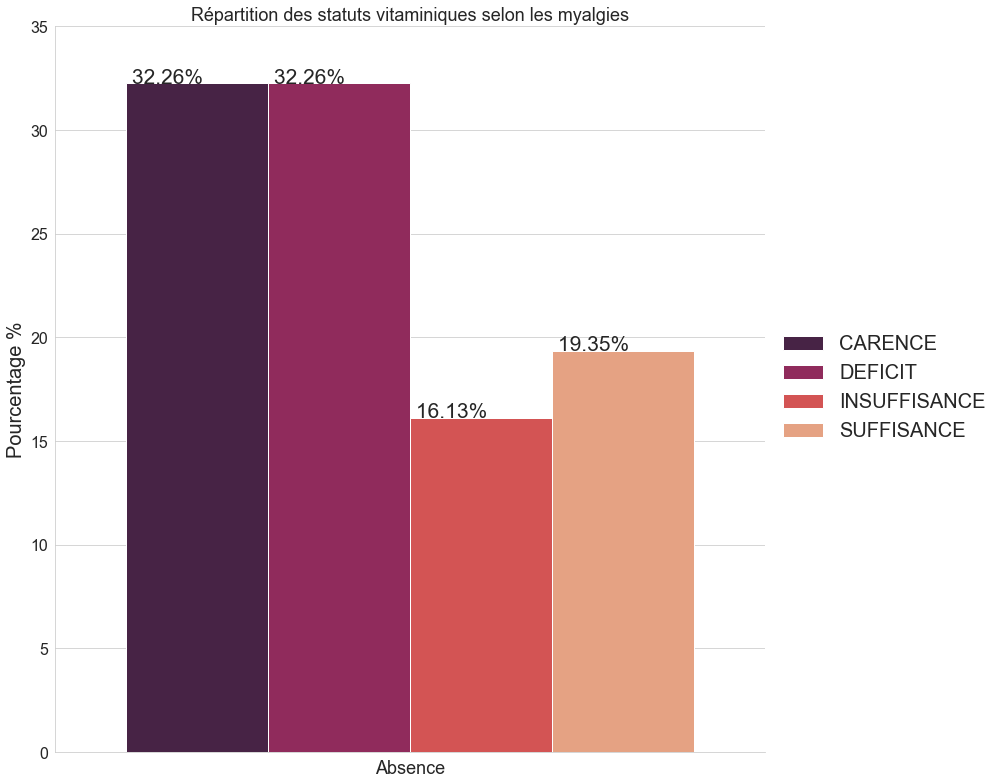

In [105]:
x,y = 'Myalgies', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

# b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon les myalgies",fontsize="18")

for p in b.ax.patches:
    txt = " "+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=21)
plt.legend(fontsize='20', title_fontsize='80',bbox_to_anchor=(1, 0.6),frameon=False)
plt.tight_layout()

plt.savefig('repartition_taux_vit_d_myalgies.jpeg')
plt.show()

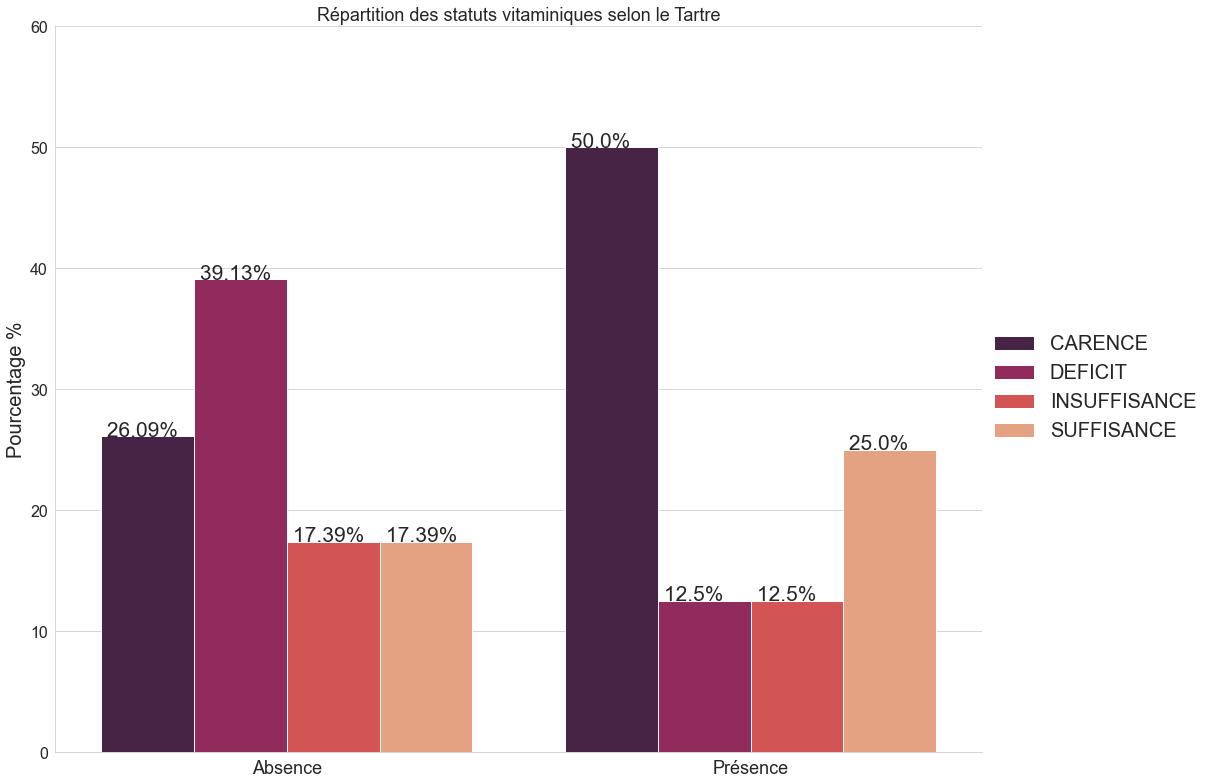

In [116]:
x,y = 'Tartre', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

# b.legend.set_title(None)
b.fig.set_size_inches(18,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon le Tartre",fontsize="18")

for p in b.ax.patches:
    txt = " "+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=21)
plt.legend(fontsize='20', title_fontsize='80',bbox_to_anchor=(1.25, 0.6),frameon=False)
plt.tight_layout()

plt.savefig('repartition_taux_vit_d_tartre.jpeg')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


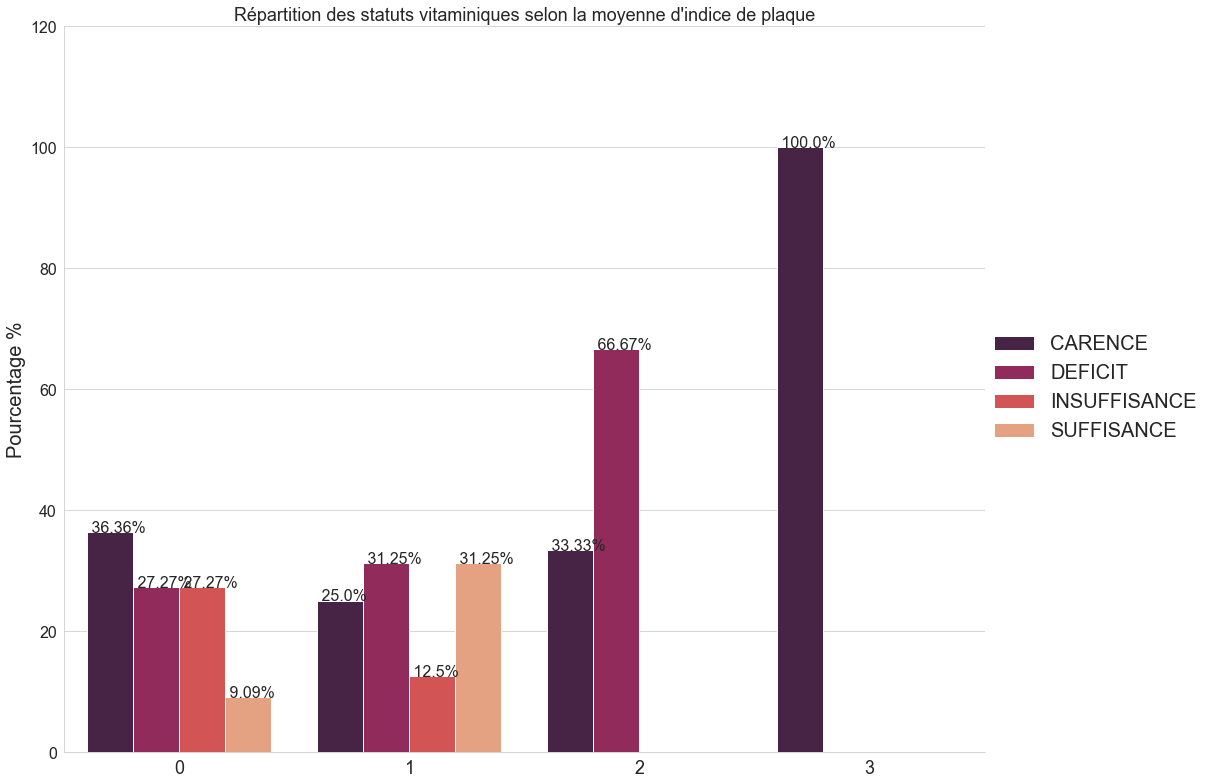

In [123]:

x,y = 'Moyennedeindicedeplaque', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

# b.legend.set_title(None)
b.fig.set_size_inches(18,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon la moyenne d'indice de plaque",fontsize="18")

for p in b.ax.patches:
    txt = " "+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=16)
plt.legend(fontsize='20', title_fontsize='80',bbox_to_anchor=(1.25, 0.6),frameon=False)
plt.tight_layout()

plt.savefig('repartition_taux_vit_d_Moyennedeindicedeplaque.jpeg')
plt.show()

1
1
0
1


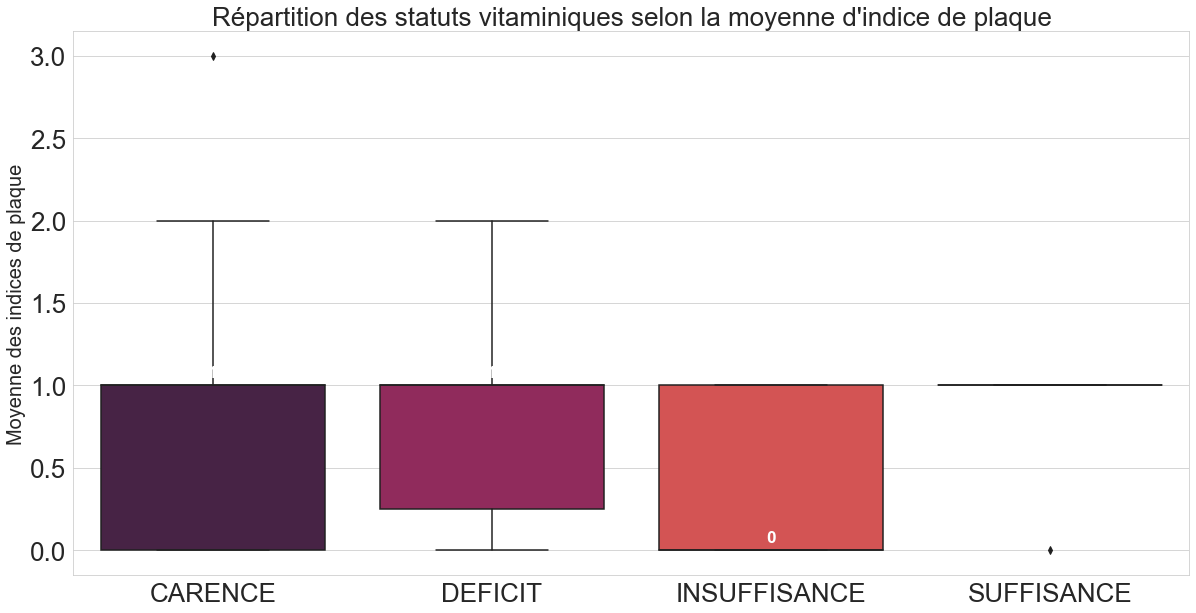

In [119]:
boxplot_multiv("Moyennedeindicedeplaque","niv_vitD","","Moyenne des indices de plaque","Repartition_taux_vit_d_MoyennedeindicedeplaqueC","Répartition des statuts vitaminiques selon la moyenne d'indice de plaque")

C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


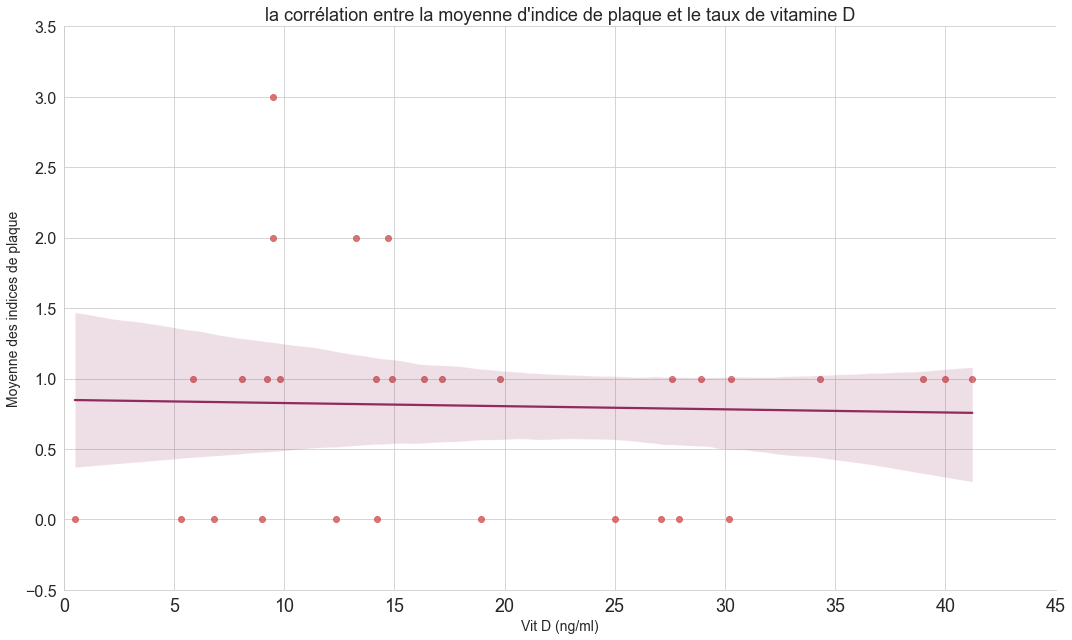

In [122]:

b=sns.lmplot("vit_d","Moyennedeindicedeplaque", df, line_kws={'color': '#912B5B'}, scatter_kws={'color':'#D25455'}, aspect=2)
b.fig.set_size_inches(15,9)

plt.ylabel('Moyenne des indices de plaque',fontsize=14)
plt.xlabel("Vit D (ng/ml)",fontsize=14)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

plt.title("la corrélation entre la moyenne d'indice de plaque et le taux de vitamine D",fontsize=18)

plt.tight_layout()
plt.savefig('correlation_Repartition_taux_vit_d_MoyennedeindicedeplaqueC.jpg',transparent=False)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


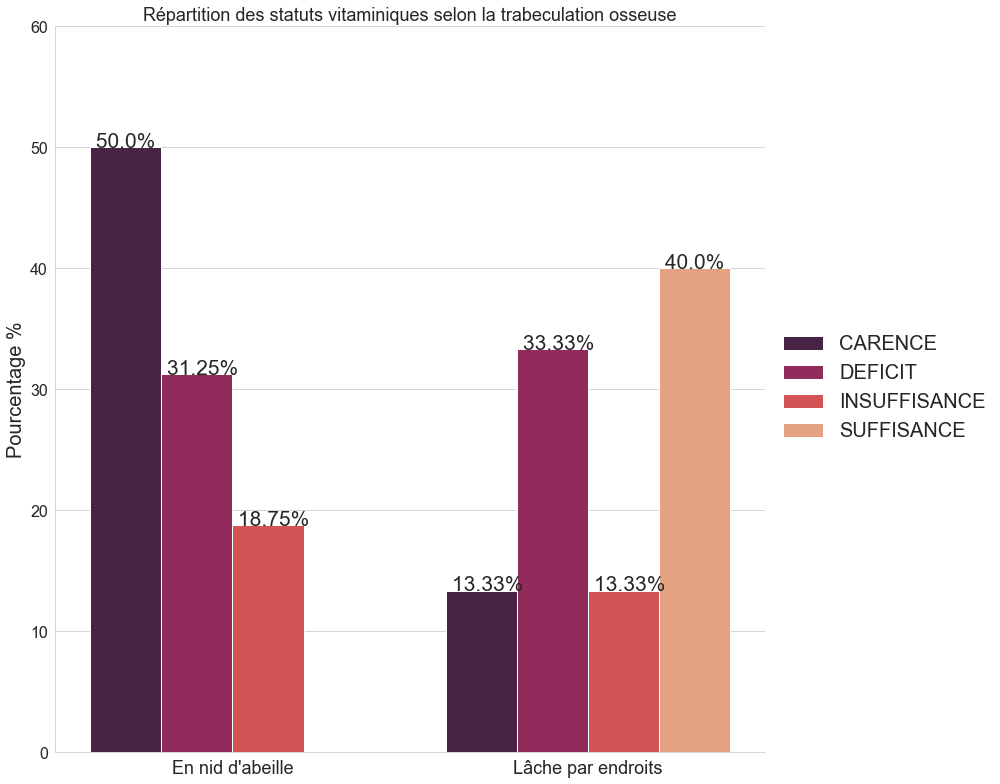

In [126]:

x,y = 'Trabeculationosseuse_densité', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

# b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon la trabeculation osseuse",fontsize="18")

for p in b.ax.patches:
    txt = " "+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=21)
plt.legend(fontsize='20', title_fontsize='80',bbox_to_anchor=(1, 0.6),frameon=False)
plt.tight_layout()

plt.savefig('repartition_taux_vit_d_Trabeculationosseuse_densité.jpeg')
plt.show()

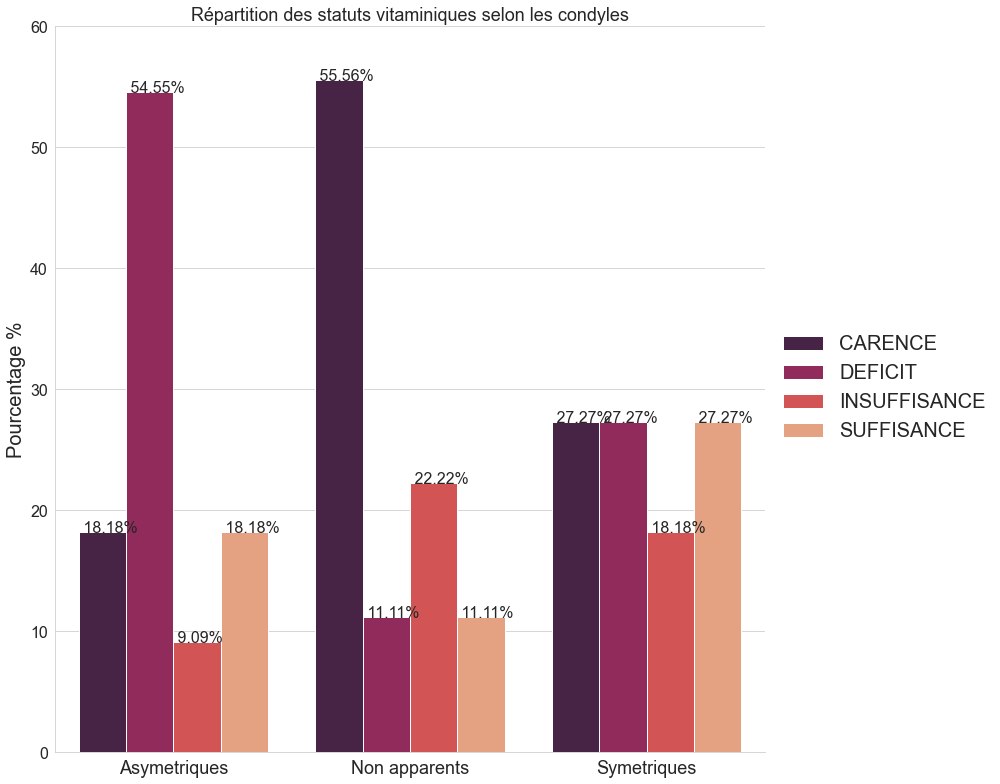

In [131]:

x,y = 'Condyles', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

# b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon les condyles",fontsize="18")

for p in b.ax.patches:
    txt = " "+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=16)
plt.legend(fontsize='20', title_fontsize='80',bbox_to_anchor=(1, 0.6),frameon=False)
plt.tight_layout()

plt.savefig('repartition_taux_vit_d_Condyles.jpeg')
plt.show()

C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


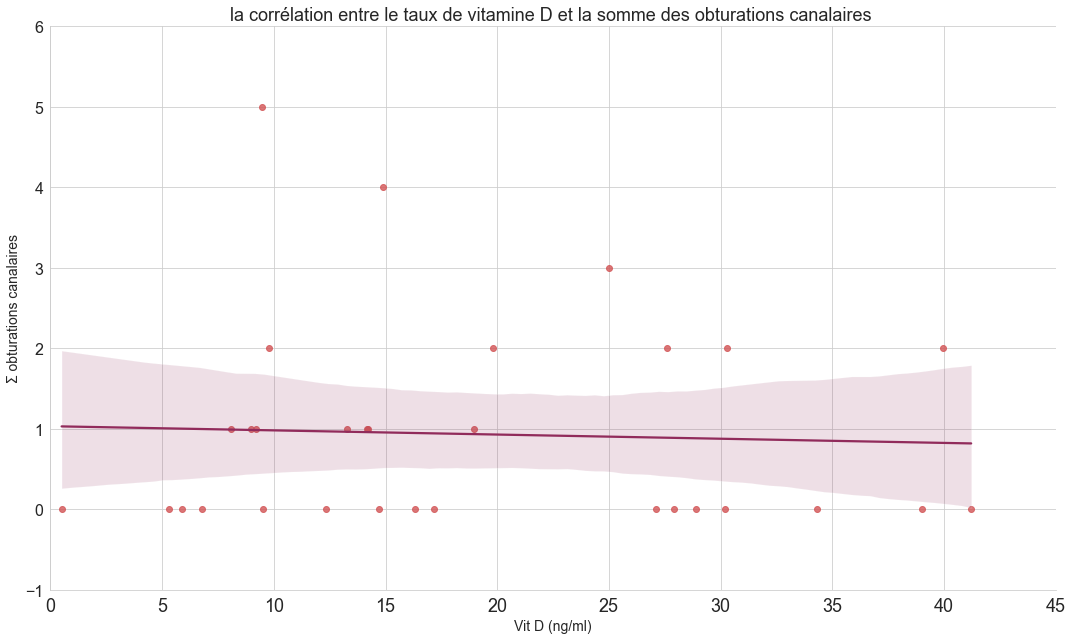

In [132]:
b=sns.lmplot("vit_d","sum_Obturationscanalaires", df, line_kws={'color': '#912B5B'}, scatter_kws={'color':'#D25455'}, aspect=2)
b.fig.set_size_inches(15,9)

plt.ylabel('Σ obturations canalaires',fontsize=14)
plt.xlabel("Vit D (ng/ml)",fontsize=14)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)
plt.title("la corrélation entre le taux de vitamine D et la somme des obturations canalaires ",fontsize=18)
plt.tight_layout()
plt.savefig('correlation_taux_vit_sum_Obturationscanalaires.jpg',transparent=False)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


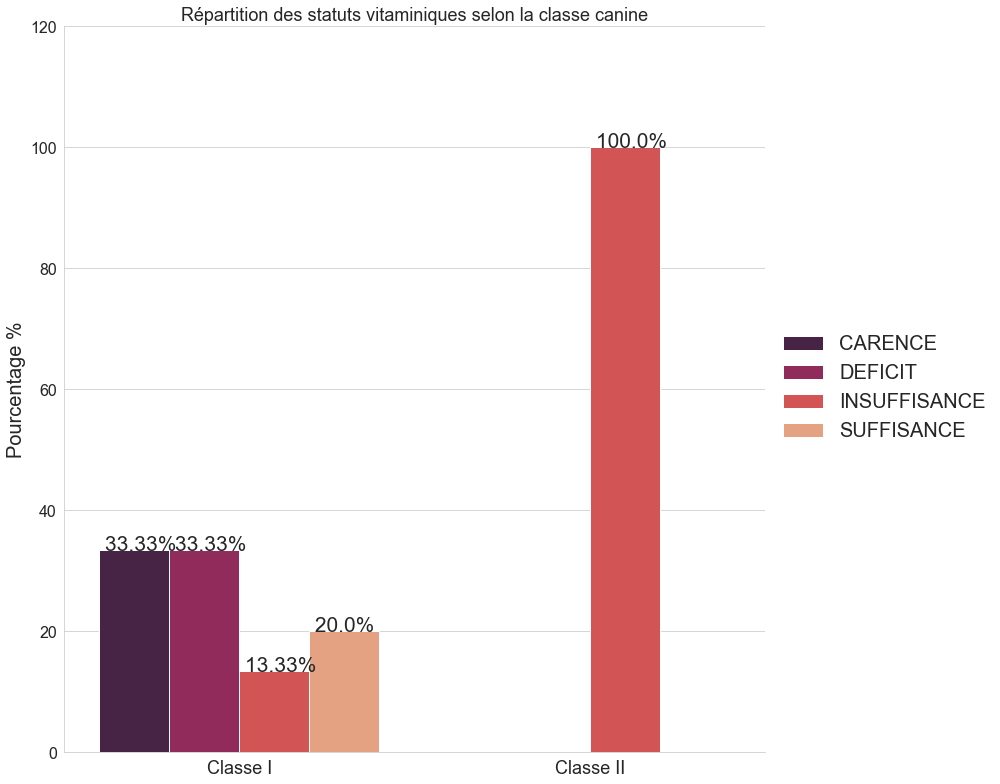

In [134]:
x,y = 'Classecanine', 'niv_vitD'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
b = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=8, aspect=1.5,palette="rocket",legend= False)
#b.ax.set_ylim(0,100)
b.set_xticklabels(fontsize = 18)
b.set_yticklabels(fontsize = 16)

# b.legend.set_title(None)
b.fig.set_size_inches(14,11)


b.set_xlabels("X Label",fontsize=15)
b.set_ylabels("Y Label",fontsize=20)
b.set_titles("La relation entre le taux de Vitamine D et l'édentement")
b.set(xlabel=None)
b.set(xlabel=None)
b.set(ylabel="Pourcentage %")

b.ax.set_title("Répartition des statuts vitaminiques selon la classe canine",fontsize="18")

for p in b.ax.patches:
    txt = " "+str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    b.ax.text(txt_x,txt_y,txt,fontsize=21)
plt.legend(fontsize='20', title_fontsize='80',bbox_to_anchor=(1, 0.6),frameon=False)
plt.tight_layout()

plt.savefig('repartition_taux_vit_d_Classecanine.jpeg')
plt.show()

In [12]:
df.head(5)

vit_d  age     Sexe   IMC residence              vestimentaire  \
0   5.88   27  Féminin  25.0    Annaba        Vêtements couvrants   
1  18.95   25  Féminin  21.0    Annaba  Vêtements moins couvrants   
2  39.97   62  Féminin  25.0    Annaba        Vêtements couvrants   
3   9.00   27  Féminin  20.0    Annaba        Vêtements couvrants   
4  30.20   67  Féminin  21.7    Annaba        Vêtements couvrants   

             profession                                       medication  \
0  Activité d'intérieur                                     Antibiotique   
1  Activité d'intérieur                                           Aucune   
2      Ne travaille pas                             Hormone thyroidienne   
3  Activité d'intérieur  Hormone thyroidienne+Collyre+Anti-inflammatoire   
4      Ne travaille pas                               Anti-inflammatoire   

   enfants                                antecedents  ... Minutage Adjuvants  \
0        0                   Cardiaque+dermatologique  ...        3       Non   
1        0                    Ophtalmologique+Osseuse  ...        3       Non   
2        4                              Endocrinienne  ...        1       Non   
3        0  Auto-immune+Endocrinienne+Ophtalmologique  ...        5       Non   
4        4                                Auto-immune  ...        2       Non   

  Atcdstomfam percentage_dents atteintes_lyse   \
0       Aucun                                0   
1       Aucun                                0   
2       Aucun                               60   
3       Aucun                                0   
4       Aucun                                0   

  percentage_dents_atteintes_lyse_superficielle  \
0                                             0   
1                                             0   
2                                            30   
3                                             0   
4                                             0   

  percentage_dents_atteintes_lyse modérée  \
0                                       0   
1                                       0   
2                                      30   
3                                       0   
4                                       0   

  percentage_dents_atteintes_lyse sévère   agerange    niv_vitD  \
0                                      0  18-30 ans     CARENCE   
1                                      0  18-30 ans     DEFICIT   
2                                      0  60-69 ans  SUFFISANCE   
3                                      0  18-30 ans     CARENCE   
4                                      0  60-69 ans  SUFFISANCE   

             imc_type  
0  Corpulence normale  
1  Corpulence normale  
2  Corpulence normale  
3  Corpulence normale  
4  Corpulence normale  

[5 rows x 74 columns]

In [21]:
def display_mean(parametre):
    
    moyenne="{:.2f}".format(df[parametre].mean(axis = 0))
    ecart="{:.2f}".format(df[parametre].std())
    print(parametre+' '+str(moyenne)+ ' ± '+ str(ecart))

In [26]:
display_mean('age')
display_mean('vit_d')
display_mean('CAO')


age 31.52 ± 13.63
vit_d 18.74 ± 11.21
CAO 9.74 ± 6.96


In [27]:
df.columns

Index(['vit_d', 'age', 'Sexe', 'IMC', 'residence', 'vestimentaire',
       'profession', 'medication', 'enfants', 'antecedents', 'suivi',
       'Passémédicalfamilial', 'halitose', 'egalite', 'Symétriefaciale',
       'Aspectdestéguments', 'Adénopathies', 'Anomaliesdestissusmous',
       'Gnatosonies', 'Arthralgies', 'Myalgies', 'Saignement', 'Récession',
       'Récession_valeurmaximale_mm', 'Tartre', 'Moyennedeindicedeplaque',
       'Dernièrevisitechezledentiste', 'Trabeculationosseuse_densité',
       'sum_degrédelyse',
       'pourcentage_desdentsatteintesdelyseosseusesuperficielle',
       'pourcentage_desdentsatteintesdelyseosseusemodérée',
       'pourcentage_desdentsatteintesdelyseosseusesévère', 'Condyles',
       'Diagnostic_parodontal', 'Atteintesdefurcation',
       'Fracturesdesmaxillaires', 'sum_DentsCariées', 'sum_Dentsabsentes',
       'sum_Dentsobturées', 'CAO', 'sum_Dentinites', 'sum_Pulpites',
       'sum_Mortifications', 'sum_Obturationscanalaires', 'sum_LIPOE',
  

In [31]:
list_parm=['vit_d', 'age',  'IMC','CAO','sum_DentsCariées','sum_Dentinites','sum_Pulpites','sum_Dentsabsentes','sum_Mortifications','sum_LIPOE','Récession','Récession_valeurmaximale_mm','Nombrededentsenmalpositions','percentage_dents atteintes_lyse ']

In [32]:
for i in list_parm:
    display_mean(i)


vit_d 18.74 ± 11.21
age 31.52 ± 13.63
IMC 23.14 ± 4.93
CAO 9.74 ± 6.96
sum_DentsCariées 3.90 ± 3.12
sum_Dentinites 3.58 ± 2.94
sum_Pulpites 0.16 ± 0.73
sum_Dentsabsentes 3.55 ± 6.19
sum_Mortifications 1.26 ± 1.79
sum_LIPOE 0.42 ± 1.23
Récession 1.23 ± 2.46
Récession_valeurmaximale_mm 0.87 ± 1.67
Nombrededentsenmalpositions 3.26 ± 4.94
percentage_dents atteintes_lyse  7.58 ± 18.56


In [52]:
def display_counts(parametre): 
    print((df[parametre].value_counts(normalize=True) * 100).to_string())

In [65]:
list_parm=['niv_vitD',
       'imc_type','Sexe','agerange','vestimentaire','profession','enfants','halitose','egalite','Symétriefaciale','Aspectdestéguments', 'Adénopathies', 'Anomaliesdestissusmous',
       'Gnatosonies', 'Arthralgies', 'Myalgies', 'Saignement', 'Tartre', 
       'Dernièrevisitechezledentiste', 'Trabeculationosseuse_densité','Condyles',
       'Diagnostic_parodontal', 'Atteintesdefurcation',
       'Fracturesdesmaxillaires','Classecanine',
       'Stomion', 'Mastication', 'Déglutition', 'Respiration', 'Phonation',
       'Edentement', 'Chirurgiesantérieures',
        'Tabac', 'Trtantérieur_Détartrage', 'Trtantérieur_ODF', 'HygièneBuccoDentaire',
       'Brossage', 'Brosseàdent', 'Fréquence', 'Technique',
        'Atcdstomfam']


In [67]:
for i in list_parm:
    print(i)
    print('---------------')
    display_counts(i)
    print('\n')

niv_vitD
---------------
CARENCE         32.258065
DEFICIT         32.258065
SUFFISANCE      19.354839
INSUFFISANCE    16.129032


imc_type
---------------
Corpulence normale    54.838710
Maigreur              19.354839
Surpoids              19.354839
Obésité sévére         6.451613


Sexe
---------------
Féminin     80.645161
Masculin    19.354839


agerange
---------------
18-30 ans    58.064516
31-39 ans    12.903226
41-49 ans    12.903226
60-69 ans     9.677419
< 18 ans      6.451613


vestimentaire
---------------
Vêtements moins couvrants    51.612903
Vêtements couvrants          48.387097


profession
---------------
Activité d'intérieur    83.870968
Ne travaille pas        16.129032


enfants
---------------
0    67.741935
3    12.903226
1     9.677419
4     6.451613
2     3.225806


halitose
---------------
Absente     83.870968
Présente    16.129032


egalite
---------------
Etages égaux              96.774194
Etage inférieur réduit     3.225806


Symétriefaciale
------------

21.08
15.51
17.35
9.64
30.2


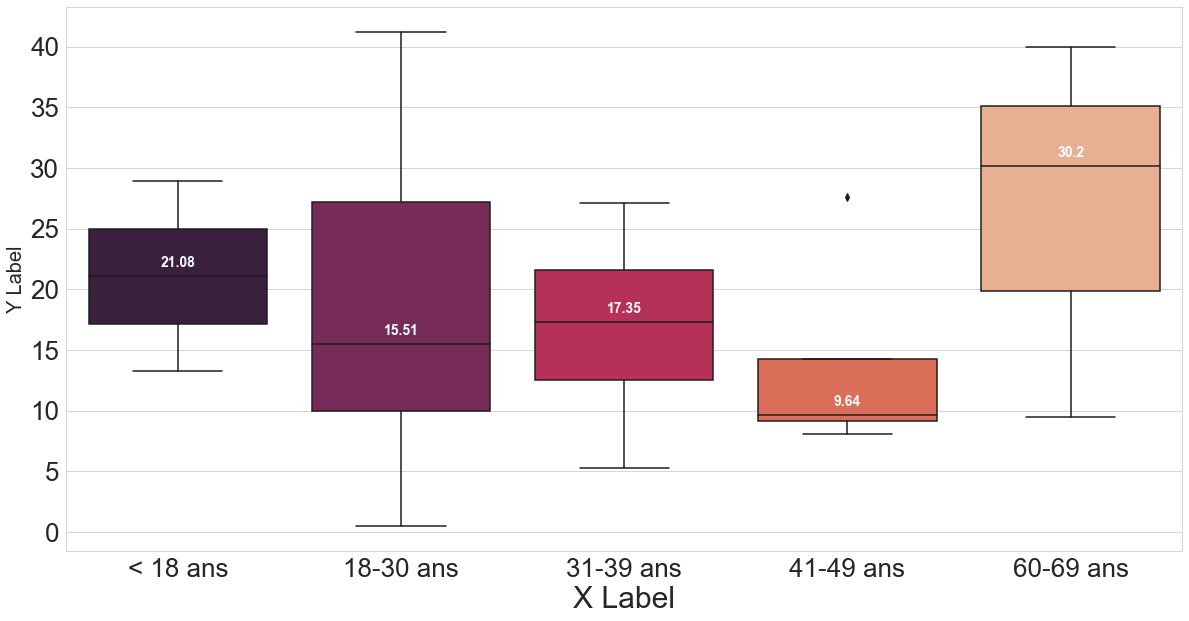

In [65]:
plt.figure(figsize=(20, 10)) 
sns.set_style("whitegrid")

b=sns.boxplot(data=df, x="agerange",y="vit_d",palette="rocket")

medians = df.groupby(['agerange'])['vit_d'].median()
vertical_offset = df['vit_d'].median() * 0.05 # offset from median for display

for xtick in b.get_xticks():
    h=medians[xtick]
    h=round(h,2)
    print(h)
    b.text(xtick,h + vertical_offset,h, 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')



b.set_xlabel("X Label",fontsize=30)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=26)


In [53]:
type(medians[1])

numpy.float64

In [50]:
type(h)

str

In [55]:
for j in b.get_xticks():
    print (j)
    type(j)

0
1
2
3
4


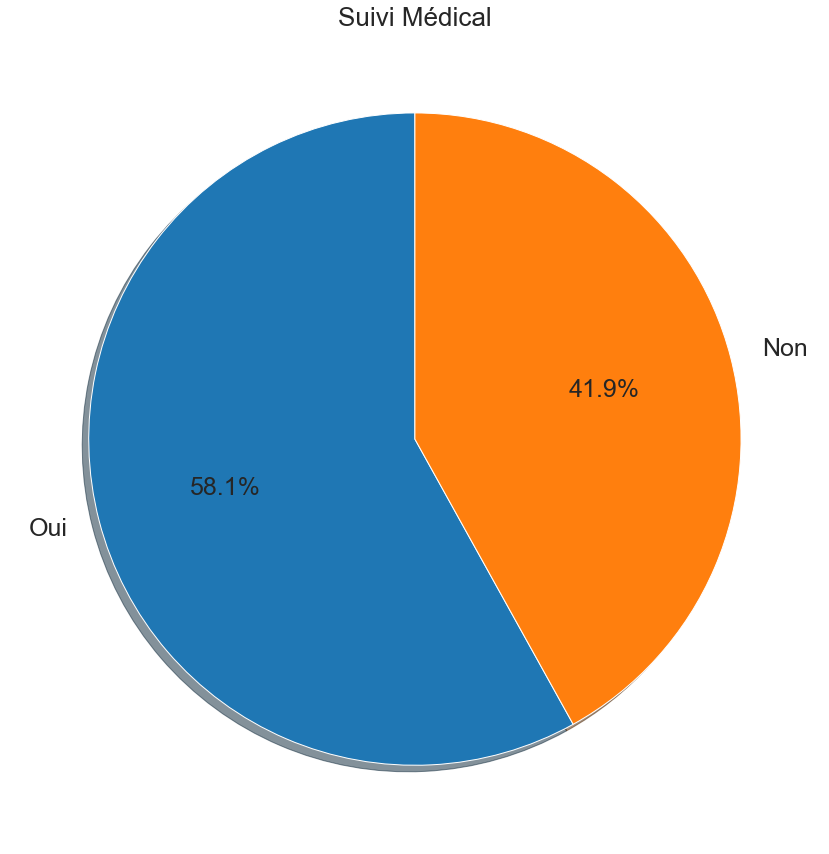

In [43]:
# SUIVI MEDICAL
pie_create("suivi","répartition_suivi_medical","Suivi Médical")


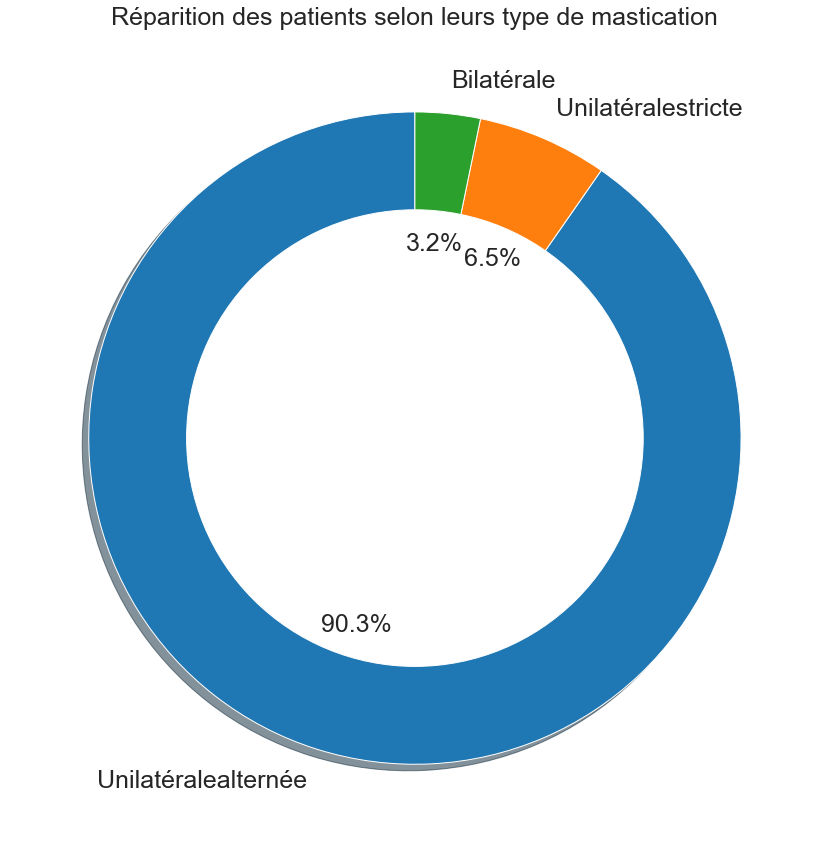

In [49]:
# # MASTICATION
# fig, axs = plt.subplots(2, 2,figsize=(15,15))
# class_age = df['mastication'].value_counts(normalize=True)
# axs[0, 0].pie(class_age.values, labels=class_age.index,autopct='%1.1f%%', shadow=True, startangle=90)
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# axs[0, 0].set_title('Réparition des patients selon leurs type de mastication')

# class_age = df['deglutition'].value_counts(normalize=True)
# axs[1, 0].pie(class_age.values, labels=class_age.index,autopct='%1.1f%%', shadow=True, startangle=90)
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# axs[1, 0].set_title('Réparition des patients selon leurs type de mastication')

# class_age = df['respiration'].value_counts(normalize=True)
# axs[0, 1].pie(class_age.values, labels=class_age.index,autopct='%1.1f%%', shadow=True, startangle=90)
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# axs[0, 1].set_title('Réparition des patients selon leurs type de mastication')

# class_age = df['phonation'].value_counts(normalize=True)
# axs[1, 1].pie(class_age.values, labels=class_age.index,autopct='%1.1f%%', shadow=True, startangle=90)
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# axs[1, 1].set_title('Réparition des patients selon leurs type de mastication')
# fig.tight_layout()


plt.figure(figsize=(20,15)) 
class_age = df['Mastication'].value_counts(normalize=True)
pie(class_age.values, labels=class_age.index,autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 25})
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
title('Réparition des patients selon leurs type de mastication',fontsize=25)
plt.savefig('repartition_mastication.jpeg')
plt.show()

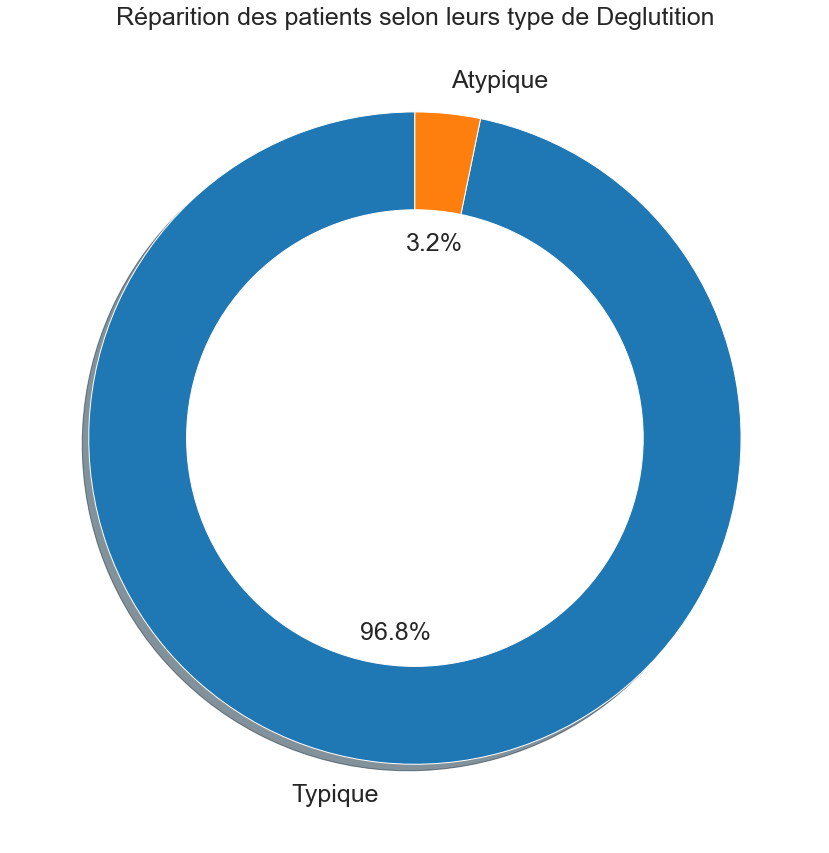

In [50]:
# Deglutition 

plt.figure(figsize=(20,15)) 
class_age = df['Déglutition'].value_counts(normalize=True)
pie(class_age.values, labels=class_age.index,autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 25})
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
title('Réparition des patients selon leurs type de Deglutition',fontsize=25)
plt.savefig('repartition_deglutition.jpeg')
plt.show()

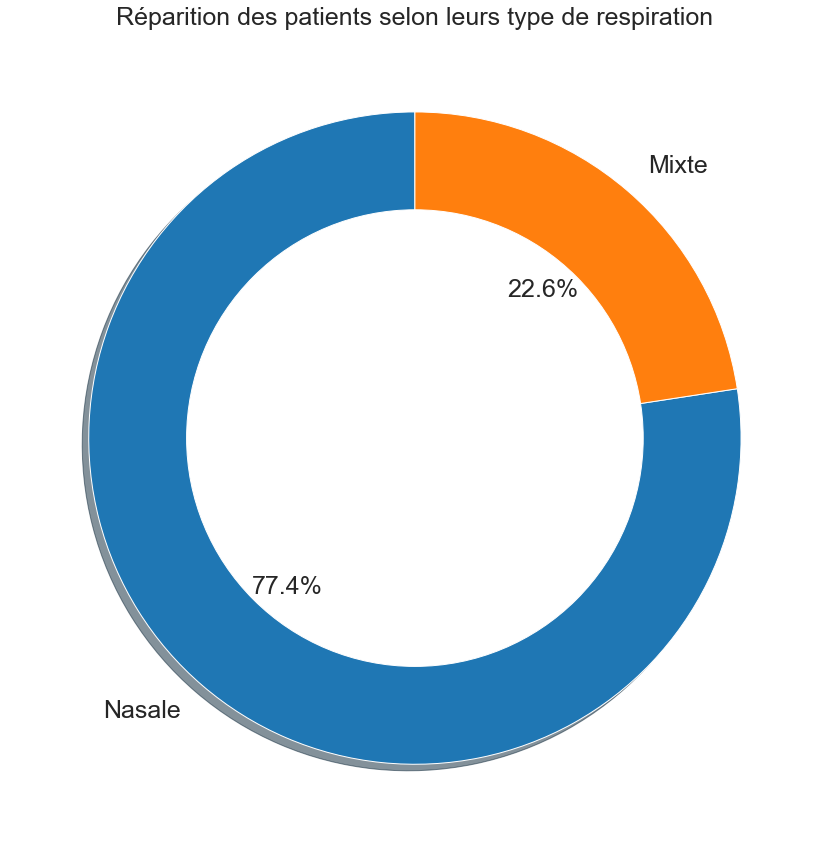

In [53]:
# Deglutition 

plt.figure(figsize=(20,15)) 
class_age = df['Respiration'].value_counts(normalize=True)
pie(class_age.values, labels=class_age.index,autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 25})
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
title('Réparition des patients selon leurs type de respiration',fontsize=25)
plt.savefig('repartition_respiration.jpeg')
plt.show()

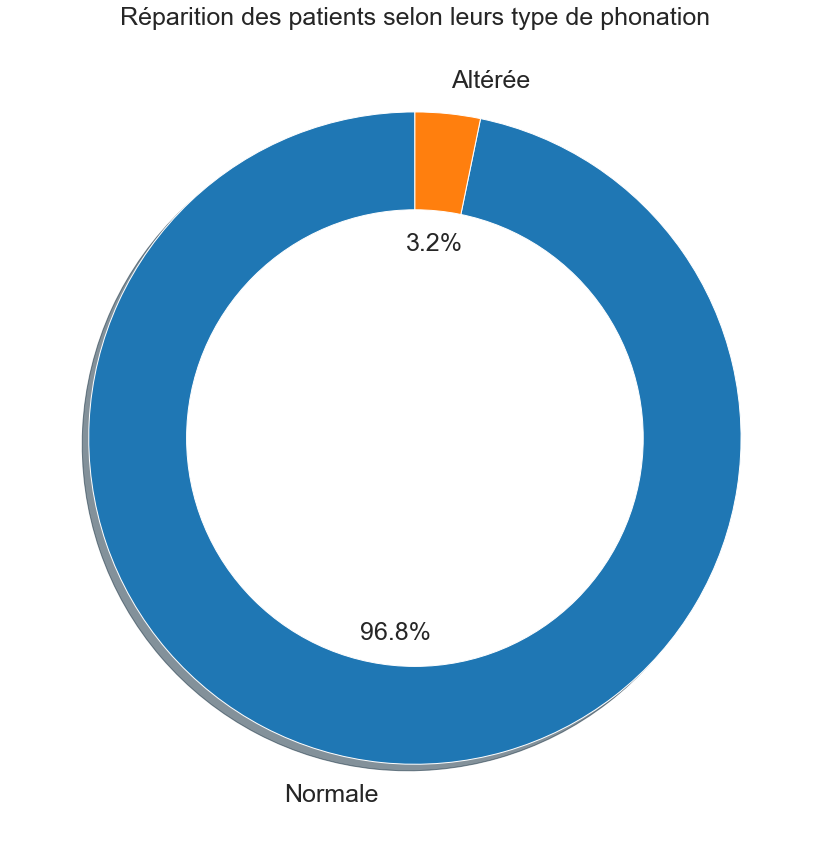

In [54]:
plt.figure(figsize=(20,15)) 
class_age = df['Phonation'].value_counts(normalize=True)
pie(class_age.values, labels=class_age.index,autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 25})
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
title('Réparition des patients selon leurs type de phonation',fontsize=25)
plt.savefig('repartition_phonation.jpeg')
plt.show()

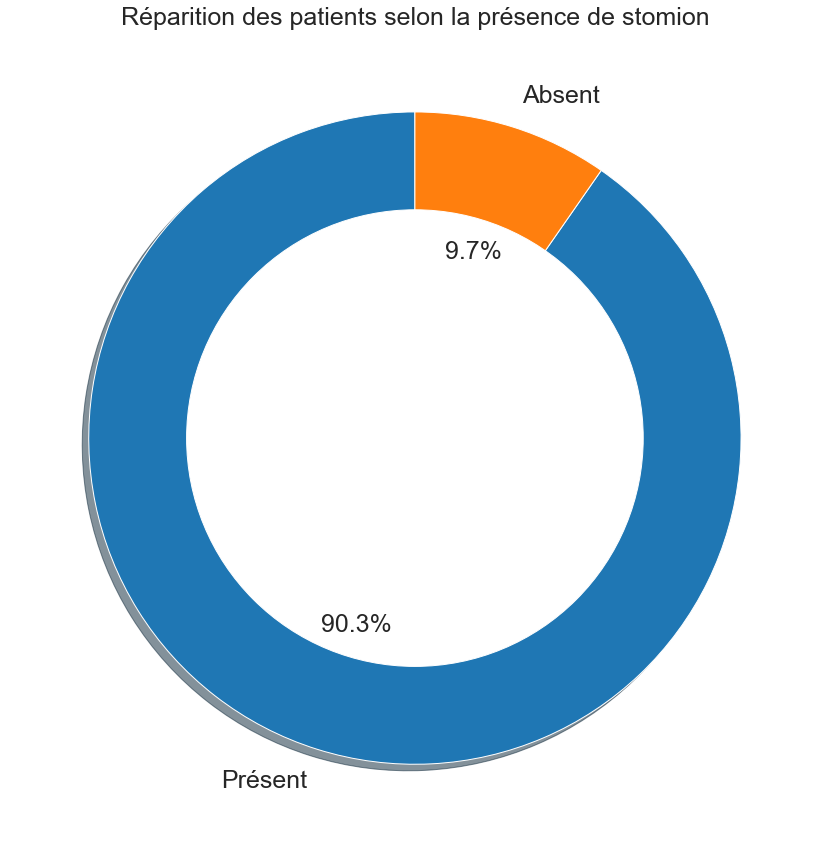

In [58]:
plt.figure(figsize=(20,15)) 
class_age = df['Stomion'].value_counts(normalize=True)
pie(class_age.values, labels=class_age.index,autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 25})
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
title('Réparition des patients selon la présence de stomion',fontsize=25)
plt.savefig('repartition_stomion.jpeg')
plt.show()

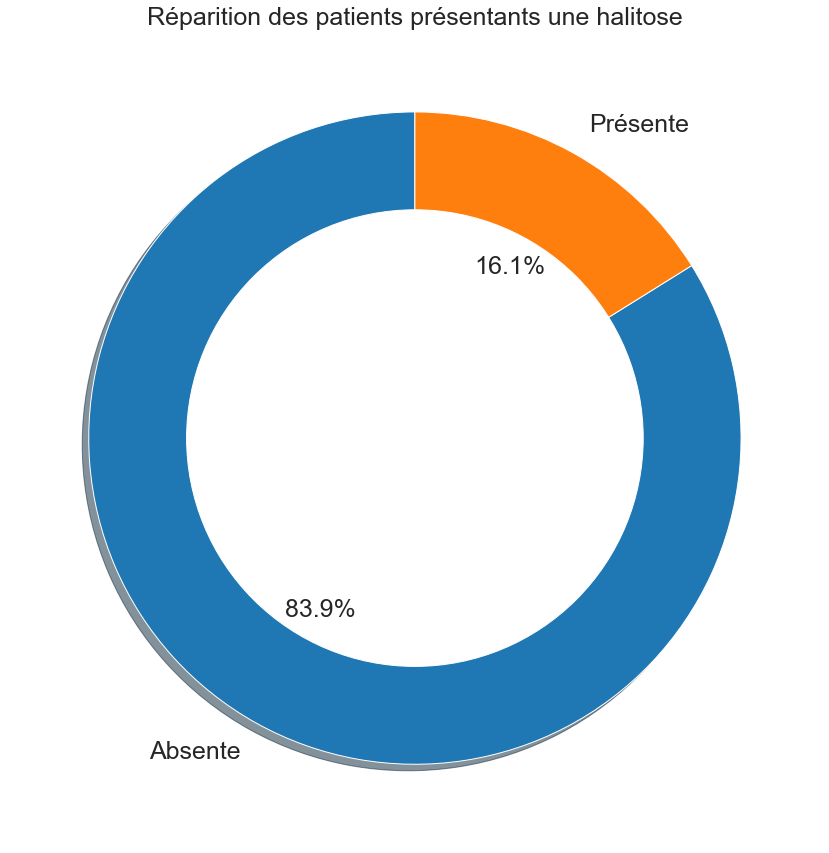

In [145]:
plt.figure(figsize=(20,15)) 
class_age = df['halitose'].value_counts(normalize=True)
pie(class_age.values, labels=class_age.index,autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 25})
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
title('Réparition des patients présentants une halitose',fontsize=25)
plt.savefig('repartition_halitose.jpeg')
plt.show()

In [68]:
df.head(2)

vit_d   age     Sexe   IMC residence            vestimentaire  \
0   5.88  27.0  Féminin  25.0    Annaba       Vetementscouvrants   
1  18.95  25.0  Féminin  21.0    Annaba  Vetementsmoinscouvrants   

            profession    medication  enfants               antecedents  ...  \
0  Activitéd'intérieur  Antibiotique      0.0  Cardiaque+dermatologique  ...   
1  Activitéd'intérieur        Aucune      0.0   Ophtalmologique+Osseuse  ...   

  Trtantérieur_ODF HygièneBuccoDentaire Brossage Brosseàdent Fréquence  \
0              Non             Mauvaise      Oui     Moyenne       1.0   
1              Non                Bonne      Oui     Moyenne       2.0   

  Technique Minutage Adjuvants Atcdstomfam   agerange  
0   Adaptée        3       Non       Aucun  18-30 ans  
1   Adaptée        3       Non       Aucun  18-30 ans  

[2 rows x 68 columns]

In [71]:
carié = pd.DataFrame(df, columns=['sum_DentsCariées'])

bins = [0, 2, 4, 6, 8]
labels = ['0 - 2','3 - 5', '6 - 8','8 - 10']
df['cariés'] = pd.cut(carié.sum_DentsCariées, bins, labels = labels,include_lowest = True)
df.head(10)

vit_d   age      Sexe   IMC residence            vestimentaire  \
0   5.88  27.0   Féminin  25.0    Annaba       Vetementscouvrants   
1  18.95  25.0   Féminin  21.0    Annaba  Vetementsmoinscouvrants   
2  39.97  62.0   Féminin  25.0    Annaba       Vetementscouvrants   
3   9.00  27.0   Féminin  20.0    Annaba       Vetementscouvrants   
4  30.20  67.0   Féminin  21.7    Annaba       Vetementscouvrants   
5  16.32  30.0   Féminin  21.5    Annaba  Vetementsmoinscouvrants   
6  41.22  24.0   Féminin  18.3  ElHadjar       Vetementscouvrants   
7  14.21  25.0  Masculin  21.0    Annaba  Vetementsmoinscouvrants   
8   9.20  25.0   Féminin  25.8    Annaba       Vetementscouvrants   
9   8.10  45.0   Féminin  17.6    Annaba       Vetementscouvrants   

            profession                                      medication  \
0  Activitéd'intérieur                                    Antibiotique   
1  Activitéd'intérieur                                          Aucune   
2       Netravaillepas                             Hormonethyroidienne   
3  Activitéd'intérieur  Hormonethyroidienne.Collyre.Anti-inflammatoire   
4       Netravaillepas                              Anti-inflammatoire   
5  Activitéd'intérieur                                          Aucune   
6  Activitéd'intérieur                                          Aucune   
7  Activitéd'intérieur                                   Anti-fongique   
8  Activitéd'intérieur       Hormonethyroidienne.Supplémentvitaminique   
9       Netravaillepas          Antihistaminique.Supplémentvitaminique   

   enfants                                antecedents  ...  \
0      0.0                   Cardiaque+dermatologique  ...   
1      0.0                    Ophtalmologique+Osseuse  ...   
2      4.0                              Endocrinienne  ...   
3      0.0  Auto-immune+Endocrinienne+Ophtalmologique  ...   
4      4.0                                Auto-immune  ...   
5      0.0                            Auto-immune+ORL  ...   
6      0.0                                Patientsain  ...   
7      0.0                             Dermatologique  ...   
8      0.0                              Endocrinienne  ...   
9      3.0  Auto-immune+endocrinienne+Ophtalmologique  ...   

  HygièneBuccoDentaire Brossage Brosseàdent Fréquence Technique Minutage  \
0             Mauvaise      Oui     Moyenne       1.0   Adaptée        3   
1                Bonne      Oui     Moyenne       2.0   Adaptée        3   
2             Mauvaise      Oui      Souple       1.0   Erronée        1   
3             Mauvaise      Oui        Dure       3.0   Eronnée        5   
4             Mauvaise      Oui     Edentée       1.0   Edentée        2   
5                Bonne      Oui     Moyenne       2.0   Eronnée        3   
6                Bonne      Oui     Moyenne       2.0   Adaptée        3   
7                Bonne      Oui  Electrique       2.0   Adaptée       10   
8             Mauvaise      Oui      Souple       2.0   Adaptée        2   
9             Mauvaise      Oui     Moyenne       3.0   Erronée        2   

  Adjuvants Atcdstomfam   agerange  cariés  
0       Non       Aucun  18-30 ans   6 - 8  
1       Non       Aucun  18-30 ans   0 - 2  
2       Non       Aucun  60-69 ans  8 - 10  
3       Non       Aucun  18-30 ans   6 - 8  
4       Non       Aucun  60-69 ans   0 - 2  
5       Non       Aucun  18-30 ans   0 - 2  
6       Oui       Aucun  18-30 ans   0 - 2  
7       Oui       Aucun  18-30 ans   0 - 2  
8       Oui       Aucun  18-30 ans   3 - 5  
9       Non       Aucun  41-49 ans   0 - 2  

[10 rows x 69 columns]

In [80]:
def boxplot_multiv (feature,axe_x,name,titles,plotColor="#CC9900"):
  
    plt.figure(figsize=(15, 8)) 
    sns.set_style("whitegrid")

    b=sns.boxplot(data=df, x=axe_x,y=feature,palette="rocket")
    b.set_xlabel("X Label",fontsize=20)
    b.set_ylabel("Y Label",fontsize=20)
    b.tick_params(labelsize=26)
    b.axes.set_title(titles,fontsize=26)
#     b.set(xlabel=None)
#     b.set(ylabel=None)
    b.set(xlabel='Vit D (mg/nl)', ylabel='dents cariés')

    plt.savefig(name+'.jpeg')


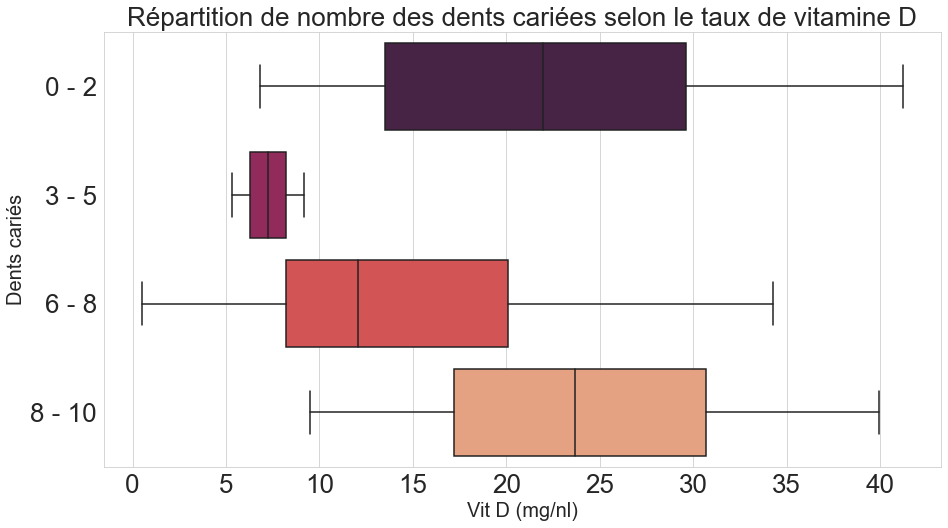

In [83]:
boxplot_multiv("cariés","vit_d","Repartition_vit_d_carié","Répartition de nombre des dents cariées selon le taux de vitamine D")

# BROUILLON

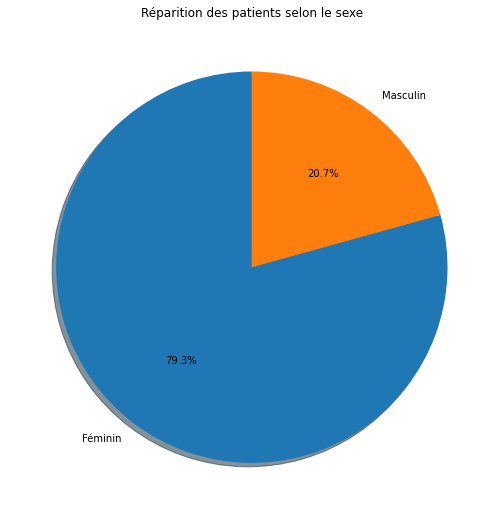

In [8]:
class_sex = df['sexe'].value_counts(normalize=True)
plt.figure(figsize=(9, 9))

h=pie(class_sex.values, labels=class_sex.index,
                autopct='%1.1f%%', shadow=True, startangle=90)
title('Réparition des patients selon le sexe')
plt.savefig('repartition_sexe.jpeg')

show()



In [169]:
df=df[:30]

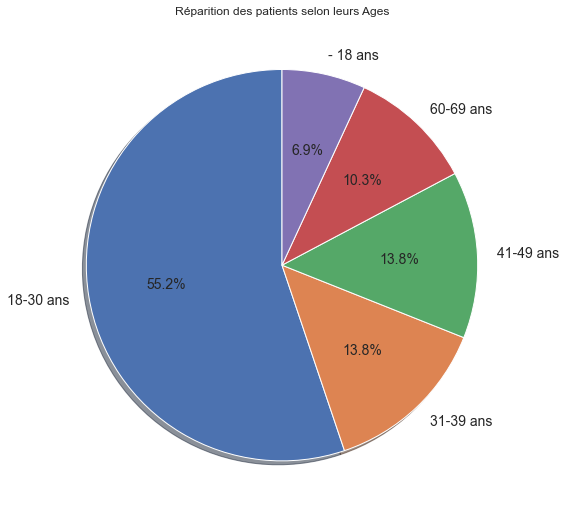

In [55]:


class_age = df['agerange'].value_counts(normalize=True)
plt.figure(figsize=(9, 9))
plt.rcParams.update({'font.size': 20})
pie(class_age.values, labels=class_age.index,
                autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 14})
title('Réparition des patients selon leurs Ages')
plt.savefig('repartition_age.jpeg')

show()


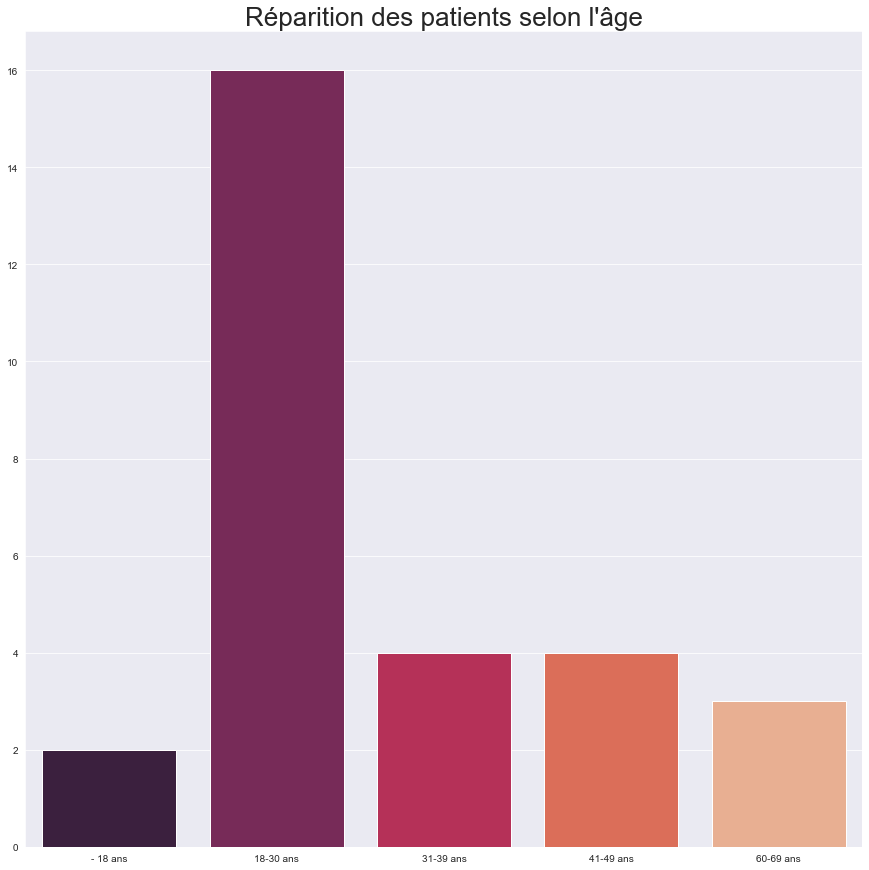

In [12]:
plots_create("agerange")

In [111]:
def boxplot_multiv (feature,plotColor="#CC9900"):
  
    plt.figure(figsize=(15, 8)) 
    sns.set_style("whitegrid")

    b=sns.boxplot(data=df, x="sexe",y=feature,palette="rocket")
    b.axes.set_title("Réparition des taux de vitamine D selon le sexe",fontsize=26)
    b.set(xlabel=None)
    b.set(ylabel=None)
    plt.savefig('repartition_vitamine_sexe.jpeg')


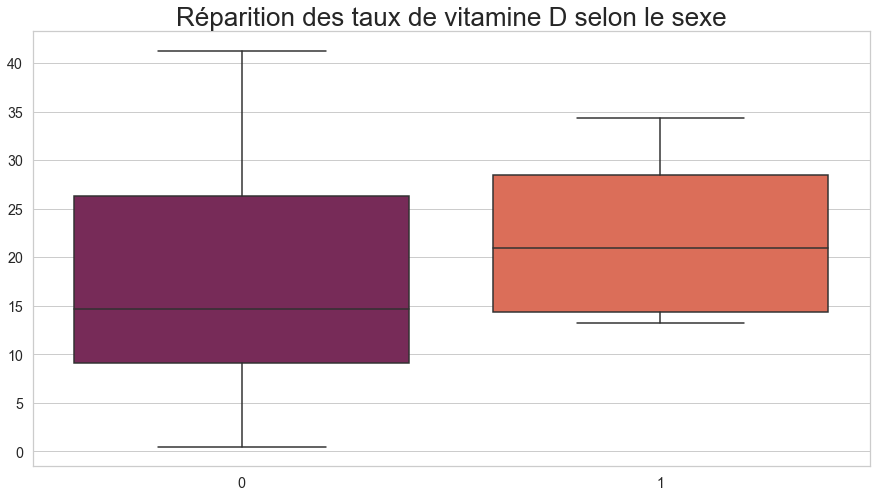

In [112]:
boxplot_multiv("vit_d")


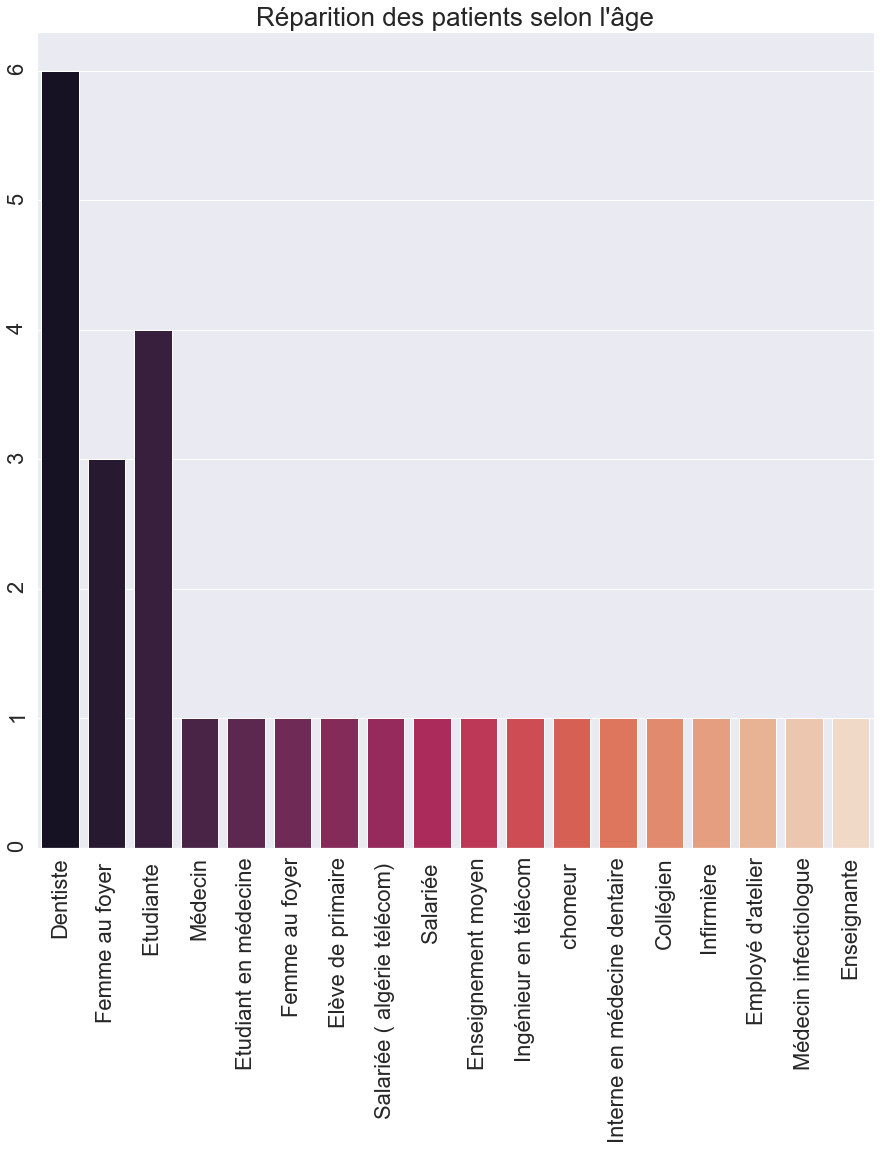

In [151]:
plt.figure(figsize=(15, 15)) 
sns.color_palette("rocket", as_cmap=True)
sns.set_style("darkgrid")
b=sns.countplot(x="profession", data=df,palette="rocket")
b.set(xlabel=None)
b.set(ylabel=None)
b.axes.set_title("Réparition des patients selon l'âge",fontsize=26)
plt.savefig('repartition_age.jpeg')
b.tick_params(labelrotation=90)

In [210]:
df['brosse']=df['brosse'].astype('category').cat.codes
df['Brossage']=df['Brossage'].astype('category').cat.codes
df['technique']=df['technique'].astype('category').cat.codes
df['harmonie_et _ymetrie_faciale']=df['harmonie_et _ymetrie_faciale'].astype('category').cat.codes
df['brosse']=df['brosse'].astype('category').cat.codes
df['Brossage']=df['Brossage'].astype('category').cat.codes
df['stomion']=df['stomion'].astype('category').cat.codes
df['moyenne_de_indice_plaque']=df['moyenne_de_indice_plaque'].astype('category').cat.codes
df['sum_Dents_Cariées']=df['sum_Dents_Cariées'].astype('category').cat.codes
df['sum_Dents_absentes ']=df['sum_Dents_absentes '].astype('category').cat.codes

df['sum_Dents_obturées ']=df['sum_Dents_obturées '].astype('category').cat.codes
df['sum_Dentinites ']=df['sum_Dentinites '].astype('category').cat.codes
df['moyenne_de_indice_plaque']=df['moyenne_de_indice_plaque'].astype('category').cat.codes
df['Diagnostic_parodontal']=df['Diagnostic_parodontal'].astype('category').cat.codes
df['Mastication']=df['Mastication'].astype('category').cat.codes
df['Minutage']=df['Minutage'].astype('category').cat.codes
df['frequence']=df['frequence'].astype('category').cat.codes


df['sum_Dents_obturées ']=df['sum_Dents_obturées '].astype('category').cat.codes
df['sum_Dentinites ']=df['sum_Dentinites '].astype('category').cat.codes
df['moyenne_de_indice_plaque']=df['moyenne_de_indice_plaque'].astype('category').cat.codes
df['Diagnostic_parodontal']=df['Diagnostic_parodontal'].astype('category').cat.codes
df['Mastication']=df['Mastication'].astype('category').cat.codes

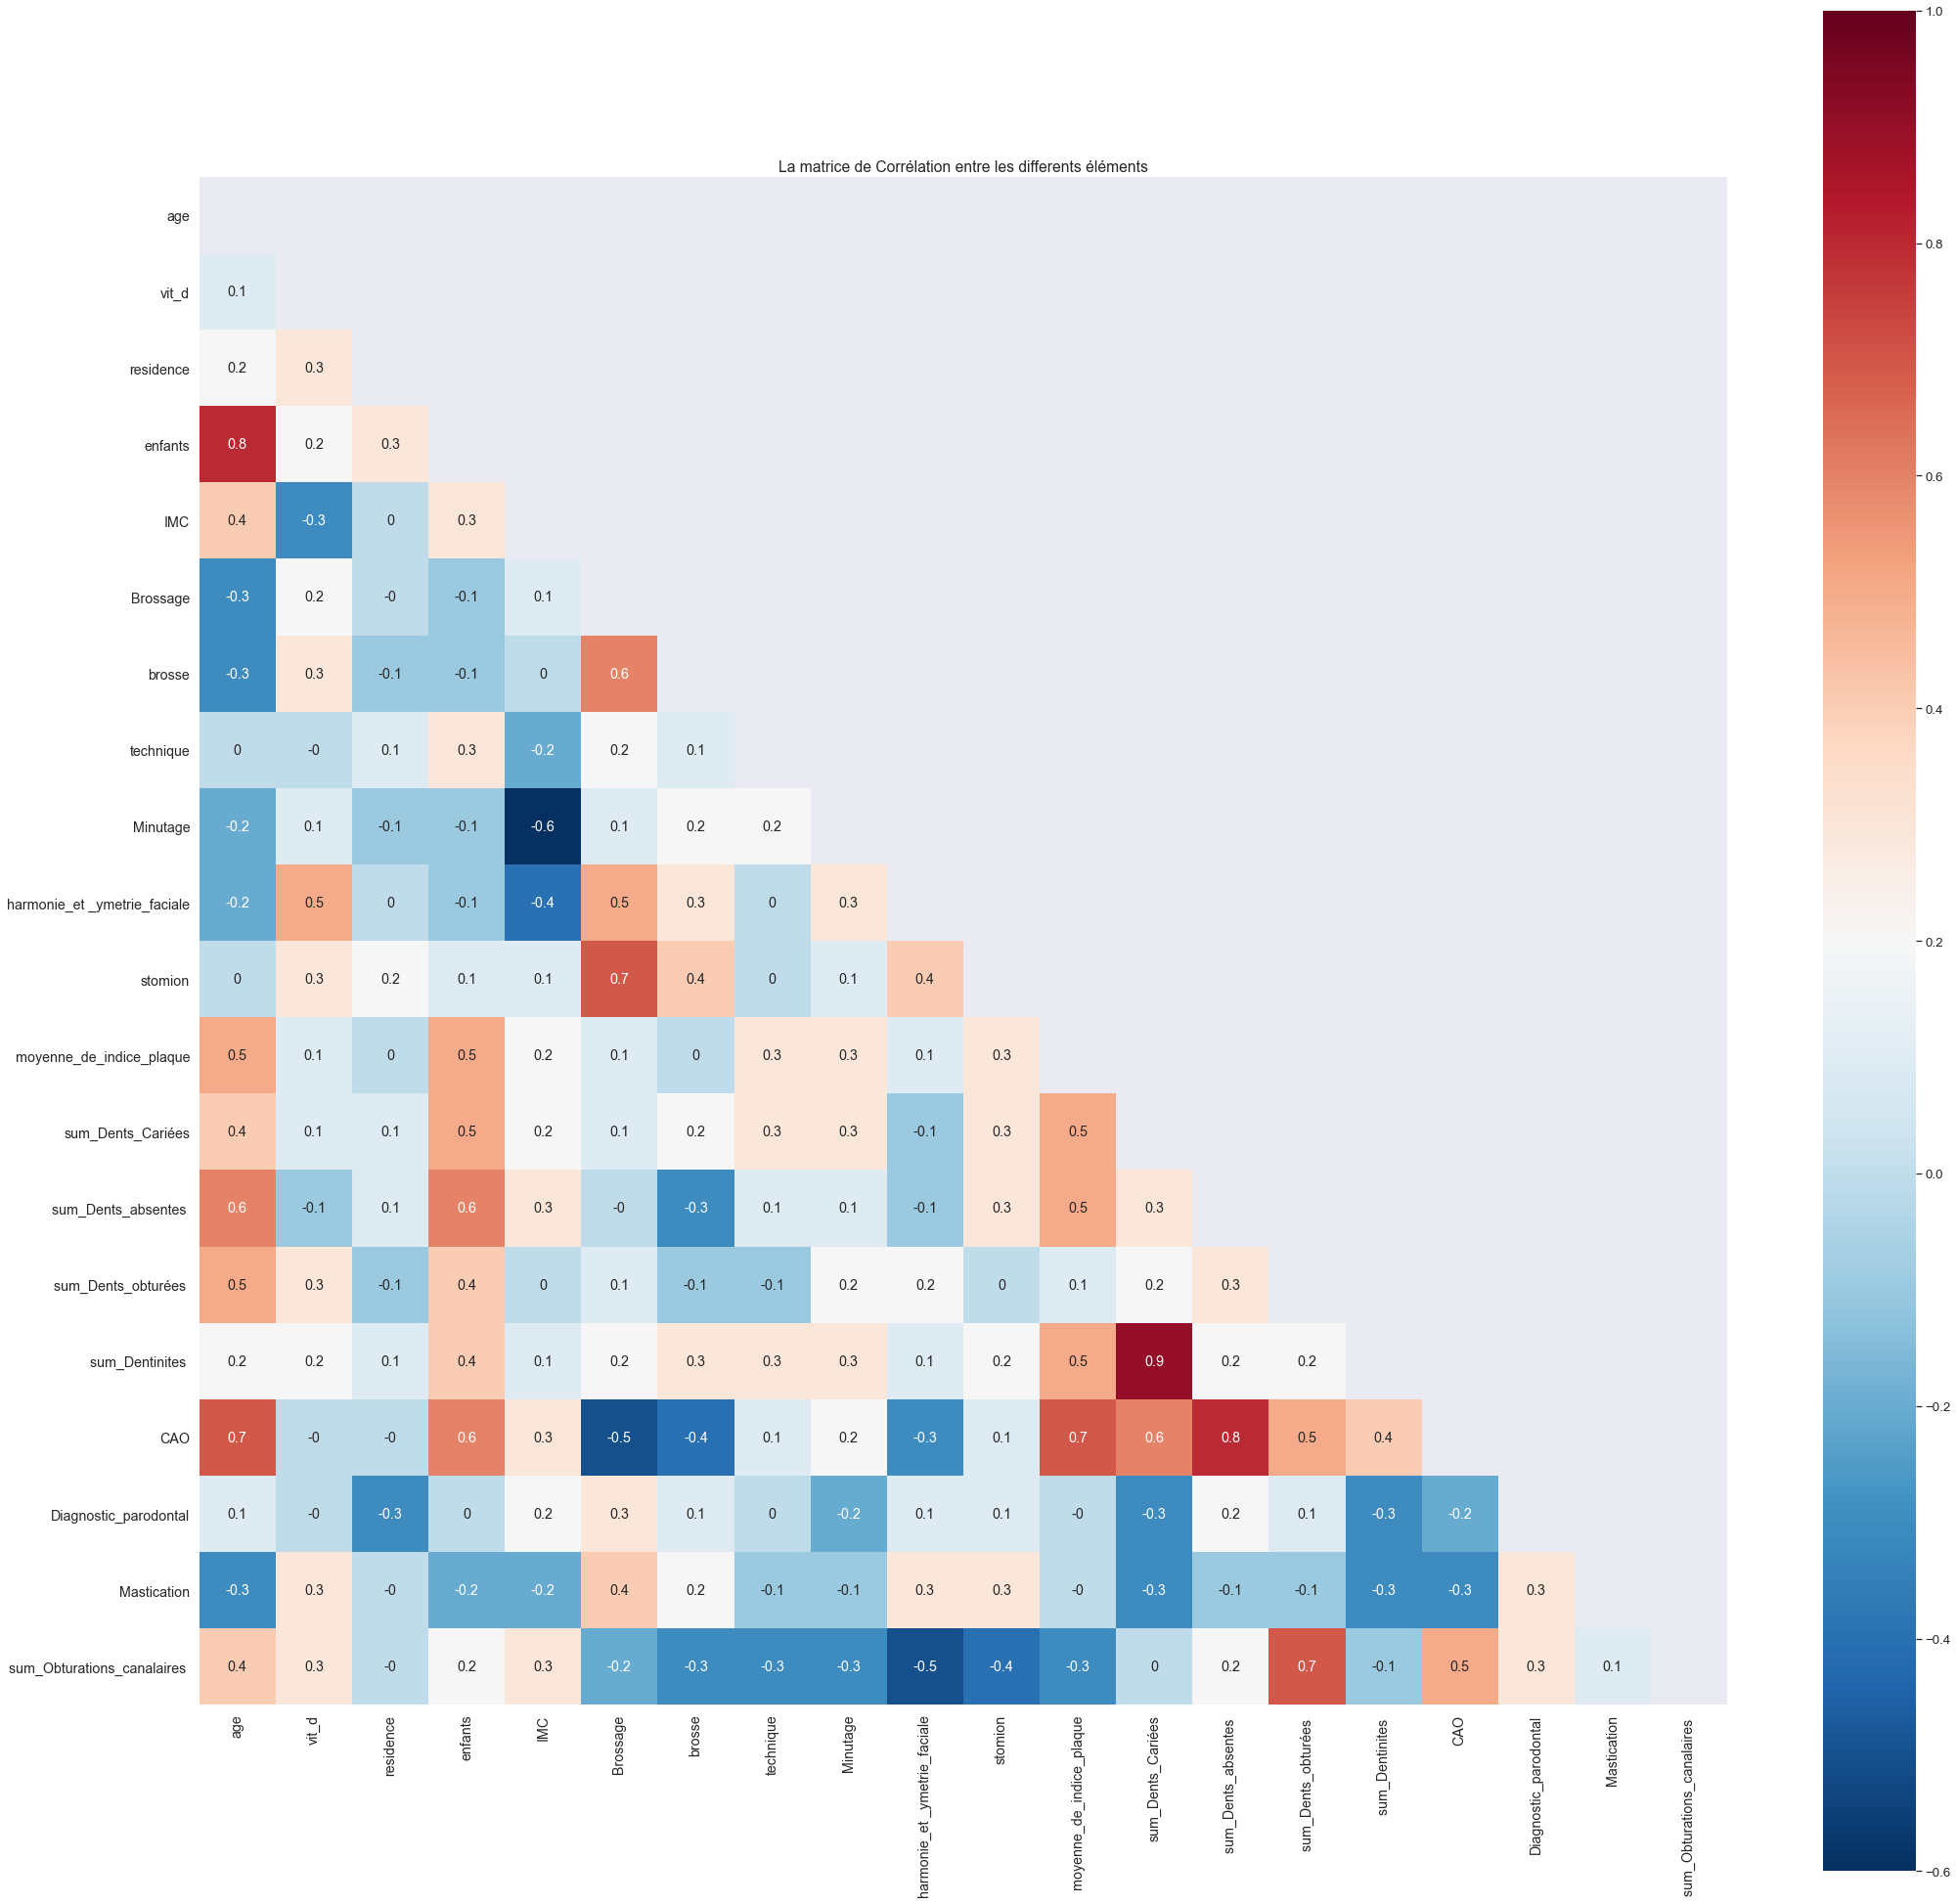

In [207]:
df.columns
corr = df.corr()
corr = corr.round(1)
plt.figure(figsize=(35, 35))
plt.title("La matrice de Corrélation entre les differents éléments")

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.2)
with sns.axes_style("white"):
    sns.heatmap(corr,  annot = True ,vmax=1, cmap="RdBu_r",square=True, mask=mask)
    
plt.savefig('Correlation.jpeg')


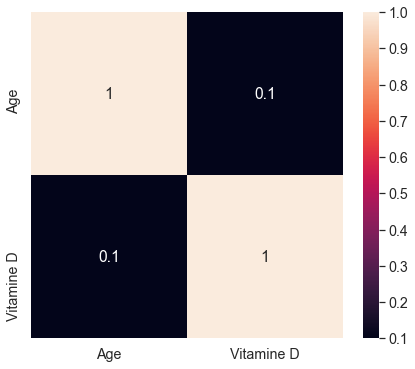

In [88]:
list_args=["age","vit_d"]
list_names=["Age","Vitamine D"]
corr = df[list_args].corr()
corr = corr.round(1)
plt.figure(figsize=(7, 6))

sns.set(font_scale=1.3)
y_axis_labels = list_names
x_axis_labels = list_names

#x_axis_labels = ["Vitamine D","Age"]
with sns.axes_style("white"):
    sns.heatmap(corr,  annot = True ,vmax=1, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    
    

C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


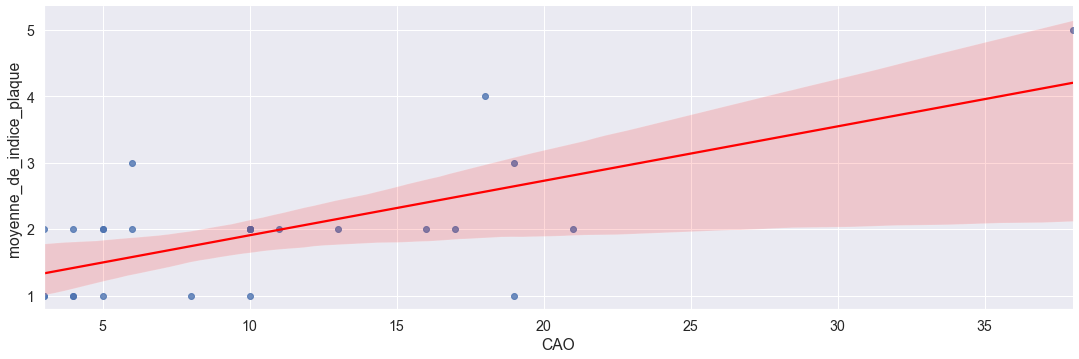

In [204]:
sns.lmplot("CAO","moyenne_de_indice_plaque", df, line_kws={'color': 'red'}, aspect=3)


C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Home\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

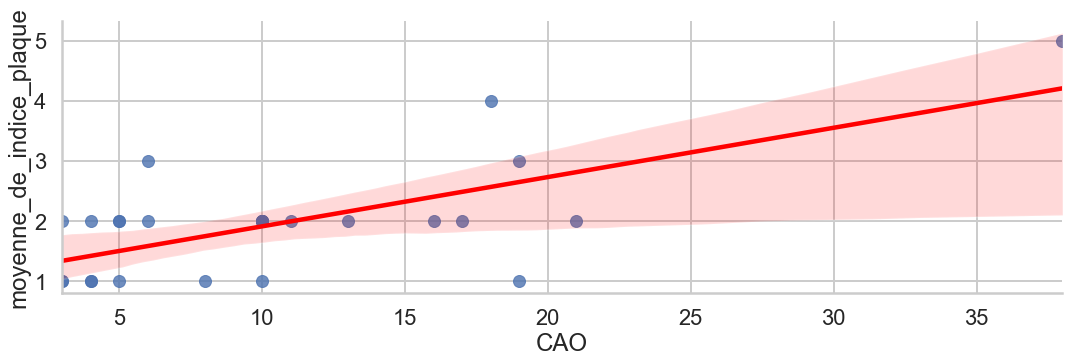

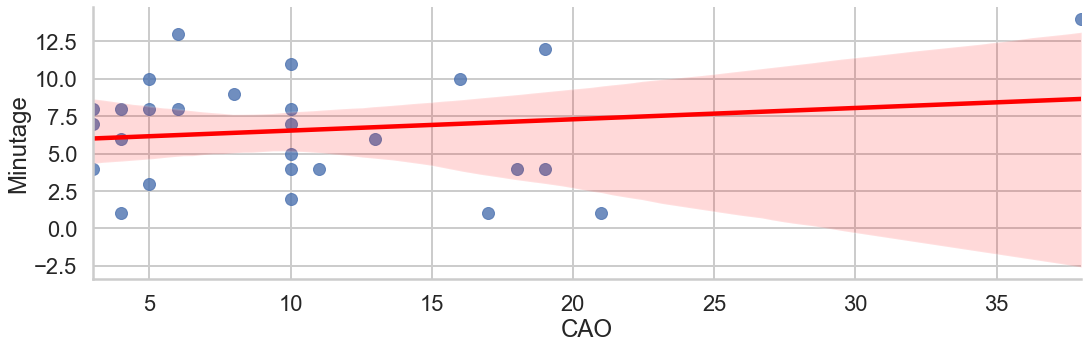

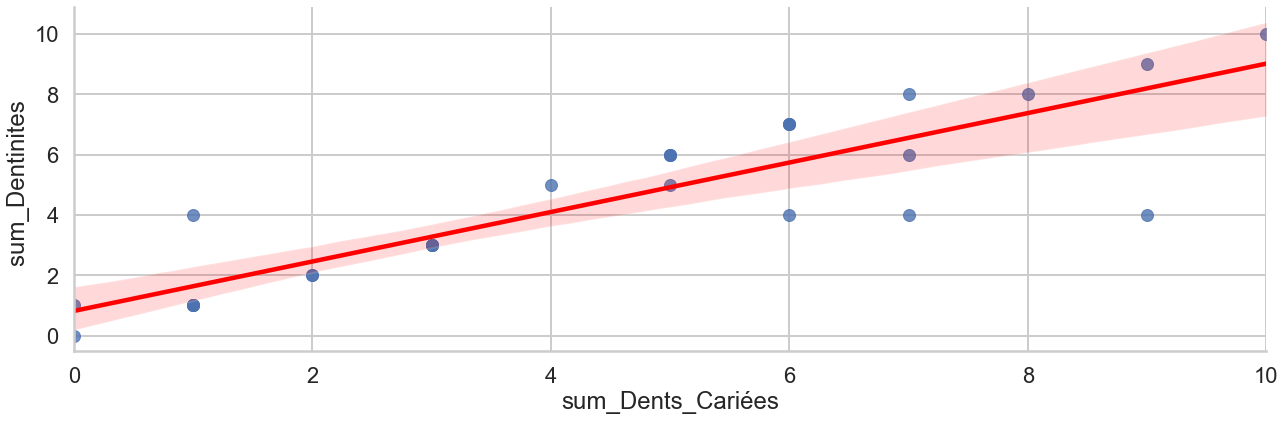

In [215]:
sns.set_style("whitegrid")

with sns.plotting_context(context='poster'):
    sns.lmplot("CAO","moyenne_de_indice_plaque", df, line_kws={'color': 'red'}, aspect=3)
    sns.lmplot("CAO","Minutage", df, line_kws={'color': 'red'}, aspect=3)
    sns.lmplot("sum_Dents_Cariées","sum_Dentinites ", df, line_kws={'color': 'red'}, size=6, aspect=3)

In [103]:
df.head(10)

vit_d  sexe  age   IMC  naissance  residence  profession  enfants  \
0   5.88     0   27  25.0          0          0           0        0   
1  18.95     0   25  21.0          0          0           0        0   
2  39.97     0   62  25.0          0          0           3        4   
3   9.00     0   27  20.0          0          0           2        0   
4  30.20     0   67  21.7          0          0           3        4   
5  16.32     0   30  21.5          0          0           0        0   
6  41.22     0   24  18.3          5          0           0        0   
7  14.21     1   25  21.0          0          0           2        0   
8   9.20     0   25  25.8          0          0           2        0   
9   8.10     0   45  17.6          0          0           3        3   

    agerange    niv_vitD hypo_vit  
0  18-30 ans     Carence  Malades  
1  18-30 ans     Déficit  Malades  
2  60-69 ans  Suffisance    Sains  
3  18-30 ans     Carence  Malades  
4  60-69 ans  Suffisance    Sains  
5  18-30 ans     Déficit  Malades  
6  18-30 ans  Suffisance    Sains  
7  18-30 ans     Déficit  Malades  
8  18-30 ans     Carence  Malades  
9  41-49 ans     Carence  Malades

<BarContainer object of 6 artists>

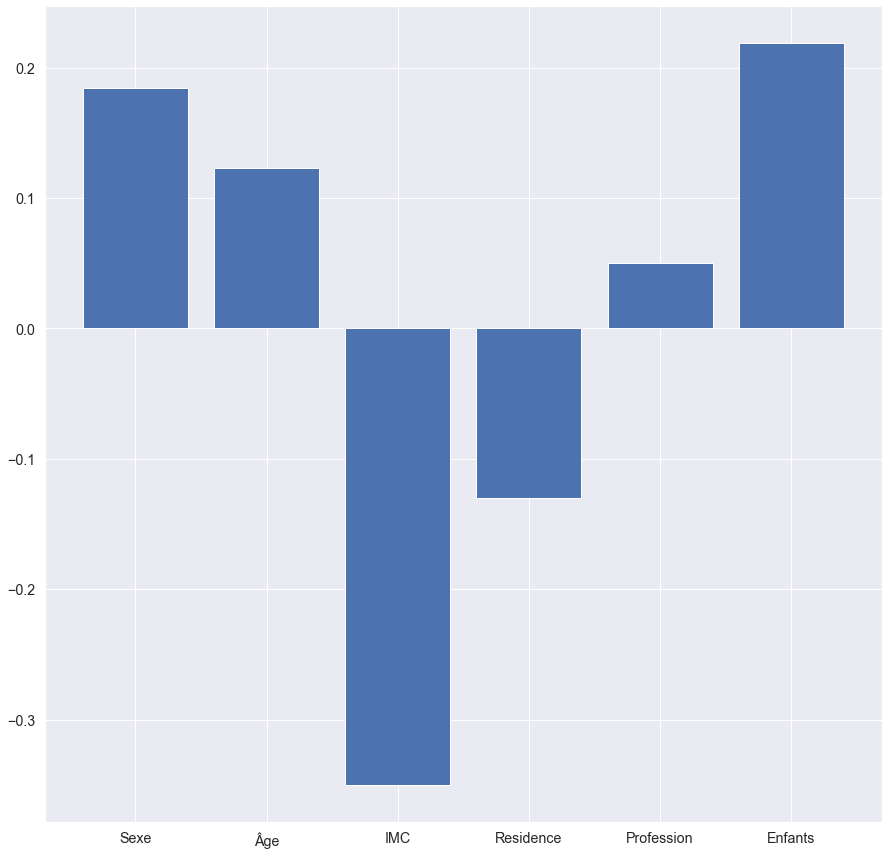

In [101]:
list_noms=["Sexe","Âge","IMC","Residence","Profession","Enfants"]

list_correlation=[]
list_correlation.append(df["vit_d"].corr(df["sexe"]))
list_correlation.append(df["vit_d"].corr(df["age"]))
list_correlation.append(df["vit_d"].corr(df["IMC"]))
list_correlation.append(df["vit_d"].corr(df["residence"]))
list_correlation.append(df["vit_d"].corr(df["profession"]))
list_correlation.append(df["vit_d"].corr(df["enfants"]))
          
plt.figure(figsize=(15, 15))
    
plt.bar(list_noms, list_correlation)

In [66]:
df.columns

Index(['vit_d', 'age', 'Sexe', 'IMC', 'residence', 'vestimentaire',
       'profession', 'medication', 'enfants', 'antecedents', 'suivi',
       'Passémédicalfamilial', 'halitose', 'egalite', 'Symétriefaciale',
       'Aspectdestéguments', 'Adénopathies', 'Anomaliesdestissusmous',
       'Gnatosonies', 'Arthralgies', 'Myalgies', 'Saignement', 'Récession',
       'Récession_valeurmaximale_mm', 'Tartre', 'Moyennedeindicedeplaque',
       'Dernièrevisitechezledentiste', 'Trabeculationosseuse_densité',
       'sum_degrédelyse',
       'pourcentage_desdentsatteintesdelyseosseusesuperficielle',
       'pourcentage_desdentsatteintesdelyseosseusemodérée',
       'pourcentage_desdentsatteintesdelyseosseusesévère', 'Condyles',
       'Diagnosticparodontal', 'Atteintesdefurcation',
       'Fracturesdesmaxillaires', 'sum_DentsCariées', 'sum_Dentsabsentes',
       'sum_Dentsobturées', 'CAO', 'sum_Dentinites', 'sum_Pulpites',
       'sum_Mortifications', 'sum_Obturationscanalaires', 'sum_LIPOE',
   

In [32]:
df[]

vit_d  age     Sexe   IMC residence              vestimentaire  \
0   5.88   27  Féminin  25.0    Annaba        Vêtements couvrants   
1  18.95   25  Féminin  21.0    Annaba  Vêtements moins couvrants   
2  39.97   62  Féminin  25.0    Annaba        Vêtements couvrants   
3   9.00   27  Féminin  20.0    Annaba        Vêtements couvrants   
4  30.20   67  Féminin  21.7    Annaba        Vêtements couvrants   

             profession                                       medication  \
0  Activité d'intérieur                                     Antibiotique   
1  Activité d'intérieur                                           Aucune   
2      Ne travaille pas                             Hormone thyroidienne   
3  Activité d'intérieur  Hormone thyroidienne+Collyre+Anti-inflammatoire   
4      Ne travaille pas                               Anti-inflammatoire   

   enfants                                antecedents  ... Brossage  \
0        0                   Cardiaque+dermatologique  ...      Oui   
1        0                    Ophtalmologique+Osseuse  ...      Oui   
2        4                              Endocrinienne  ...      Oui   
3        0  Auto-immune+Endocrinienne+Ophtalmologique  ...      Oui   
4        4                                Auto-immune  ...      Oui   

  Brosseàdent Fréquence Technique Minutage Adjuvants Atcdstomfam   agerange  \
0     Moyenne         1   Adaptée        3       Non       Aucun  18-30 ans   
1     Moyenne         2   Adaptée        3       Non       Aucun  18-30 ans   
2      Souple         1   Erronée        1       Non       Aucun  60-69 ans   
3        Dure         3   Eronnée        5       Non       Aucun  18-30 ans   
4     Edentée         1   Edentée        2       Non       Aucun  60-69 ans   

     niv_vitD            imc_type  
0     Carence  Corpulence normale  
1     Déficit  Corpulence normale  
2  Suffisance  Corpulence normale  
3     Carence  Corpulence normale  
4  Suffisance  Corpulence normale  

[5 rows x 70 columns]

In [14]:
df.to_csv("cleaned_data.csv", index=False, encoding='utf-8') 

In [18]:
df.head(3)

vit_d  age     Sexe   IMC residence              vestimentaire  \
0   5.88   27  Féminin  25.0    Annaba        Vêtements couvrants   
1  18.95   25  Féminin  21.0    Annaba  Vêtements moins couvrants   
2  39.97   62  Féminin  25.0    Annaba        Vêtements couvrants   

             profession            medication  enfants  \
0  Activité d'intérieur          Antibiotique        0   
1  Activité d'intérieur                Aucune        0   
2      Ne travaille pas  Hormone thyroidienne        4   

                antecedents  ... Technique Minutage Adjuvants Atcdstomfam  \
0  Cardiaque+dermatologique  ...   Adaptée        3       Non       Aucun   
1   Ophtalmologique+Osseuse  ...   Adaptée        3       Non       Aucun   
2             Endocrinienne  ...   Erronée        1       Non       Aucun   

  percentage_dents atteintes_lyse   \
0                                0   
1                                0   
2                               60   

  percentage_dents_atteintes_lyse_superficielle  \
0                                             0   
1                                             0   
2                                            30   

  percentage_dents_atteintes_lyse modérée  \
0                                       0   
1                                       0   
2                                      30   

  percentage_dents_atteintes_lyse sévère   agerange    niv_vitD  
0                                      0  18-30 ans     CARENCE  
1                                      0  18-30 ans     DEFICIT  
2                                      0  60-69 ans  SUFFISANCE  

[3 rows x 73 columns]